In [1]:
import re, sys, os
import numpy as np
sys.path.append("./bin")
import matplotlib.pyplot as plt
from functools import partial
import pandas as pd
from matplotlib import colors
import twoconf_x_P_higherac 

In [2]:
instance=twoconf_x_P_higherac.GRFCalculations_100_100_15()
othervars=np.array([0])

In [3]:

def plot_pars(pars,qs,title=None,xmin=-1,xmax=1,nvals=100,color="k",text=None,figname=None):
    
    xvals=np.logspace(xmin,xmax,nvals)
    
    values=np.zeros(len(xvals))
    #accessibilities=np.zeros(len(xvals))
    xval=0
    parset=np.concatenate((pars,qs))
    instance.fill_num_den(parset,othervars)
    
    expr0=instance.interfaceGRF(xval)
    #acc0=np.sum(Ps[4:])

    for x_,xval in enumerate(xvals):
        expr=instance.interfaceGRF(xval)
        
        values[x_]=expr/expr0
        #accessibilities[x_]=acc/acc0
    fig,ax=plt.subplots(1,1,figsize=(3,2.5))
    ax.plot(xvals,values,color=color)
    ax.set_xscale('log')
    ax.set_xlabel(r"[$x$]",size=14)
    ax.set_ylabel('fold change',size=14)
    ax.axhline(y=1,linestyle="--",color="gray")
    if title is not None:
        ax.set_title(title)
    if text is not None:
        ax.text(0.8,0.8,text,transform=ax.transAxes)
    plt.tight_layout()
    if figname is not None:
        plt.savefig(figname,bbox_inches="tight")
    plt.show()
    

In [4]:
figsfolder="./figscode"

# Examples in Fig S3: 

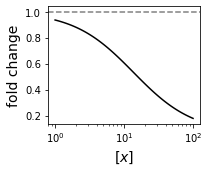

In [5]:
#monotonic down: 
#x binds more in the open, and opens, but it exhibits negative coop
#Pol binds more in the closed, and exhibits negative coop

#x binding: more in closed,more without Pol
ax_P_1=0.01
ax_0_1=2*ax_P_1
ax_P_0=2*ax_0_1
ax_0_0=2*ax_P_0


bx_x_0=1
bx_xP_0=2*bx_x_0 #neg coop coop, higher unbinding rate when P is bound (lower unbinding rate when P is bound)
bx_x_1=2*bx_xP_0 #lower unbinding rate when P is not bound means negative coop
bx_xP_1=2*bx_x_1  


#P binding to closed
aP_0_0=0.01
aP_x_0=0.5*aP_0_0 
aP_x_1=2*aP_0_0
aP_0_1=2*aP_x_1


bP_P_1=10
bP_xP_1=2*bP_P_1 #negative coop
bP_P_0=3*bP_xP_1 
bP_xP_0=3*bP_P_0 

kopen0=0.1
kopenxP=0.5*kopen0
kopenx=0.5*kopenxP
kopenP=2*kopen0

kclose0=1
kclosexP=2*kclose0
kclosex=2*kclosexP
kcloseP=0.5*kclose0


parset1=np.array([ax_0_0,ax_0_1,bx_x_0,bx_x_1,aP_0_0,aP_0_1,bP_P_0,bP_P_1,aP_x_0,aP_x_1,bP_xP_0,bP_xP_1,ax_P_0,ax_P_1,bx_xP_0,bx_xP_1,kopen0,kclose0,kopenx,kclosex,kopenP,kcloseP,kopenxP,kclosexP])

qs1=np.array([1,1,1,1])
plot_pars(parset1,qs1,xmin=0,xmax=2,figname=os.path.join(figsfolder,"S3_1.svg"))

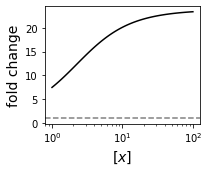

In [6]:
#monotonic up

#x binding 
ax_0_0=0.5
bx_x_0=2
ax_P_0=1.25*ax_0_0 #cooperativity
bx_xP_0=0.75*bx_x_0 

ax_0_1=1.5*ax_P_0
ax_P_1=ax_0_1
bx_x_1=0.5*bx_xP_0 
bx_xP_1=0.5*bx_x_1 


#P binding 
aP_0_0=0.01
aP_x_0=1*aP_0_0 
aP_0_1=2*aP_x_0
aP_x_1=2*aP_0_1

bP_P_0=100
bP_xP_0=0.75*bP_P_0 #coop
bP_P_1=0.5*bP_xP_0 
bP_xP_1=0.5*bP_P_1 #coop

kopen0=0.1
kclose0=1
kopenx=1
kclosex=0.1
kopenP=kopen0
kcloseP=kclose0
kopenxP=kopenx
kclosexP=kclosex


parset2=np.array([ax_0_0,ax_0_1,bx_x_0,bx_x_1,aP_0_0,aP_0_1,bP_P_0,bP_P_1,aP_x_0,aP_x_1,bP_xP_0,bP_xP_1,ax_P_0,ax_P_1,bx_xP_0,bx_xP_1,kopen0,kclose0,kopenx,kclosex,kopenP,kcloseP,kopenxP,kclosexP])

qs2=np.array([1,1,1.5,2])
plot_pars(parset2,qs2,xmin=0,xmax=2,figname=os.path.join(figsfolder,"S3_2.svg"))

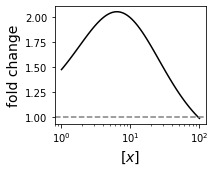

In [56]:
#x binding as in activating mode 
ax_0_0=0.3
bx_x_0=2
ax_P_0=3*ax_0_0 #cooperativity
bx_xP_0=0.75*bx_x_0 

ax_0_1=1.5*ax_P_0 #1.5
ax_P_1=ax_0_1
bx_x_1=0.5*bx_xP_0 
bx_xP_1=0.5*bx_x_1 

#negative cooperativity for binding P when x is bound 
aP_0_0=0.01
aP_x_0=0.1*aP_0_0 #changed from 0.3 to 0.2
aP_0_1=5*aP_x_0
aP_x_1=0.01*aP_0_1

bP_P_0=10
bP_xP_0=bP_P_0
bP_P_1=0.25*bP_xP_0 
bP_xP_1=5*bP_P_1 

kopen0=0.01
kclose0=10
kopenx=5 #10
kclosex=10 #25
kopenP=kopen0
kcloseP=kclose0
kopenxP=kopenx
kclosexP=kclosex

parset3=np.array([ax_0_0,ax_0_1,bx_x_0,bx_x_1,aP_0_0,aP_0_1,bP_P_0,bP_P_1,aP_x_0,aP_x_1,bP_xP_0,bP_xP_1,ax_P_0,ax_P_1,bx_xP_0,bx_xP_1,kopen0,kclose0,kopenx,kclosex,kopenP,kcloseP,kopenxP,kclosexP])

qs3=np.array([0.1,1,1,1])
plot_pars(parset3,qs3,xmin=0,xmax=2,figname=os.path.join(figsfolder,"S3_3.svg"))


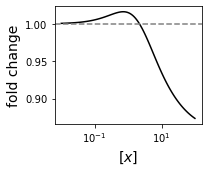

In [30]:
#same binding as monotonic up, a bit less opening effect of the TF, qs unbalanced
#reduce ax00
#x binding 
ax_0_0=0.5 #
bx_x_0=2
ax_P_0=1.25*ax_0_0 #cooperativity
bx_xP_0=0.75*bx_x_0 

ax_0_1=1.5*ax_P_0
ax_P_1=ax_0_1
bx_x_1=0.5*bx_xP_0 
bx_xP_1=0.5*bx_x_1 


#P binding 
aP_0_0=0.01
aP_x_0=1*aP_0_0 
aP_0_1=2*aP_x_0
aP_x_1=2*aP_0_1

bP_P_0=100
bP_xP_0=0.75*bP_P_0 #coop
bP_P_1=0.5*bP_xP_0 
bP_xP_1=0.5*bP_P_1 #coop

kopen0=0.5
kclose0=1.1
kopenx=5
kclosex=1
kopenP=kopen0
kcloseP=kclose0
kopenxP=kopenx
kclosexP=kclosex


parset4=np.array([ax_0_0,ax_0_1,bx_x_0,bx_x_1,aP_0_0,aP_0_1,bP_P_0,bP_P_1,aP_x_0,aP_x_1,bP_xP_0,bP_xP_1,ax_P_0,ax_P_1,bx_xP_0,bx_xP_1,kopen0,kclose0,kopenx,kclosex,kopenP,kcloseP,kopenxP,kclosexP])

qs4=np.array([0.5,0.,1,0.1])
plot_pars(parset4,qs4,xmin=-2,xmax=2,figname=os.path.join(figsfolder,"S3_4.svg"))

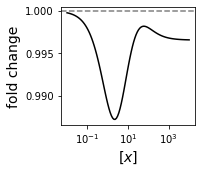

In [9]:
#this one is not on the paper as of now
#same binding as monotonic up, a bit less opening effect of the TF, qs unbalanced

#x binding 
ax_0_0=0.5
bx_x_0=2
ax_P_0=1.25*ax_0_0 #cooperativity
bx_xP_0=0.75*bx_x_0 

ax_0_1=1.5*ax_P_0
ax_P_1=ax_0_1
bx_x_1=0.5*bx_xP_0 
bx_xP_1=0.5*bx_x_1 


#P binding 
aP_0_0=0.01
aP_x_0=1*aP_0_0 
aP_0_1=2*aP_x_0
aP_x_1=2*aP_0_1

bP_P_0=100
bP_xP_0=0.75*bP_P_0 #coop
bP_P_1=0.5*bP_xP_0 
bP_xP_1=0.5*bP_P_1 #coop

kopen0=0.51
kclose0=1
kopenx=1
kclosex=1
kopenP=kopen0
kcloseP=kclose0
kopenxP=kopenx
kclosexP=kclosex


parset_int1=np.array([ax_0_0,ax_0_1,bx_x_0,bx_x_1,aP_0_0,aP_0_1,bP_P_0,bP_P_1,aP_x_0,aP_x_1,bP_xP_0,bP_xP_1,ax_P_0,ax_P_1,bx_xP_0,bx_xP_1,kopen0,kclose0,kopenx,kclosex,kopenP,kcloseP,kopenxP,kclosexP])

qs_int1=np.array([0.45,0.1,0.45,0.1])
plot_pars(parset_int1,qs_int1,xmin=-2,xmax=4)#figname=os.path.join(figsfolder,"S3_3.svg"))

In [61]:
parnames="ax_0_0,ax_0_1,bx_x_0,bx_x_1,aP_0_0,aP_0_1,bP_P_0,bP_P_1,aP_x_0,aP_x_1,bP_xP_0,bP_xP_1,ax_P_0,ax_P_1,bx_xP_0,bx_xP_1,kopen0,kclose0,kopenx,kclosex,kopenP,kcloseP,kopenxP,kclosexP"
parnames=parnames.split(",")
print(r"parameter & i & ii & iii \\ ")
print("\hline")
print("\hline")
for i in range(len(parnames)):
    par=parnames[i]
    par=par.lower()
    f=par[0]
    s=par[1]
    if f=="k":
        bound=par.replace("open","").replace("close","").replace("k","")
        if bound=="0":
            bound="\emptyset"
        else:
            bound="\{%s\}"%",".join(list(bound))
        latex_name=f+"_{%s,%s}"%(s,bound)
    else:
        conformation=par[-1]
        if conformation=="0":
            conformation="c"
        else:
            conformation="o"
        bound=par.split("_")[1]
        if bound=="0":
            latex_name="%s_{%s,%s}"%(f,s,conformation)
        else:
            bound="\{%s\}"%",".join(list(bound))
            latex_name="%s_{%s,%s,%s}"%(f,s,bound,conformation)
            
        
    val1=parset2[i] #first monotonic up, then down, then non-m
    val2=parset1[i]
    val3=parset3[i]
    #val4=parset4[i]
    print(r"$%s$ & %2.4f & %2.4f & %2.4f \\"%(latex_name,val1,val2,val3))
    print("\hline")
for i in range(4):
    val1=qs2[i]
    val2=qs1[i]
    val3=qs3[i]
    #val4=qs4[i]
    qname=[3,4,7,8][i]
    print(r"$q_%d$ & %2.2f & %2.2f & %2.2f \\"%(qname,val1,val2,val3))
    print("\hline")
    

parameter & i & ii & iii \\ 
\hline
\hline
$a_{x,c}$ & 0.5000 & 0.0800 & 0.3000 \\
\hline
$a_{x,o}$ & 0.9375 & 0.0200 & 1.3500 \\
\hline
$b_{x,\{x\},c}$ & 2.0000 & 1.0000 & 2.0000 \\
\hline
$b_{x,\{x\},o}$ & 0.7500 & 4.0000 & 0.7500 \\
\hline
$a_{p,c}$ & 0.0100 & 0.0100 & 0.0100 \\
\hline
$a_{p,o}$ & 0.0200 & 0.0400 & 0.0050 \\
\hline
$b_{p,\{p\},c}$ & 100.0000 & 60.0000 & 10.0000 \\
\hline
$b_{p,\{p\},o}$ & 37.5000 & 10.0000 & 2.5000 \\
\hline
$a_{p,\{x\},c}$ & 0.0100 & 0.0050 & 0.0010 \\
\hline
$a_{p,\{x\},o}$ & 0.0400 & 0.0200 & 0.0001 \\
\hline
$b_{p,\{x,p\},c}$ & 75.0000 & 180.0000 & 10.0000 \\
\hline
$b_{p,\{x,p\},o}$ & 18.7500 & 20.0000 & 12.5000 \\
\hline
$a_{x,\{p\},c}$ & 0.6250 & 0.0400 & 0.9000 \\
\hline
$a_{x,\{p\},o}$ & 0.9375 & 0.0100 & 1.3500 \\
\hline
$b_{x,\{x,p\},c}$ & 1.5000 & 2.0000 & 1.5000 \\
\hline
$b_{x,\{x,p\},o}$ & 0.3750 & 8.0000 & 0.3750 \\
\hline
$k_{o,\emptyset}$ & 0.1000 & 0.1000 & 0.0100 \\
\hline
$k_{c,\emptyset}$ & 1.0000 & 1.0000 & 10.0000 \\
\hline
$

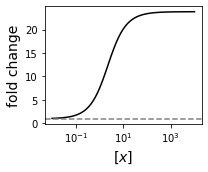

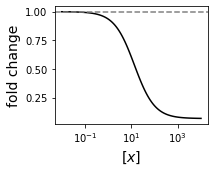

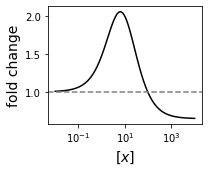

In [60]:
#doublecheck that the printed parameter sets are in fact giving the right functions
plot_pars(parset2,qs2,xmin=-2,xmax=4)
plot_pars(parset1,qs1,xmin=-2,xmax=4)
plot_pars(parset3,qs3,xmin=-2,xmax=4)
#plot_pars(parset4,qs4,xmin=-2,xmax=4)

What comes below has not been reexecuted when preparing the repository.

# Conditions that do not give monotonicity

## Allow TF and polymerase binding in the open conformation to be less than in the closed due to a strong cooperativity in the closed.
Assume that the increase in opening when x and P are bound is greater than the increase of individually x and P, and closing rate is less than their minimum. As it can be seen, activation and or nonmonotonicity can occur.


4848
[5.73959909]
1.4058640045051487,1.8506870760043497,10.31970550733844,0.4514867546483871,0.008924745436155018,0.04055565067994399,10.620161185139851,9.853785040251546,8.50350670677336,0.14730049678014276,4.664717019674073,0.022023331905770008,4.997360995303925,354.529104543957,0.2156104702800852,0.37603562100246807,0.0030720494074684764,0.931665348810706,0.024973289729489284,0.029937147815740583,0.021009221975932524,0.5877984640228987,3.783632748810983,0.00726496491737025,1.0,1.0,1.0,1.0


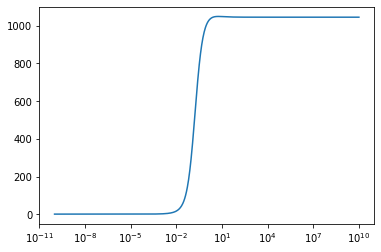

10533
[27761.76090676]
0.010219965605257083,0.9926851835337275,1.8902626631440227,1.1137072666369836,0.013044095202556841,0.33059461461663187,11.710402261889607,2.035665500425761,3.5107586678177256,0.8715271000924257,1.7167463312201239,0.006377213521262431,0.2581518958450821,5.53691764876173,0.002210381215974711,0.19435605234918402,0.0010339788869449388,33.48165592788638,0.0026810985866877477,0.043189621248476556,0.21067647364623146,15.169910197260323,5.421215043268009,0.0021454516663053447,1.0,1.0,1.0,1.0


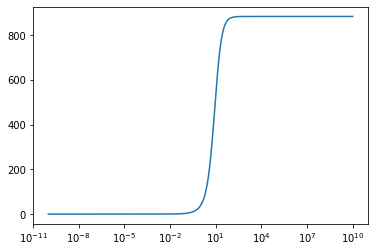

15078
[2112.1059444]
0.6486803586484461,0.9044127193479827,736.9213556699801,422.2387460790132,0.2789937683806329,0.434450611096438,9.840143502243475,2.276174636369042,9.046671205361314,11.892661315865842,0.1959836187890975,2.025540884270215,337.80013490955736,719.1376379680956,0.8945154138307612,9.010996162649372,0.002473478302538349,12.9096024741099,0.014700070056366652,0.15772102212819725,0.07549647617379848,0.02817871220319739,0.2695085723766044,0.013413413192679616,1.0,1.0,1.0,1.0


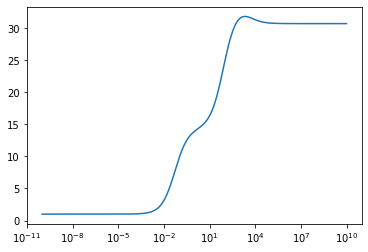

29548
[123.63978452]
0.08795681426253636,1.6841046889820794,0.04498911349996937,0.007039636975198513,0.027805366711912055,0.05447153598194122,0.9322077802001187,0.5874191577471259,23.09682507781431,1.7334448527666133,0.2054374455206758,0.0011452262544843288,0.24130689642986597,449.0417299861568,0.02920762164587977,0.0018085680081081658,0.015894917999582748,137.15793825815044,0.3637950124400132,0.8390667244454636,0.03984033899552654,9.37320305126217,152.12929885098782,0.0022589972955409368,1.0,1.0,1.0,1.0


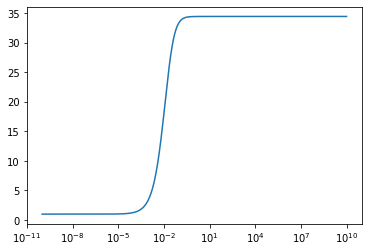

30139
[16353.90485313]
0.006681322331579735,1.71163553093194,151.84838546180774,113.84912102332927,0.007123933606348074,0.029132215522929987,213.40945631189504,8.064565513527487,2.2353620243633214,0.08848842903380819,0.214634819300865,4.115308449098721,0.4762180522831471,43.69167914884157,87.00913793314231,18.657277245881023,0.2254733920354714,433.65628592879125,4.056346971336311,0.7029170290809601,1.4110930254310563,1.4026967140723372,479.3407425608729,0.04063057538996126,1.0,1.0,1.0,1.0


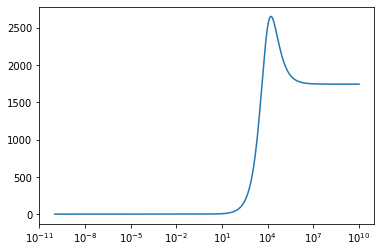

34245
[2882.16901085]
0.2523655239271334,1.4092464735008583,826.8166104870401,77.7737699411692,0.10158008126282946,0.5396168558928733,109.80438192989378,9.42150586600658,17.886580612818378,1.5830209181318995,1.4834061923340307,0.01779483245586534,104.00399405477894,35.28875154479189,275.8994746945189,0.27885364531915097,0.006225519267252428,34.206023016611084,1.3587624833455996,1.3369929708356594,0.027507834452482283,0.3987589551950396,33.145290663126524,0.005165027503761322,1.0,1.0,1.0,1.0


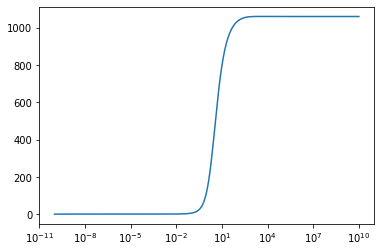

35728
[1064.56209402]
0.12012963926254736,0.26411682236084305,3.98548060322067,0.005900153354429197,0.2326513736594113,0.43069020880945164,0.08661062786321877,0.029995055388471966,97.92786937307072,3.2018812454042442,0.013055036585914196,0.0028604475783011577,1.0555526509872144,0.48799783543531006,0.006829057385877766,0.0011797397378661488,0.07043718442848541,468.75673171089045,0.1027927893604595,0.8733034584151573,0.27544948470082986,93.39099787945354,183.77595105702167,0.16929081208380833,1.0,1.0,1.0,1.0


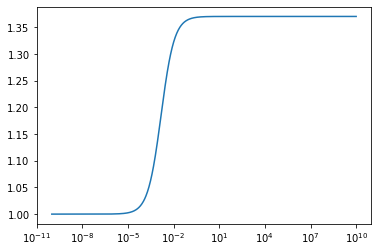

35941
[767.72756467]
0.47548490707395685,1.0991456708074805,0.2844349647087254,0.2766398823295087,0.25962410629623633,1.0236300794578597,97.49468893247554,0.22270182621634782,25.97370583722054,5.673774550314656,1.2517148252186576,0.07791764603941369,31.07898627727913,34.66230841853489,0.004491856918637742,0.07433844626137531,0.17248809181226926,633.890608997254,43.48232999286085,36.28412299769044,8.962713607745988,3.0434408721933583,55.43631233605484,0.006503180300345942,1.0,1.0,1.0,1.0


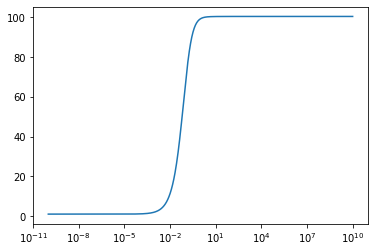

40775
[428.80222825]
0.03660668582190566,0.43436480912518916,8.879320636609002,0.35381260219731697,0.04650642765751299,0.06984661624637101,36.21661812653186,1.5366021076530316,0.7259164034587569,0.07188048531946846,4.590830203575325,0.5623537465842464,0.0687518640804411,106.71706504005476,0.08340100248979344,0.001660017831867424,0.006881273990891373,29.0122688477435,0.01596946323784347,0.1177097428139542,0.32815407790599016,2.6797624553002137,37.87262900985564,0.027553788336152272,1.0,1.0,1.0,1.0


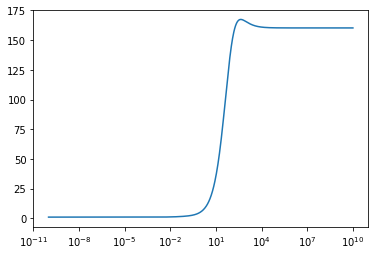

45996
[9.01541748]
9.418030938006986,33.0049430689774,2.2083011883561467,1.3978644061891417,3.924821697254933,10.209396384600444,0.028816854201297825,0.023162792632294815,113.72931427976319,14.090136106086874,0.01107097471928224,0.02253998890444033,21.395918405306944,207.59538507463603,0.023905789476495118,0.0030093489144208834,0.29450867408745945,474.9810571145196,0.583937013093677,5.492644344684356,12.376754485139404,0.9981896146088819,293.62322062319373,0.01867221988770529,1.0,1.0,1.0,1.0


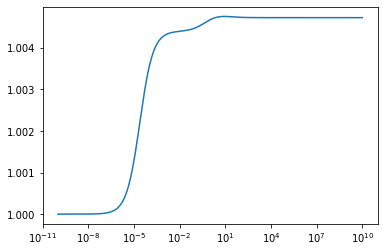

48172
[5318.87982286]
0.02073147079933215,0.09625031849671946,82.24658513165022,14.087811406674975,0.6644648597179464,5.341916180677644,214.92178709724658,6.055274083498765,45.77039351265037,7.2185566983730824,24.938550950506873,1.9290746726356693,0.5032798546906904,3.1960290311093207,65.34588572912374,0.050478598325278415,0.03217591322046748,6.070867048279206,3.2302517914272166,0.05805226409063485,0.3508002831068837,2.7589553428586915,181.43612428386888,0.0021759098941855457,1.0,1.0,1.0,1.0


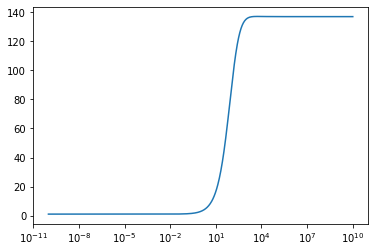

50624
[68556.20538138]
0.0017008279505219645,0.014606482888251695,56.388875703722306,10.303302550402636,0.04818825738404946,0.1666395428511947,43.77811650870696,1.7344518247153593,18.404224198154495,2.432140278933627,2.443091353803866,0.5777071072450896,0.7024818053976866,5.676394558654944,35.79559892134953,0.020540359321554298,15.602705382403032,147.65075827929923,53.792113478252475,2.2581564649018904,20.28367113708156,45.819021638241,209.89072951167248,0.015639129090862694,1.0,1.0,1.0,1.0


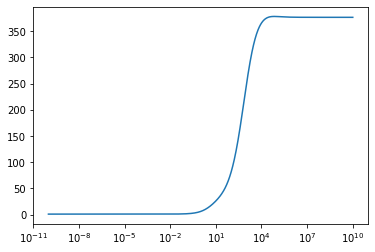

56062
[4710.90551902]
0.23112721142890175,1.1971050211868512,33.9051738495873,28.476577105018386,1.1699158103177694,150.82470553549282,1.5170366763867988,0.1305982907472129,997.1293968196746,207.22589803196297,0.09174710023501893,0.002336838527377773,0.35981710224712,39.54611544768268,0.10049322285431579,4.580913802594635,0.03816484682293068,513.9009063968351,3.591041118850541,5.265704338073759,0.3927402139690413,0.9514845976411339,11.23759335143034,0.032804733785603064,1.0,1.0,1.0,1.0


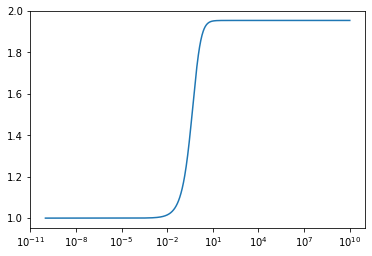

69659
[155225.69294573]
0.004325691030012045,0.11278860639038561,373.6150019509458,80.68257786487831,0.006966211238062193,0.19471892701235394,0.4412866294494365,0.26222294992472117,4.918821033681062,1.5268642139565949,0.016825346464517856,0.0034356434695436704,0.09246006774249073,0.8240317640002587,0.635264559012993,2.1132918961452374,0.04867232476103212,243.81942355664222,1.6964066974671639,0.5837565878798743,10.551547193686844,2.788181122682888,11.373701388082676,0.006783180183945073,1.0,1.0,1.0,1.0


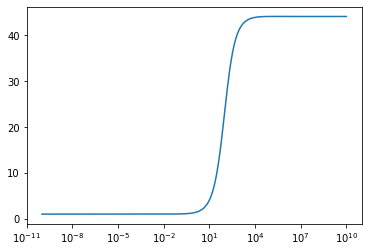

71098
[46819.62410641]
0.007695418556405393,0.24932224885700774,94.47422213361581,67.65954623452284,0.029831406245206776,0.04777678103054234,75.46171107945948,0.4207161549528817,5.655697297606258,0.7506005047696354,3.0852364821340093,0.29067660033244735,1.9250949055747528,13.968654051788537,2.9544981518386866,0.9240545008770007,0.0478737100392137,378.1388965936276,1.2075865363998208,2.3277450004227287,0.2094228554368305,82.7951934719935,13.299499799890832,0.8231415541118681,1.0,1.0,1.0,1.0


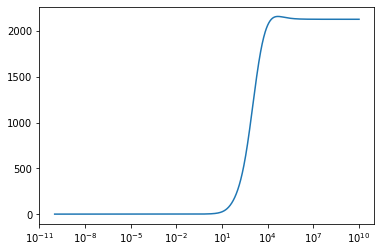

75682
[102647.2105799]
0.0018449864272143217,0.0021386064177995366,12.033219792309502,0.3828214217398518,10.181005841415793,42.25761134342225,44.085666541564244,2.273375883904093,304.5654047761782,51.03826305721921,0.5727741598744391,0.8268287477732794,0.008699883522141507,0.0716039015366005,0.09065029967007804,0.0028745710537210873,0.006291945918101322,140.27723687607187,0.38683744998045205,0.6087666774010716,2.61937612127696,0.1894120178806893,14.941141608929707,0.023326660439927583,1.0,1.0,1.0,1.0


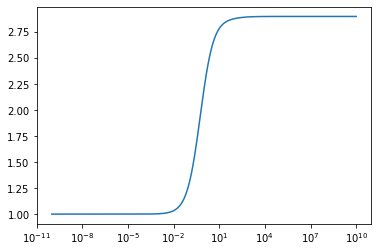

76154
[14.57815755]
0.32832647535237064,2.464569321769754,1.7826092131566786,0.5505167243484901,0.022164056794643065,0.245957821466849,675.1271902884044,410.7455054893734,1.1231223363452734,0.855533053887735,23.198477004502532,359.9497340763906,0.7013668245866203,321.09713263351966,0.0054086833343197655,0.23651732378312648,0.02478238042702164,19.685437928531837,0.9828232489400144,0.28190177475261324,5.492926870478687,0.05664291645378675,6.423213473613226,0.005471331450413874,1.0,1.0,1.0,1.0


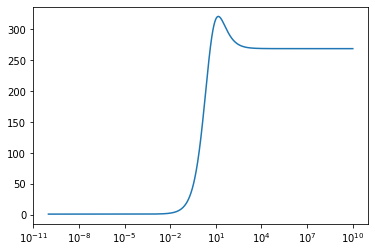

78126
[9006.55177877]
0.01721848468657671,0.028765265646821008,267.73253059941,91.72578849287818,0.002024203167981009,0.002443654471684356,0.07423504013529542,0.033145515002053906,0.4401042434411445,0.008260350829620778,0.004892378686070557,0.0022972533663276427,0.5764162820870459,0.46685292284168034,108.75962113402376,1.0117980458043176,0.24751222535018708,5.175564341292783,4.320666703225573,0.17869940450377536,3.7456337012442615,0.14346564567482273,25.784905266286906,0.06281187959284165,1.0,1.0,1.0,1.0


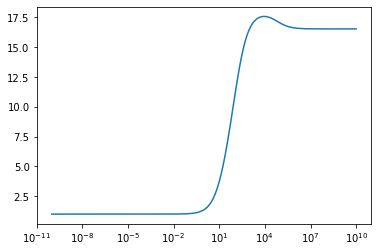

84050
[5164.46837598]
0.004289700737867824,1.298287506548411,0.6470469291971398,0.34411447778150994,0.8722611952171043,2.044190767658061,4.9557893347867275,1.131561106704301,701.0542033254887,9.635779673983128,0.03860581146985617,0.016555677985139867,2.0242876402159644,9.247854654110425,0.0012496606392261135,0.0010819843830479586,0.0030931502438501356,146.65174813554745,0.0254800871122322,0.40929800881853157,1.2455537788458564,99.03388617287284,11.745974621841311,0.3923100137237356,1.0,1.0,1.0,1.0


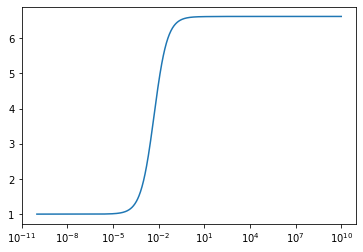

92704
[2228.14959551]
0.02863907403966583,1.1853207617321107,20.57832760767549,2.774673616112176,0.010139862555344907,0.09198307752284304,0.19203029806029479,0.019749201535146005,3.5296884552532277,1.4627720995177311,0.025883485284651342,0.0053526687550955465,7.864740564643368,783.0845613007525,0.7663152865893976,0.006056605787248821,0.021911152964465965,13.015250005522695,0.19415675212577443,0.015196408567456337,0.3867421913844016,0.9763079780569426,339.4007413963247,0.004668877059363336,1.0,1.0,1.0,1.0


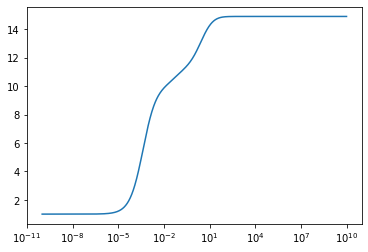

95763
[14.95860948]
0.07080305893864702,5.131513340097524,0.05704729855274794,0.030922959185883975,0.020473853852346294,0.21456501198771613,0.44356839080553084,0.001659662827352507,7.96358306734721,0.40016338755201336,0.2083355802802719,0.0015759703427547533,17.47784587593977,300.119763978104,0.004381054668961147,0.00793054867874372,0.06601504810146762,2.915245835980665,0.5062719194775067,0.009361717311139517,0.15639422177234977,0.0037166398006185063,162.04289748681964,0.0034795934716041737,1.0,1.0,1.0,1.0


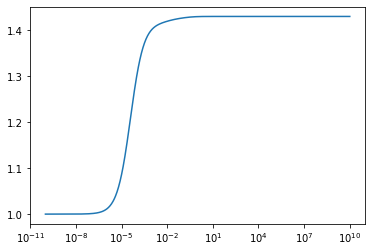

96249
[89830.67317903]
0.029092611959602836,0.12320283104273588,2.109078600499245,0.28845794370335914,10.328109674946456,31.307124197596867,78.78795468964567,10.673736337564321,934.937056222637,133.1861692210058,0.2506778348038992,1.5132803605754113,11.269880273194618,22.834763959269882,0.22331874917552508,0.04772825227957111,0.12007658280725841,316.97291320301775,6.622216982517751,22.404371629671193,0.1365608295648467,1.3037198354724764,31.077616939390303,0.0013770869990351934,1.0,1.0,1.0,1.0


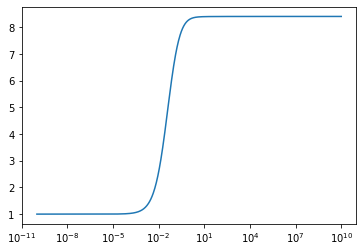

In [7]:

xvals=np.logspace(-10,10,1000)
for i in range(10**5):
    np.random.seed(i)
    v1,v2,v3,v4,kopen0,kclose0=10**np.random.uniform(-3,3,size=6)
    f1,f2,f3,f4,f5,f6,f7,f8,f9=10**np.random.uniform(0,3,size=9)
    d1,d2,d3,d4,d5,d6,d7,d8,d9=10**np.random.uniform(-3,0,size=9)
    q3,q4,q7,q8=[1,1,1,1]


    ax_0_0=v1
    bx_x_0=v2
    ax_P_0=f1*ax_0_0
    bx_xP_0=d1*bx_x_0

    aP_0_0=v3
    bP_P_0=v4
    aP_x_0=f2*aP_0_0
    bP_xP_0=d2*bP_P_0

    
    ax_0_1=f3*ax_0_0 #note that ax_P_0 can be greater than this value
    bx_x_1=d3*bx_x_0 #note that bx_xP_0 can be less
    ax_P_1=f4*ax_0_1 #not ethat aP_x_0 can be greater
    bx_xP_1=d4*bx_x_1 #note that bP_xP_0 can be less
    
    
    aP_0_1=aP_0_0*f5
    bP_P_1=bP_P_0*d5
    aP_x_1=aP_0_1*f6
    bP_xP_1=bP_P_1*d6


    kopenx=f7*kopen0 
    kclosex=d7*kclose0
    kopenP=f8*kopen0
    kcloseP=d8*kclose0
    kopenxP=f9*np.max([kopenx,kopenP])
    kclosexP=d9*np.min([kclosex,kcloseP])

    parset=np.array([ax_0_0,ax_0_1,bx_x_0,bx_x_1,aP_0_0,aP_0_1,bP_P_0,bP_P_1,aP_x_0,aP_x_1,bP_xP_0,bP_xP_1,ax_P_0,ax_P_1,bx_xP_0,bx_xP_1,kopen0,kclose0,kopenx,kclosex,kopenP,kcloseP,kopenxP,kclosexP])
    if np.all(parset>1e-3) and np.all(parset<1e3):
        qs=[q3,q4,q7,q8]
        pars=np.concatenate((parset,qs))
        instance.fill_num_den(pars,othervars)

        monotonic=instance.interfacemonotonic()
        if np.any(monotonic != -2):

            xval=0
            expr0=instance.interfaceGRF(xval)
            #acc0=np.sum(Ps[4:])

            values=np.zeros_like(xvals)

            for x_,xval in enumerate(xvals):
                expr=instance.interfaceGRF(xval)

                values[x_]=expr/expr0
            if True: #np.any(np.diff(values)<-1e-2):
                print(i)
                print(monotonic)
                print(",".join(map(str,pars)))


                #print(q4,q3,q8,q7)
                #print(",".join(list(map(str,parset))))
                sys.stdout.flush()
                plt.plot(xvals,values)
                plt.xscale("log")
                plt.show()
            else:
                print("*",end=",")

0
-4.875425106964926e-06
[4715.59409081]
0.00015341435742898213,0.002257024201251815,101804749.25021902,9256.678934102105,4.13599739383989,0.4226515155454816,1.8590843630169642,1995133.9049549573,0.5779710096399676,1.0328944624201253,140880.6110582284,94.06602263313854,0.0007102246681531623,1.9628224813442798,7201840.22327403,19.549524484259866,0.3482802087028329,7.505241622349538,0.008440474901378586,4489.051556503876,0.3482802087028329,7.505241622349538,0.008440474901378586,4489.051556503876,1.0,1.0,1.0,1.0


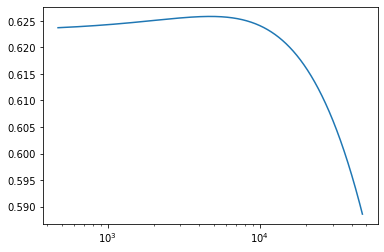

1
-3.669158231620062e-07
[96.78267633]
7.100300615334165e-07,0.005676052912418244,146346.30661307104,228.36478891303685,0.001001581395585897,0.260789231829895,0.06516215458215692,10692.79602797611,0.0016606836039448685,0.0008043979887686971,36104022.587844625,0.2675174924660036,0.00026922533166673075,0.3177840006884067,3539.4156306514546,20.986835607646604,0.0075951323286823896,0.0035812246787002297,6.61923621075281e-05,1.543063781791908,0.0075951323286823896,0.0035812246787002297,6.61923621075281e-05,1.543063781791908,1.0,1.0,1.0,1.0


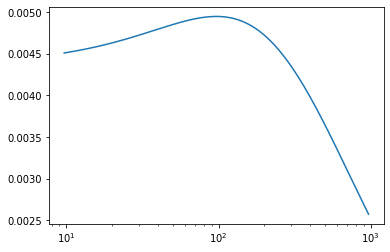

2
-2.6501230280473465e-05
[28.35199741]
0.0015859528035731003,0.15062438641301162,5.161977846354975,0.1031265027299671,1.985979984885013,2.637601896644883e-05,0.4091988040159678,10.346142787215225,0.00045209123393837443,0.0031177004124995408,780715.4622661485,1.0367503526103208,0.0045772623266872245,0.4130184122809878,0.8172112018286286,0.0014307290357163471,0.33281800464116373,0.09594203502107342,0.0064058061977923676,3.3322938363747157,0.33281800464116373,0.09594203502107342,0.0064058061977923676,3.3322938363747157,1.0,1.0,1.0,1.0


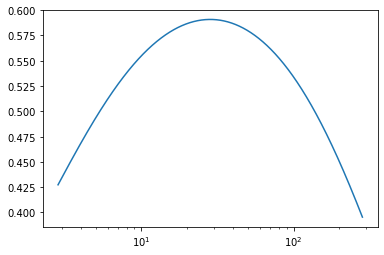

3
-4.3035858216010706e-07
[1.29704026e+03 1.57139134e+07]
6.77723690775727e-07,0.0023808556358407124,2225.597941587501,74.23617213656937,0.05564529299329967,2.2100883014271032e-05,1.1613567037801702,24.331779096226754,4.6399450515004135e-07,0.006681011024844539,12.717656787186314,102.89582983731819,0.00011305644535732552,2.0173786271782266,105.92956284638953,17.737276482506807,227.8671529202063,238.64840361732638,4.775764237742757,1633.8808459227553,227.8671529202063,238.64840361732638,4.775764237742757,1633.8808459227553,1.0,1.0,1.0,1.0


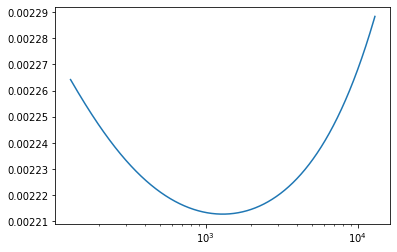

3
-1.2367503276697334e-08
[1.29704026e+03 1.57139134e+07]
6.77723690775727e-07,0.0023808556358407124,2225.597941587501,74.23617213656937,0.05564529299329967,2.2100883014271032e-05,1.1613567037801702,24.331779096226754,4.6399450515004135e-07,0.006681011024844539,12.717656787186314,102.89582983731819,0.00011305644535732552,2.0173786271782266,105.92956284638953,17.737276482506807,227.8671529202063,238.64840361732638,4.775764237742757,1633.8808459227553,227.8671529202063,238.64840361732638,4.775764237742757,1633.8808459227553,1.0,1.0,1.0,1.0


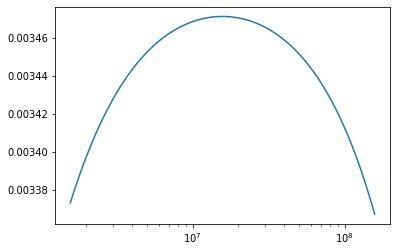

4
-3.697639530619856e-06
[227.90801435]
1.322304113023701e-05,0.6747413521086789,231.9561784676118,2.0048609674620423,685.6558090115634,0.00013591961292096658,19.448941142879605,403.137313944471,1.638206062872754e-05,481.9900579855624,5300.570684434018,7548.760884867995,0.009746555833731121,634.1310723409241,11.508834578876307,1.9204079494910185,15.359353912360037,0.019794155307923222,3.509868983326445,17.64976815830265,15.359353912360037,0.019794155307923222,3.509868983326445,17.64976815830265,1.0,1.0,1.0,1.0


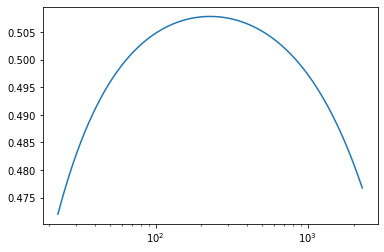

5
-4.779578053094326e-09
[19043564.54608562]
2.2349489554421024e-07,0.0003755468155938499,171085.41649723036,6020.711270808287,0.017390614656223314,30.39664630072651,324.8369675941488,1239357.3806615337,7.460974567984923e-06,0.00010908682071928644,704.1688413348538,6848.463040412943,2.9033800075376826e-06,0.021476278468768904,46778.82462283151,167.64624757559218,0.852054025834519,4.682342494507971,0.006088702782865415,13.976318227282668,0.852054025834519,4.682342494507971,0.006088702782865415,13.976318227282668,1.0,1.0,1.0,1.0


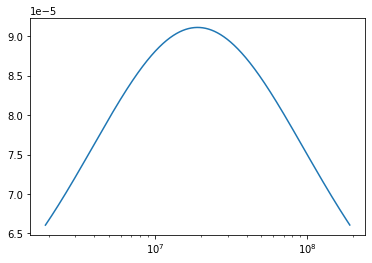

6
-1.3017086908373443e-07
[0.01104946]
0.48432988717657405,65.57457724170337,1324.5945440856644,1.7713366864826439,84.60085230859251,1.5892631299497228e-07,0.001779015591677929,1104687.4886768663,8.997129421019284,12.113968723383934,25563530.680910405,0.06372194014995461,1.1385138124136545,227.59405236972603,17.96903130493503,0.0981474073477034,0.004425273118679857,3.7180256814239887,0.0011283706127783932,202.71607366000714,0.004425273118679857,3.7180256814239887,0.0011283706127783932,202.71607366000714,1.0,1.0,1.0,1.0


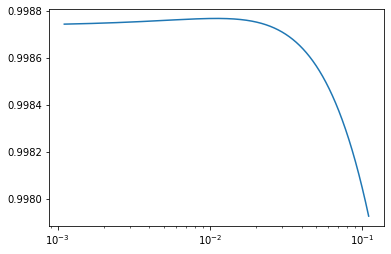

8
-3.8760083453714955e-05
[8102.2262175]
0.010732214915186793,1.2817446129117864,10507453.058712976,10430.330191356683,164.12216651223034,0.00047672623582310076,1.5315604727301644,12994.88735044534,0.0034780544993271703,145.80717006946782,761.3345171153001,293.64382742923783,1.0699592173711323,174.01088538203655,385764.3329396303,647.5062681310851,0.02490978435589897,0.0011705576987546874,6.0247233133061075e-05,0.16051534180488053,0.02490978435589897,0.0011705576987546874,6.0247233133061075e-05,0.16051534180488053,1.0,1.0,1.0,1.0


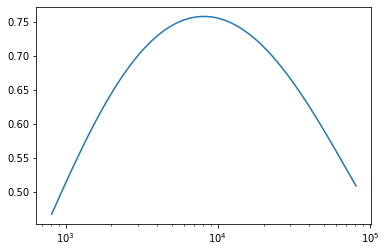

10
-1.0185638556620136e-06
[2.97497659]
0.026432630434023625,6.2114044934220765,1.5081890556774664,0.2547439231107668,6.3370832074846675,0.004848293426268648,31.104505064528105,3281.3254522213106,0.29304731054654554,0.016919968585202557,14440345.617945423,31.964513158393057,0.046646387573534946,42.45451262763635,0.8192875257147776,0.001332022915065906,0.9795848815655197,0.022324403996622978,0.012914106212972726,0.7679919420600242,0.9795848815655197,0.022324403996622978,0.012914106212972726,0.7679919420600242,1.0,1.0,1.0,1.0


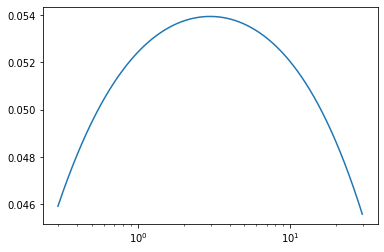

11
-1.2727757159325392e-07
[4103370.16747123]
2.7693810287906074e-10,1.3901733913691484e-05,9052.561752192463,0.037928552693923326,0.6016046147991969,0.003201388030476503,22.36678561937985,67.74485379387923,1.4431976604096526e-05,0.17144989859395618,508092.4223007024,10747.713623936099,3.113728759408919e-08,0.012067522945231826,25.373841805931647,0.0013087341919510154,0.3320638719075076,0.8176408650040381,0.00359000538817809,304.80727632842013,0.3320638719075076,0.8176408650040381,0.00359000538817809,304.80727632842013,1.0,1.0,1.0,1.0


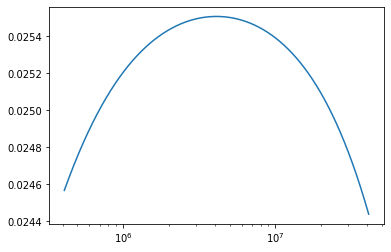

13
-5.722046213865739e-07
[16821.66627775]
3.2065370852641822e-06,0.2723041821335122,69618.00708923115,5.647118017453967,88.24115743040969,3.0874649071412214e-05,623.0102447828328,8520.403872939047,0.0004007005436983537,0.3975284573377581,900897.1466071785,933.3244948168516,0.0030046781366286253,46.367583576262476,474.9707859779856,0.02662240709926164,684.8676985866477,0.525648566645337,6.219862479191162,195.8295889239022,684.8676985866477,0.525648566645337,6.219862479191162,195.8295889239022,1.0,1.0,1.0,1.0


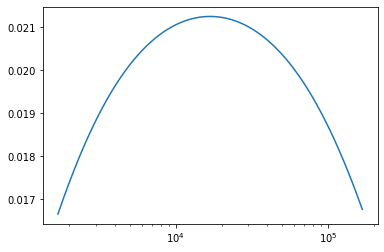

16
-2.0656284388742563e-05
[15729.35757287]
2.934656758079808e-07,0.00268892455779138,4615.104131677238,4.267507798340791,2.014692359792081,6.414701848595863e-08,0.0018776372856925579,36.01875996848387,0.0077447721166978645,1.1409582755810888,14.074498815935154,0.2763969422476596,6.643101401896066e-05,0.02186484862213372,6.936636292776107,1.3771462010035063,0.14600677625098918,0.02180146360131941,0.007306543903901666,0.06513916253228115,0.14600677625098918,0.02180146360131941,0.007306543903901666,0.06513916253228115,1.0,1.0,1.0,1.0


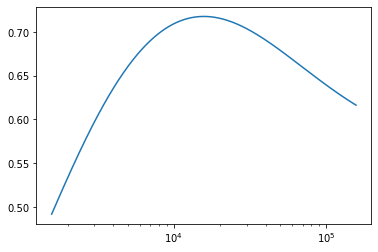

17
-3.0946534987439235e-06
[ 5852.21732102 68667.63186821]
4.63841662567985e-06,0.0026499893101315634,1261.7077680130185,81.34469121151663,0.014096935793300899,0.008921685661199469,0.0025550661544710236,0.4184728387860963,4.530445997382099e-10,0.0006817912726085444,24750.177481739312,0.998914827759083,0.00016435536369759727,0.05861246900985804,106.54129307806899,1.52588053739667,52.71239634299262,8.66964132835411,0.8129335888600033,3714.2634877316063,52.71239634299262,8.66964132835411,0.8129335888600033,3714.2634877316063,1.0,1.0,1.0,1.0


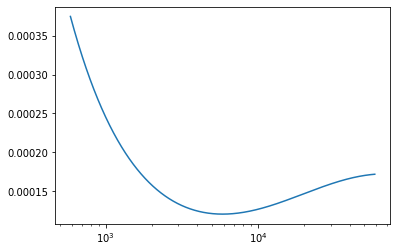

17
-1.5825143277997233e-08
[ 5852.21732102 68667.63186821]
4.63841662567985e-06,0.0026499893101315634,1261.7077680130185,81.34469121151663,0.014096935793300899,0.008921685661199469,0.0025550661544710236,0.4184728387860963,4.530445997382099e-10,0.0006817912726085444,24750.177481739312,0.998914827759083,0.00016435536369759727,0.05861246900985804,106.54129307806899,1.52588053739667,52.71239634299262,8.66964132835411,0.8129335888600033,3714.2634877316063,52.71239634299262,8.66964132835411,0.8129335888600033,3714.2634877316063,1.0,1.0,1.0,1.0


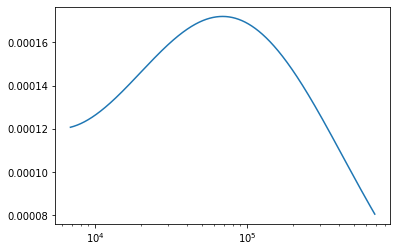

18
-1.2428253109431076e-05
[2996.21907781]
0.0013929555883316564,0.9186625755452974,7115.896633991761,991.7599978092608,186.89979521677012,8.562849769698452e-05,0.012332222513945484,347.908966884303,0.0008356299735220932,2.131995245277167,33.79283451001467,1.993265856363333,0.35321097736958224,7.9844581781003034,5852.101567925707,1.0782519256100433,129.83698202524917,31.68237401965186,30.42846577861526,36.57960844592395,129.83698202524917,31.68237401965186,30.42846577861526,36.57960844592395,1.0,1.0,1.0,1.0


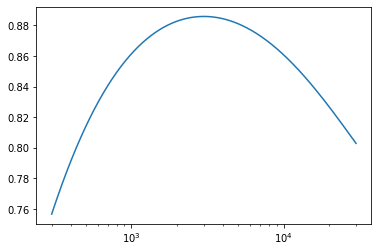

19
-1.733762869507438e-06
[1.23187588e+08]
6.3183753892698714e-09,1.1003399413946557e-05,695805155.9349605,9711.351968344374,0.030312924582400633,0.028026424842032913,0.006742021371544478,88.43975357958772,9.944901246424642e-06,0.02089815634281704,1546.09220434759,0.29205859988106136,4.360990287403756e-07,0.0038477036073727095,8619963.724202994,36.94011984151715,0.0974270111694909,0.003147729397286634,0.02092922437558523,0.01585716734640609,0.0974270111694909,0.003147729397286634,0.02092922437558523,0.01585716734640609,1.0,1.0,1.0,1.0


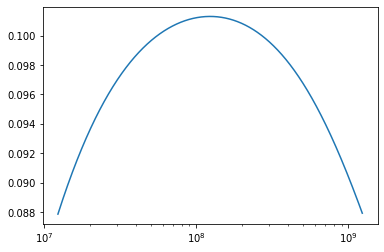

20
-1.2691336315207025e-08
[6510.05848879]
7.085373667040377e-06,0.007565994336416022,3142101.8189511504,8746.115409794129,223.45206724513133,0.007816000300310825,78.52805915176147,41.810734760710346,0.00016292425465137483,157.95066372350635,580.2253912253194,17540.2464934828,0.0013574008297343927,3.3789736609084127,823511.3714087169,243.37858817405328,0.0016418652596923624,14.143128607426414,7.950566743198806e-05,5029.541661056611,0.0016418652596923624,14.143128607426414,7.950566743198806e-05,5029.541661056611,1.0,1.0,1.0,1.0


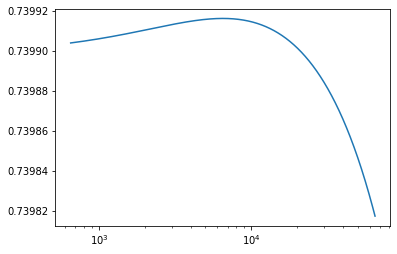

21
-1.4297254872897014e-05
[12559.08010025]
5.7351373840147085e-05,0.00037083506367964285,2520.611138036458,5.325848921237905,21.1737646243584,2.6587435144339278,0.00134802361237774,7018578.217457575,0.00011110527116867562,2.9233402395396206,67.60840083306869,0.003383911974604636,0.00030243786768329643,0.0019604207238915726,44.74371317447549,0.054282264732006175,0.01720032256938394,0.002016691835958241,0.00011156960862608519,0.006902612997055707,0.01720032256938394,0.002016691835958241,0.00011156960862608519,0.006902612997055707,1.0,1.0,1.0,1.0


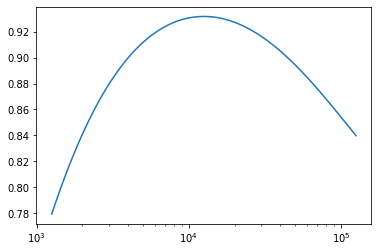

23
-8.479970570185458e-08
[48205982.80243197]
5.230322652123861e-06,0.4355808413753062,8893042.106787996,7229.412776400267,39.15241509022863,0.011357485835975782,0.04947377661534693,17716058.28771032,0.004301905969562623,2.960108774372073,0.1661210971840354,22.346920240365694,0.0006828024749498724,1.269951990389439,516725.70211721456,480.59098821759255,0.021196891634849863,13.101846634318525,4.546794451102323e-05,104.36661058408338,0.021196891634849863,13.101846634318525,4.546794451102323e-05,104.36661058408338,1.0,1.0,1.0,1.0


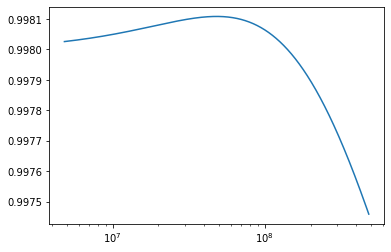

24
-1.2665736615069534e-06
[0.38289295]
0.122571770630473,59.63806001997983,5101.372104283727,139.99522828397986,998.1682595321369,0.9991859508213831,0.020912396217788235,280.8419230510733,0.0054403271312365225,8.264974644924811,162152986.26007214,2.8142228597397727,2.8887557948666003,575.5775152413095,359.539800029899,15.742449169733101,0.14666893003919274,27.481848507582708,0.011477504088713867,13787.109752996033,0.14666893003919274,27.481848507582708,0.011477504088713867,13787.109752996033,1.0,1.0,1.0,1.0


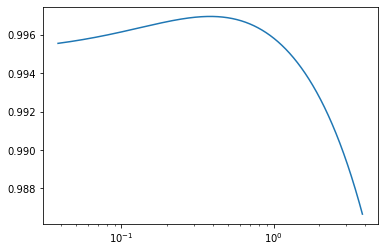

25
-1.4469173799436241e-05
[1.04192028]
0.0024867982825396264,1.5808774265298227,37707.1485063816,64.0464040722887,0.04710138137870369,0.22975784827609894,0.01304570015955815,6.144415676874745,0.32267836205323713,0.0016693236189684853,4524.3805282153,0.28612771811039245,0.1979050662433014,166.24355590826227,2986.6389631860443,3.116460107452989,0.2928200210726541,0.005061197476251086,0.004128051930709688,0.28879431006105155,0.2928200210726541,0.005061197476251086,0.004128051930709688,0.28879431006105155,1.0,1.0,1.0,1.0


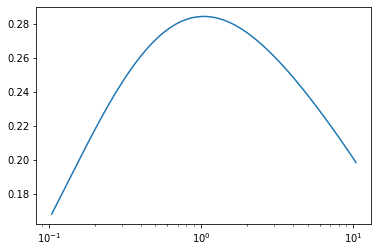

26
-8.695707494690841e-08
[695938.59993143]
0.0015100584757842671,0.05430330352781964,25535.626359256323,40.264777058456744,40.71795604626655,0.00015263483098677135,54.36562899043349,11.831470005644146,0.006572754593293019,1.6583422473611529,21.267494478386038,383.372741806123,0.02981736276636935,0.07040600720615493,6641.872586897996,1.3072205780433572,167.25240632792634,0.013413074899770304,162.4011375853951,2.57245601725949,167.25240632792634,0.013413074899770304,162.4011375853951,2.57245601725949,1.0,1.0,1.0,1.0


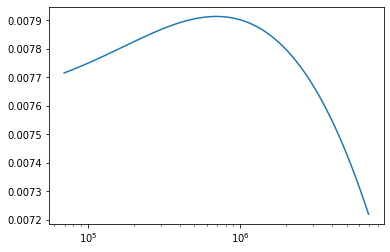

28
-4.662210016919549e-13
[3.91960717e+10]
8.731711606398862e-06,0.1803058249201601,558126087.4006346,847.1810635255184,0.005620857200487795,0.0017865758193663947,0.24297087192698302,23344853.05640358,9.889871480068785e-05,0.0001092720404614706,544204.7006536961,1.2302100653105457,0.0005686314338811787,23.66368925930781,622432.0078024251,2.3304383257472274,48.73592772946106,1.1640131588416114,15.068063945852227,1.3964308524148572,48.73592772946106,1.1640131588416114,15.068063945852227,1.3964308524148572,1.0,1.0,1.0,1.0


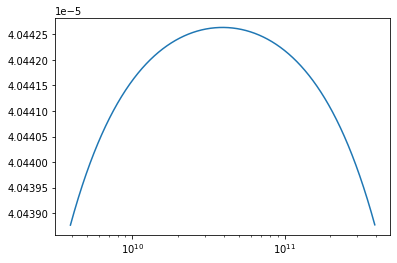

29
-1.8506432455689696e-09
[12.29444224]
0.04127871246658314,1.0954074645454484,575681.4262054744,18.036452160423057,0.002751302409474899,1.0931997912611592e-07,37.96848128468345,178.19903737735396,0.00047805923478599476,0.0016231872125365048,124208243.0746176,56.827054165929134,0.12387022786215,152.2509157284063,3637.064874348771,0.05121955386846463,0.5203725097728167,1.7938298396364434,0.13715442855785404,30.394011435047787,0.5203725097728167,1.7938298396364434,0.13715442855785404,30.394011435047787,1.0,1.0,1.0,1.0


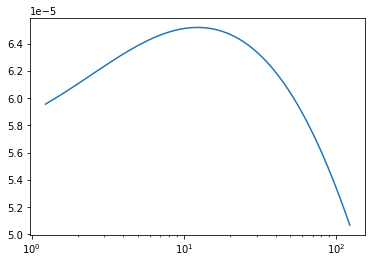

30
-1.3498209562867736e-06
[13383.46953268]
0.00013813302813420268,0.028325330552594723,926.4409325724926,0.9764828600389676,9.512341470096693,0.00012521838700774355,0.009591893688289216,2437.608784674304,5.697163141754204e-10,1.5245622501103442,456.6761380547795,0.34390096707663487,0.027211722885596454,7.325903883933694,55.81455032940609,0.1925266871150546,596.5500439612683,0.12021842731616605,69.29151090453686,24.017973492242884,596.5500439612683,0.12021842731616605,69.29151090453686,24.017973492242884,1.0,1.0,1.0,1.0


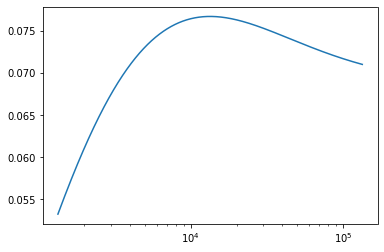

31
-3.885251964126993e-06
[7.52783312e+02 8.61036831e+06]
1.3700078708452845e-08,0.0011384170247189615,64736.7941132068,900.635275333936,41.86755440256833,0.010754206940145984,834.1036440511095,4.8262876176026825,8.483221464171489e-05,0.2660469184489369,4520.257296467004,84508.68377269254,1.7539661846398286e-06,0.052038279567959395,1515.469220094477,560.5745785855792,0.017741599508140818,0.0066298284819270616,0.00029556280793350566,0.12853143632079567,0.017741599508140818,0.0066298284819270616,0.00029556280793350566,0.12853143632079567,1.0,1.0,1.0,1.0


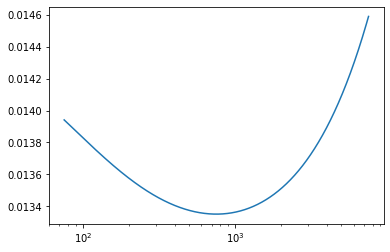

31
-3.689706628007272e-07
[7.52783312e+02 8.61036831e+06]
1.3700078708452845e-08,0.0011384170247189615,64736.7941132068,900.635275333936,41.86755440256833,0.010754206940145984,834.1036440511095,4.8262876176026825,8.483221464171489e-05,0.2660469184489369,4520.257296467004,84508.68377269254,1.7539661846398286e-06,0.052038279567959395,1515.469220094477,560.5745785855792,0.017741599508140818,0.0066298284819270616,0.00029556280793350566,0.12853143632079567,0.017741599508140818,0.0066298284819270616,0.00029556280793350566,0.12853143632079567,1.0,1.0,1.0,1.0


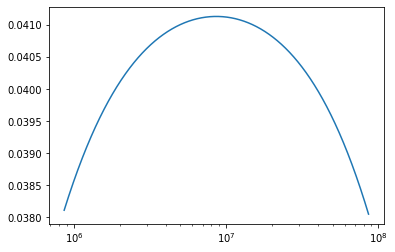

32
-4.756694651497639e-06
[1.06166933e+08]
0.0005711012302542553,8.347170752468616,435230.13346866175,105.13108367453687,2.1417691957886844,0.14377494892011064,541.9251343542487,917191.5976285345,0.0021411830972298145,0.004069138841563218,9.098412107414331,52746.890624576794,0.011785216792552847,142.34283253097368,7064.1294332656325,0.17229272101257054,26.303745147025044,78.92795212226281,13.414724514474093,1668.6732350240743,26.303745147025044,78.92795212226281,13.414724514474093,1668.6732350240743,1.0,1.0,1.0,1.0


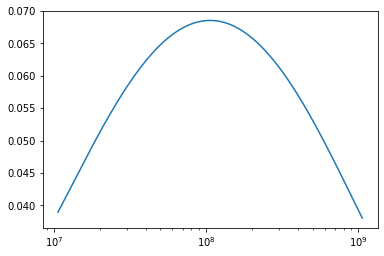

33
-2.7584382503859084e-09
[1.20826532e+11]
6.5767819755344725e-06,0.013581424298881983,1150073.0183345047,362.75100207122114,0.29217618759965125,0.0005917428976118002,0.03645844532158831,798717.280941776,0.0032475631961100893,0.001617892535459796,720344968.6228651,0.06316417951982467,0.0004122263240445044,0.030978527071964905,39898.91033711296,0.50101707400361,166.8684108750064,0.012889603643738876,12.322930164618478,0.14603664135677216,166.8684108750064,0.012889603643738876,12.322930164618478,0.14603664135677216,1.0,1.0,1.0,1.0


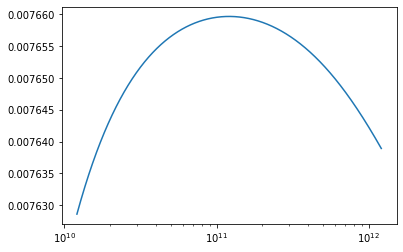

35
-3.2403118138983264e-12
[194713.27278521]
0.00033296715738169474,0.0020228989925507737,5806.275998952626,0.47913875680518947,0.02448624949081551,2.615435893809913e-07,0.04618993068654121,3490.3489203239,1.047776438858783e-06,0.0008635611490894009,1367.859431957476,25.25469533994638,0.0018713227798339233,0.5601826959647047,53.33168732701156,0.07081049686872883,80.05876225240335,0.004656716688517826,1.2195056791609118,0.020395190941144333,80.05876225240335,0.004656716688517826,1.2195056791609118,0.020395190941144333,1.0,1.0,1.0,1.0


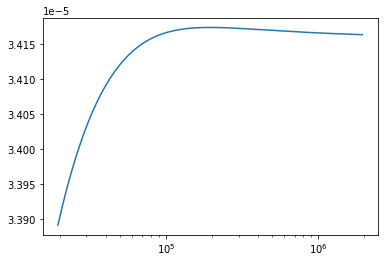

36
-9.299049038125062e-06
[44061.74953437]
3.415628378369947e-05,0.111997875481746,2366.5123843122637,24.385911260486736,516.5162679894725,2.0733510190297625e-05,0.0072283751854381574,13040.578705145408,1.4314680194335299e-09,2.209555627419273,2424181.116190998,0.3231700855358278,0.0014970610016485743,23.498662815463224,1889.844264380725,4.0708516323366055,69.84812930968491,0.15110804232480757,7.191532042476722,0.5892674362717538,69.84812930968491,0.15110804232480757,7.191532042476722,0.5892674362717538,1.0,1.0,1.0,1.0


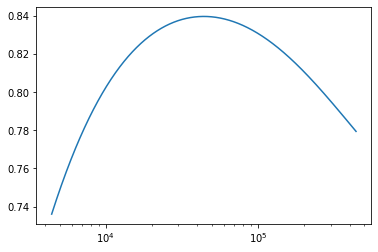

38
-2.5231219158428075e-06
[194296.72487021]
2.0082444998860625e-05,0.005269928817244474,20949.90597027899,2091.2730584538344,462.59167722730433,2.7689021112673643e-05,16.479702285155692,1371.3182192375407,0.0009279438348823025,173.63230514725927,171.59469853089695,464.1907612005089,0.0006142296404766177,0.20353481983871297,12512.965115119448,143.96173748452148,6.335845567353039,4.322825373309574,0.05362087002836377,1742.7542511863437,6.335845567353039,4.322825373309574,0.05362087002836377,1742.7542511863437,1.0,1.0,1.0,1.0


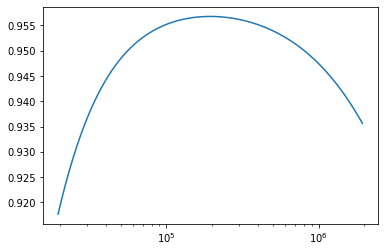

39
-3.667697843257045e-05
[12818.67052515]
5.004206032943093e-05,0.14637708579170813,75311540.46865945,1591.2241482334932,83.6394713941317,0.24265420734629725,0.0053988243871785704,316243.60318374867,1.055647772549262e-05,30.67657865612273,383395.4842381007,3.0978089285305757,0.0008361466876453972,1.911326744954062,125854.83064880672,61.29063596301332,4.092720065770108,1.4226153819999856,0.5924532597269179,24.979278451534558,4.092720065770108,1.4226153819999856,0.5924532597269179,24.979278451534558,1.0,1.0,1.0,1.0


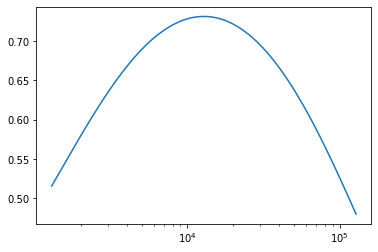

40
-2.256385699506147e-06
[9470.25069195]
4.5552394618221775e-06,0.006249376964460642,3914.5711277240803,0.15982064510186364,53.85292104628853,0.10219153743356248,0.05294575049712915,196.56351232918206,0.0009811434406078177,1.1985344012125776,277228796.1990661,14.646594855790024,1.4210543364851027e-05,0.279332950360416,34.194735793932566,0.002148801213924592,0.5036206414064874,0.06659993909993989,0.05146214257214952,8.9003951526702,0.5036206414064874,0.06659993909993989,0.05146214257214952,8.9003951526702,1.0,1.0,1.0,1.0


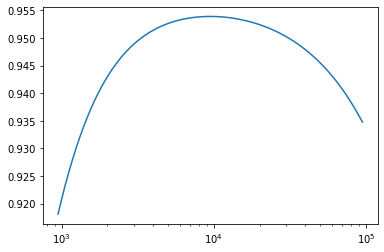

42
-4.569706773260851e-06
[9.85884946e+03 1.07591784e+09]
1.071696451662353e-06,0.0014453314135831402,1699718668.4295225,200823.38161707702,24.65832945854911,0.12073288901658351,3.90796715682288,5.362820644441819,0.0005984354374356288,0.06463164844207867,119.2864343230496,1228.2275299209373,5.422964192929672e-05,0.17670169402947944,12769071.271326166,506.1576888752303,0.008632008168602547,0.008629132190071852,6.49450100377702e-05,0.03740971968984901,0.008632008168602547,0.008629132190071852,6.49450100377702e-05,0.03740971968984901,1.0,1.0,1.0,1.0


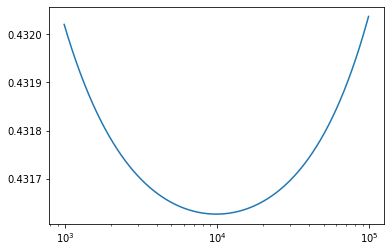

42
-9.585485845509112e-06
[9.85884946e+03 1.07591784e+09]
1.071696451662353e-06,0.0014453314135831402,1699718668.4295225,200823.38161707702,24.65832945854911,0.12073288901658351,3.90796715682288,5.362820644441819,0.0005984354374356288,0.06463164844207867,119.2864343230496,1228.2275299209373,5.422964192929672e-05,0.17670169402947944,12769071.271326166,506.1576888752303,0.008632008168602547,0.008629132190071852,6.49450100377702e-05,0.03740971968984901,0.008632008168602547,0.008629132190071852,6.49450100377702e-05,0.03740971968984901,1.0,1.0,1.0,1.0


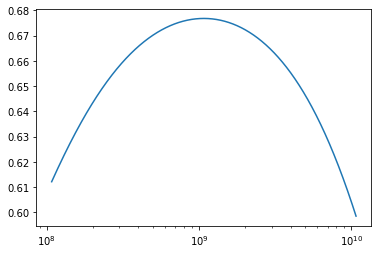

43
-6.629667309334113e-08
[4.94846618e+10]
1.2121971414035924e-09,8.040734875075178e-05,36827.499699437954,189.62075547277067,0.006314599125448373,0.022764739032283005,0.027767560053080162,312910.5338113925,0.04087894468335681,0.005184908055700689,82.08113021903416,0.16099081441132448,7.13814154557435e-07,0.004901481844781307,231.7006999702655,4.512313192130652,0.09179823579122501,142.83181196524427,0.0013151190782207116,211.58250551326324,0.09179823579122501,142.83181196524427,0.0013151190782207116,211.58250551326324,1.0,1.0,1.0,1.0


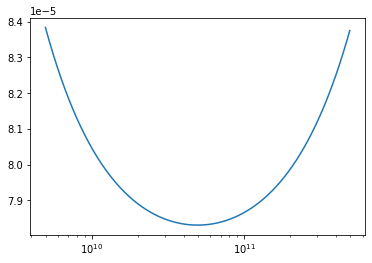

45
-2.928027099592667e-06
[0.00084468]
1.5954224246093445,727.9122502412379,1040.5642194787513,6.126912889192542,0.04882967252744745,0.002596454390634534,0.0029089576355937983,249.03870192294042,3.121038468387938e-06,0.00010618581363403215,1397.0455617965042,2.728364881064717,76.08219360406177,859.1501709669899,13.648780207689626,1.982751837679912,0.4643195563868791,0.6868277260047939,0.0022268006728312995,17.697016823392477,0.4643195563868791,0.6868277260047939,0.0022268006728312995,17.697016823392477,1.0,1.0,1.0,1.0


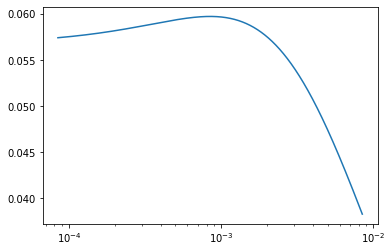

47
-1.6690877103764379e-06
[2.49114972e+08]
6.335141255154247e-08,1.727480865476729e-05,8886660.056689722,12322.45918056483,23.572617055407232,0.00018080904251218185,0.128471511978961,793.4848213930808,9.008983773884319e-10,0.05672199721167758,28.74773342463589,0.25408831892266365,9.749759269507634e-06,0.0047965704916954535,1617299.3872354853,702.9081301964997,17.604789214817895,62.75200548673514,3.072029481481643,499.96190714737867,17.604789214817895,62.75200548673514,3.072029481481643,499.96190714737867,1.0,1.0,1.0,1.0


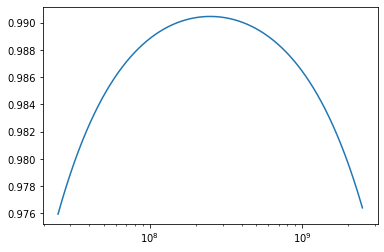

48
-3.095298068716461e-07
[5.66853431e+05 8.21347025e+08]
1.0958471408243845e-09,1.3034164502669581e-05,2559665.431281273,4920.140443629083,0.05118786369752233,0.00014127250110189868,0.06220972259622614,0.6771364065188495,3.0459711541910067e-06,6.614514149203299e-05,1723.7516691018936,1.345040913396913,3.008615304325184e-07,0.0012733319183559765,217103.69688655788,223.5834241770044,56.520443884730895,0.08847561392820143,0.09957929705148957,13.891983551755398,56.520443884730895,0.08847561392820143,0.09957929705148957,13.891983551755398,1.0,1.0,1.0,1.0


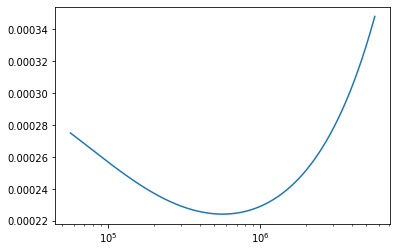

48
-5.62053188254974e-07
[5.66853431e+05 8.21347025e+08]
1.0958471408243845e-09,1.3034164502669581e-05,2559665.431281273,4920.140443629083,0.05118786369752233,0.00014127250110189868,0.06220972259622614,0.6771364065188495,3.0459711541910067e-06,6.614514149203299e-05,1723.7516691018936,1.345040913396913,3.008615304325184e-07,0.0012733319183559765,217103.69688655788,223.5834241770044,56.520443884730895,0.08847561392820143,0.09957929705148957,13.891983551755398,56.520443884730895,0.08847561392820143,0.09957929705148957,13.891983551755398,1.0,1.0,1.0,1.0


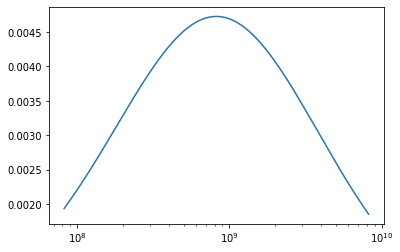

49
-1.5289631069004272e-06
[2.24395376e+08]
5.477192760915489e-07,0.0492367478325559,12929.930995979628,0.1299099751601781,361.4188588800075,8.437557633967995e-06,223.6766396842052,42.177083419403104,1.2205345014828747e-06,47.95538631664529,98.99825376996168,4745.248694283935,7.396808343715585e-05,0.0639420764096158,26.47926367761474,0.03036483963037555,12.579418329238573,2.5194628385184195,8.486856514185998,643.5755557785556,12.579418329238573,2.5194628385184195,8.486856514185998,643.5755557785556,1.0,1.0,1.0,1.0


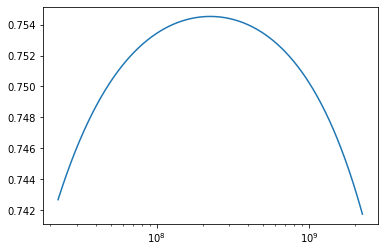

53
-4.0830909046746244e-06
[1.21863743]
0.0031341157136561895,59.21859596944165,4356.242927078451,14.475042174302521,0.5361081561059369,1.789508937281071e-06,0.12973270759435376,6099.981964789054,2.2105563130606235e-05,0.026841635993220488,317731.8902500558,0.1802824745961493,0.18814633694604357,120.2193687564801,394.23667359935837,2.3280550286246005,3.2742233762100765,1.6386962717637208,0.12251058216643118,24.967690940276793,3.2742233762100765,1.6386962717637208,0.12251058216643118,24.967690940276793,1.0,1.0,1.0,1.0


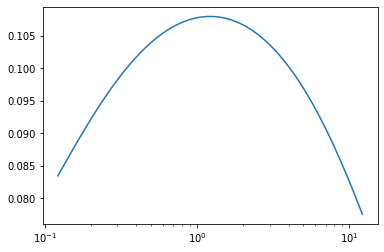

55
-5.611357361573477e-06
[1690745.29094351]
1.155250087056833e-06,0.003277060545577064,379978.7576350614,897.9165581962206,0.8001287631645286,6.544333287191126e-07,0.028519125805422284,1013.3022992362172,8.988422591304802e-05,0.06825453940709564,4.213293897405068,0.030377570457600027,0.00010132561131763961,0.0036195094932296636,1897.925592979327,675.9826042441828,1.537244609573068,0.05167320661210596,0.0017705284853235855,3.7000002478537417,1.537244609573068,0.05167320661210596,0.0017705284853235855,3.7000002478537417,1.0,1.0,1.0,1.0


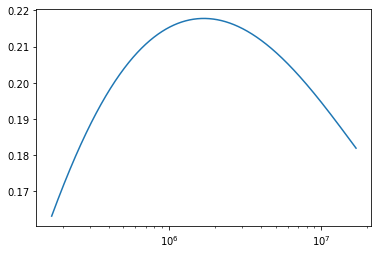

57
-3.1747271412863043e-06
[5.55756937e+08]
1.0267493244618252e-07,8.466214558623097e-05,9498.651672844651,13.71917257461435,0.2926620590798053,0.6366670915481493,0.07323120684887811,2380.0293000338693,3.358653396526327e-05,0.00041961073894868024,0.09295017916318482,1.3373271743825736,1.6966831287356448e-07,0.00334270351014775,505.35920152154625,0.024146967484786678,2.4873410914491862,1.8637266814835456,2.3581642688313584,103.96606016396402,2.4873410914491862,1.8637266814835456,2.3581642688313584,103.96606016396402,1.0,1.0,1.0,1.0


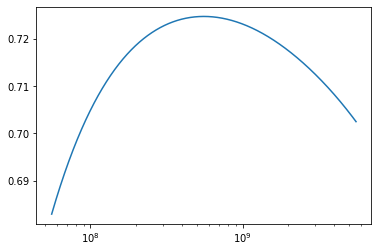

58
-1.2801816924479237e-05
[3329.11489193]
1.3693902941219408e-07,0.0140975084130385,1534398.26689512,6.7899096421916365,0.9470264146631965,1.2052380252762618e-06,0.0028427089678649477,18.54740481581813,0.446866844938865,0.0065016333795673755,553638.0892205472,0.00874744153701418,0.00010930485492334156,0.1551077500503867,1902.979098317781,0.5096071296506632,2.6950665510004836,0.05467691902518011,0.14259130451935725,2.3986510079741765,2.6950665510004836,0.05467691902518011,0.14259130451935725,2.3986510079741765,1.0,1.0,1.0,1.0


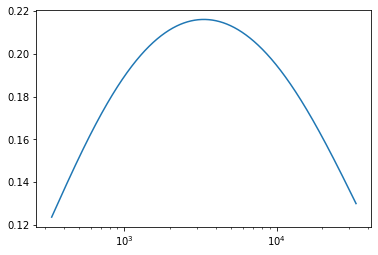

59
-1.563097491663612e-06
[17.23034536]
4.157787512397127e-05,0.7216871880816738,175.58894655234027,0.4356770858300852,159.0341752216046,0.002126461589477217,0.003198465312741522,0.1495561510383787,8.693882880574005e-09,1.392229173693178,1417.5548695817063,0.05159073542349956,0.01893737080592474,350.1149804712205,1.9889999606833637,0.008855711978905981,2.7633895034887384,0.04916302545390046,0.004683504472035327,1.101855939858931,2.7633895034887384,0.04916302545390046,0.004683504472035327,1.101855939858931,1.0,1.0,1.0,1.0


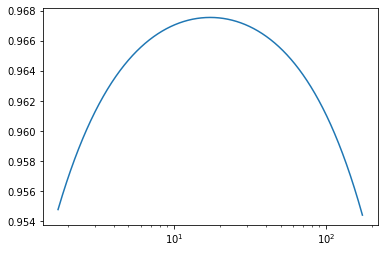

61
-8.58163875031015e-10
[2958991.7323026]
1.8974251514005513e-05,8.896272883134978,81.67667429832375,0.9471747994525875,183.637177582512,2.069480469014108e-05,0.9938202555638618,2935.576911014946,0.016249572038805987,0.24186895670537614,57.29305000780399,436.96636086672413,0.01565648897807296,88.47424300986015,7.750376489023408,0.012248936831990406,615.9686361304159,0.0010502030636079713,15.402263220531534,0.024002605659686174,615.9686361304159,0.0010502030636079713,15.402263220531534,0.024002605659686174,1.0,1.0,1.0,1.0


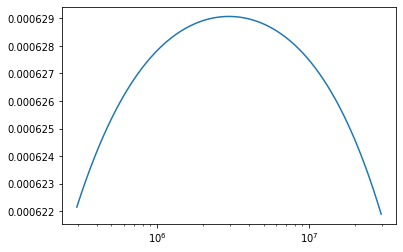

62
-3.175548268974371e-05
[3075762.30847051]
2.3636845271738422e-08,6.514316289853337e-06,15863.198436455637,4.16091829077784,119.26433300240281,0.10842305347326306,0.2940437812121878,494.3328427270649,2.878787630826927e-08,55.450667028061595,254170.27552528572,286.2789756011888,5.013908777324867e-06,0.001594146619459321,21.878531864125645,0.8602903428863095,6.144580558079426,0.05567489717255383,4.7515788512953305,8.938055091894917,6.144580558079426,0.05567489717255383,4.7515788512953305,8.938055091894917,1.0,1.0,1.0,1.0


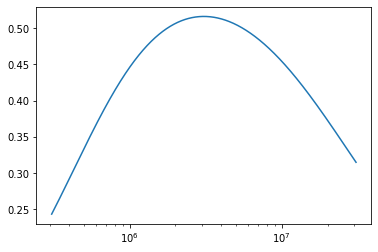

63
-9.401574275145036e-08
[26028817.92190421]
4.691968671569187e-05,0.10763809912767147,2132.7076952065313,10.157032353857554,0.001944288177877576,37.98341602102501,1.4257236919811869,6492.296269585685,0.005871643394267727,0.0009207066228586409,915.7109303259607,297.9812232466806,0.00011163039149419332,2.1069107304970327,448.2963412400485,0.2384994392225742,0.008283835972332823,1.000140389175651,0.0009201747674363029,111.27687360684108,0.008283835972332823,1.000140389175651,0.0009201747674363029,111.27687360684108,1.0,1.0,1.0,1.0


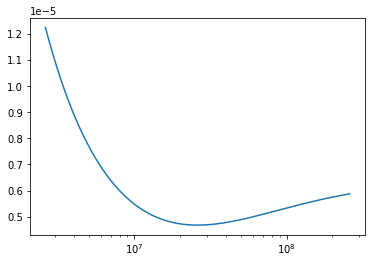

64
-1.2222552228366435e-05
[75866.26914603]
8.31124350354783e-08,0.0002199467060620419,11699.056397797745,19.371684448972626,3.745890483001404,6.646969138601805e-05,0.5002111787386546,13136.05292356848,0.5950091319309483,0.0037966500468889523,930356.6083108697,27.885513179132243,1.763359203572596e-05,0.18818766455065467,757.6781614935278,2.5269055139108385,0.5522286728699854,0.0741149785497736,0.0007065271554389367,0.23597109108031683,0.5522286728699854,0.0741149785497736,0.0007065271554389367,0.23597109108031683,1.0,1.0,1.0,1.0


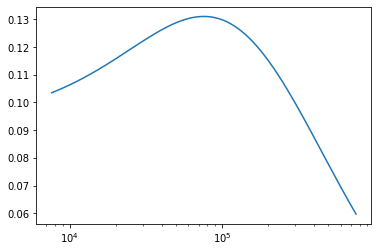

65
-1.0835001657660825e-05
[597.74607179]
2.1159006183536842e-08,0.0033728123286273673,56.75796544261355,0.3183822239422323,0.05281431653976555,1.738661995320927e-05,0.010860952975242717,917.3269237619502,4.0307548313851834e-05,0.000105529985517388,64355.218518331036,0.027442446252698205,1.0553928404352396e-05,0.020505497045405975,11.132844804536612,0.001543179043837075,0.06610864950001717,0.009499512860686864,0.015828040827023875,0.45929119953860836,0.06610864950001717,0.009499512860686864,0.015828040827023875,0.45929119953860836,1.0,1.0,1.0,1.0


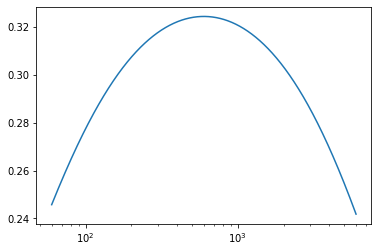

66
-5.40064110741284e-08
[6707.51246005]
1.20054376259637e-06,0.00029449574462236055,264.76554839456486,0.2985747881910811,0.15000743914807294,1.2123674923760765e-06,11.87553687879037,8.42770158063325,1.3879870909838295e-06,0.00018031852059285285,1675.1440194312602,93.44905839097663,1.2201000549874601e-05,0.008428018277768099,10.458319048398613,0.006341578374585633,0.014679130924312743,0.032156020800729476,4.598009483169394e-05,0.039930060591999966,0.014679130924312743,0.032156020800729476,4.598009483169394e-05,0.039930060591999966,1.0,1.0,1.0,1.0


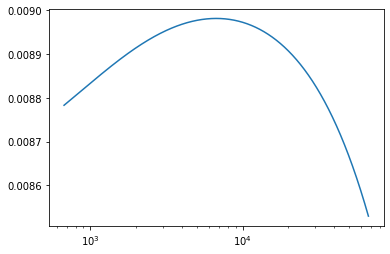

67
-3.383519525668177e-07
[2050380.88695628]
2.0367836067743333e-07,0.011138764327362825,18188648.507303473,89260.56135990428,13.042340053544464,2.4300020964268933e-07,0.09762272497212736,5574.211302811628,2.0912099544488178e-08,9.558327343223468,2452.6845607781856,0.5568849117266768,1.2027610658452089e-05,1.8841200866151886,13155716.630456012,142.27862634159766,0.0022908021253208056,0.20781011670611507,3.5728882400615034e-05,1.8318788875393364,0.0022908021253208056,0.20781011670611507,3.5728882400615034e-05,1.8318788875393364,1.0,1.0,1.0,1.0


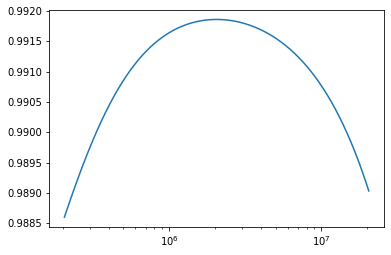

68
-1.2346863496798255e-05
[3622.77186302]
1.4508445245076094e-06,0.007643973056459848,277.759359674985,0.00350493131549895,3.105861267387176,0.011902590831758196,0.004732308045139784,139.84353849049586,8.625374721166426e-10,0.015172323872120886,1874174.9328459862,3.922318795650224,0.0004518421556676085,0.035993892867920985,0.44155075643531316,0.0018203978209302809,4.620199140489224,0.06002438924757825,0.17963659914640623,2.4354937535387617,4.620199140489224,0.06002438924757825,0.17963659914640623,2.4354937535387617,1.0,1.0,1.0,1.0


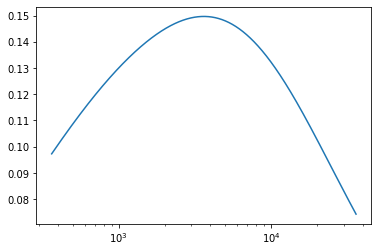

69
-9.277817587355049e-09
[945162.51382593]
5.0315498918617195e-08,0.0015414570372879164,1390447.4979675384,107.09975605645872,0.12633251769807233,0.000588767258986176,54.5074090223446,906.0769128235382,0.00027565125384147656,0.0009563278365571188,22079.641739645893,92.38139154697485,5.385035590978237e-06,0.05990939999103885,11211.549118601646,71.51650691587028,2.333962396328642,0.03323025893065969,0.01581318305003304,0.29824660944321235,2.333962396328642,0.03323025893065969,0.01581318305003304,0.29824660944321235,1.0,1.0,1.0,1.0


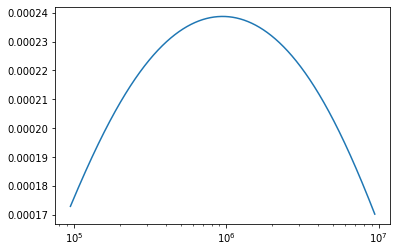

70
-1.6101240939234845e-07
[27122.6674542]
0.000789231083852664,1.3188985668184525,2365452.056983023,3432.896158783371,3.2194941150224627,7.976287185015234e-06,269.7870145901998,565.5076725643916,1.4053427179484497e-06,2.0428696875336887,11133.432718084254,16032.681200704508,0.004924441616617255,367.1835629786794,103806.1438749128,171.6159965116499,0.0796150967389905,0.007727670671724316,0.07213885921274986,0.06577813265604089,0.0796150967389905,0.007727670671724316,0.07213885921274986,0.06577813265604089,1.0,1.0,1.0,1.0


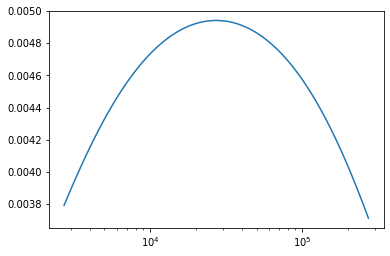

71
-1.4268347561047223e-05
[29403838.37871882]
1.1943597493541972e-05,7.103519218967631e-05,349925.4898859862,202.6186329328971,98.03410579278996,0.01186089115376339,0.015566274843721193,2264509.6658678516,1.599866158052395e-07,1.2772123984238082,5244.230803050999,0.03167246721603769,5.1554138067856615e-05,0.012985289873077116,69629.90595640206,0.2087352605051153,315.7532252947201,53.68639023179415,16.127574875196164,3389.5047744971303,315.7532252947201,53.68639023179415,16.127574875196164,3389.5047744971303,1.0,1.0,1.0,1.0


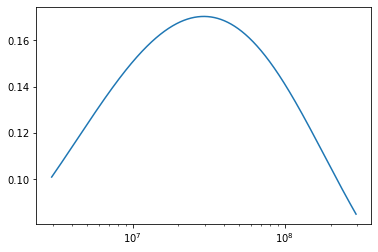

73
-8.350561756687025e-06
[1789.122376]
0.010673322874605038,0.04385854237594702,157680.87113723953,88.71747315037031,1.1786582347139694,0.00423593362304849,4.587154445314097,179.59829947902034,3.3946046286189904e-05,0.0015909992214628657,357.2392624956507,24.313510189032677,0.01866694960685961,7.180248827193401,18445.700590794415,1.705004720852164,0.9076823730981872,0.019354055706909956,0.0011483266810627193,10.09093737796169,0.9076823730981872,0.019354055706909956,0.0011483266810627193,10.09093737796169,1.0,1.0,1.0,1.0


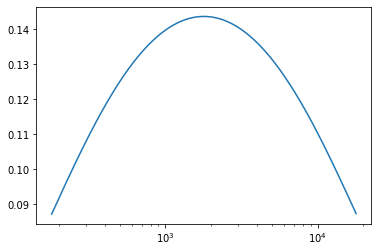

74
-1.3639979312696227e-07
[57765.62115564]
6.770509585902631e-08,0.002311287544018042,1450264.6505482504,4912.141456143809,145.620807647446,1.9505556081087594e-06,0.09172996049858134,653.3277653983268,0.001100494605087136,5.502098501841773,73150.65692182371,0.15970696230798984,3.6231318875076025e-06,0.016338559370583983,664882.0921658531,50.966595546096,0.031128834214427574,72.80853582059319,0.007164252843370284,203.4668601663237,0.031128834214427574,72.80853582059319,0.007164252843370284,203.4668601663237,1.0,1.0,1.0,1.0


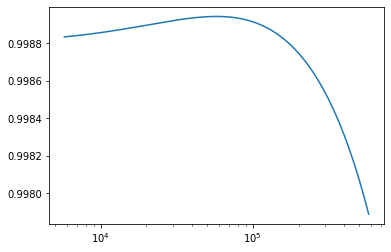

75
-0.0002443696793125727
[7.51838581e+01 1.19870713e+05]
7.633425733601713e-08,0.012263566537955439,1491.7826851342772,0.17806384707676778,213.13953767272548,5.461604762080028,378.39820104765613,16.546166165727822,2.917470281465056e-07,0.5730260493356304,57485.024751960475,235868.40297323957,2.1415033489335343e-05,2.592037740924332,2.360255711541684,0.0024876275937622647,11.971601396784248,1.8435499053039404,0.054994182017299886,188.6336441451318,11.971601396784248,1.8435499053039404,0.054994182017299886,188.6336441451318,1.0,1.0,1.0,1.0


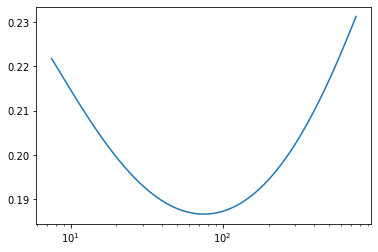

75
-1.4340143181246212e-06
[7.51838581e+01 1.19870713e+05]
7.633425733601713e-08,0.012263566537955439,1491.7826851342772,0.17806384707676778,213.13953767272548,5.461604762080028,378.39820104765613,16.546166165727822,2.917470281465056e-07,0.5730260493356304,57485.024751960475,235868.40297323957,2.1415033489335343e-05,2.592037740924332,2.360255711541684,0.0024876275937622647,11.971601396784248,1.8435499053039404,0.054994182017299886,188.6336441451318,11.971601396784248,1.8435499053039404,0.054994182017299886,188.6336441451318,1.0,1.0,1.0,1.0


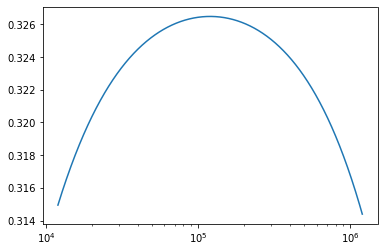

76
-1.216788228423121e-07
[1.04713308e+10]
1.5119010348218661e-06,0.00022627648731865673,9815422.685410159,29590.973022243157,0.10198017371768793,0.09459021483796325,0.014530518510449545,739134.4566105594,5.015266350553515,0.004968814986284801,6299.081201396772,1.35269127515286,7.095940063309194e-05,0.07327887588594546,51249.819757943136,82.02067221677844,0.0045907109674572615,594.1013300755122,0.0010029688816529368,7624.786339472372,0.0045907109674572615,594.1013300755122,0.0010029688816529368,7624.786339472372,1.0,1.0,1.0,1.0


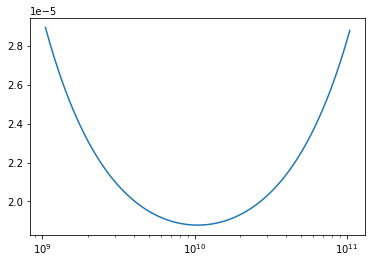

78
-1.2591841788874014e-08
[2.08021176e+08]
2.7365049751537843e-06,1.470558502879171e-05,2745.427442278853,66.90845288103891,61.969273887719815,0.0005274397162663022,63.19046481470528,1284.883059972786,5.401643083039258e-06,39.118220737697925,16884.476951071167,10395.697422346495,6.137487030975887e-06,0.0019457514600287943,94.69229058582465,12.183668759284256,619.1323560022716,0.46144393831053626,9.147625826706653,2.5490899685544997,619.1323560022716,0.46144393831053626,9.147625826706653,2.5490899685544997,1.0,1.0,1.0,1.0


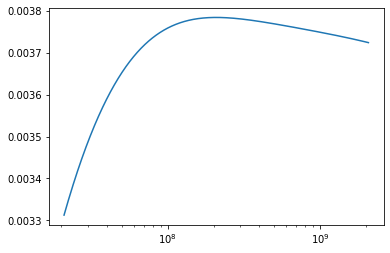

79
-2.399876071184498e-07
[3283624.09686885]
2.8335771609149585e-07,0.007329067883457146,956.7346350294697,179.3269158428225,1.0108696412023594,0.15878356598493684,0.007853603883018456,3021289.329884331,3.3197152449575093e-06,0.016892653580714654,175411.60794494985,1.883846096669174,2.6873122766715737e-05,1.0092732390144914,198.6334158728183,0.6432866752131794,83.4963738356727,0.08475868099657194,3.0577451692530353,2.5931769131104017,83.4963738356727,0.08475868099657194,3.0577451692530353,2.5931769131104017,1.0,1.0,1.0,1.0


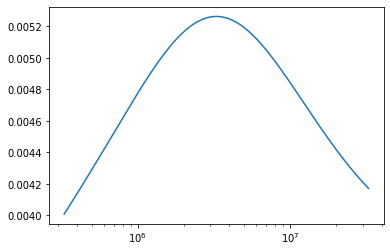

80
-1.0670043479220825e-06
[ 171.22027044 4553.89532073]
0.0013042446032463355,0.3695089417827877,2049.5267708800575,140.68131671436208,0.04161154359861861,0.0017057136061873353,11.140155375565529,3.283707672838494,0.00017250088975607537,0.000309589636966466,2956398721.6808333,79.55921643899869,0.004857751844417521,1.3536123216397307,891.5272853116254,15.719480962705862,280.8228870519894,12.909256347517474,2.6097079941940606,520.7770324486758,280.8228870519894,12.909256347517474,2.6097079941940606,520.7770324486758,1.0,1.0,1.0,1.0


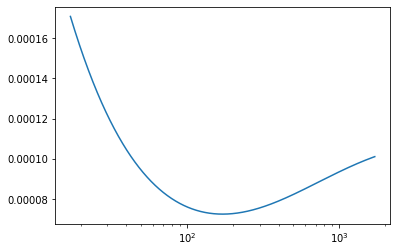

80
-5.304098808943587e-09
[ 171.22027044 4553.89532073]
0.0013042446032463355,0.3695089417827877,2049.5267708800575,140.68131671436208,0.04161154359861861,0.0017057136061873353,11.140155375565529,3.283707672838494,0.00017250088975607537,0.000309589636966466,2956398721.6808333,79.55921643899869,0.004857751844417521,1.3536123216397307,891.5272853116254,15.719480962705862,280.8228870519894,12.909256347517474,2.6097079941940606,520.7770324486758,280.8228870519894,12.909256347517474,2.6097079941940606,520.7770324486758,1.0,1.0,1.0,1.0


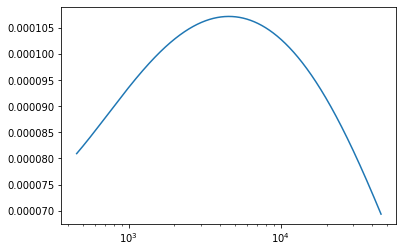

81
-7.964042424320195e-08
[6.44444436e+09]
2.0380980204659625e-07,0.00036831836092578044,1572.3054440023066,3.7363847716809295,396.86121137979995,0.00022565379877101773,304.02907198609984,1693.466689972238,0.00024231405823870234,29.72376743560033,51.72481692773654,61357.23185276972,8.184854408455212e-06,0.13567964757125062,6.935603490642876,0.11094130243705716,105.87376813591452,0.002274722347944585,1.901037918333246,0.11355926862919168,105.87376813591452,0.002274722347944585,1.901037918333246,0.11355926862919168,1.0,1.0,1.0,1.0


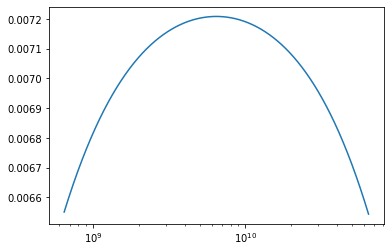

83
-4.473349568523931e-07
[1424813.20341338]
1.920637671979954e-06,0.0006123872498108282,115559.14056576298,2152.548682462474,9.590705279563908,0.0011744619890259808,46.002624228326425,5545.857148913503,6.856104651579112,0.011584071654195257,194446296.2219317,666.860565799555,0.00017762203470381033,0.03485415535429177,15155.648616671422,12.668508828859636,92.08730644008355,0.1380717605002543,0.47396900023287486,44.0388766936337,92.08730644008355,0.1380717605002543,0.47396900023287486,44.0388766936337,1.0,1.0,1.0,1.0


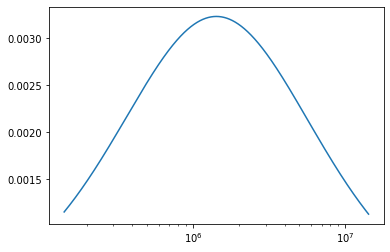

85
-4.457275572678637e-08
[70.99128718]
8.803687516707202e-06,0.0373735146594778,204904.5601623664,14.506217760284155,0.061584164037498446,1.5153838573878286e-06,8.371287826575566,22559.91216349512,8.684403394859769e-07,0.00719276681561819,12227664.759790452,137.86389221902098,0.0008549691779730439,5.275248070624684,2320.785470285165,1.1316663747580964,0.04375616044297527,1.3764374174856493,0.014016807976833426,616.3092575606668,0.04375616044297527,1.3764374174856493,0.014016807976833426,616.3092575606668,1.0,1.0,1.0,1.0


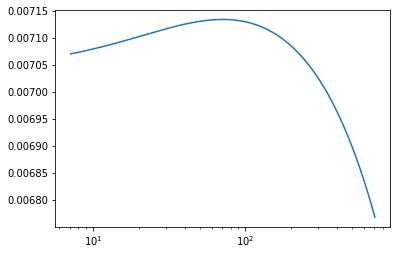

86
-1.2331409146842248e-10
[39298.48868938]
7.335921992788941e-09,0.00013682018545085406,3434.2349950190223,0.32173646569079034,0.008238088625659206,5.241831686211126e-05,33.69433342563562,46420.21870193034,7.055823674745519e-07,0.0009009068931783827,127172.238379684,8453.668182054651,4.69545720688435e-07,0.01643015731681588,119.00683767558543,0.017480692141444685,0.02315051168220641,9.649210576775612,0.008613176754665684,2003.621436948172,0.02315051168220641,9.649210576775612,0.008613176754665684,2003.621436948172,1.0,1.0,1.0,1.0


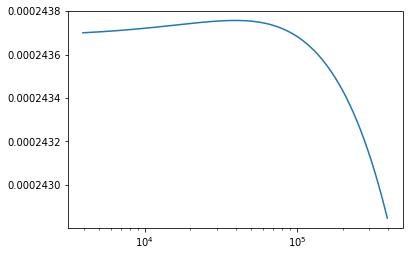

88
-3.642866442476675e-05
[ 208.53955503 7095.30527555]
5.1944788224758666e-05,0.06416646478080813,404.89699239940256,5.1446580739501195,1.4792728311364767,1.5228118025050288,238.62240804969306,0.014634696133341013,3.575783766235588e-08,0.01281582003738057,51875944.34378269,444.09696800256336,0.0009358467817263889,7.679028794975493,17.25123081069639,1.1038196709627335,15.847003140968498,19.310015003902624,1.3739740275451273,6860.936736505098,15.847003140968498,19.310015003902624,1.3739740275451273,6860.936736505098,1.0,1.0,1.0,1.0


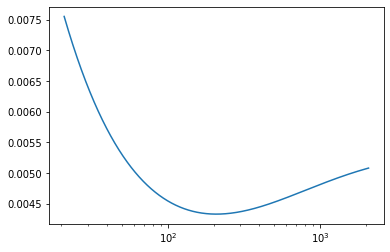

88
-1.1176892069243022e-07
[ 208.53955503 7095.30527555]
5.1944788224758666e-05,0.06416646478080813,404.89699239940256,5.1446580739501195,1.4792728311364767,1.5228118025050288,238.62240804969306,0.014634696133341013,3.575783766235588e-08,0.01281582003738057,51875944.34378269,444.09696800256336,0.0009358467817263889,7.679028794975493,17.25123081069639,1.1038196709627335,15.847003140968498,19.310015003902624,1.3739740275451273,6860.936736505098,15.847003140968498,19.310015003902624,1.3739740275451273,6860.936736505098,1.0,1.0,1.0,1.0


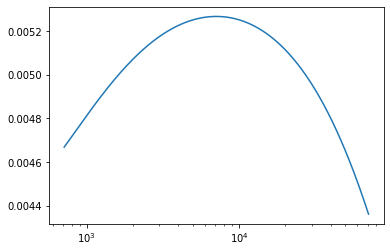

89
-7.487852886987195e-07
[8006.63947405]
7.961366571162673e-05,0.09876663102484864,33.641546637735395,0.9470349298680069,0.035367453070504214,0.0007432262903337421,0.003815313740631777,5007.677349767281,0.0035665252388503935,5.468890694034405e-05,8.060020563215694,0.00842060648957951,0.00025685519458093893,0.9957857860361904,1.887922997802152,0.03432596899483322,2.4272286369596987,0.001247212459534712,0.07523482580086849,0.1713032538273402,2.4272286369596987,0.001247212459534712,0.07523482580086849,0.1713032538273402,1.0,1.0,1.0,1.0


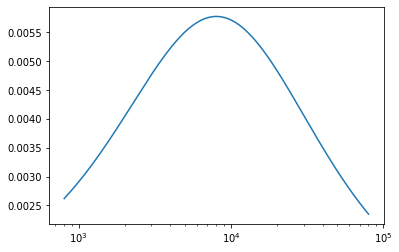

90
-1.2238402072872745e-06
[7336.20673751]
9.294966668508884e-06,0.002484377558570505,346.5217215073625,0.7583847280992767,818.364317848609,4.621800669921416e-06,267.2922611002949,0.6050301833301602,0.0001411782496348898,11.693906495546289,274808.19244432834,3390.8045930376734,8.04578098131217e-05,0.008285623454097132,4.306369601277812,0.00883311665601115,0.013075839344310693,0.040388440704162185,2.2739518611787046e-05,0.24030287320586552,0.013075839344310693,0.040388440704162185,2.2739518611787046e-05,0.24030287320586552,1.0,1.0,1.0,1.0


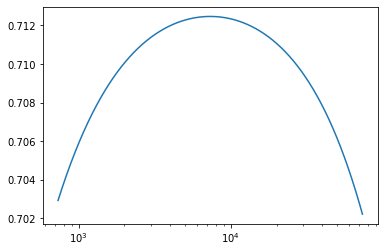

91
-3.9211931885552165e-05
[1395702.44570029]
2.4196150432355515e-09,2.8102287865171966e-05,163256.27248435316,3.080867950518999,0.060117115198870724,0.012473368840067476,0.0036307973590995494,5736.757546445803,4.7033346373262417e-07,0.0011086077204386876,573.635557250729,0.03871039404739699,4.3375188431542114e-08,0.016070210913822332,2141.2389815686392,0.09421559582080542,0.09964898397748115,22.456209105823092,0.0015298440806440937,187.12981395059884,0.09964898397748115,22.456209105823092,0.0015298440806440937,187.12981395059884,1.0,1.0,1.0,1.0


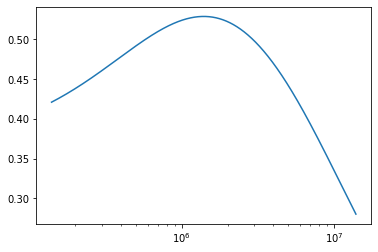

93
-1.2372798328151113e-07
[1.11045042e+03 3.56727908e+11]
1.8421149555887252e-06,0.015617666408029716,11222875.9876944,1577.6882551307717,0.06973423742509882,0.05849240796919982,591.5901180441175,99.27148464212507,1.578273285369244e-05,0.00010031904584971304,65.41384377730596,202805.7113545182,2.502883945271313e-05,4.3463633173255785,65101.02155641575,8.811896990973164,1.642530504940107,9.074195783824269,0.08369646226901147,149.53690260315562,1.642530504940107,9.074195783824269,0.08369646226901147,149.53690260315562,1.0,1.0,1.0,1.0


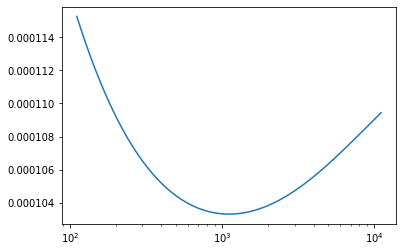

93
-3.737823272534531e-08
[1.11045042e+03 3.56727908e+11]
1.8421149555887252e-06,0.015617666408029716,11222875.9876944,1577.6882551307717,0.06973423742509882,0.05849240796919982,591.5901180441175,99.27148464212507,1.578273285369244e-05,0.00010031904584971304,65.41384377730596,202805.7113545182,2.502883945271313e-05,4.3463633173255785,65101.02155641575,8.811896990973164,1.642530504940107,9.074195783824269,0.08369646226901147,149.53690260315562,1.642530504940107,9.074195783824269,0.08369646226901147,149.53690260315562,1.0,1.0,1.0,1.0


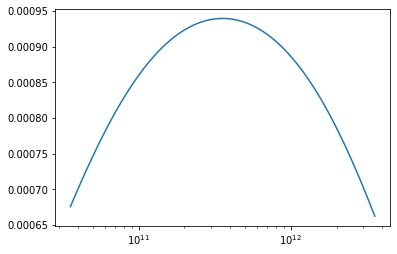

94
-4.136052119652067e-05
[21.51058788]
0.0002284956206284371,0.22364795913940458,244856.86249648346,9.584797253583421,13.777476771014072,1.2651445833020094e-05,0.34721451597312963,1690354.7603219734,0.0021943418863732693,0.10875229054762278,72055.78818555396,72.58855647002524,0.18817656048653125,20.716420488500848,8025.534560591974,4.398727452897884,0.5065200762058744,0.2263767496351503,0.0007717670171839259,1.9690929429608632,0.5065200762058744,0.2263767496351503,0.0007717670171839259,1.9690929429608632,1.0,1.0,1.0,1.0


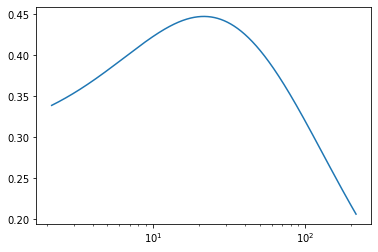

95
-4.526365187107473e-07
[80390.33329608]
6.908501711041144e-07,0.00013838414596138742,60651.376139661836,0.389393847377429,208.04535600133755,0.0005389706655000948,20.585213399735963,54493.188223938516,1.8138509649586977e-07,8.204891510497633,56634251.247305095,625.670179992369,2.243427290438998e-06,0.023595051268759708,72.21387926439085,0.013935678283761027,1.5772491448200037,164.72996267475673,0.013778407917671487,5865.088923325012,1.5772491448200037,164.72996267475673,0.013778407917671487,5865.088923325012,1.0,1.0,1.0,1.0


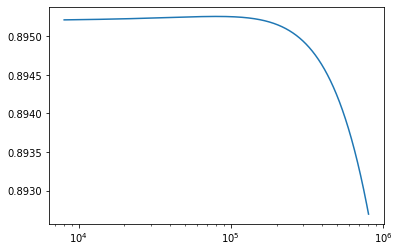

96
-1.4170082784700625e-07
[9.58559932e+05 1.55981508e+12]
6.844528428963877e-08,2.4952348054258945e-05,941982.8853349816,13897.485288804239,80.05938303880512,0.7552908508295237,265.0225622315787,4664.445344400277,0.0001979102884675567,63.428197651633916,519977.5757694813,9015.138028328243,3.933846717768037e-07,0.019414282021042197,719734.1648041721,286.42718056253295,17.429126413276155,0.005110427224352533,1.4867625122408303,0.04168671339640463,17.429126413276155,0.005110427224352533,1.4867625122408303,0.04168671339640463,1.0,1.0,1.0,1.0


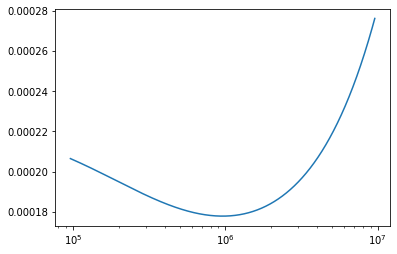

96
-1.4858708465015358e-09
[9.58559932e+05 1.55981508e+12]
6.844528428963877e-08,2.4952348054258945e-05,941982.8853349816,13897.485288804239,80.05938303880512,0.7552908508295237,265.0225622315787,4664.445344400277,0.0001979102884675567,63.428197651633916,519977.5757694813,9015.138028328243,3.933846717768037e-07,0.019414282021042197,719734.1648041721,286.42718056253295,17.429126413276155,0.005110427224352533,1.4867625122408303,0.04168671339640463,17.429126413276155,0.005110427224352533,1.4867625122408303,0.04168671339640463,1.0,1.0,1.0,1.0


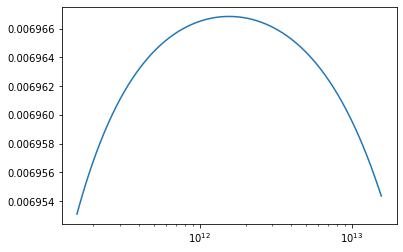

97
-1.2402332731434318e-05
[315322.85920388]
1.2190310024282756e-05,0.3192210241431155,18126910.306028787,406322.6543744778,0.4818620362895735,0.1629716140230441,0.05099012236411939,71048.13810212017,0.0060574668224354635,0.09530333035822992,20230.199156747578,0.547567112785905,0.0006927248772267417,105.11501233035428,1670679.8481480628,662.8497726226657,42.393524865686665,0.06218158578177336,2.722168033684026,33.38477470850308,42.393524865686665,0.06218158578177336,2.722168033684026,33.38477470850308,1.0,1.0,1.0,1.0


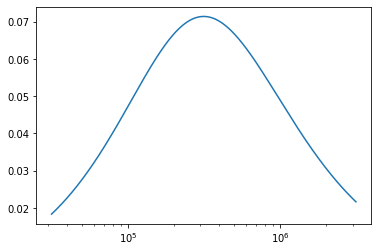

98
-7.768324121972979e-07
[ 46.38452889 212.55882617]
0.040783311999295406,0.4359393449546819,703.5443277674915,38.64225519887512,0.06417166982358312,0.010928503186161396,48.25002612913257,9.228084288656813,0.003381207239015748,0.0004998030481852579,885413.1490553214,30429.270386274588,0.05378910808403276,24.751611994001493,397.7765704346314,2.5300790627271126,0.9710591106709389,0.005169649744517525,0.8337038042681542,0.03885419507854991,0.9710591106709389,0.005169649744517525,0.8337038042681542,0.03885419507854991,1.0,1.0,1.0,1.0


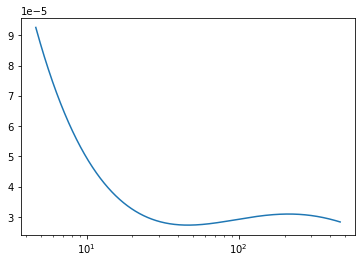

98
-1.2639984133136175e-07
[ 46.38452889 212.55882617]
0.040783311999295406,0.4359393449546819,703.5443277674915,38.64225519887512,0.06417166982358312,0.010928503186161396,48.25002612913257,9.228084288656813,0.003381207239015748,0.0004998030481852579,885413.1490553214,30429.270386274588,0.05378910808403276,24.751611994001493,397.7765704346314,2.5300790627271126,0.9710591106709389,0.005169649744517525,0.8337038042681542,0.03885419507854991,0.9710591106709389,0.005169649744517525,0.8337038042681542,0.03885419507854991,1.0,1.0,1.0,1.0


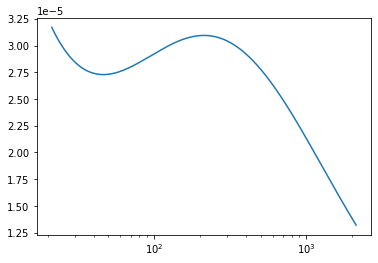

99
-1.1532844684969401e-05
[57.0383261]
0.000645094988876862,9.026933482941049,1150.5803547232201,1.171001784678723,89.7368962083545,2.157045257459893e-06,0.0015441103206696163,5291671.089454211,0.0030094416108573238,4.13055489200255,1881.4411446849008,0.020940889964301084,0.33789704081976946,10.806158960159813,1097.5890239509913,0.8481455649341926,70.51796649470515,2.4757370592796137,0.5310154144400452,75.18771289325159,70.51796649470515,2.4757370592796137,0.5310154144400452,75.18771289325159,1.0,1.0,1.0,1.0


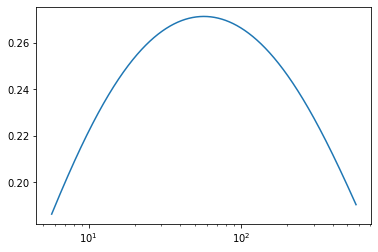

100
-8.58547412166226e-06
[ 69.32894918 259.54674737]
0.0004570633331224555,0.4959970551766863,1919.4390816408384,14.05317892977347,0.3524565164435528,0.0814931206940801,117.12693909551874,0.08883855810521053,1.4324533860806974e-08,0.23291368329111706,2497806003.861419,421.3485003854672,0.0016266800342803883,1.8215019929305176,36.13219496208984,0.04679681657823209,0.001067365440933585,0.005363085549653507,0.0003028734980443608,0.01133823348610525,0.001067365440933585,0.005363085549653507,0.0003028734980443608,0.01133823348610525,1.0,1.0,1.0,1.0


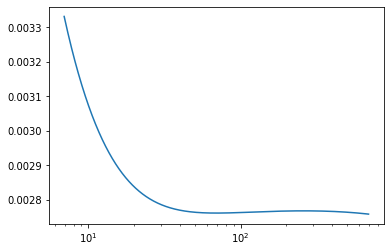

100
-1.0743192770065225e-06
[ 69.32894918 259.54674737]
0.0004570633331224555,0.4959970551766863,1919.4390816408384,14.05317892977347,0.3524565164435528,0.0814931206940801,117.12693909551874,0.08883855810521053,1.4324533860806974e-08,0.23291368329111706,2497806003.861419,421.3485003854672,0.0016266800342803883,1.8215019929305176,36.13219496208984,0.04679681657823209,0.001067365440933585,0.005363085549653507,0.0003028734980443608,0.01133823348610525,0.001067365440933585,0.005363085549653507,0.0003028734980443608,0.01133823348610525,1.0,1.0,1.0,1.0


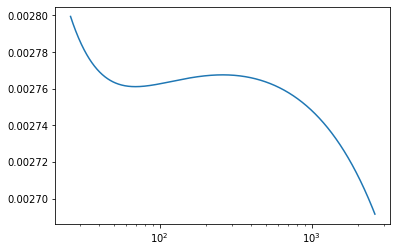

101
-7.267116957171416e-06
[3817632.70709238]
2.2217725969803e-05,0.0022339634699743197,690705.9674636307,1273.0479452344405,0.0014819902924340191,0.026491953842960467,0.010693747795366713,4797.746691800857,0.0005493352076800538,5.302098376208557e-05,4.085867458944298,0.03756705453705333,0.00014445125989229982,1.254272112342776,185984.32615863753,2.6546393103317105,12.931886676394951,100.78158304123261,0.018076548155675415,22918.514325331522,12.931886676394951,100.78158304123261,0.018076548155675415,22918.514325331522,1.0,1.0,1.0,1.0


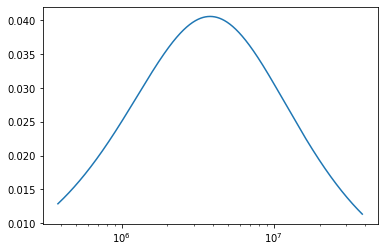

103
-1.2169384982818653e-09
[50371.7002779]
1.356263103775035e-06,0.004002644156468711,108.13836365218876,3.235459082090068,0.010608698616292683,1.4078864759218534e-05,92.42585690478418,59613.02780173878,1.0333966986512648e-06,0.0008261462668590127,293.58521569577914,9963.840739045818,4.72241320754176e-05,0.391441830461125,26.99582886119682,0.01109919749638781,3.334475730022703,0.5703250849875657,0.04492402069355793,38.286686854161744,3.334475730022703,0.5703250849875657,0.04492402069355793,38.286686854161744,1.0,1.0,1.0,1.0


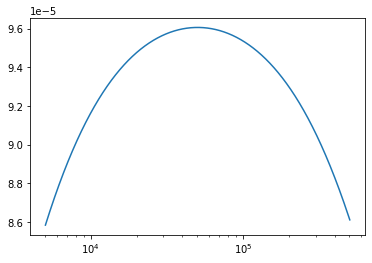

105
-5.788829500197323e-07
[183161.96525759]
8.141840131930255e-06,0.0009095560226079428,1027.9689870182744,0.1018060213703072,143.26314160462096,0.28830180821243945,0.004306465892403363,3.3331563110015012,2.4993717052842115e-08,0.4738276377866827,630766.7445741923,0.04558061434397676,0.00010418884042829568,0.0031800909681315025,2.296789497298634,0.10023923760786677,1.6362146021216288,0.0024106680862968667,0.005148171418072253,0.0039150046049181006,1.6362146021216288,0.0024106680862968667,0.005148171418072253,0.0039150046049181006,1.0,1.0,1.0,1.0


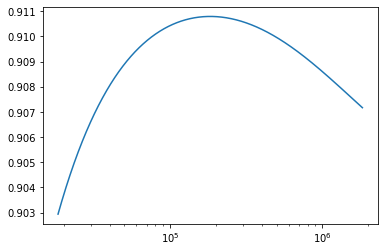

106
-1.9132719747318866e-05
[4.59900114e+06 2.05431573e+12]
1.6676360101973356e-10,3.805224121366552e-06,27735398233.338562,198712.71740489252,0.49818449415675553,0.013484534041445877,4.5847180255470015,0.19718575063991048,0.05768810823907162,0.002119490549785872,37.99202383059968,1006.1106888414839,4.904816480295044e-09,0.0011256121868263196,73190910.21304059,531.9123065882337,129.5265818549877,27.09326022862818,2.338332281818504,13523.684349685813,129.5265818549877,27.09326022862818,2.338332281818504,13523.684349685813,1.0,1.0,1.0,1.0


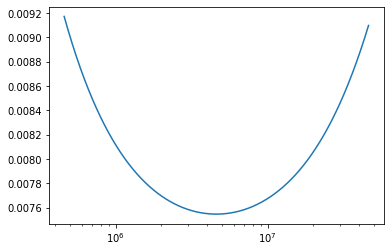

106
-8.346390724389696e-09
[4.59900114e+06 2.05431573e+12]
1.6676360101973356e-10,3.805224121366552e-06,27735398233.338562,198712.71740489252,0.49818449415675553,0.013484534041445877,4.5847180255470015,0.19718575063991048,0.05768810823907162,0.002119490549785872,37.99202383059968,1006.1106888414839,4.904816480295044e-09,0.0011256121868263196,73190910.21304059,531.9123065882337,129.5265818549877,27.09326022862818,2.338332281818504,13523.684349685813,129.5265818549877,27.09326022862818,2.338332281818504,13523.684349685813,1.0,1.0,1.0,1.0


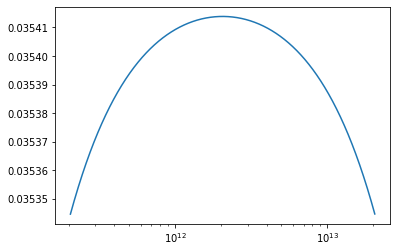

107
-3.235906116803855e-06
[2.87595764e+03 3.78727533e+06 2.28066884e+09]
1.5774159458638663e-06,0.0022144375622777843,15734.37387609787,45.05156898996041,2.4011046670303537,3.932304794790336e-06,0.02246914186120095,128480.60210941895,0.008085033140247496,0.10674931780439774,161.35774650434314,3.246633588730927,0.0006315812732321323,0.009467378857045987,249.76469117434377,33.781992868670386,0.1115759794069324,0.008221429964241599,0.00019616549699859816,0.032196002035864604,0.1115759794069324,0.008221429964241599,0.00019616549699859816,0.032196002035864604,1.0,1.0,1.0,1.0


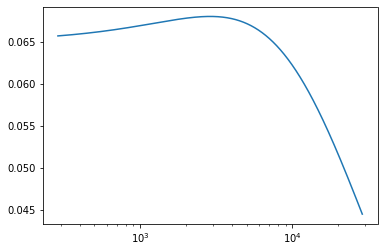

107
-4.6831129333721466e-05
[2.87595764e+03 3.78727533e+06 2.28066884e+09]
1.5774159458638663e-06,0.0022144375622777843,15734.37387609787,45.05156898996041,2.4011046670303537,3.932304794790336e-06,0.02246914186120095,128480.60210941895,0.008085033140247496,0.10674931780439774,161.35774650434314,3.246633588730927,0.0006315812732321323,0.009467378857045987,249.76469117434377,33.781992868670386,0.1115759794069324,0.008221429964241599,0.00019616549699859816,0.032196002035864604,0.1115759794069324,0.008221429964241599,0.00019616549699859816,0.032196002035864604,1.0,1.0,1.0,1.0


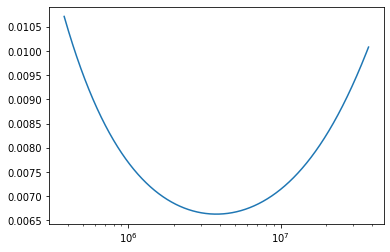

107
-8.986773080386923e-07
[2.87595764e+03 3.78727533e+06 2.28066884e+09]
1.5774159458638663e-06,0.0022144375622777843,15734.37387609787,45.05156898996041,2.4011046670303537,3.932304794790336e-06,0.02246914186120095,128480.60210941895,0.008085033140247496,0.10674931780439774,161.35774650434314,3.246633588730927,0.0006315812732321323,0.009467378857045987,249.76469117434377,33.781992868670386,0.1115759794069324,0.008221429964241599,0.00019616549699859816,0.032196002035864604,0.1115759794069324,0.008221429964241599,0.00019616549699859816,0.032196002035864604,1.0,1.0,1.0,1.0


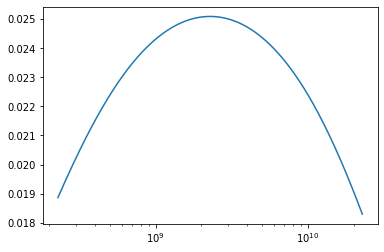

109
-1.9850112301877942e-05
[5819.1958336]
3.9966424616445097e-05,0.0349084536976624,24269.826559649842,732.5727795537043,15.692841086046585,0.004142252970357924,0.01470332270865608,24.40289819027674,8.846750148557725e-07,0.1343056890821999,115.30075983547903,14.306811789652906,0.001675685155567057,4.66404862920925,1392.3740071448767,0.8882974743704368,44.63977367556356,17.675049839724107,14.945859600035952,10266.13913993194,44.63977367556356,17.675049839724107,14.945859600035952,10266.13913993194,1.0,1.0,1.0,1.0


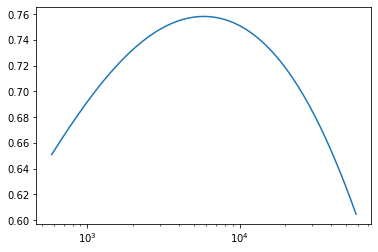

110
-3.6135420562397047e-07
[1.27875002e+08]
4.698142353549344e-10,5.761637118075643e-06,45683.6629232013,728.4522828579373,0.17928084802090954,0.0011760053869363416,4.750020558926751,106.38338944631377,6.92206537568493e-05,0.036743994541950833,354.68822311844417,12.103157887791316,2.748375766155171e-07,0.004969963209277176,25190.218343741315,8.927549985156858,11.93832273212614,12.438808316313569,0.7585822112393876,13.338147922744499,11.93832273212614,12.438808316313569,0.7585822112393876,13.338147922744499,1.0,1.0,1.0,1.0


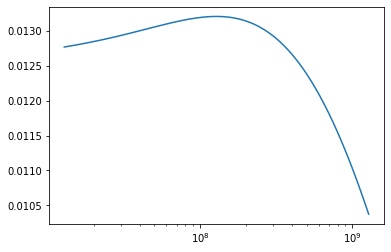

111
-1.682712638673145e-08
[289.98300384]
4.4530875040764273e-07,0.11794656122457005,10.095015782943417,0.18840481723299882,0.4133844311408076,0.008852665392467467,41.264333532804045,62.528507196431974,0.000592559340929717,0.13742415093825702,99772.58328764944,72.30241665203647,0.00026717052063027517,4.710001589651604,0.9798022368683917,0.010337571492792387,0.05914960195659308,0.007851953930908848,0.016503429366686775,0.8012692154383442,0.05914960195659308,0.007851953930908848,0.016503429366686775,0.8012692154383442,1.0,1.0,1.0,1.0


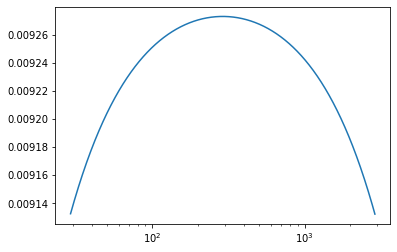

112
-6.475528851357382e-06
[5050045.07294455]
0.006161862265837542,0.028871095549884682,131206023.28930402,1971.7863965139727,501.3020451886596,0.001878003666477441,0.0028448752579636437,63496.62566623602,9.594515252561683e-05,113.34185633951579,63.64234238057201,0.030501611174227825,0.021275700716048826,0.17796834969660122,893129.1009610959,6.947486627728411,45.875198063854704,99.19152684672827,0.08322858122977758,190.87728097701319,45.875198063854704,99.19152684672827,0.08322858122977758,190.87728097701319,1.0,1.0,1.0,1.0


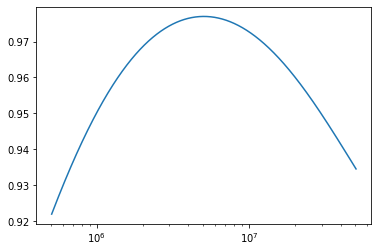

113
-1.620866524332243e-07
[0.11653711]
0.08274360921488076,40.70551042375214,777.0146701853955,0.05607680305926689,234.20198744711757,4.02821844451938,0.4158735364207173,6.658947164379067,7.414419519957212e-05,0.462757763858242,8029633.873179092,35.25408037108652,0.25566912995562924,129.39364778000075,6.863014677004038,0.002776013623065328,0.005835343222352172,2.851985062604533,0.0033317575380855543,2178.8420615135815,0.005835343222352172,2.851985062604533,0.0033317575380855543,2178.8420615135815,1.0,1.0,1.0,1.0


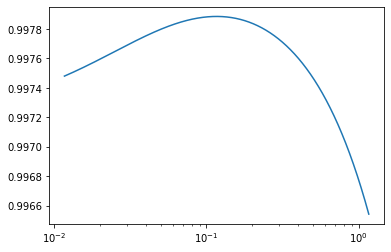

114
-4.3916587144643415e-08
[1.27786297e+11]
3.60361964853912e-07,0.00016275020214102527,3716266.4338518395,5991.753144098538,359.1720870889196,0.0005334834203473165,0.8520774380944842,370.67944644933146,0.021006662464973496,28.752418144274333,73.23778574693027,59.27052413144015,6.712477099186188e-07,0.008124409457602793,872445.1904293377,163.10665619040728,39.17036614858422,0.1482294765176992,30.46027587214806,0.2493202668311798,39.17036614858422,0.1482294765176992,30.46027587214806,0.2493202668311798,1.0,1.0,1.0,1.0


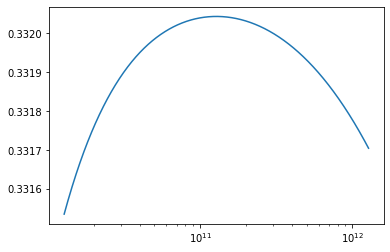

115
-1.4160959842857146e-05
[2523725.26761131]
1.1569040785657788e-07,4.3212369266559014e-05,11724466.464291284,1146.104085351705,0.3034942035008442,15.333109755021814,2.889378869224014,953.5281009287097,0.00013589800185780424,0.24166344311588006,15838.049334051453,5.076508681084385,1.7957674447660148e-07,0.015015986129179511,49112.05413029493,16.46821031713722,23.293259958400828,0.013907287075468221,5.02848014812481,1.9521475522837495,23.293259958400828,0.013907287075468221,5.02848014812481,1.9521475522837495,1.0,1.0,1.0,1.0


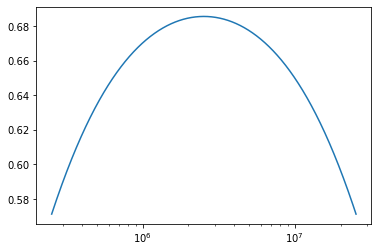

118
-1.2148403761568795e-11
[1.47182878e+01 2.50339505e+06]
0.29405822274348226,220.64801763827094,64171260.3369884,155.08981143468222,0.002247753147347442,2.329108870506957e-07,284.25134372619937,5161672.811791116,0.0035347619959894532,2.88945089482094e-06,1035.7751123486469,95215.26643940512,3.239482169551973,452.8031340773057,71464.27375902994,2.9841960966102765,7.055915785242167,423.14410831677185,6.434071250698092,29222.4567329029,7.055915785242167,423.14410831677185,6.434071250698092,29222.4567329029,1.0,1.0,1.0,1.0


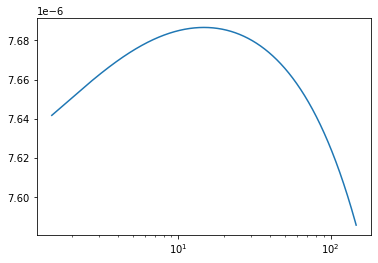

118
-1.2864583346407967e-09
[1.47182878e+01 2.50339505e+06]
0.29405822274348226,220.64801763827094,64171260.3369884,155.08981143468222,0.002247753147347442,2.329108870506957e-07,284.25134372619937,5161672.811791116,0.0035347619959894532,2.88945089482094e-06,1035.7751123486469,95215.26643940512,3.239482169551973,452.8031340773057,71464.27375902994,2.9841960966102765,7.055915785242167,423.14410831677185,6.434071250698092,29222.4567329029,7.055915785242167,423.14410831677185,6.434071250698092,29222.4567329029,1.0,1.0,1.0,1.0


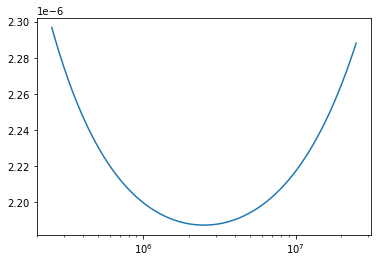

119
-1.2688711419721898e-10
[99.28581355]
0.002459116628539326,1.2670042968871207,30135.771641970397,17.658211114105107,0.01676047434612315,1.4239409592959232e-07,32.63094443911155,3961995.5175004606,3.299219068116168e-08,0.0010500289443421882,11997367.586247362,7806.622000620004,0.05398481586353513,122.1975547177019,16148.463667070473,0.9704814950382121,6.095213603785422,0.002195588727780275,1.4064283664016959,0.031571953967628234,6.095213603785422,0.002195588727780275,1.4064283664016959,0.031571953967628234,1.0,1.0,1.0,1.0


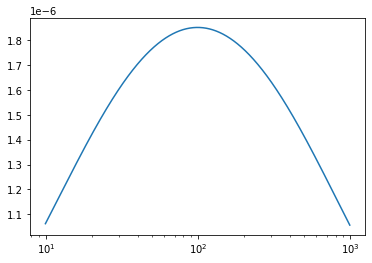

121
-1.4331204513485054e-08
[2780623.97109007]
3.6283695629008174e-07,3.5817843383960244e-05,14211.984936479148,3.1708615074390543,0.024990498893664136,0.00012628081977350807,0.008159571330049274,1875.8856459599772,1.3968934465642335e-07,0.00011884654339498215,8907614.584826361,0.00925889734863377,2.202241822555728e-05,0.004655699787559513,17.64722978362547,0.018391004356022127,95.73457855964054,0.28023120186941974,0.12471032090475571,104.7936190768436,95.73457855964054,0.28023120186941974,0.12471032090475571,104.7936190768436,1.0,1.0,1.0,1.0


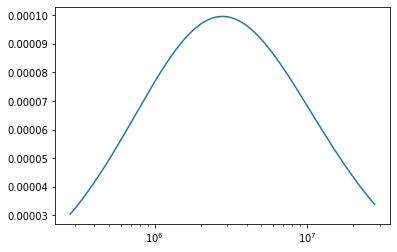

123
-2.920484681130306e-09
[65429807.65789665]
7.035576585809642e-06,0.05324640669212949,2457.386592831547,5.906432232638347,0.022967235384741526,6.110664578823049e-05,2.0318358298265973,158.81434825794796,1.55992797070656e-06,0.008117159944794023,2.8265190977136165,42.03444799402056,0.0001789145141325541,15.094374246471334,163.72723587540784,0.05209979442925436,20.74024196289187,0.3456517505838055,3.0915750468017493,0.5220023408897345,20.74024196289187,0.3456517505838055,3.0915750468017493,0.5220023408897345,1.0,1.0,1.0,1.0


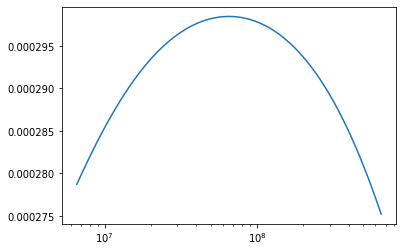

124
-4.362605648722262e-05
[854737.36897838]
6.214418699103128e-08,5.788888364225768e-06,697801.244605046,456.3036488722019,2.7156964200967963,0.0005988310986194808,0.5616258676844388,98.27530997371238,3.120935076192572e-05,0.016377451609637984,9958.002434374655,8.282647927468627,8.842681503469131e-07,0.004329018439792496,3191.3366786317415,29.70495571904646,0.20334589905428954,0.04404897809198186,0.00943601112878366,37.0596157681528,0.20334589905428954,0.04404897809198186,0.00943601112878366,37.0596157681528,1.0,1.0,1.0,1.0


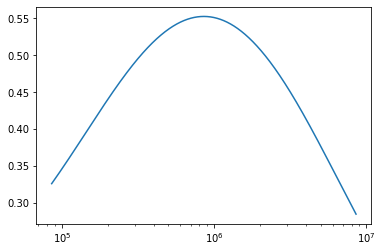

126
-4.21451700042836e-08
[22933.38720464]
1.1141619696403241e-07,7.2367244987988e-05,5.257103371458832,0.008295726391989264,0.0033453214156685647,0.7165623073303482,0.0049302776345836455,816.093835576352,0.0010339147075375847,4.959243994409792e-05,5736.387106027813,0.048658944622360714,3.64496458855285e-06,0.004275951428407459,0.16403626508939628,0.005873059925965626,30.64542992884222,0.19873498236380716,5.042685971884115,155.94371479744788,30.64542992884222,0.19873498236380716,5.042685971884115,155.94371479744788,1.0,1.0,1.0,1.0


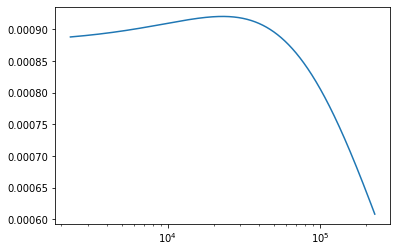

127
-2.2501626008798097e-08
[3.04167299e-01 1.80139612e+03]
3.354290048137869e-05,0.03334100307649575,655.5739737615844,0.24345870035502107,0.013055450822641194,3.118728171095535e-07,43.32553035781352,0.10044262612390573,0.056742026190052086,0.007330072910258106,426798.4268119995,144.85668821367798,0.01750044438380604,1.3899523743042852,25.008333849199083,0.0017369121170366859,2.0553854234712383,0.0032935282621895704,0.004959854446629487,0.00608725328455155,2.0553854234712383,0.0032935282621895704,0.004959854446629487,0.00608725328455155,1.0,1.0,1.0,1.0


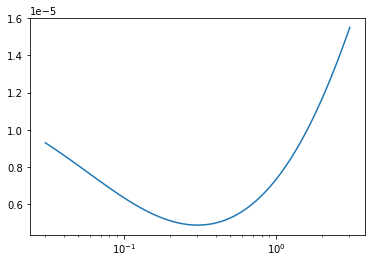

127
-5.314451477630641e-11
[3.04167299e-01 1.80139612e+03]
3.354290048137869e-05,0.03334100307649575,655.5739737615844,0.24345870035502107,0.013055450822641194,3.118728171095535e-07,43.32553035781352,0.10044262612390573,0.056742026190052086,0.007330072910258106,426798.4268119995,144.85668821367798,0.01750044438380604,1.3899523743042852,25.008333849199083,0.0017369121170366859,2.0553854234712383,0.0032935282621895704,0.004959854446629487,0.00608725328455155,2.0553854234712383,0.0032935282621895704,0.004959854446629487,0.00608725328455155,1.0,1.0,1.0,1.0


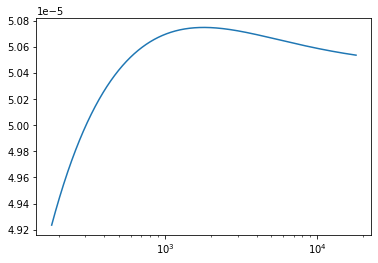

129
-5.9595583806462335e-05
[  1.71199105 760.15218267]
0.0027822113523270236,1.0691092959519177,0.16760409085624914,0.07975094757754622,4.283230296615111,3.911504100187657e-06,0.00322952213611853,0.13258147554985075,0.0001621842231502951,0.38056705282810044,69642.11573316542,0.009885435598012788,0.010746581856465494,2.6496575675782563,0.14757302131217231,0.040696649412155506,694.9060787568646,1.2532436462856167,14.663273657194893,23.524655939550918,694.9060787568646,1.2532436462856167,14.663273657194893,23.524655939550918,1.0,1.0,1.0,1.0


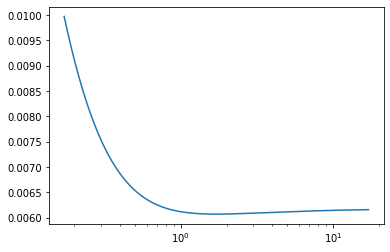

129
-4.5645739792099516e-10
[  1.71199105 760.15218267]
0.0027822113523270236,1.0691092959519177,0.16760409085624914,0.07975094757754622,4.283230296615111,3.911504100187657e-06,0.00322952213611853,0.13258147554985075,0.0001621842231502951,0.38056705282810044,69642.11573316542,0.009885435598012788,0.010746581856465494,2.6496575675782563,0.14757302131217231,0.040696649412155506,694.9060787568646,1.2532436462856167,14.663273657194893,23.524655939550918,694.9060787568646,1.2532436462856167,14.663273657194893,23.524655939550918,1.0,1.0,1.0,1.0


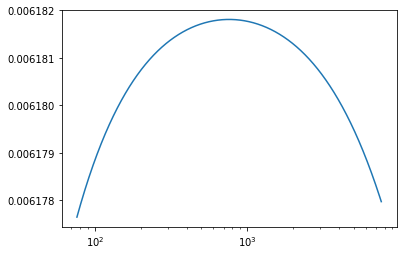

131
-5.7947693506741704e-08
[7.24588725e+06 1.77355818e+11]
4.4993094215848665e-06,0.4832308878684832,17679043.97248777,2825.700944775126,0.2128988525274737,0.03331470568373404,7.043312356241852,21.277591182918762,0.013432534859108674,0.0009074543589492636,2.1132610066572397,42.93937485417292,0.0009568971693867451,7.960156987514307,53758.994205908464,488.26432645634105,13.9018413011441,0.0057498411497344595,1.3399380107662129,0.008311075400349185,13.9018413011441,0.0057498411497344595,1.3399380107662129,0.008311075400349185,1.0,1.0,1.0,1.0


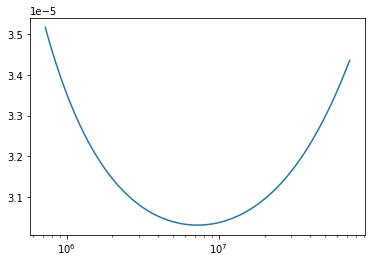

131
-5.280360830794148e-11
[7.24588725e+06 1.77355818e+11]
4.4993094215848665e-06,0.4832308878684832,17679043.97248777,2825.700944775126,0.2128988525274737,0.03331470568373404,7.043312356241852,21.277591182918762,0.013432534859108674,0.0009074543589492636,2.1132610066572397,42.93937485417292,0.0009568971693867451,7.960156987514307,53758.994205908464,488.26432645634105,13.9018413011441,0.0057498411497344595,1.3399380107662129,0.008311075400349185,13.9018413011441,0.0057498411497344595,1.3399380107662129,0.008311075400349185,1.0,1.0,1.0,1.0


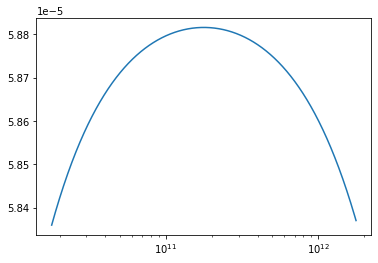

132
-1.6636146933876085e-06
[4.12071601e+00 5.37194870e+07]
0.004675445983715516,0.4592240427837442,336427.9428801952,2.2677063442767733,93.71861249620746,4.026769667304531e-06,48.98879423269128,48.02029565377032,0.00038159622046921694,0.3774485963357382,28.589876183397244,2281.572942547663,0.011358347087876296,48.46446163419385,647.6315951265933,0.19358301559233,64.50341520399412,0.13848752335883577,0.340967694732259,0.24154295406106238,64.50341520399412,0.13848752335883577,0.340967694732259,0.24154295406106238,1.0,1.0,1.0,1.0


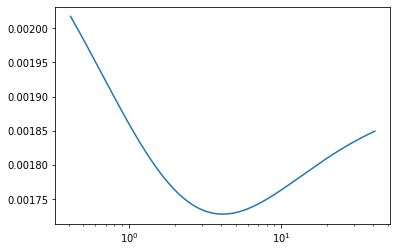

132
-6.857837679501155e-08
[4.12071601e+00 5.37194870e+07]
0.004675445983715516,0.4592240427837442,336427.9428801952,2.2677063442767733,93.71861249620746,4.026769667304531e-06,48.98879423269128,48.02029565377032,0.00038159622046921694,0.3774485963357382,28.589876183397244,2281.572942547663,0.011358347087876296,48.46446163419385,647.6315951265933,0.19358301559233,64.50341520399412,0.13848752335883577,0.340967694732259,0.24154295406106238,64.50341520399412,0.13848752335883577,0.340967694732259,0.24154295406106238,1.0,1.0,1.0,1.0


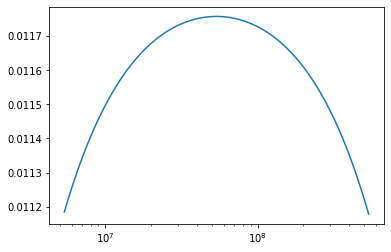

135
-1.3343695818117514e-08
[3.66160775e+02 3.20553954e+06]
0.0018505084326122321,9.114433637766304,64046.234900117204,72.11656743058315,0.014872673832322263,0.011917026701680971,150.62389723830668,1251.6283257545708,1.0901953859776832e-05,4.526871377100557e-05,5.26792090108942,2024.1436300582375,1.393229285180345,9.289100352556595,103.68188739710381,0.09250563779467104,49.293943541764285,0.008815602497523195,0.4454821683961683,0.029338039150147335,49.293943541764285,0.008815602497523195,0.4454821683961683,0.029338039150147335,1.0,1.0,1.0,1.0


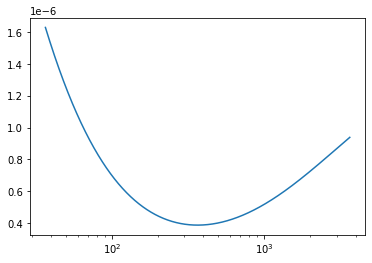

135
-1.2293202336283496e-12
[3.66160775e+02 3.20553954e+06]
0.0018505084326122321,9.114433637766304,64046.234900117204,72.11656743058315,0.014872673832322263,0.011917026701680971,150.62389723830668,1251.6283257545708,1.0901953859776832e-05,4.526871377100557e-05,5.26792090108942,2024.1436300582375,1.393229285180345,9.289100352556595,103.68188739710381,0.09250563779467104,49.293943541764285,0.008815602497523195,0.4454821683961683,0.029338039150147335,49.293943541764285,0.008815602497523195,0.4454821683961683,0.029338039150147335,1.0,1.0,1.0,1.0


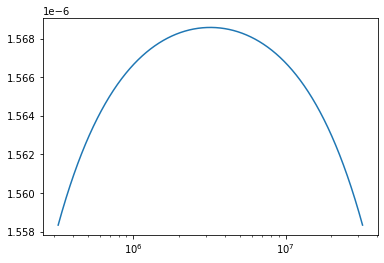

136
-5.880653315359918e-06
[1291.83294212]
1.031833946004525e-07,0.0007419965644438682,83.7498498306646,0.2127860501599986,0.019088478159281504,1.5906987724012855e-06,0.00821323011349358,47208.2610356485,3.575138235276403e-05,9.541095874423229e-05,2519.8836591777626,0.05486503510894927,9.876902685568326e-07,0.008304158337730558,34.21197606416964,0.007744742286534968,0.02834183604934679,0.13432064909618918,2.9745633026474207e-05,31.446619774393692,0.02834183604934679,0.13432064909618918,2.9745633026474207e-05,31.446619774393692,1.0,1.0,1.0,1.0


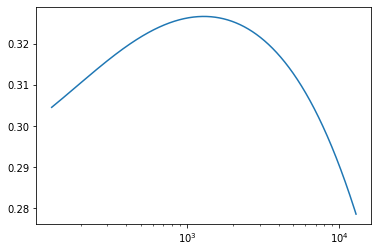

137
-9.044515270284492e-06
[0.08831169]
0.012818657431414573,177.66492970705613,25.682471286477618,0.006282392823602008,14.867084353345696,4.439667375062823e-05,15.846819684136895,10.778684031050533,1.3401540178784797e-07,4.774379520986347,46500696.14363689,2977.7681977426587,6.0407799248895175,460.3638874487784,2.190857863222466,0.0033983191982637053,0.994493775211767,1.038049662427162,0.4365149963963309,131.81603837815683,0.994493775211767,1.038049662427162,0.4365149963963309,131.81603837815683,1.0,1.0,1.0,1.0


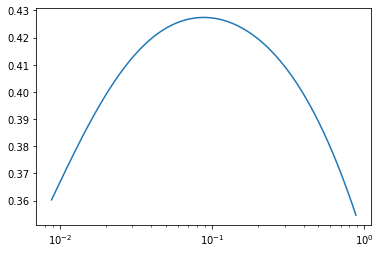

138
-3.763895357759846e-10
[8.91813560e+02 2.60782569e+06]
1.045153444288851,24.334261470373125,1460608.7017751944,65.57737897792892,0.08793568813172617,0.007612791033369478,516.9286910416846,4400.579913395969,2.9266115602984122e-05,0.03521060649820982,150.68898687533974,261799.7322522315,10.967058528648533,31.336722222636165,38515.100675335096,17.036511434729043,109.8006599247859,0.0029208354622963623,0.2568735445224755,0.004821257156325242,109.8006599247859,0.0029208354622963623,0.2568735445224755,0.004821257156325242,1.0,1.0,1.0,1.0


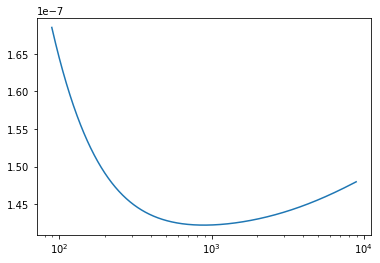

138
-9.927621325041941e-14
[8.91813560e+02 2.60782569e+06]
1.045153444288851,24.334261470373125,1460608.7017751944,65.57737897792892,0.08793568813172617,0.007612791033369478,516.9286910416846,4400.579913395969,2.9266115602984122e-05,0.03521060649820982,150.68898687533974,261799.7322522315,10.967058528648533,31.336722222636165,38515.100675335096,17.036511434729043,109.8006599247859,0.0029208354622963623,0.2568735445224755,0.004821257156325242,109.8006599247859,0.0029208354622963623,0.2568735445224755,0.004821257156325242,1.0,1.0,1.0,1.0


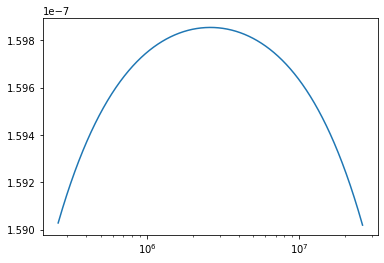

139
-1.3883815995346938e-05
[58035.28782698]
9.29322733452078e-05,0.0024341275018971787,1702.3904557874312,186.31834108363006,403.03248415080685,0.028927658379343562,567.2407517433305,4482505.988025361,0.00013656671047897241,4.089116583213468,7564.709314509974,25387.27098685978,0.0016515736183056475,0.8826211399022114,771.3328395819675,33.07265380343477,0.008892785129664564,0.009905844854029214,0.0003013930246625228,0.0348404741416975,0.008892785129664564,0.009905844854029214,0.0003013930246625228,0.0348404741416975,1.0,1.0,1.0,1.0


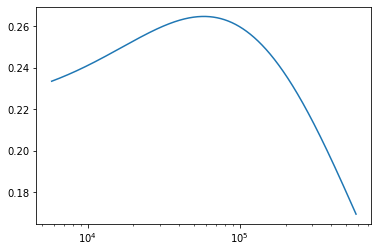

141
-5.830239889232248e-13
[102126.26569833]
0.07290775514966776,24.650475303052136,234933.21466572728,167.15113166852754,0.0018121681445645512,2.2596466826578132e-07,0.3375336943080859,24.40180004927517,0.0009366290150219288,0.0008220617136402854,866857.3161740133,82.32366680913515,0.7059709919197654,319.38381465352603,71300.65348839182,1.362603141303492,19.28605173069774,0.00844530460977057,0.03589430598970149,0.03656027632569035,19.28605173069774,0.00844530460977057,0.03589430598970149,0.03656027632569035,1.0,1.0,1.0,1.0


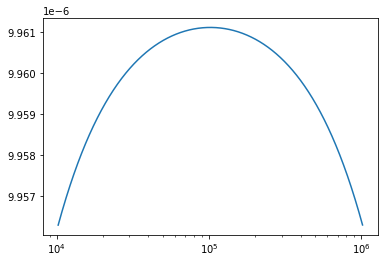

142
-1.6120231370528315e-06
[13.28251191]
0.25266863466422373,18.071775098392337,141412.45895460137,44.02616645460039,8.62796218595578,0.0001727190532741263,98.81627455197474,253.48398419543685,8.24696096494404e-08,3.6542096486829174,5546.470751144046,218.86104681401918,0.33807457573549804,258.44560363654733,630.3148860234057,2.222517630222094,0.01582359372024345,0.0058013029463699585,2.7187598586531967e-05,0.05768862556685675,0.01582359372024345,0.0058013029463699585,2.7187598586531967e-05,0.05768862556685675,1.0,1.0,1.0,1.0


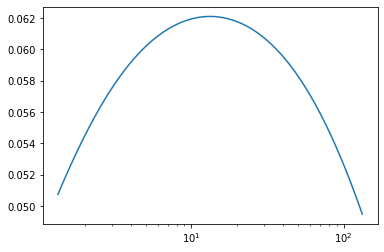

144
-3.144579716033574e-05
[  228062.93897682 16783798.95406409]
8.76875523496216e-07,0.0033797562492780464,49337070.46645169,58585.02226415812,0.7251151568326195,0.0010768115109239817,0.0109933860454409,1.2402476672966203,0.015526510825397011,0.03112763382488463,19238.18266354936,2.7344124405333825,5.049681715607248e-05,0.00363131854749155,6421820.027600866,221.6450724789791,18.477328128996863,1.1164700874753055,2.5241782893723443,7.040161122593126,18.477328128996863,1.1164700874753055,2.5241782893723443,7.040161122593126,1.0,1.0,1.0,1.0


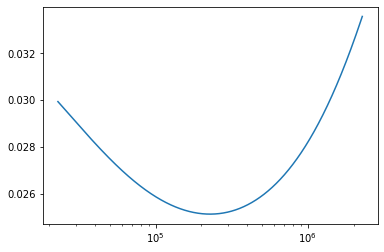

144
-5.542712040215725e-06
[  228062.93897682 16783798.95406409]
8.76875523496216e-07,0.0033797562492780464,49337070.46645169,58585.02226415812,0.7251151568326195,0.0010768115109239817,0.0109933860454409,1.2402476672966203,0.015526510825397011,0.03112763382488463,19238.18266354936,2.7344124405333825,5.049681715607248e-05,0.00363131854749155,6421820.027600866,221.6450724789791,18.477328128996863,1.1164700874753055,2.5241782893723443,7.040161122593126,18.477328128996863,1.1164700874753055,2.5241782893723443,7.040161122593126,1.0,1.0,1.0,1.0


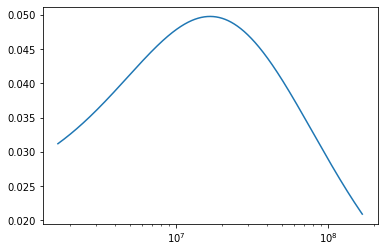

147
-4.081106388053278e-09
[4.81453805e+08]
6.633058223584082e-07,0.00047569621006340326,15400.36272158922,10.4878356857145,0.0015310352535266593,2.1466377661806614e-05,14.04552320594128,4116.757470051827,0.00032406166198930246,1.791716961561295e-06,4.553364920724514,16.482239998284015,9.254256674322003e-05,0.15855261761699826,300.24227002272653,6.278967016290716,423.51272934652775,445.1400885535557,1.716151644460757,376865.1538726134,423.51272934652775,445.1400885535557,1.716151644460757,376865.1538726134,1.0,1.0,1.0,1.0


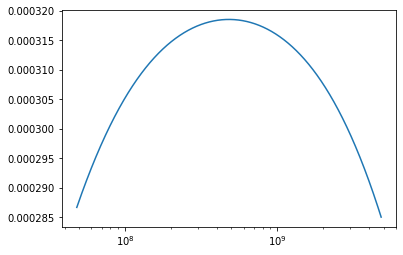

148
-1.283625355491709e-07
[960.48321499]
8.085301378598691e-07,0.01763642285934299,1008608.9966670437,3.857941111779196,0.008905049432951562,8.042810956047843e-08,0.0023695766147723524,830.0998603648499,2.4458125606784574e-07,0.00019665749983404583,566808.7411644186,0.49447794529895206,0.00025516108474554213,2.834230148181418,2152.8118437463786,0.006947850156811942,2.8478917216281356,4.349414379375989,0.06715179452483967,5.070743476935405,2.8478917216281356,4.349414379375989,0.06715179452483967,5.070743476935405,1.0,1.0,1.0,1.0


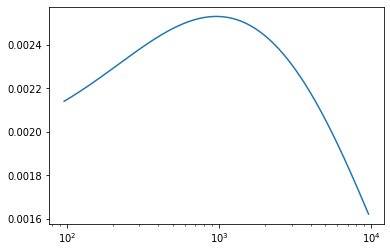

149
-2.8749433356067833e-05
[16.43594293]
21.503951558279915,140.6146111886189,1628572.336563194,15919.335633680603,153.9908466904018,1.067919245653228e-05,106.76603807379828,251.34516720652297,3.778314333989022e-08,58.41992079149845,14937.503342176044,229.71466921878283,114.74546089686594,194.0194664101192,1005523.3732966322,755.4776485755795,287.5690525839963,146.5183152612559,0.6761013996619116,79453.06372531307,287.5690525839963,146.5183152612559,0.6761013996619116,79453.06372531307,1.0,1.0,1.0,1.0


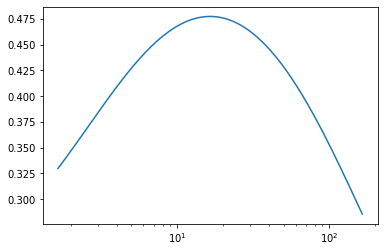

150
-4.222346358273565e-06
[2.8926614]
0.6112058617714761,279.6746700048686,7417.343735544739,19.44300584393119,184.47217400651388,1.5746379099731647,27.151439518754152,19219.34072381828,2.419783777611201e-07,7.974845983238822,551.146003488638,47.10661891591988,4.117908554639123,282.81577589243705,33.36466891876735,0.03530448231688022,15.433311547017144,1.2683856129390292,0.30679198104085026,6.297228171759537,15.433311547017144,1.2683856129390292,0.30679198104085026,6.297228171759537,1.0,1.0,1.0,1.0


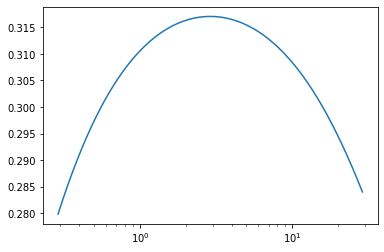

152
-2.4495951971954813e-08
[2235.89741351]
0.41287528019190445,8.076585993608218,198884.33122520818,282.582598642413,0.0016981436993053663,4.00455691760452e-06,0.08958593426818215,255139.96297981986,0.5294816950383401,3.111488363609332e-05,96886.11785619268,0.13588355008533695,4.415883612363213,492.4551043652204,60270.359014104266,28.964305321667418,0.08425476369419095,0.2711725524272669,0.0001700797626633764,1.036632352278909,0.08425476369419095,0.2711725524272669,0.0001700797626633764,1.036632352278909,1.0,1.0,1.0,1.0


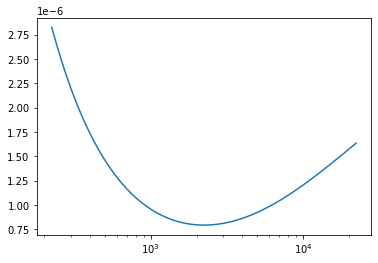

154
-1.8240480438060092e-07
[6.23168423e+01 5.77534267e+10]
4.447983116666094e-06,0.2816664625460064,8649409.957697226,376.63813598099944,12.983547168879749,0.00019581828273845618,818.3890823054423,137.13906682352385,1.6147756606441693e-05,1.3913641539227155,28.410822044599623,14636.97750343916,0.0016979760345473766,1.1126091064080443,134969.26407194912,6.071606875183383,158.22981807430972,93.37072152110079,18.582768314941617,3702.343604345538,158.22981807430972,93.37072152110079,18.582768314941617,3702.343604345538,1.0,1.0,1.0,1.0


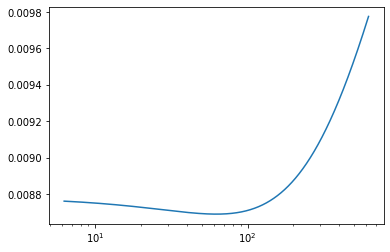

154
-3.844504326944165e-06
[6.23168423e+01 5.77534267e+10]
4.447983116666094e-06,0.2816664625460064,8649409.957697226,376.63813598099944,12.983547168879749,0.00019581828273845618,818.3890823054423,137.13906682352385,1.6147756606441693e-05,1.3913641539227155,28.410822044599623,14636.97750343916,0.0016979760345473766,1.1126091064080443,134969.26407194912,6.071606875183383,158.22981807430972,93.37072152110079,18.582768314941617,3702.343604345538,158.22981807430972,93.37072152110079,18.582768314941617,3702.343604345538,1.0,1.0,1.0,1.0


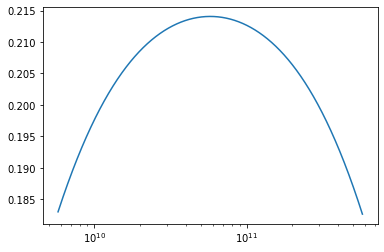

155
-6.619573155613491e-08
[242.98163129]
0.00035442458015117384,0.12539583048622036,9359854.807825861,9299.221517641949,0.010936427764438652,0.001605905717351943,5.293592785852047,559274.9969233859,2.1767449877907876e-05,2.2315398882483703e-05,2325.585856636037,814.6490991623282,0.01962834206801723,8.202721277366097,24869.352626419266,336.30845756108545,0.004362747255017092,0.012960679373316176,4.583806093750071e-06,3.632289112552763,0.004362747255017092,0.012960679373316176,4.583806093750071e-06,3.632289112552763,1.0,1.0,1.0,1.0


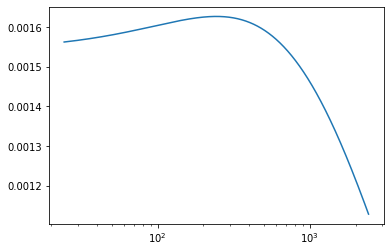

157
-4.5619816554469655e-06
[  1.79442614 162.26245098]
0.0012867183871626657,1.4242460931105765,5113.892033562254,74.56759783186916,0.03632288033320239,3.7647759630350086e-07,0.03579303960908412,5.955871194499922,2.4884441379561355e-06,0.0016320613054836637,1624703.1211864958,23.897938760567396,0.009595162006967884,60.871273541390686,1586.9190811987346,3.2458125403717353,19.915476696026786,6.9623189888182555,6.146042859860597,5436.717043774676,19.915476696026786,6.9623189888182555,6.146042859860597,5436.717043774676,1.0,1.0,1.0,1.0


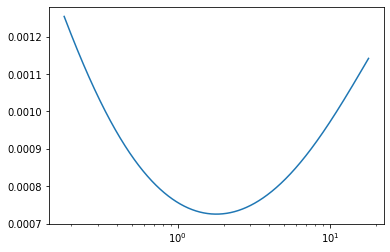

157
-7.705972618668976e-08
[  1.79442614 162.26245098]
0.0012867183871626657,1.4242460931105765,5113.892033562254,74.56759783186916,0.03632288033320239,3.7647759630350086e-07,0.03579303960908412,5.955871194499922,2.4884441379561355e-06,0.0016320613054836637,1624703.1211864958,23.897938760567396,0.009595162006967884,60.871273541390686,1586.9190811987346,3.2458125403717353,19.915476696026786,6.9623189888182555,6.146042859860597,5436.717043774676,19.915476696026786,6.9623189888182555,6.146042859860597,5436.717043774676,1.0,1.0,1.0,1.0


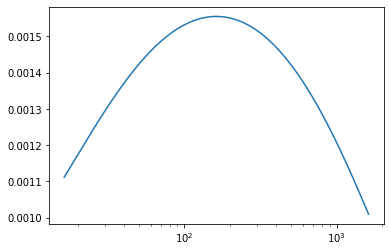

162
-3.920069511886837e-06
[2916228.06357166]
1.7055148243196196e-08,0.00012548943089195501,242236.61698176517,264.45729626784373,185.40471313105678,0.000573539850612627,14.436662152221146,563.753632335256,0.005165939980429934,0.38014626358791265,197.0688204852537,11939.606767646694,4.615585639671963e-06,0.08433357190884228,1768.3441082580898,34.23978948785457,51.08509003453427,284.19653243196115,0.6839139316993192,104276.54699393676,51.08509003453427,284.19653243196115,0.6839139316993192,104276.54699393676,1.0,1.0,1.0,1.0


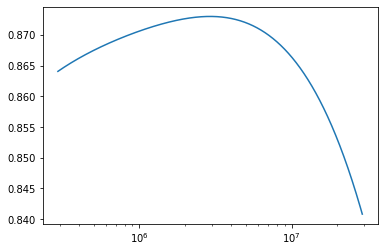

163
-3.3333004182366233e-09
[4503.09561862]
0.00713395989859796,5.348191372646491,2550.619790504102,36.57412875281081,0.48925975415398887,0.0008230375034362947,0.057030554279331694,61042.33351836295,0.0002488830305310419,0.017979103452343256,6029.983638415787,20.307339070893818,0.020231916355811064,13.607649963297415,115.02519279500763,0.6990978497985558,72.64538070036087,0.0014552730792415363,3.454813786615667,0.328722364491144,72.64538070036087,0.0014552730792415363,3.454813786615667,0.328722364491144,1.0,1.0,1.0,1.0


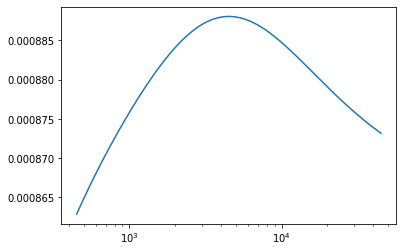

165
-9.736452477066004e-06
[69.8893161]
1.9235151983681982,12.410832814767526,26437.221982963045,7.445018722659049,288.06631176127365,0.0008778537673813156,680.9590661103176,1205.0465076333473,5.734497045356437e-06,1.049396098792932,43107.22366405586,2593.7224338146452,10.065779360782743,90.64363926649986,3892.2084395073816,4.95908124745954,661.1412565838247,74.91991591518905,97.1672104890993,36528.28408590037,661.1412565838247,74.91991591518905,97.1672104890993,36528.28408590037,1.0,1.0,1.0,1.0


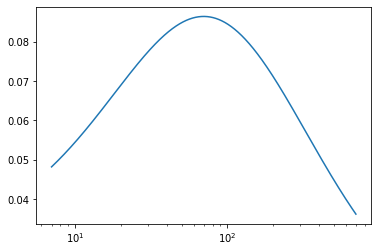

166
-5.84817984050634e-05
[11663345.76226113]
8.817935639130823e-07,0.0006605403077049981,4383374384.589206,11718.386337324911,39.1126679671991,0.3403551382199454,0.0014446317632023867,15621.675045535489,5.549831517472466e-06,6.50218576931097,34277.25661029312,0.002949382275110027,0.00018797948332065662,0.061155311306795766,11619023.0107738,91.97345262556937,51.475974395976685,3.7645970980901464,1.0277839188853362,85.42654980377027,51.475974395976685,3.7645970980901464,1.0277839188853362,85.42654980377027,1.0,1.0,1.0,1.0


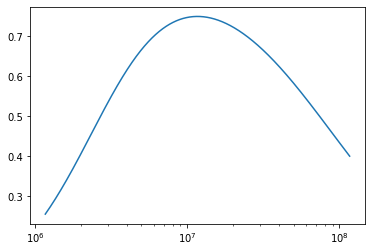

168
-1.838398151248399e-07
[1079.25582292]
0.43934270919660684,2.6356256371349995,21480167.088686544,45.75307120460043,0.030268873988694017,2.2908471828301606e-05,0.10592001887121016,630.6467299367598,0.00392140478576175,0.000368722330839395,207.84595909333774,1.6986351107914637,1.7802544591151217,3.8618242289467153,23616.18561568728,1.3337584269594758,119.85960251704661,8.101833179236394,2.7866486584408046,1461.371021755947,119.85960251704661,8.101833179236394,2.7866486584408046,1461.371021755947,1.0,1.0,1.0,1.0


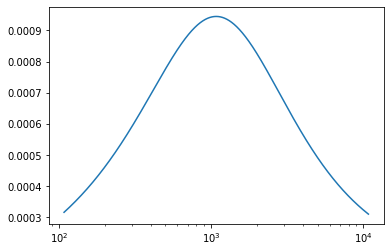

170
-1.045006937902852e-05
[   44788.28598019 20326578.48354405]
2.395434505022158e-09,2.5088512890771817e-06,456.7493140561452,0.025851260103589582,0.041993592858395046,0.0007407176047764328,1.0632332134420086,0.6040335693630134,4.84729180410811e-05,0.00014347548285358112,24273.75655463257,12.797628974323844,1.6582631274721126e-08,0.0020695337133488094,17.875428935645385,0.022970513058994148,3.8161575571530006,1.4175580013900118,0.008766405336707639,627.5877493941316,3.8161575571530006,1.4175580013900118,0.008766405336707639,627.5877493941316,1.0,1.0,1.0,1.0


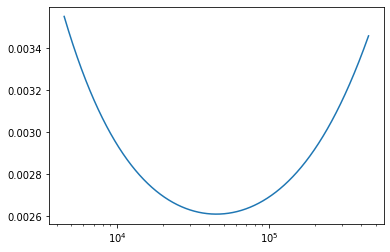

170
-3.3407477007408454e-07
[   44788.28598019 20326578.48354405]
2.395434505022158e-09,2.5088512890771817e-06,456.7493140561452,0.025851260103589582,0.041993592858395046,0.0007407176047764328,1.0632332134420086,0.6040335693630134,4.84729180410811e-05,0.00014347548285358112,24273.75655463257,12.797628974323844,1.6582631274721126e-08,0.0020695337133488094,17.875428935645385,0.022970513058994148,3.8161575571530006,1.4175580013900118,0.008766405336707639,627.5877493941316,3.8161575571530006,1.4175580013900118,0.008766405336707639,627.5877493941316,1.0,1.0,1.0,1.0


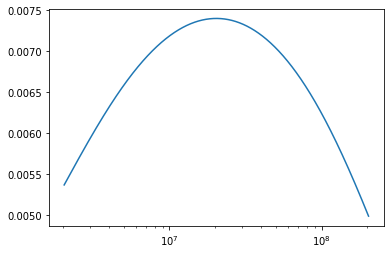

171
-3.0052645451639215e-05
[3.28517403e+10]
0.001294613053292075,0.10531814886556055,149596933.56504267,18368.733890499443,3.415584711992724,4.727676182784119e-05,82.89947461714549,40.009165611899476,1.0821678666240603e-06,0.004839651915306573,2.3668864796496614,124.42163689026475,0.004271738182138865,8.840504926867574,1185086.2499500283,202.70224627546372,0.023079326879116707,0.008840067029888703,0.005514956594779278,1.6991451150777235,0.023079326879116707,0.008840067029888703,0.005514956594779278,1.6991451150777235,1.0,1.0,1.0,1.0


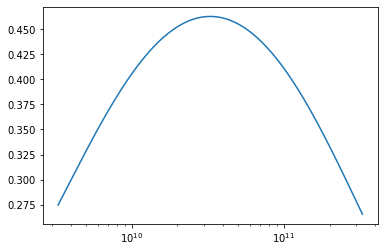

174
-1.808276241912002e-07
[2293267.03187406]
8.131146905638852e-06,0.0859319003313161,41794058.95402263,61834.77049678313,0.013828390277204136,0.4217912249413811,0.017267438958499314,225095.90651918302,0.0019188756581069112,0.0049550577299606775,1102.839063760179,16.617101328210392,0.00012145044053922057,0.5757479524283184,29354829.561301116,238.72222980384944,1.261966601062074,0.002603205370519195,0.003931905929078032,0.004808492453934222,1.261966601062074,0.002603205370519195,0.003931905929078032,0.004808492453934222,1.0,1.0,1.0,1.0


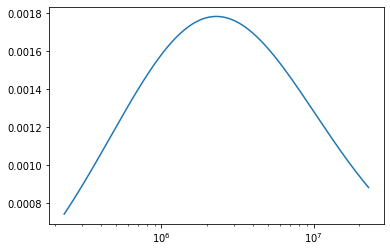

179
-3.4698272650679485e-06
[1.07892494]
6.328902446024084,30.149937415803873,340138.65779885196,5.419451933772479,162.0327394327461,0.02908480090793188,51.50003119772346,33090.98872697975,0.00574852954967717,16.229577021001855,251.46138175469733,260.21126472387516,12.199630747804452,504.34797211338696,2028.736454733095,0.05535592082217538,0.17007666606187777,0.22212232502520482,0.03681630257014656,142.2178684936054,0.17007666606187777,0.22212232502520482,0.03681630257014656,142.2178684936054,1.0,1.0,1.0,1.0


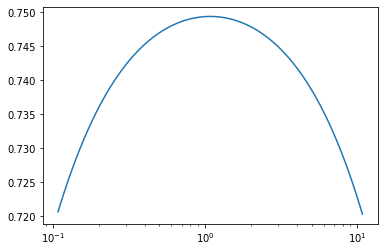

180
-1.1663128053791827e-06
[112284.74810572]
1.8617142573972425e-05,0.009729526766629975,90.93010364369161,0.005517823270045244,14.432186217554506,0.3083886664336363,0.02784227009456984,91339.00271868726,0.00015738231437428658,3.2829221143056047,390029.02899897995,0.17214143489065076,0.0011139282925122205,2.3786941220316127,1.220455595050304,0.0037288644548763524,381.60064131557857,0.8949142444677018,15.165177250816427,115.23603511419174,381.60064131557857,0.8949142444677018,15.165177250816427,115.23603511419174,1.0,1.0,1.0,1.0


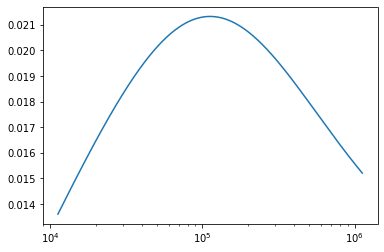

181
-5.907297093821207e-06
[1.50224186]
0.00013974028174230577,1.0812531301757262,847.0128233824599,0.04798440651514533,2.6509607680775327,0.25124107522973455,0.272278404003888,56.60358092567747,0.0031864341798630773,0.004122548268189293,1191531.7423954778,193.98968993962765,0.018784602857823553,1.393601664079491,6.625600823343896,0.004836568876337234,0.012382395903762583,0.008718013909192879,1.357234267413922e-05,0.045953119300021036,0.012382395903762583,0.008718013909192879,1.357234267413922e-05,0.045953119300021036,1.0,1.0,1.0,1.0


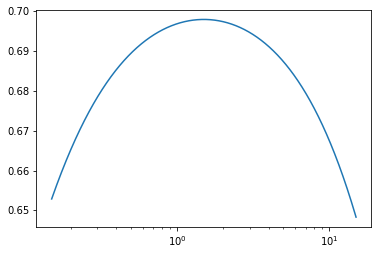

182
-3.7524574596112834e-11
[89799.22975257]
0.0007684064647559328,1.8518446946506726,1035.6704325870253,0.05670565377049961,0.0052430979505511495,0.0003148930981036674,53.14619620699513,466.38059877489445,0.008940671139978843,0.0017769625551283382,4467.513074816715,52248.49946786242,0.35978137542031263,181.72018664256427,4.677575015914786,0.0023833114580936007,731.8429859118996,0.04278640712886611,1.6041195280706229,3.249819963744776,731.8429859118996,0.04278640712886611,1.6041195280706229,3.249819963744776,1.0,1.0,1.0,1.0


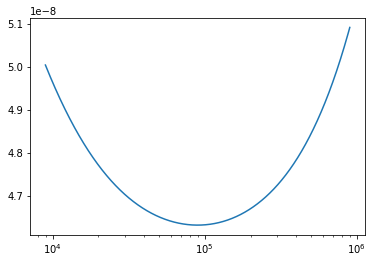

184
-8.824505585924847e-06
[35240.15295615]
1.0016162473370647e-06,0.0017293218050068331,171601.30622768123,54.78888879673967,682.0667009574689,3.528639933171758,0.015196683302830102,50.152967413243935,1.5317464908569402e-06,46.70087543635299,32808733.71396348,0.07036662348959473,0.00028346770861727226,0.0025747567195336077,14894.773453199705,1.0757000892823327,0.1972961202578993,0.002256008073410222,0.05570740753006809,0.49050366264169964,0.1972961202578993,0.002256008073410222,0.05570740753006809,0.49050366264169964,1.0,1.0,1.0,1.0


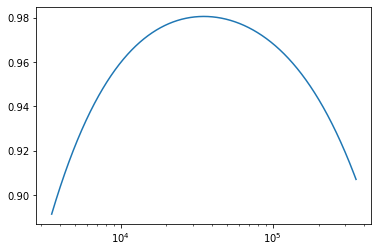

185
-0.0002924385347445671
[ 155960.3673291  7430783.02674973]
1.2886604435765837e-08,0.0009776903192064467,15866140.08920032,575.665785337921,0.23217853540747826,10.070850188855786,8.426707962941407,0.9145424448457127,0.03208878841403599,0.1553539504761197,160.57017730184245,3848.6049645501266,1.1400412623919574e-06,0.006071853661503455,132586.81773754914,1.2310755675732907,0.05186545454811446,0.020787365447245746,6.132095544342697e-05,3.0519685586241887,0.05186545454811446,0.020787365447245746,6.132095544342697e-05,3.0519685586241887,1.0,1.0,1.0,1.0


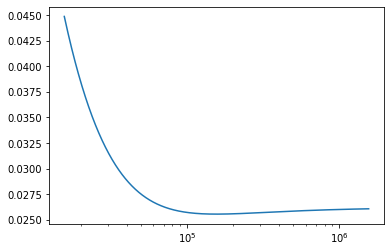

185
-2.795063828650579e-08
[ 155960.3673291  7430783.02674973]
1.2886604435765837e-08,0.0009776903192064467,15866140.08920032,575.665785337921,0.23217853540747826,10.070850188855786,8.426707962941407,0.9145424448457127,0.03208878841403599,0.1553539504761197,160.57017730184245,3848.6049645501266,1.1400412623919574e-06,0.006071853661503455,132586.81773754914,1.2310755675732907,0.05186545454811446,0.020787365447245746,6.132095544342697e-05,3.0519685586241887,0.05186545454811446,0.020787365447245746,6.132095544342697e-05,3.0519685586241887,1.0,1.0,1.0,1.0


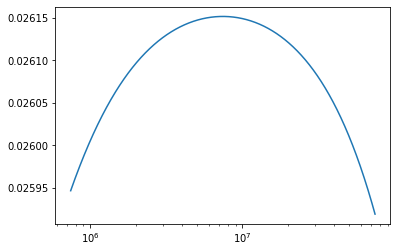

186
-1.1497673271625153e-07
[3.02750326e+05 1.76562460e+10]
1.0259386182027442e-06,0.012631212348893781,6533089.017642304,72.8909732509057,1.2932033100104257,0.0002554966452342845,143.40192050483543,305072.60024649696,2.568907769779332,0.5212666852991675,674.5831158356712,231.4495752942938,0.00015870098963021372,1.80381484309437,8969.048540836322,11.295186965909418,10.581715096681666,6.791949259298745,1.4752292447649005,912.1781266852842,10.581715096681666,6.791949259298745,1.4752292447649005,912.1781266852842,1.0,1.0,1.0,1.0


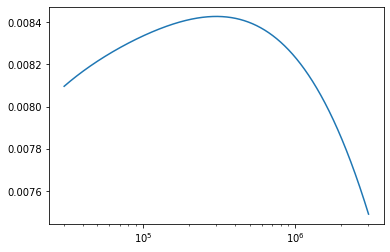

186
-4.942386498830303e-07
[3.02750326e+05 1.76562460e+10]
1.0259386182027442e-06,0.012631212348893781,6533089.017642304,72.8909732509057,1.2932033100104257,0.0002554966452342845,143.40192050483543,305072.60024649696,2.568907769779332,0.5212666852991675,674.5831158356712,231.4495752942938,0.00015870098963021372,1.80381484309437,8969.048540836322,11.295186965909418,10.581715096681666,6.791949259298745,1.4752292447649005,912.1781266852842,10.581715096681666,6.791949259298745,1.4752292447649005,912.1781266852842,1.0,1.0,1.0,1.0


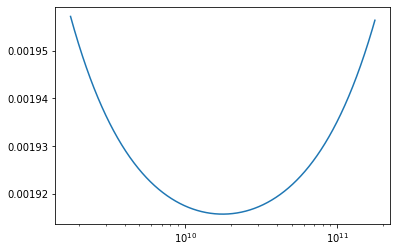

188
-7.50070855909564e-07
[42913.10800356]
4.486612918321332e-05,0.11504943267086985,700593.8387064657,637.6542328328444,2.311279942647525,2.043746729054455e-08,0.06035532429141341,17909.775895614053,0.00044740643214258253,0.0038892420493257364,5627535.911310393,5.328234170732363,0.0015512826481284506,1.1799557062049362,1033.6963453159121,54.71921382607241,71.38475429067499,0.08498313418019368,0.4151453158891833,12.339206920127307,71.38475429067499,0.08498313418019368,0.4151453158891833,12.339206920127307,1.0,1.0,1.0,1.0


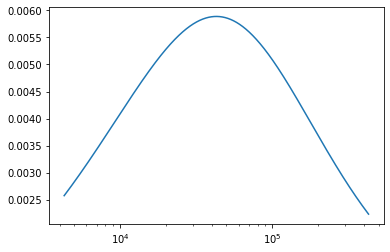

189
-1.2865383764770755e-05
[1238.14942737]
0.00013926335677062388,0.0038707221708971506,1609.380383638504,0.3013101442674875,127.77440844108371,0.0003735151458962239,0.9786118603515647,105.53338634664229,7.429807575875992e-09,0.2403946727260406,415230.1189100652,3.251567535131312,0.0016007700674055374,0.34376005842556395,3.718048527574833,0.18509342008385604,1.9306994451266388,15.690923029863038,0.08664022850703712,56.2669648123601,1.9306994451266388,15.690923029863038,0.08664022850703712,56.2669648123601,1.0,1.0,1.0,1.0


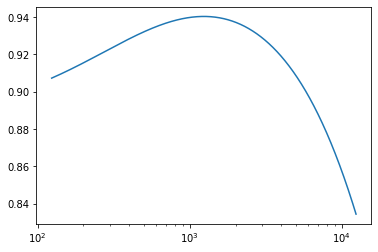

190
-7.741012672593528e-05
[ 15.69485361 653.04559046]
0.01469204311334396,2.463101645388116,81769328.4318772,3545.080722465312,8.486736943069953,0.15797483303981022,18.137239219093004,32.47084833556992,8.45909603526508e-06,5.2344344054927925,2321.589153832561,2062.3849519274563,0.3369943530512513,29.564252637635136,120562.8957337765,5.795902813271547,120.85863837324331,85.12832482022631,0.3911597551059452,7202.114049914882,120.85863837324331,85.12832482022631,0.3911597551059452,7202.114049914882,1.0,1.0,1.0,1.0


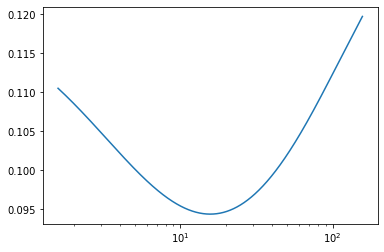

190
-6.168692848654289e-06
[ 15.69485361 653.04559046]
0.01469204311334396,2.463101645388116,81769328.4318772,3545.080722465312,8.486736943069953,0.15797483303981022,18.137239219093004,32.47084833556992,8.45909603526508e-06,5.2344344054927925,2321.589153832561,2062.3849519274563,0.3369943530512513,29.564252637635136,120562.8957337765,5.795902813271547,120.85863837324331,85.12832482022631,0.3911597551059452,7202.114049914882,120.85863837324331,85.12832482022631,0.3911597551059452,7202.114049914882,1.0,1.0,1.0,1.0


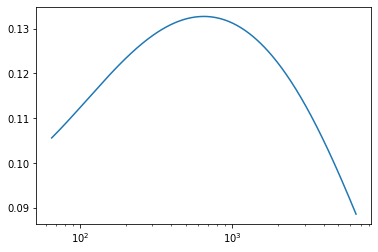

192
-2.4303923381197717e-10
[0.11204836 1.52154115]
0.03317832194626534,0.22006179075297738,125.50040618616119,0.5155380306463115,0.3462979079504584,5.277557435536722e-06,390.56366560820254,3.6368546045963313,0.027212469251025277,0.0009659758065775937,600139.1191444491,300622.0258358484,0.17819499414151832,34.97825252012577,51.42183850343617,0.15690991074039626,0.002244799839122972,0.4741533923851975,9.403989193684285e-06,81.98703600044153,0.002244799839122972,0.4741533923851975,9.403989193684285e-06,81.98703600044153,1.0,1.0,1.0,1.0


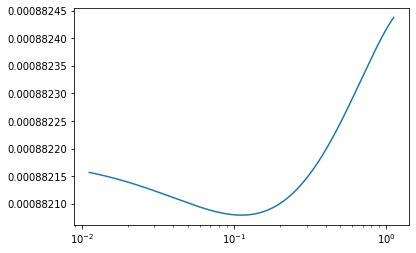

192
-9.014294045364343e-10
[0.11204836 1.52154115]
0.03317832194626534,0.22006179075297738,125.50040618616119,0.5155380306463115,0.3462979079504584,5.277557435536722e-06,390.56366560820254,3.6368546045963313,0.027212469251025277,0.0009659758065775937,600139.1191444491,300622.0258358484,0.17819499414151832,34.97825252012577,51.42183850343617,0.15690991074039626,0.002244799839122972,0.4741533923851975,9.403989193684285e-06,81.98703600044153,0.002244799839122972,0.4741533923851975,9.403989193684285e-06,81.98703600044153,1.0,1.0,1.0,1.0


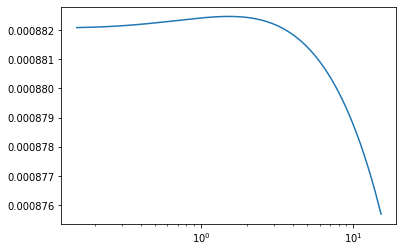

193
-1.5259267430569115e-08
[10603652.1762358]
9.04429447112951e-09,0.00081031174776561,2816.285386992308,56.2769920689767,0.2448779714783322,9.26383993211906e-06,0.00351969793388181,184811528.42146277,2.1851988837751886e-06,0.17004520482911323,345.36628057484216,0.10734528480352774,1.4930439309798056e-06,0.2581856371378059,394.0638689746082,9.52406695265353,134.3488665290726,1.4134345605310532,2.7803809333047744,248.05274225852577,134.3488665290726,1.4134345605310532,2.7803809333047744,248.05274225852577,1.0,1.0,1.0,1.0


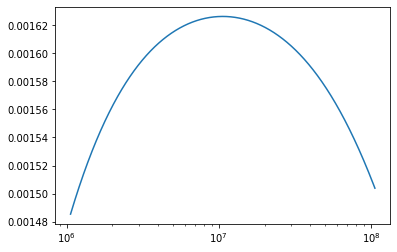

195
-1.8060491905960707e-06
[6670.37226111]
0.000863260040047867,2.689260885399497,12.473677011534237,3.205978448565627,0.1301514473754066,0.00012353431573980056,2.895196315612212,5113.0602629404375,0.00010831904722501012,0.02250056135776963,1.1199705051677808,44.855501563600846,0.012296899773733107,210.84629327147823,4.130005645605846,0.0038817630454237866,4.933068896995764,0.02660971214619111,0.5883207669806761,4.268875529882351,4.933068896995764,0.02660971214619111,0.5883207669806761,4.268875529882351,1.0,1.0,1.0,1.0


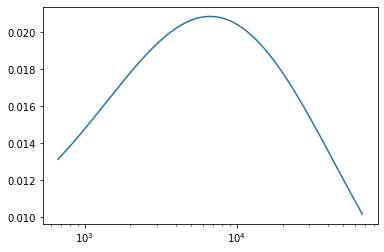

196
-6.268240633302592e-07
[19.56296939]
0.0003591896793972138,0.28166627696360913,77597560.6174851,106.12410354812701,0.001986640995357409,0.013753019996833121,0.011873441501083222,88.23174877321925,9.72788746414485e-06,5.099394094009565e-06,57398.14053865503,4.9831427802803026,0.016560576833501303,13.710574500312806,94593.04648783979,2.9366510543395585,1.1043495352726045,0.28547403857187365,0.005111041728042932,17.82354005275135,1.1043495352726045,0.28547403857187365,0.005111041728042932,17.82354005275135,1.0,1.0,1.0,1.0


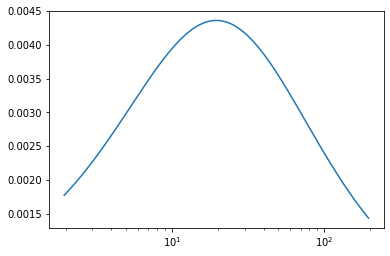

197
-3.0737658125445932e-06
[19812.80930672]
0.009020218445767546,6.253584322648209,2559825.68035126,6570.809025794917,720.3953315416758,2.907330161859096e-06,40.97272386999248,998.2769464309118,0.0012707412059604658,17.36761240418981,1312.4969733949385,133.59868437387027,0.22941279811294785,161.22802166421894,46256.17307365405,51.07605253358394,25.88985555327918,0.04592156160980924,23.917186893712742,1.8629296008938265,25.88985555327918,0.04592156160980924,23.917186893712742,1.8629296008938265,1.0,1.0,1.0,1.0


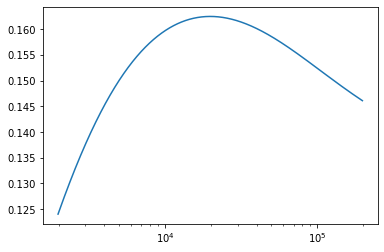

198
-1.532505422199848e-05
[21558.61022689]
3.358754724439073e-07,0.019781641040305276,98846865.81993629,96515.325096933,0.07016327398264427,0.03719665224293767,0.002303964446616554,685.5443498617655,4.8389240257421395e-09,0.0001464808857180068,265654.05978642986,0.08947681090217897,3.753460234507936e-05,4.558369511912649,1561409.1964507164,566.8394577615073,0.4020412063964209,0.9580232709947817,0.007887691596631738,3.2356104599583455,0.4020412063964209,0.9580232709947817,0.007887691596631738,3.2356104599583455,1.0,1.0,1.0,1.0


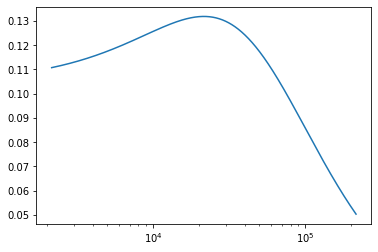

199
-4.793130530911065e-07
[  24.21613212 8794.37014834]
0.00018290268210208757,0.01795552296969309,41092822.07341735,7722.289427761958,0.25085813468255347,8.556274661815124e-06,116.12229513947611,0.12207880007997456,0.0015412257552648177,0.010410316078910138,452958.0413168791,2115.401134904924,0.00849763743761146,8.486921160512795,6772239.580050593,780.253469729389,0.606811918575358,1.8580542884093223,0.001054476052770504,574.1352974479322,0.606811918575358,1.8580542884093223,0.001054476052770504,574.1352974479322,1.0,1.0,1.0,1.0


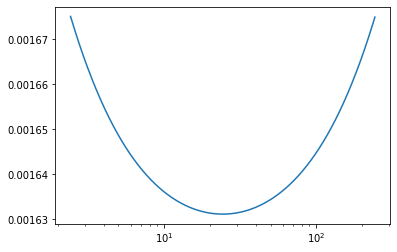

199
-5.707453101691344e-08
[  24.21613212 8794.37014834]
0.00018290268210208757,0.01795552296969309,41092822.07341735,7722.289427761958,0.25085813468255347,8.556274661815124e-06,116.12229513947611,0.12207880007997456,0.0015412257552648177,0.010410316078910138,452958.0413168791,2115.401134904924,0.00849763743761146,8.486921160512795,6772239.580050593,780.253469729389,0.606811918575358,1.8580542884093223,0.001054476052770504,574.1352974479322,0.606811918575358,1.8580542884093223,0.001054476052770504,574.1352974479322,1.0,1.0,1.0,1.0


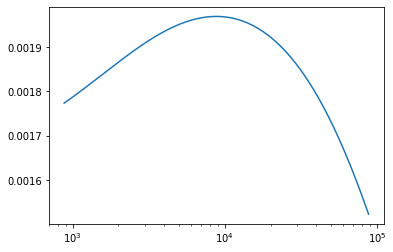

200
-3.9571816602603643e-10
[80.65185628]
0.0012081662299089895,110.28651097473865,252359.8540895176,12.256576600176952,3.6857074997601,0.0031305046800840087,0.3714087316406458,1920769.5721003779,5.791056848478305e-06,0.13228063394896622,48.83275463077769,218.60104291529152,0.6223541099300083,485.0578540961804,286.16211708891507,0.022870966975253006,38.44537658556601,0.0010403118610224512,16.04520900967878,0.008477025546782067,38.44537658556601,0.0010403118610224512,16.04520900967878,0.008477025546782067,1.0,1.0,1.0,1.0


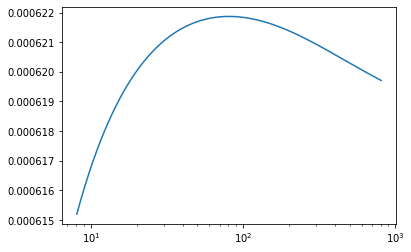

201
-1.249042216100232e-07
[78207.59733034]
4.444401897637412e-06,0.001963018769667278,2094.050987733339,85.13306996307493,4.638273693468257,0.016784316025783327,72.13579464870486,609.1099367181846,0.0007122836757466166,0.14143205500954936,225707877.8299487,1566.6367162121348,0.000670976169567815,0.004824225455328534,411.43577081784355,30.71036204051611,18.929752982113047,0.006921829236048228,6.111627556369125,0.8764930850169791,18.929752982113047,0.006921829236048228,6.111627556369125,0.8764930850169791,1.0,1.0,1.0,1.0


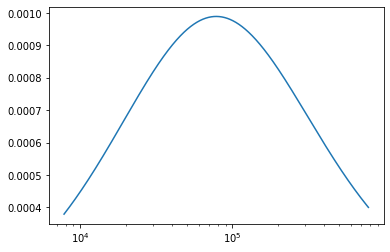

202
-1.2907439766096304e-08
[491671.01194401]
2.9089486556654545e-07,0.0003792315217794649,112.97038646724786,0.08458650944878539,731.4201437158495,0.006432779529609441,907.0353220070328,71263.09328964344,0.0068911362642136275,2.787506646512433,572567.0159664258,18790.09934964287,6.437246857920641e-05,0.022143031605866833,22.770485950954125,0.038399526217541856,933.152473547672,2.6844370722809043,18.42114286647801,4.895903036802851,933.152473547672,2.6844370722809043,18.42114286647801,4.895903036802851,1.0,1.0,1.0,1.0


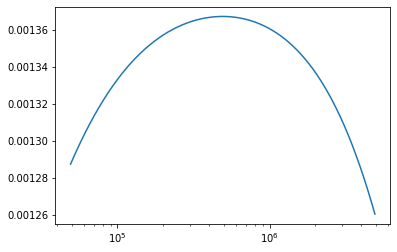

203
-5.896061186483857e-12
[1751.79200918]
0.000928653203060448,9.188753471475874,8471.708369543516,7.379062935212573,0.5054070538403327,0.34002876836884777,5.650454792460078,4359099.704867545,0.00023759099907770317,0.28319413415678435,5776898.48129367,2469.952803783906,0.8526445828684734,122.29265167554212,40.277236267575844,0.013602870887651311,658.3940228690742,0.017653876761572894,16.43566671442384,0.22058917699146946,658.3940228690742,0.017653876761572894,16.43566671442384,0.22058917699146946,1.0,1.0,1.0,1.0


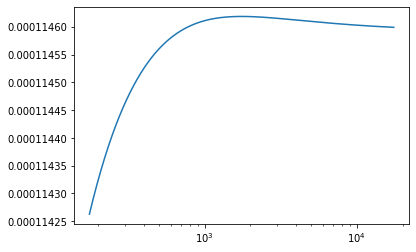

204
-1.677433741128359e-07
[177.47532777]
0.14012993268607485,29.724809032837967,2360.2718501999775,12.978189343048133,9.81934633840422,0.11528779714729115,988.3897939005976,12856.049808628828,0.014649923902509503,0.4609566353235322,25397163.63449319,495181.0125222433,0.16190267916060994,383.1239777028045,79.4438992834948,0.19373876883910152,228.7391188265051,41.1598221798394,1.9544828961080605,3313.927723190174,228.7391188265051,41.1598221798394,1.9544828961080605,3313.927723190174,1.0,1.0,1.0,1.0


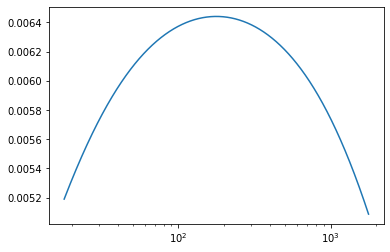

205
-3.4179200059103465e-06
[3881.97001706]
0.0007449177167825742,1.1720527653248118,679847.2333456689,188.17520752968517,875.1304282809607,0.1369573527753678,83.69059701147725,51928705.357785255,0.0001340960884839967,26.496207464544273,205592.61429838772,116.1463167710356,0.12132146837636083,577.5162808756468,79417.58663403313,2.3208798056810354,395.56017768656153,0.3663894730832055,71.35038236779565,45.73148981767597,395.56017768656153,0.3663894730832055,71.35038236779565,45.73148981767597,1.0,1.0,1.0,1.0


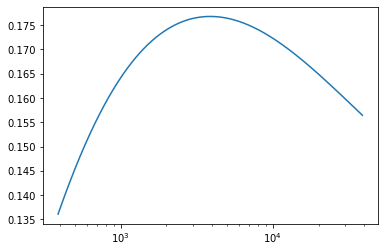

206
-3.040048705553098e-08
[3079.68885445]
6.398360926301683e-05,0.06710501948791042,10830.454298912102,82.17461371549834,0.0018808661100821308,0.1592236874539266,3.092051076131051,2893.4206462129005,0.006797597512407428,5.0563899577859866e-05,33351438328.153214,29.97937543870106,0.0005378051383027836,0.36639155692927394,1862.0380349805591,0.81160929235188,203.90593904840821,5.531884678715753,21.57164990383427,27.360332401700298,203.90593904840821,5.531884678715753,21.57164990383427,27.360332401700298,1.0,1.0,1.0,1.0


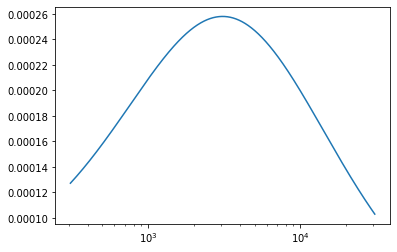

207
-1.0388696048829749e-06
[1210.27631201]
1.6601378710262056e-05,0.061774970444804754,8.875327730123551,0.17590837973563395,0.4829316904177157,2.997980795742593e-07,0.14836122704042817,10405.611408608047,0.0006212912593741128,0.4270255510790717,5712.191908542821,45.90322999952612,0.00021781817037583092,1.041811539081915,7.409029296866898,0.15708525589951,6.5141727051530625,1.7310338806172714,0.101500089140375,775.4871654513483,6.5141727051530625,1.7310338806172714,0.101500089140375,775.4871654513483,1.0,1.0,1.0,1.0


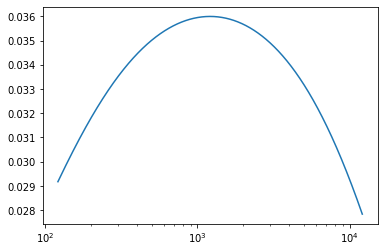

210
-1.8383711916092338e-06
[20807.49894103]
2.8259794328462367e-08,0.0018748375202016013,69533.97367801261,25.313768145001053,49.92968822742859,5.076793952216517,1.062393882653216,24452.98253522762,6.821958936310912e-08,0.06743591230976263,51905803.77120325,1.5256600519437904,4.899142789962657e-06,0.003976905408426304,396.82230609072656,0.06562791386624117,0.0047439873106305975,0.004117972397556013,0.001150745800936438,1.5869583055181282,0.0047439873106305975,0.004117972397556013,0.001150745800936438,1.5869583055181282,1.0,1.0,1.0,1.0


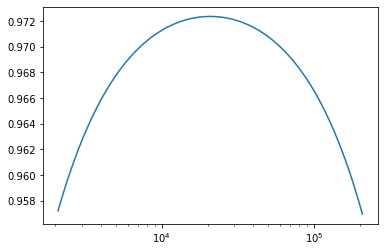

211
-3.801201524655795e-07
[61011.017859]
0.008650486244082545,0.34018178885222977,13467350.419260474,3193.8064089311147,657.587912383562,0.013840070040962571,0.0015646156431090626,14.086434816259901,0.0598908438386184,5.360276001037879,7726936.475791759,0.007876552634197918,0.2575752803199807,48.776256592275764,461905.85850620293,14.354007327594367,759.2296244577027,0.061902520584750965,12.424802901421165,14.050868971292553,759.2296244577027,0.061902520584750965,12.424802901421165,14.050868971292553,1.0,1.0,1.0,1.0


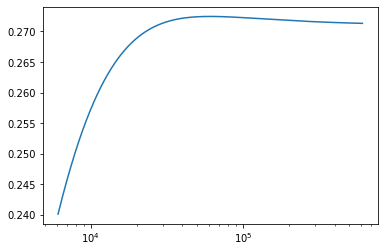

212
-2.527770601723489e-07
[6330.06119498]
7.734241677349215e-08,0.00021060881344806096,15624653.286437022,3588.4447344572354,0.0020238650058571066,0.982922581992912,0.0011482705405613594,0.033491223575129264,5.6419009856449366e-05,5.3847780410468875e-06,90.97607780261401,0.0014705821378024593,2.445525551826271e-07,0.024969497598169785,18955.010981989788,295.2143365448513,0.07577507862695988,0.06571467146860134,0.00018103797853537677,20.826008817449566,0.07577507862695988,0.06571467146860134,0.00018103797853537677,20.826008817449566,1.0,1.0,1.0,1.0


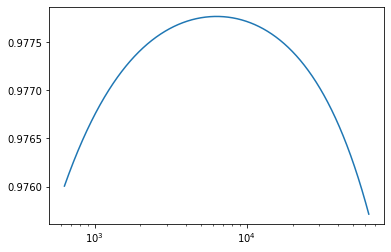

213
-3.443949542070168e-05
[4.41242415e+04 1.16291940e+12]
1.392653340303341e-09,3.4685767080697644e-05,9443.05139644608,861.4311532994807,464.0177494268217,8.243997287851011e-09,4.032397394846397,0.0027190253388689853,0.001837250919650039,2.711301975857853,0.3107420121748273,18.1505425279419,5.051459177751654e-07,0.020443687057476477,8729.714152795585,326.79711370224,37.55703439347623,21.40458482202264,4.5378419868526985,12244.697099970248,37.55703439347623,21.40458482202264,4.5378419868526985,12244.697099970248,1.0,1.0,1.0,1.0


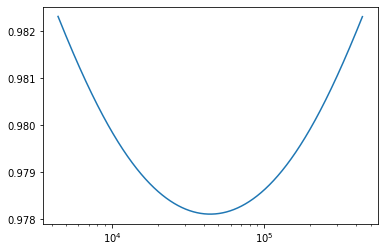

213
-1.1453328407906582e-07
[4.41242415e+04 1.16291940e+12]
1.392653340303341e-09,3.4685767080697644e-05,9443.05139644608,861.4311532994807,464.0177494268217,8.243997287851011e-09,4.032397394846397,0.0027190253388689853,0.001837250919650039,2.711301975857853,0.3107420121748273,18.1505425279419,5.051459177751654e-07,0.020443687057476477,8729.714152795585,326.79711370224,37.55703439347623,21.40458482202264,4.5378419868526985,12244.697099970248,37.55703439347623,21.40458482202264,4.5378419868526985,12244.697099970248,1.0,1.0,1.0,1.0


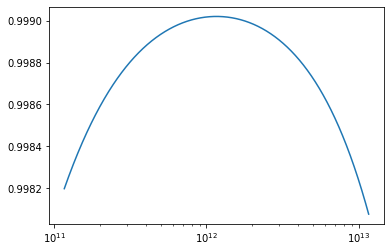

214
-2.16791476992384e-08
[1.86646022e+10]
7.898957479975464e-08,0.00031136550975532353,1947.032381158902,0.15418396371862,287.3722318212503,2.5709017932271188,0.2696139929395453,683.7931733192733,2.971222763173257e-11,62.383619392091006,0.008636002479437833,34.19441954869979,3.0933553752670844e-05,0.00194744037374641,5.547341709964903,0.13625370659388758,0.03669456143980307,0.0041851225117530725,0.00018796159831915962,0.005242477428866994,0.03669456143980307,0.0041851225117530725,0.00018796159831915962,0.005242477428866994,1.0,1.0,1.0,1.0


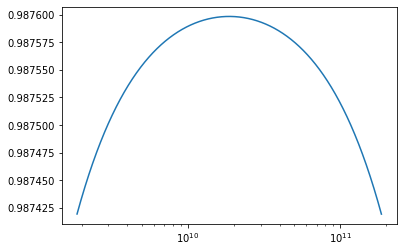

215
-2.6527157053424233e-05
[294831.59723944]
1.1796364625409623e-08,0.00010238181600669496,83933.13220151153,57.60935713869832,0.012357577063281753,0.6165819784346573,0.0179695140806444,514.9781013856108,0.002752703141291101,5.813846638873636e-05,184469.45463923406,0.3146485642247541,1.6241536192631238e-06,0.008385511104840277,485.32968365760735,0.8657464916113417,0.021827452597476843,0.003201559679952302,0.000550773664332126,0.01041363977478696,0.021827452597476843,0.003201559679952302,0.000550773664332126,0.01041363977478696,1.0,1.0,1.0,1.0


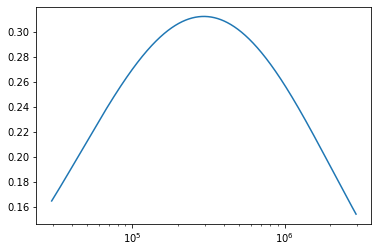

217
-1.2775856243329303e-07
[17893175.63011228]
8.041486473382185e-09,2.5450521521227684e-05,376373.1729265949,3743.9995770061782,0.042655201701994966,0.0006887251816015125,4.4234032433816655,62.58967341682123,3.6447642791672384e-08,0.008831627718552601,3615.48778503875,828.5528701829535,5.7376267343062855e-08,0.004187647501257906,27589.363451348087,57.6117401615549,1.599497929575613,7.116688358875099,0.2541486036843913,537.9659555500065,1.599497929575613,7.116688358875099,0.2541486036843913,537.9659555500065,1.0,1.0,1.0,1.0


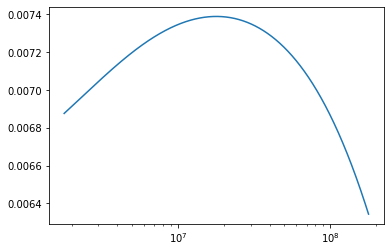

218
-1.907991188816998e-10
[7540.16932269]
5.136206023363115e-05,0.0058933015231685745,0.6347283661533422,0.12086851305883763,8.481359642446437,0.0018713487799951597,61.09505251964128,96741.48061375346,1.2192764489201337e-05,0.16401257603187006,33764.49117151989,2367.085656669487,0.001115688013710196,0.10127963879343334,0.16119903565295493,0.007821664611789642,224.77210745056442,0.05994465807777463,61.4376565454571,7.257316698472652,224.77210745056442,0.05994465807777463,61.4376565454571,7.257316698472652,1.0,1.0,1.0,1.0


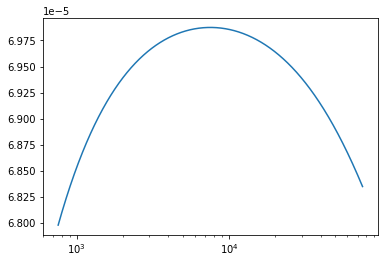

219
-2.0856000118785927e-09
[6.97055382e+09]
1.2635491840566414e-11,1.7417775959729022e-06,155650.9980834714,17.14016938609522,0.012098612970957143,0.0003880238207337473,0.042652358001845546,1619987.3831852449,9.676108101488728e-05,0.0024830957638410397,35397616.60919811,13.580924947747155,5.936217808748083e-09,0.001204926145767853,738.2086459795553,0.04539457694899131,295.37797080306916,16.102704705367557,1.5985710356461607,92.19624517094202,295.37797080306916,16.102704705367557,1.5985710356461607,92.19624517094202,1.0,1.0,1.0,1.0


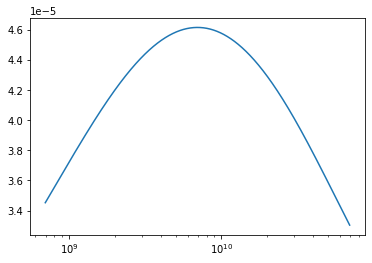

220
-1.2789827831261036e-06
[69.70048778]
4.101523802851107e-06,0.059576953900950795,105637.96857356418,107.70671680696012,7.015552088478903,5.0927895271609304e-05,0.024234944177243478,224.57928757217286,1.0875311181779855e-06,0.27764527459477384,392271114.0769286,2.4783690725589698,0.0001504001212471263,0.14484825370714335,5894.228432291963,0.17455026270855303,0.0988491028970869,12.777486709468509,0.00039836986557122595,9570.261373588457,0.0988491028970869,12.777486709468509,0.00039836986557122595,9570.261373588457,1.0,1.0,1.0,1.0


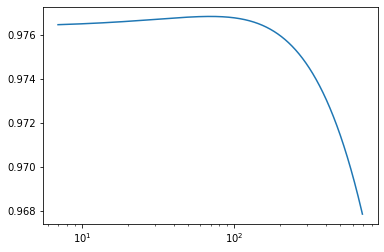

221
-3.978542161366984e-08
[15286.09090826]
7.031039319168259e-05,0.3020570213921344,11810073.157941021,99680.74284668334,0.002417462576652969,0.01621328544160972,0.20019505561457257,40.15026173783479,6.144012934199791e-08,2.0270260573902144e-05,2643.550216152774,12.333712937514095,0.04670838054294674,1.9029369769099542,6443413.632760089,610.7227410822554,642.9081136372408,0.005279557677741502,421.8345143584877,0.016117256845085463,642.9081136372408,0.005279557677741502,421.8345143584877,0.016117256845085463,1.0,1.0,1.0,1.0


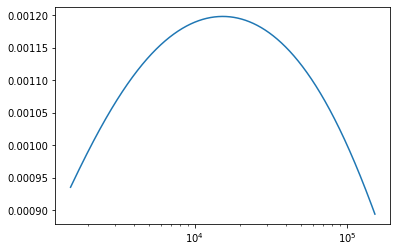

222
-5.221315757530931e-07
[1301.40353616]
8.087699210719608e-05,0.022355566389426075,71235.0222643938,60.92800556089463,103.28687303755119,3.831485756364369e-07,8.36741973971137,25.94396054156355,2.866245340275361e-05,18.206367133486463,6339.1115794642465,16.001033709028004,0.00012712810048063649,1.4327504598025382,9777.372911427146,12.939071433335611,0.0016677529967071068,0.012048527669972506,9.40532624506754e-06,2.6946427711636702,0.0016677529967071068,0.012048527669972506,9.40532624506754e-06,2.6946427711636702,1.0,1.0,1.0,1.0


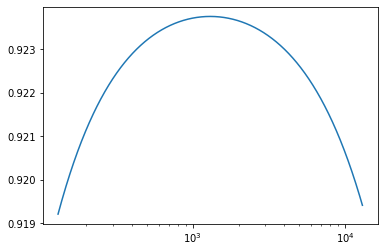

223
-5.550709891721795e-10
[14.87259901]
0.0022912238057072247,0.7450329349364573,13925022744.143366,30130.184117267127,197.10646911496806,0.8691709281809014,18.097859535588835,67.8717371073117,1.429567092627184e-07,18.53943433298752,371.1401702223993,40.51615512957494,0.6045907564575318,78.03918187310639,23287775.08689269,53.72813119983016,0.0016854409777348062,162.96903859117836,4.158981965733597e-06,14863.211720300988,0.0016854409777348062,162.96903859117836,4.158981965733597e-06,14863.211720300988,1.0,1.0,1.0,1.0


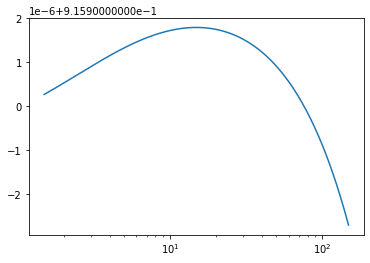

224
-6.689234923005355e-08
[3.60847899e+01 1.69925608e+05]
0.005213361400447098,0.6285976718957683,1328.6996627771744,3.381091006062542,0.0013946957879966756,0.06875274291070249,0.13343507284071193,141.46304590654427,0.010297660382153658,0.0003703617736046263,143.85564310289539,0.9834438640556552,0.019266770196164698,0.7737670013606945,130.45377448778345,0.419073139527011,14.486280939444041,0.054238984319230014,9.211713800324674,0.23783870788197914,14.486280939444041,0.054238984319230014,9.211713800324674,0.23783870788197914,1.0,1.0,1.0,1.0


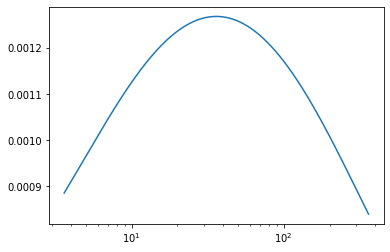

224
-1.9925439782760837e-07
[3.60847899e+01 1.69925608e+05]
0.005213361400447098,0.6285976718957683,1328.6996627771744,3.381091006062542,0.0013946957879966756,0.06875274291070249,0.13343507284071193,141.46304590654427,0.010297660382153658,0.0003703617736046263,143.85564310289539,0.9834438640556552,0.019266770196164698,0.7737670013606945,130.45377448778345,0.419073139527011,14.486280939444041,0.054238984319230014,9.211713800324674,0.23783870788197914,14.486280939444041,0.054238984319230014,9.211713800324674,0.23783870788197914,1.0,1.0,1.0,1.0


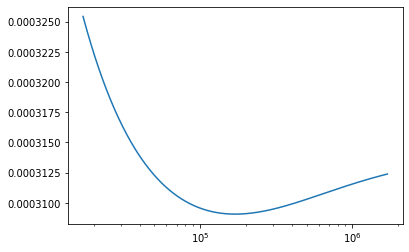

228
-1.54703894570396e-05
[736.87760247]
1.3860165231327003e-06,0.0006639201587652483,4290.364034106552,3.8128885261275696,13.530984180832728,0.00046587167205182047,0.11926091881194739,83.5178938637821,0.005754349056851989,0.04779570943892755,32003.444349881673,1.0286228538025701,0.0003939716972658298,0.3490316970030612,10.232036325634885,1.7801500114623108,0.4306991606484326,3.422114445561164,0.009068068760769508,235.8502815408178,0.4306991606484326,3.422114445561164,0.009068068760769508,235.8502815408178,1.0,1.0,1.0,1.0


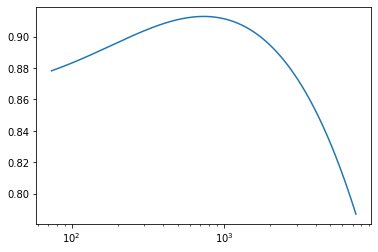

229
-3.3562677761410364e-06
[1.23088532e+08]
4.806009331835439e-07,2.038147658938992e-05,25153246.955750216,2754.9537607619122,11.822324674238732,0.03516237064992089,0.03056708562339007,57.98246978175928,4.7486715672359536e-05,0.10425908654288431,5249.77908129936,15.750416616780647,1.773087578523766e-06,0.0038207620986090577,31812.423385593585,26.998724183279037,47.508404030113155,0.6649372276389077,0.04856919142181076,5.123977632643598,47.508404030113155,0.6649372276389077,0.04856919142181076,5.123977632643598,1.0,1.0,1.0,1.0


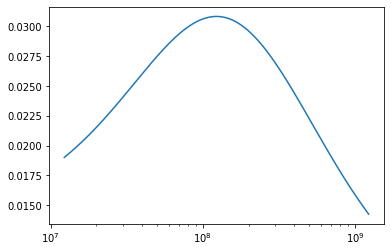

230
-7.97115588570263e-08
[14926.87066788]
7.26762461585684e-05,0.2811455019573394,19042219.9651646,225.48848668053196,0.035588522968464015,0.038913141408746015,0.07668921295504413,1268.4422731578252,3.6563826430760545e-05,0.004090614104546461,1852.5345758941298,32.228693537316,0.0051542307367284336,6.109418780899766,25863.240731789447,196.70976462009645,412.3877145293631,29.518874693790153,281.2092882324825,10196.513111217384,412.3877145293631,29.518874693790153,281.2092882324825,10196.513111217384,1.0,1.0,1.0,1.0


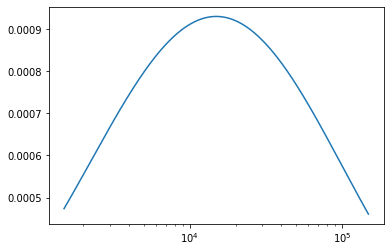

231
-3.180284586902851e-07
[1371.25357326]
0.001134329779925821,0.9259728838276501,9432.336281427612,1782.0606753839354,0.36329583684576816,0.0007334773806445391,0.07799525269883742,766.5298982383579,0.00010239015722268947,0.0024978708453488618,2090.113480381313,10.402683451968795,0.004210569808033334,48.861213074249086,2706.6911276244828,3.200771685194751,91.48075621780865,263.37640149876796,64.3644832084492,7417.918841296817,91.48075621780865,263.37640149876796,64.3644832084492,7417.918841296817,1.0,1.0,1.0,1.0


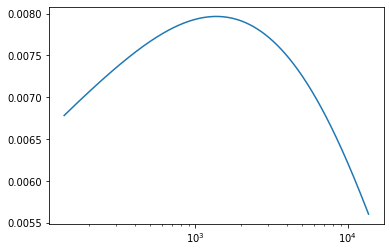

232
-8.16265022951122e-09
[23379.39081224]
5.249357661286632e-06,0.0017413874410796015,514.2040708914474,5.823838705418816,0.007393234488758457,0.0011730478747556889,8.204292828802803,38.88508476054999,9.470262509064659e-05,0.00022699744545450872,94261.20305584773,36.67377602847254,7.503605360656591e-06,0.0917440607889383,9.795114790248137,0.11935272053972838,0.07303454134665917,0.05064980539405939,0.0004742672510833761,0.09090212437654989,0.07303454134665917,0.05064980539405939,0.0004742672510833761,0.09090212437654989,1.0,1.0,1.0,1.0


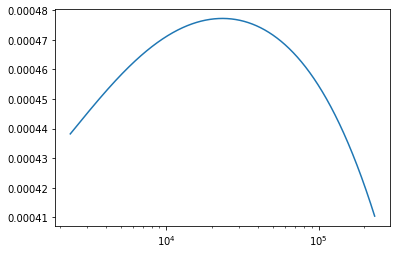

233
-2.6525316295863965e-08
[26276327.78874675]
3.382674932880891e-05,0.0016798040722361754,491532416.61707383,4293.5276250897805,3.154959975220936,4.201122598600288e-06,250.28859061479218,513.3393352198551,0.0010555485022123894,0.017903092477037377,427.5883275103607,112610.81946791687,8.579192739975885e-05,0.007885237893274255,645457.0935191531,225.57636346639634,0.12400321494639076,0.007772176490518727,0.005147599917212364,4.849824373446187,0.12400321494639076,0.007772176490518727,0.005147599917212364,4.849824373446187,1.0,1.0,1.0,1.0


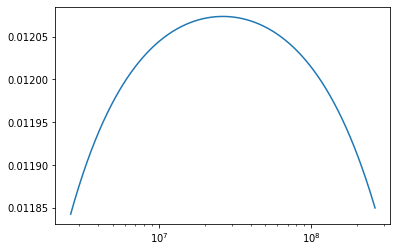

234
-1.1626370871598013e-07
[255374.78045938]
5.471685479734396e-08,0.0001457601225323826,2047.260850854674,2.78136497079413,298.127927519425,0.0004269592397521366,662.2854086335174,733397.9436224937,3.827275637317025e-08,81.97426032272324,74443.97672175434,167071.46510796205,1.2710580836122808e-06,0.0015339247709826147,65.28131978118155,0.033549993425915345,0.030179959687271184,15.589941504579754,0.02250990384621355,525.5360478852735,0.030179959687271184,15.589941504579754,0.02250990384621355,525.5360478852735,1.0,1.0,1.0,1.0


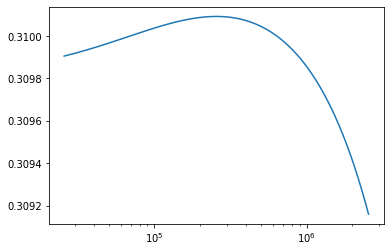

235
-3.19596659843069e-11
[25.11699814]
0.0006693129248726315,0.7562386619146753,3413.5170041797605,2.5119743566608657,0.0029249486440132456,1.2146821549174365,368.3360550095536,1534232.2062969327,6.502849694886308e-06,1.2086375192904966e-05,1098216.5182811124,11349.611388733547,0.06586251729362086,383.2909975779731,4.707829600274993,1.3684920518599437,0.17565148343621836,5.652966768307426,0.015441737304933726,46.14721033904562,0.17565148343621836,5.652966768307426,0.015441737304933726,46.14721033904562,1.0,1.0,1.0,1.0


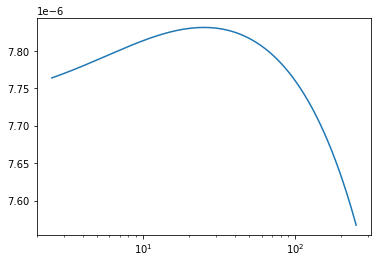

238
-2.7476277552132555e-07
[14861157.63256756]
1.4274191686767247e-09,0.0007492513569863435,2515.8636791787303,0.05794634668069531,17.555597512733527,2.8870695365083036e-05,481.2448744343366,18369197.98073911,7.518046254294783e-08,9.327013058822828,3594774.711918423,1203.9011870129932,1.3554240810424488e-06,0.0024662154821078106,8.562087920340241,0.03904934916251156,424.22460431806724,614.4441027400302,0.655273150173078,168214.44126594803,424.22460431806724,614.4441027400302,0.655273150173078,168214.44126594803,1.0,1.0,1.0,1.0


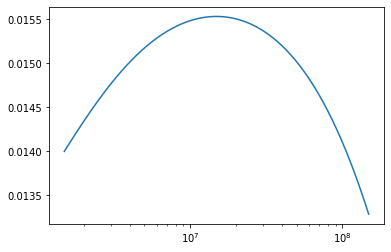

239
-1.6866052858347837e-07
[3811.26044048]
0.0008687102572395879,0.0018601790736781075,28.26283535823737,0.1788053096427476,0.12066066742380753,1.1244518785778808,41.87569430633321,18892.12252562941,9.333979439818829e-06,0.07361506154634471,12986320077.366709,1311.8149849220522,0.0015447420038664068,0.07227489342738415,0.5073138126828445,0.006009300372538991,3.386644389882607,1.3970658410088816,0.14578326119287413,347.25297850005893,3.386644389882607,1.3970658410088816,0.14578326119287413,347.25297850005893,1.0,1.0,1.0,1.0


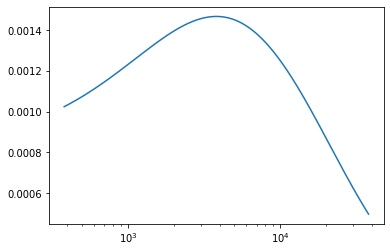

242
-3.6375272065569675e-06
[25.21878992]
2.823472219778517e-05,0.5983384313527804,3.321011956479749,0.7091712417097104,7.681465984409082,2.9184423520433465e-08,3.008672611234692,0.7557129042386294,0.005626912751390415,2.944021764435247,4554.427593813987,21.25801676106292,0.023152847128266554,12.826811799524938,2.149037262697165,0.0021439994433330336,0.10491689826505177,0.0044149113858647695,0.0001520226164096992,0.011825889763676514,0.10491689826505177,0.0044149113858647695,0.0001520226164096992,0.011825889763676514,1.0,1.0,1.0,1.0


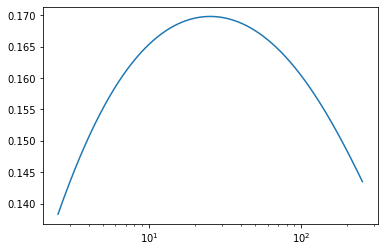

243
-2.816980106246092e-05
[60994.73894832]
1.9895259326677828e-08,0.0001666277892982622,312681.8462728984,441.39011021961073,4.379185727341149,1.9931286648437643,0.11917195409141447,113.72908163056282,2.0244652344925364e-08,2.586049981323667,671.5656013202132,2.2140381130392655,9.568261801865266e-06,0.017612143494793214,1116.8621902350064,49.198507258149,0.2664893838684847,0.47334089800974255,0.0008427914475715063,11.254105016899706,0.2664893838684847,0.47334089800974255,0.0008427914475715063,11.254105016899706,1.0,1.0,1.0,1.0


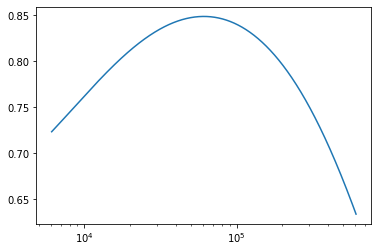

245
-8.621078119718266e-08
[0.0458527]
0.07221422495788758,60.88317264509521,120.29550992953564,0.016547334257495504,0.003997613372134378,7.791386237471481e-07,0.0028658013483143637,8.3800499762844,0.11593463365732785,0.00018205675958697271,82.73210188773767,0.029505375162064456,54.58563353499198,276.13610841395763,8.367510396995849,0.00473347434569717,451.9929488371884,124.77130985894536,439.30222656854284,20636.288502976186,451.9929488371884,124.77130985894536,439.30222656854284,20636.288502976186,1.0,1.0,1.0,1.0


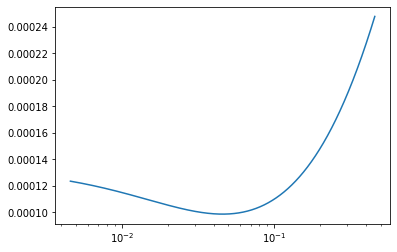

246
-2.360723471150905e-07
[490.22879429]
5.095542015271367e-06,0.001605335340366308,99795.30382323265,7326.210912243209,13.883754464225618,0.00010231949379762919,3.4378367329862316,23.53638699936842,7.70299866706144e-07,0.3735979629026493,202.79191329717406,39.22058280414375,0.000682777720237784,0.7549109599676855,11406.464598865286,298.3998858325012,0.001100883437867841,0.29060064342709874,5.929172504098743e-05,52.818316881325906,0.001100883437867841,0.29060064342709874,5.929172504098743e-05,52.818316881325906,1.0,1.0,1.0,1.0


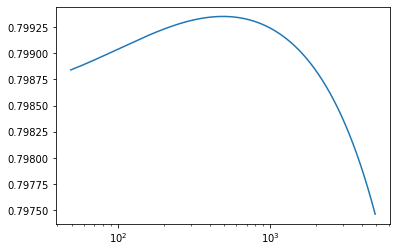

247
-7.3474947355212095e-06
[3225484.77214395]
9.454288048156306e-06,0.005919314410551333,31305915.91909389,12610.728878015818,96.90875563218279,0.0011159145267231156,0.003276869423275968,157.22232808469406,2.4320265012809855e-06,9.606459596579457,200.37273418229108,0.035324269668867626,0.005817444611329566,0.1574279889645378,2657675.7569636987,278.77191008087595,5.729058838518996,0.1968155787616203,0.015013719525759967,4.755131641676494,5.729058838518996,0.1968155787616203,0.015013719525759967,4.755131641676494,1.0,1.0,1.0,1.0


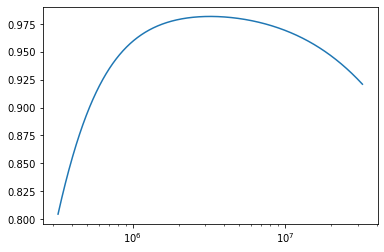

249
-8.725331278158777e-06
[4.14506031e+10]
2.2621183052248586e-06,0.02001989173978006,705311.4317089658,85.69139556783914,384.41195963281075,1.831355276006976e-06,6.508322626392403,41579.798289621365,0.005788984007696936,2.484003860244266,65.72074252236739,34.40942933318048,3.6787867498380414e-05,1.2636290548799791,49376.84917505947,62.59555883060155,16.40421564168693,0.3945911745031278,0.034557824304635755,9.466606351017642,16.40421564168693,0.3945911745031278,0.034557824304635755,9.466606351017642,1.0,1.0,1.0,1.0


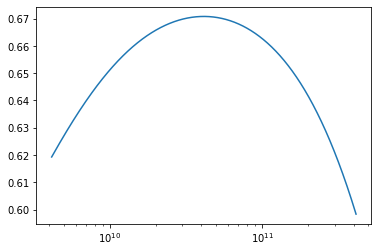

252
-3.937387451055492e-08
[2.39205049e+04 2.72080105e+07]
3.1894558339432073e-09,1.419682155732208e-05,13297596.5991612,194.9896266852974,0.030478067113197553,6.44717827455513e-05,1.174291243329886,6.35584489970085,4.532118578763271e-05,8.985510897266448e-05,477743.6161490517,1.2466983473972961,2.801399081454507e-07,0.0010776555751647664,25951.650572311115,0.3973246149895909,32.50476108617201,0.1226572944514537,0.559235366253564,62.560958532112075,32.50476108617201,0.1226572944514537,0.559235366253564,62.560958532112075,1.0,1.0,1.0,1.0


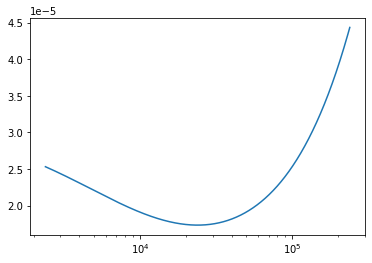

252
-6.14202969704972e-08
[2.39205049e+04 2.72080105e+07]
3.1894558339432073e-09,1.419682155732208e-05,13297596.5991612,194.9896266852974,0.030478067113197553,6.44717827455513e-05,1.174291243329886,6.35584489970085,4.532118578763271e-05,8.985510897266448e-05,477743.6161490517,1.2466983473972961,2.801399081454507e-07,0.0010776555751647664,25951.650572311115,0.3973246149895909,32.50476108617201,0.1226572944514537,0.559235366253564,62.560958532112075,32.50476108617201,0.1226572944514537,0.559235366253564,62.560958532112075,1.0,1.0,1.0,1.0


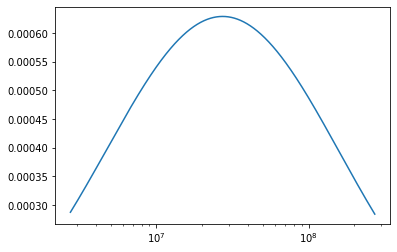

255
-8.223203229462683e-08
[17094.84538828]
1.9438792951941497e-05,0.02843116762413897,9.015524759833554,0.07546394295280802,0.08577172111565287,0.0001759987741943237,0.0015516227973682165,82.54508862053493,0.00230018769916055,0.06574077972478486,612.2855360290897,0.006856936055947307,0.003790868353969801,0.6076018760250387,2.5858797436923484,0.02178774593735236,46.760559107805264,0.03560862110668682,1.9487004054762487,0.10559097909926418,46.760559107805264,0.03560862110668682,1.9487004054762487,0.10559097909926418,1.0,1.0,1.0,1.0


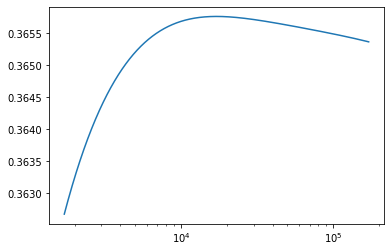

256
-3.8762078449217086e-06
[456.70887816]
2.755844317693631e-09,3.243252372587025e-05,16992.271340110317,4.734180041289011,0.016574450022702875,0.01220989554550268,0.0032022742247821458,1.2229448287622506,6.56959991698236e-06,0.010015943616696417,1116.6137170914044,0.13760848172765883,5.547555362676586e-07,0.0018823605385608097,1234.0027061616447,3.286428874291293,0.0014320331227023438,0.26159139956835975,0.00012037063196028877,9.708420528486814,0.0014320331227023438,0.26159139956835975,0.00012037063196028877,9.708420528486814,1.0,1.0,1.0,1.0


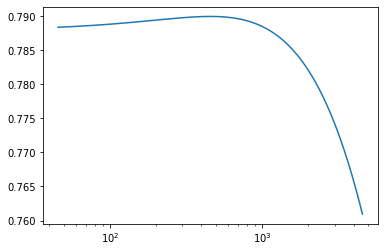

257
-1.54414334205856e-05
[2.26185891e-01 2.42189417e+05]
2.0285932039687338,12.16236437976669,374184.10592698114,386.902673754516,6.146288906308693,0.007874406881017062,28.428602277512866,0.8381200287431345,0.0015124100427532955,0.8442984805539063,2.7222731606746793,40.741898786212715,5.3169818583262085,379.27901502936544,12983.429382958964,69.17305310607117,35.824722694493346,0.0069735791532232975,1.1291564710136175,3.094770252681846,35.824722694493346,0.0069735791532232975,1.1291564710136175,3.094770252681846,1.0,1.0,1.0,1.0


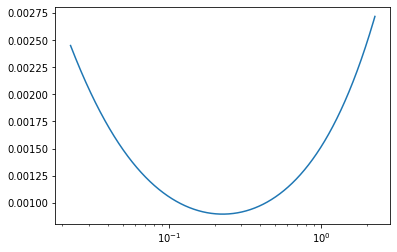

257
-6.8749151141689335e-06
[2.26185891e-01 2.42189417e+05]
2.0285932039687338,12.16236437976669,374184.10592698114,386.902673754516,6.146288906308693,0.007874406881017062,28.428602277512866,0.8381200287431345,0.0015124100427532955,0.8442984805539063,2.7222731606746793,40.741898786212715,5.3169818583262085,379.27901502936544,12983.429382958964,69.17305310607117,35.824722694493346,0.0069735791532232975,1.1291564710136175,3.094770252681846,35.824722694493346,0.0069735791532232975,1.1291564710136175,3.094770252681846,1.0,1.0,1.0,1.0


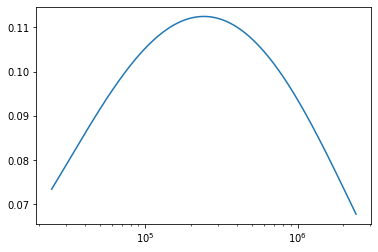

259
-2.2976119223340474e-09
[438.62497665]
0.00019712190757827837,0.9810137574478421,790.8592997302534,0.2631628998578812,0.03951964802848899,8.997432029853934e-05,178.87739595425785,1666.4428830787006,0.00011619160408934722,8.857583711702033e-05,70596.3264655292,4771.355298855169,0.006571330429428696,13.845844442087353,113.01173860422442,0.004027852718182909,17.831208634723822,151.2890615295694,0.08042727810566427,56289.82407423572,17.831208634723822,151.2890615295694,0.08042727810566427,56289.82407423572,1.0,1.0,1.0,1.0


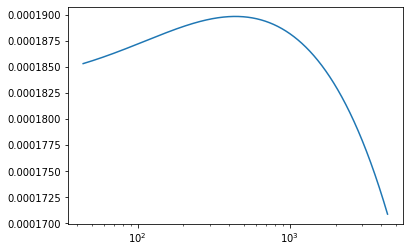

260
-1.461393177250047e-10
[45158.75248068]
3.099846684089243e-06,0.0014377595922531927,7535.8730470207565,6.9128161996714725,0.03597543877161534,1.7920863513371495e-07,47.73962293718088,23853.44158673519,1.5074013046410958e-07,0.02221958453630196,11277.14323467414,22091.473468484637,0.00012949384520492542,0.003799009958063946,197.85415146016646,0.020205800355119312,6.681489865521586,0.01052768324084258,0.009217194919297475,0.02958324472020266,6.681489865521586,0.01052768324084258,0.009217194919297475,0.02958324472020266,1.0,1.0,1.0,1.0


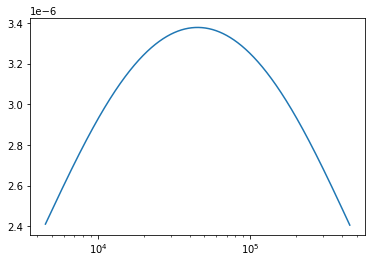

263
-3.6293752786117905e-09
[680013.14259119]
3.910077645262086e-05,0.28163820889377433,2402562.344144025,557.3323548572878,2.532834762966795,0.00037372224910855984,1.347769256196203,274506.7929569563,0.01986112502874824,2.3196407446347167,20948.997413636025,488.03506431772246,0.03452948714229151,2.752344014240521,481123.6351271216,35.252809485079055,317.293041233676,0.017427137756524172,205.02468077969112,4.87435087741787,317.293041233676,0.017427137756524172,205.02468077969112,4.87435087741787,1.0,1.0,1.0,1.0


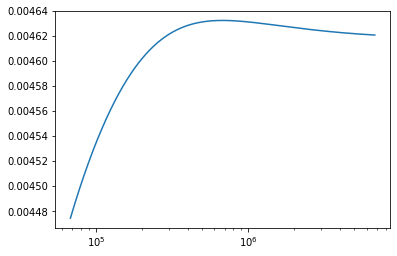

264
-3.406127185093255e-07
[3.59022454e+00 3.52651490e+02 3.78417787e+05]
0.014970892288352047,16.549697283454236,45676.02092017396,2.0044595892901103,2.7293363695733732,0.006383655113332979,0.0018202888444851508,210264.0571380547,0.00036110837811834985,0.01018998825705048,490081.45419639774,0.34071500613980565,0.5656882397695785,45.582233450897334,338.6466837532916,0.06688232798417008,5.246941516974488,0.00404023097627734,0.19243536019741803,0.07862984452126374,5.246941516974488,0.00404023097627734,0.19243536019741803,0.07862984452126374,1.0,1.0,1.0,1.0


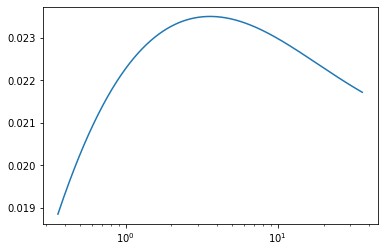

264
-8.854239763541466e-06
[3.59022454e+00 3.52651490e+02 3.78417787e+05]
0.014970892288352047,16.549697283454236,45676.02092017396,2.0044595892901103,2.7293363695733732,0.006383655113332979,0.0018202888444851508,210264.0571380547,0.00036110837811834985,0.01018998825705048,490081.45419639774,0.34071500613980565,0.5656882397695785,45.582233450897334,338.6466837532916,0.06688232798417008,5.246941516974488,0.00404023097627734,0.19243536019741803,0.07862984452126374,5.246941516974488,0.00404023097627734,0.19243536019741803,0.07862984452126374,1.0,1.0,1.0,1.0


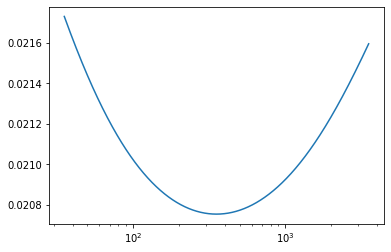

264
-3.6768854905222526e-08
[3.59022454e+00 3.52651490e+02 3.78417787e+05]
0.014970892288352047,16.549697283454236,45676.02092017396,2.0044595892901103,2.7293363695733732,0.006383655113332979,0.0018202888444851508,210264.0571380547,0.00036110837811834985,0.01018998825705048,490081.45419639774,0.34071500613980565,0.5656882397695785,45.582233450897334,338.6466837532916,0.06688232798417008,5.246941516974488,0.00404023097627734,0.19243536019741803,0.07862984452126374,5.246941516974488,0.00404023097627734,0.19243536019741803,0.07862984452126374,1.0,1.0,1.0,1.0


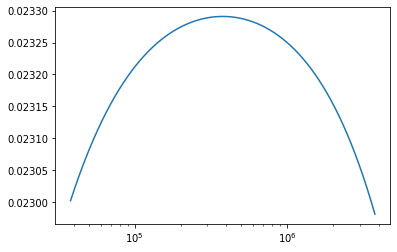

267
-6.190432104634077e-06
[6.95669586e+05 6.16752421e+12]
2.3367835685034376e-07,1.3694141341505621e-05,46723821.823631965,2444.919963730536,7.856882744745758,0.0003270099624551817,383.0716742635238,70.2555765218442,4.400347181633507e-08,0.13198329836238035,0.2410912887065702,20416.79284592116,4.546364616362153e-06,0.011475780176682533,109592.84884938474,4.811839481930647,808.5741066886015,79.0267304946642,179.1845811309639,19980.115383753106,808.5741066886015,79.0267304946642,179.1845811309639,19980.115383753106,1.0,1.0,1.0,1.0


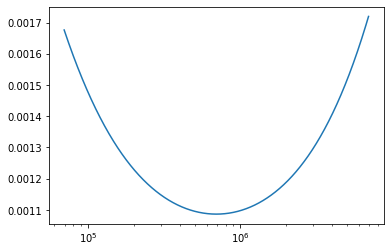

267
-1.5826527306334048e-06
[6.95669586e+05 6.16752421e+12]
2.3367835685034376e-07,1.3694141341505621e-05,46723821.823631965,2444.919963730536,7.856882744745758,0.0003270099624551817,383.0716742635238,70.2555765218442,4.400347181633507e-08,0.13198329836238035,0.2410912887065702,20416.79284592116,4.546364616362153e-06,0.011475780176682533,109592.84884938474,4.811839481930647,808.5741066886015,79.0267304946642,179.1845811309639,19980.115383753106,808.5741066886015,79.0267304946642,179.1845811309639,19980.115383753106,1.0,1.0,1.0,1.0


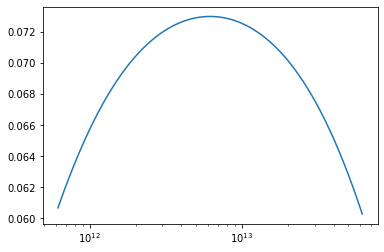

268
-5.134208011181585e-06
[35799808.19033353]
5.8810939917471837e-08,0.00019946217488860243,17697.329632226916,15.800350453165743,741.8873731401775,0.006487371933728368,0.013433214618583447,987997.863507589,0.0001316208694453879,2.008157845817821,949.6687370848367,0.06165639246668202,5.659668490534305e-07,0.007831951702523232,2562.3959732635985,14.836539694586833,6.610665733134801,8.973334901668437,0.03511953435603488,200.73578916109355,6.610665733134801,8.973334901668437,0.03511953435603488,200.73578916109355,1.0,1.0,1.0,1.0


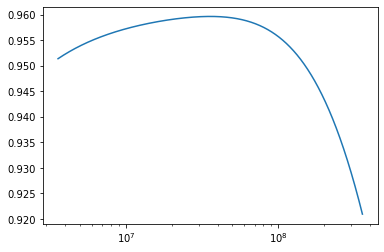

269
-1.7782243806989395e-06
[ 2589.77509168 27853.38313521]
9.439261724235874e-08,5.017577668173578e-05,53441.446108226904,2.311834612951064,0.8098510082349315,0.13126208101392933,80.8920837942746,0.573541695338156,3.074276206617838e-05,0.38841217911418985,50819010.57061908,2009.517297272737,7.130810657827056e-06,0.03547395606648089,150.44307379207513,0.006232640798612647,0.0024954272812465527,0.12045891673548142,3.265116572236896e-05,1.2682094102818453,0.0024954272812465527,0.12045891673548142,3.265116572236896e-05,1.2682094102818453,1.0,1.0,1.0,1.0


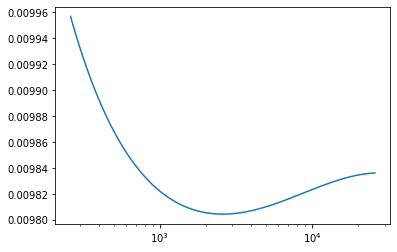

269
-2.2297268462145858e-08
[ 2589.77509168 27853.38313521]
9.439261724235874e-08,5.017577668173578e-05,53441.446108226904,2.311834612951064,0.8098510082349315,0.13126208101392933,80.8920837942746,0.573541695338156,3.074276206617838e-05,0.38841217911418985,50819010.57061908,2009.517297272737,7.130810657827056e-06,0.03547395606648089,150.44307379207513,0.006232640798612647,0.0024954272812465527,0.12045891673548142,3.265116572236896e-05,1.2682094102818453,0.0024954272812465527,0.12045891673548142,3.265116572236896e-05,1.2682094102818453,1.0,1.0,1.0,1.0


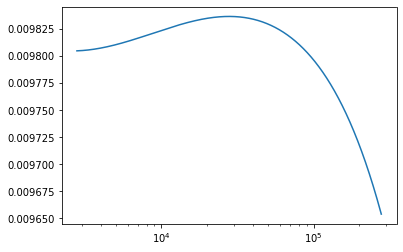

270
-2.938687968538818e-10
[  1139.70128315 183490.19427773]
1.0355437042384846e-05,0.07773329887863674,41650.71751112056,587.7600914114898,0.0019451272425320566,0.17927844140356858,263.4214701575557,34655.600944387545,0.07245975035724482,2.5228369964996874e-06,7.3859161678475616,2372.0084185218034,0.0002738164588714485,14.613347074660249,7642.472693705134,70.88867786097747,0.006578622858661802,0.009508285426059138,0.0010763937965688937,0.3012061325486247,0.006578622858661802,0.009508285426059138,0.0010763937965688937,0.3012061325486247,1.0,1.0,1.0,1.0


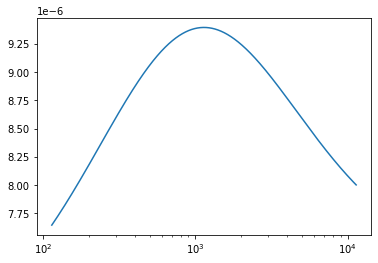

270
-4.328105434222012e-09
[  1139.70128315 183490.19427773]
1.0355437042384846e-05,0.07773329887863674,41650.71751112056,587.7600914114898,0.0019451272425320566,0.17927844140356858,263.4214701575557,34655.600944387545,0.07245975035724482,2.5228369964996874e-06,7.3859161678475616,2372.0084185218034,0.0002738164588714485,14.613347074660249,7642.472693705134,70.88867786097747,0.006578622858661802,0.009508285426059138,0.0010763937965688937,0.3012061325486247,0.006578622858661802,0.009508285426059138,0.0010763937965688937,0.3012061325486247,1.0,1.0,1.0,1.0


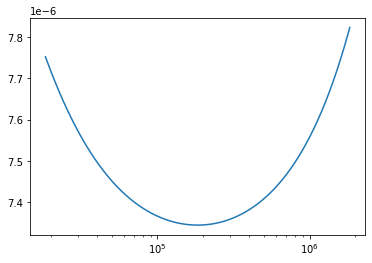

272
-2.17487614402323e-05
[883636.24071795]
2.907626365964801e-05,0.014763754164935878,368050.94272328145,1319.346296769548,424.0213832629651,4.199582081487649e-05,0.06855793591740232,458.51522372596105,1.4820285919056806e-10,36.444845196241545,30444474.750905883,8.46356096625065,0.00011012540581655422,0.03064243062719052,94198.74530884295,186.82040852591368,0.6195820837149707,0.011013551683775215,0.04033721813123727,0.2808857255739846,0.6195820837149707,0.011013551683775215,0.04033721813123727,0.2808857255739846,1.0,1.0,1.0,1.0


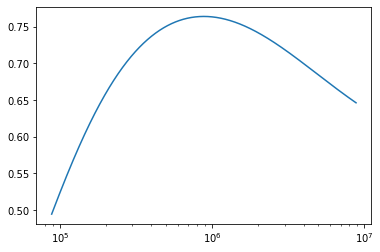

274
-8.120869176273839e-08
[1.47457743e+03 5.40575784e+06]
5.785779053473805e-06,0.03759454651832908,7616.542878834743,9.55884582756719,0.009034616340465143,1.0482456702124419e-08,0.003681797640993897,0.057408719532628695,1.5059919460467437,7.834337573391569e-05,450.8308581661451,0.06561855073909154,0.004754817239792928,0.04954187624919583,5587.426698913088,4.022559469643863,1.5148799448905845,0.0014328460412640679,0.5554484150406016,0.010879971231871675,1.5148799448905845,0.0014328460412640679,0.5554484150406016,0.010879971231871675,1.0,1.0,1.0,1.0


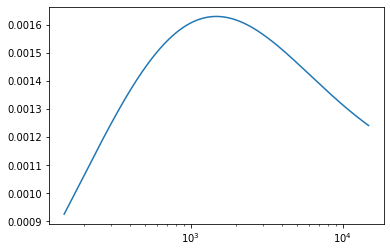

274
-7.489905723932766e-08
[1.47457743e+03 5.40575784e+06]
5.785779053473805e-06,0.03759454651832908,7616.542878834743,9.55884582756719,0.009034616340465143,1.0482456702124419e-08,0.003681797640993897,0.057408719532628695,1.5059919460467437,7.834337573391569e-05,450.8308581661451,0.06561855073909154,0.004754817239792928,0.04954187624919583,5587.426698913088,4.022559469643863,1.5148799448905845,0.0014328460412640679,0.5554484150406016,0.010879971231871675,1.5148799448905845,0.0014328460412640679,0.5554484150406016,0.010879971231871675,1.0,1.0,1.0,1.0


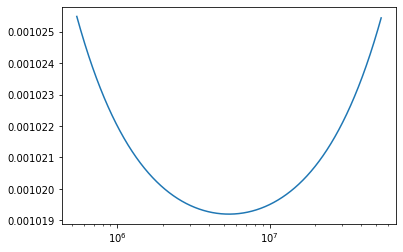

275
-7.052088505377085e-07
[383.25373529  -3.        ]
9.453564783203729e-07,0.0005692075811781999,3092098947.4072104,10411.44657333937,855.3587805700589,7.780220031663588e-07,375.99570327478517,7.156119483645035,1.322940551427496e-10,77.22869356966999,0.8884513796908254,112340.52869666125,3.046889012024875e-06,0.4206606396689281,4583151.003934441,34.34326178692635,0.004149488314703709,0.02495428547267238,1.1908702553179681e-05,0.22127073042248852,0.004149488314703709,0.02495428547267238,1.1908702553179681e-05,0.22127073042248852,1.0,1.0,1.0,1.0


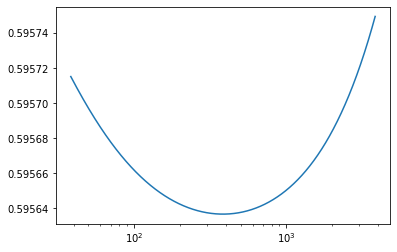

275
-6586.888813532784
[383.25373529  -3.        ]
9.453564783203729e-07,0.0005692075811781999,3092098947.4072104,10411.44657333937,855.3587805700589,7.780220031663588e-07,375.99570327478517,7.156119483645035,1.322940551427496e-10,77.22869356966999,0.8884513796908254,112340.52869666125,3.046889012024875e-06,0.4206606396689281,4583151.003934441,34.34326178692635,0.004149488314703709,0.02495428547267238,1.1908702553179681e-05,0.22127073042248852,0.004149488314703709,0.02495428547267238,1.1908702553179681e-05,0.22127073042248852,1.0,1.0,1.0,1.0


<ipython-input-13-be2389c9b184>:80: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale("log")


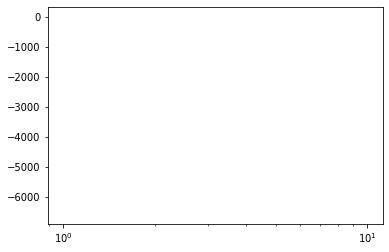

276
-5.380967877122178e-09
[113308.7319207]
0.0313976602440651,198.16302085807246,2239830.0087511363,24009.233134466474,0.022931085622997782,0.48644651891298296,0.0011869712524365506,22383585.789007314,2.5056708298451986e-08,0.0020507618829598263,754.2667688197785,0.6370847479822392,0.2454298642318959,606.2791630915714,53595.95498668658,730.2836555918881,844.2644130170463,176.23906408631916,5.4214405273602,2468.862459176853,844.2644130170463,176.23906408631916,5.4214405273602,2468.862459176853,1.0,1.0,1.0,1.0


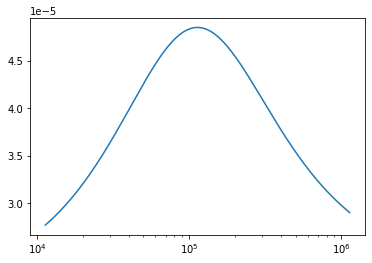

278
-2.8475213785378317e-06
[1.01136161e+10]
1.2808318271901655e-05,0.003519314155389963,813771.7279019415,12797.475708301828,1.3052730433602637,1.9775435123297642e-05,26.844855829496883,21272.024146583324,3.103114293941822e-08,0.6140971383241043,8.85729486335715,21671.46865273823,6.93450215984336e-05,0.014960170397472747,79440.73670674436,277.5678599036419,4.446767692490916,0.035896906539741064,3.360313231967505,5.455916708592411,4.446767692490916,0.035896906539741064,3.360313231967505,5.455916708592411,1.0,1.0,1.0,1.0


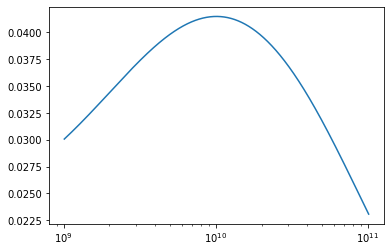

279
-4.477756391674248e-06
[1442.97997199]
0.00010403925946177944,1.3292270193983702,20745.955593714527,94.94502742279258,101.93755171883979,0.001637512257285511,25.98303055184305,6510250.086766015,4.404813050639987e-06,1.4550433301710797,4758240.732909291,78.62147815188533,0.003299962615625857,3.271336774967402,354.6787667564527,0.9096439340406134,0.050220451024500866,0.0014241306434206527,0.0005469618532039026,0.013878372949086453,0.050220451024500866,0.0014241306434206527,0.0005469618532039026,0.013878372949086453,1.0,1.0,1.0,1.0


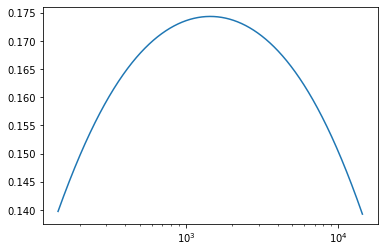

280
-1.0269698830556173e-05
[1020.28168666]
3.2877203696935734e-06,0.00033705066179986624,7483.607188817957,0.06798870077989352,0.9199911116881383,0.4448163834084906,0.06669961892852544,7312.468379314486,5.2630333283208985e-06,0.001591394253076958,1727276073.708657,55.7783516839873,1.5553791737718116e-05,0.006302848866251187,28.63389854129995,0.0292170129490269,0.030148652721449048,0.4512358312003706,0.012801536056387784,16.747202847211856,0.030148652721449048,0.4512358312003706,0.012801536056387784,16.747202847211856,1.0,1.0,1.0,1.0


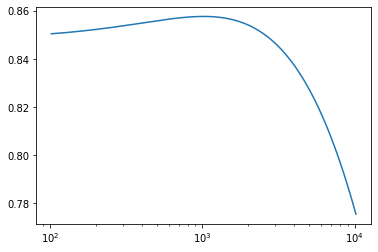

281
-1.1109118661924936e-08
[6.93678218e+04 1.11514731e+11]
3.8971282760354085e-09,0.0026336935411153104,26.537914765004093,0.025164583187658313,0.005467438253269823,5.5004166806205374e-05,0.060167641904029436,1564.1937151122204,0.010739435774725081,1.2359896015654784e-05,169366.10298114148,0.353270896212676,3.2641780067876357e-06,0.5328905123648533,5.210979103366312,0.00336803082877339,7.903933906670187,2.9473241986858,0.039366514574831875,1531.9041334642056,7.903933906670187,2.9473241986858,0.039366514574831875,1531.9041334642056,1.0,1.0,1.0,1.0


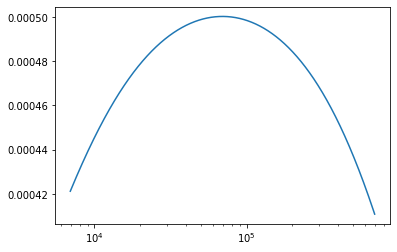

281
-7.232685665600281e-10
[6.93678218e+04 1.11514731e+11]
3.8971282760354085e-09,0.0026336935411153104,26.537914765004093,0.025164583187658313,0.005467438253269823,5.5004166806205374e-05,0.060167641904029436,1564.1937151122204,0.010739435774725081,1.2359896015654784e-05,169366.10298114148,0.353270896212676,3.2641780067876357e-06,0.5328905123648533,5.210979103366312,0.00336803082877339,7.903933906670187,2.9473241986858,0.039366514574831875,1531.9041334642056,7.903933906670187,2.9473241986858,0.039366514574831875,1531.9041334642056,1.0,1.0,1.0,1.0


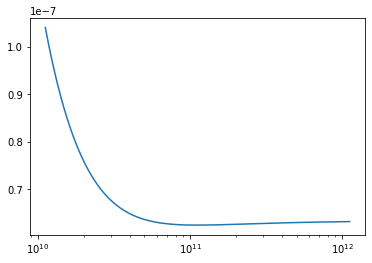

283
-7.71573911373391e-06
[2119.15885867]
1.164934450531967e-05,1.4950317939308382,114951.65541667202,9.475596158403798,6.9975078208640475,3.7931725877263305e-06,0.010744536648798363,12.631878709577817,8.083005989910069e-10,3.4165163229082287,8.466249248885541,0.9182750200130491,0.008319299419981012,3.841410812310038,1899.5226020428304,0.09114637998537538,58.20828525595852,391.6079268581707,1.2930891487013259,20929.353988938878,58.20828525595852,391.6079268581707,1.2930891487013259,20929.353988938878,1.0,1.0,1.0,1.0


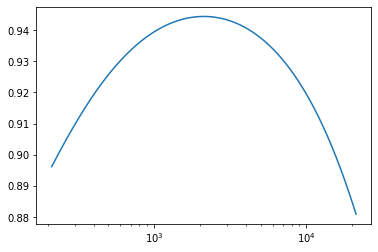

284
-1.7620099425514423e-09
[1.87869525e+00 4.58052628e+03]
0.002365954933806977,2.454074252317674,59.92171919540767,1.009003858674255,0.0013822739260818703,0.003741854271892446,186.58066357414512,4.4020568296042955,1.1617696561554048e-06,7.244056360036659e-05,52.94031075919912,729.3662930448147,0.1390753625181736,118.92298829694036,1.5023429686484195,0.004183495177570962,0.006157145985479556,3.2597301797354006,1.0279148525866366e-05,3.271136264744886,0.006157145985479556,3.2597301797354006,1.0279148525866366e-05,3.271136264744886,1.0,1.0,1.0,1.0


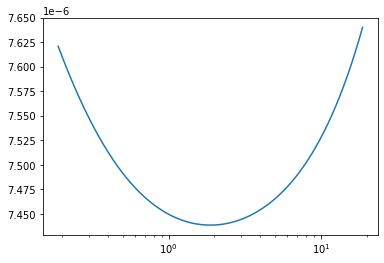

284
-1.5518536948404586e-09
[1.87869525e+00 4.58052628e+03]
0.002365954933806977,2.454074252317674,59.92171919540767,1.009003858674255,0.0013822739260818703,0.003741854271892446,186.58066357414512,4.4020568296042955,1.1617696561554048e-06,7.244056360036659e-05,52.94031075919912,729.3662930448147,0.1390753625181736,118.92298829694036,1.5023429686484195,0.004183495177570962,0.006157145985479556,3.2597301797354006,1.0279148525866366e-05,3.271136264744886,0.006157145985479556,3.2597301797354006,1.0279148525866366e-05,3.271136264744886,1.0,1.0,1.0,1.0


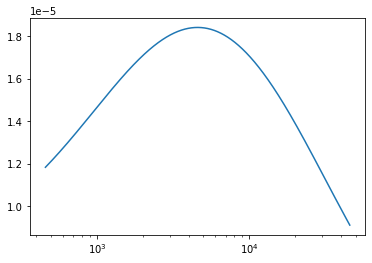

285
-9.078446740612423e-07
[3079.32162619]
1.4659947635629194e-06,0.01765397781758865,3.538453173175965,0.01891750777581661,4.596695706153237,6.47903422920768e-07,2.401768974520288,4575.295887625958,1.5626433983311018e-05,0.07396551265473637,8.207856375384363,131.34559713500923,0.00027193191900166063,0.032689882123314494,0.6005725376053721,0.0021846633180024272,3.196694419362522,0.011952379725182824,0.03830310905174805,1.4656280348805657,3.196694419362522,0.011952379725182824,0.03830310905174805,1.4656280348805657,1.0,1.0,1.0,1.0


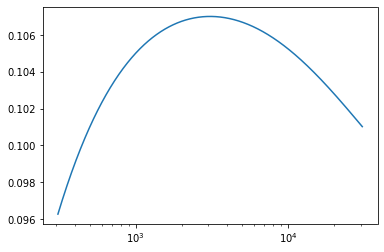

286
-1.856036670010294e-08
[111169.57969493]
2.918926052041284e-07,0.0006831065719584896,19.407793997897564,0.0275901617473714,0.3091234018071119,0.001489908013549321,0.06689396650360138,193.39162677513897,7.027548268460112e-10,0.011726200190870997,27303.54246208628,38.94330166004632,0.0002612130787292567,0.007415553986667231,18.22703581048251,0.0251919766503734,153.85160667032275,0.25049522230463084,48.6231903683731,92.23953173329646,153.85160667032275,0.25049522230463084,48.6231903683731,92.23953173329646,1.0,1.0,1.0,1.0


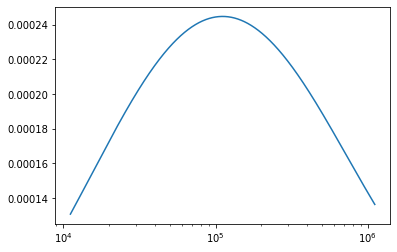

287
-5.237884476150256e-07
[72284962.92639627]
1.2794038106974063e-09,4.1237484308073664e-05,1821677.8667929661,23.15220644572573,180.7015945978329,0.0022381854484984716,42.39984554964929,845.2533259756565,2.7067657035593457e-05,47.3120736616808,409.4173771375195,94.78972249418177,5.482700043730368e-08,0.00736056897054894,7540.6270599818135,18.387332153820882,0.021306617160605397,0.0012843373307394239,2.4850942429472753e-05,0.13066418266249472,0.021306617160605397,0.0012843373307394239,2.4850942429472753e-05,0.13066418266249472,1.0,1.0,1.0,1.0


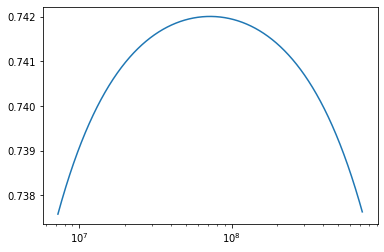

288
-2.604500740976956e-05
[13042.07676165]
1.1365552488600017e-05,0.12211783001610388,4837492.612555054,1175.7083412170564,75.02189572165439,32.94631838982653,0.0013547919117905213,635.8664673834825,5.345588612106155e-05,40.29233458350242,6801.327902469695,0.1648871865955501,0.008979976264218113,2.0874591623534133,236307.87102625353,19.507193927170583,110.93055919849593,10.914027661850021,12.393779317334523,828.1091129816218,110.93055919849593,10.914027661850021,12.393779317334523,828.1091129816218,1.0,1.0,1.0,1.0


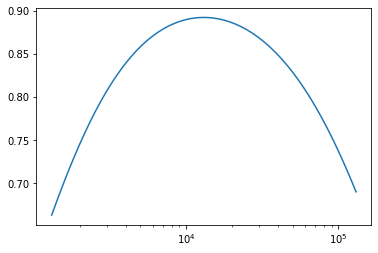

289
-6.020008630167604e-09
[4909.76703055]
0.01021702826502178,6.8826018561052225,3215.6824767731796,25.88162472193324,0.01166579192651874,0.08693155717563165,19.85922709664356,11.575306890667374,13.912248622820345,0.00010675903977318442,18722.84387834467,1485.8869600935984,2.3671432468740585,23.05627485443016,67.30799476438602,1.385263885859761,213.0307796314405,0.5441790035659717,26.67290581327094,0.995189182371504,213.0307796314405,0.5441790035659717,26.67290581327094,0.995189182371504,1.0,1.0,1.0,1.0


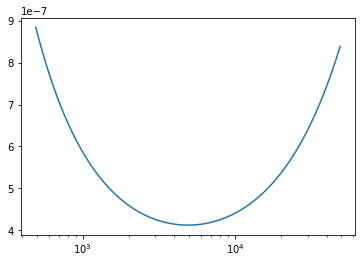

290
-2.5368933064262578e-06
[192351.28791466]
1.1743614468519371e-07,0.00017943186321389302,333.39423137630536,2.121024611420384,28.754262174534766,2.8875483237889517e-05,0.0014160225373670318,30939.115007408196,0.0006117549442447403,15.319638652401819,24.045164798997018,0.05550019470341404,7.341758359295813e-07,0.04369940277289685,2.1565464743913143,0.03756348952635602,0.08968127663513625,0.0030808805286179786,0.04342338523786942,0.15725794891557107,0.08968127663513625,0.0030808805286179786,0.04342338523786942,0.15725794891557107,1.0,1.0,1.0,1.0


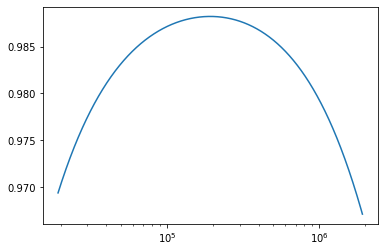

291
-9.993561960186526e-07
[669618.43832585]
1.0655307587226419e-07,0.00011126685540512618,115872248.0087847,10865.34647768711,8.011638748837903,3.9583474124729126,0.311951367381949,4.330226218206416,1.7458444312021313e-07,0.2858564694292108,85707.6609097362,3.4850152971341473,1.1640352107130252e-06,0.003889710196054164,9413298.08870684,11.122225860038577,35.417622282693934,0.16738040648044825,5.427275846896502,13.132893801594323,35.417622282693934,0.16738040648044825,5.427275846896502,13.132893801594323,1.0,1.0,1.0,1.0


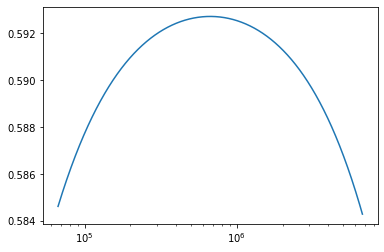

294
-1.2428716938461815e-05
[409.37686547]
0.00010319914792605031,0.06995568117217546,20.97050620908185,2.2173886398009963,5.104886550296293,3.0234956696509605,0.0025240427896405806,2355.453500361005,0.0014257677688934761,0.042710102153253486,37695.51575560421,0.05380191850467194,0.0077382092806035935,10.189483568047907,6.381192195487388,0.006575614864065201,12.262045281116166,0.3417047724370419,0.09594086393966483,112.28326697366111,12.262045281116166,0.3417047724370419,0.09594086393966483,112.28326697366111,1.0,1.0,1.0,1.0


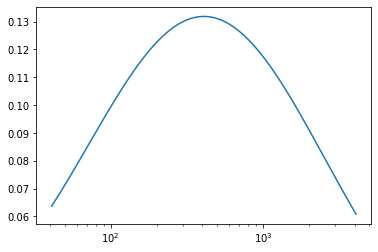

295
-0.0014947762858953384
[ 22.92456709 333.8623222 ]
7.797138894386572e-05,0.11921277979520621,17207.782978222567,33.3517360775564,24.406244868073706,0.014400401879968919,0.6614924574446768,0.10265773546348471,1.0364675582674356,0.04646383258498092,92826.61881902751,0.7466100320152236,0.021329011708912944,5.406547505694849,992.4677918195451,0.0975937806538313,20.75955632399595,6.251587324017709,0.16871874704707746,204.81622036735695,20.75955632399595,6.251587324017709,0.16871874704707746,204.81622036735695,1.0,1.0,1.0,1.0


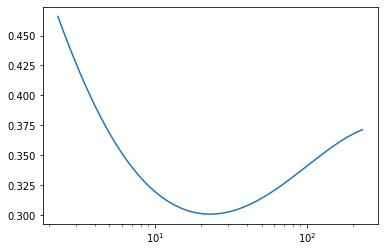

295
-2.7254066466919635e-05
[ 22.92456709 333.8623222 ]
7.797138894386572e-05,0.11921277979520621,17207.782978222567,33.3517360775564,24.406244868073706,0.014400401879968919,0.6614924574446768,0.10265773546348471,1.0364675582674356,0.04646383258498092,92826.61881902751,0.7466100320152236,0.021329011708912944,5.406547505694849,992.4677918195451,0.0975937806538313,20.75955632399595,6.251587324017709,0.16871874704707746,204.81622036735695,20.75955632399595,6.251587324017709,0.16871874704707746,204.81622036735695,1.0,1.0,1.0,1.0


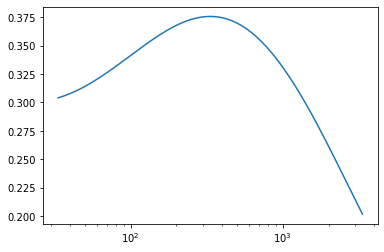

296
-2.521348476669516e-07
[25023226.91037583]
1.049017708028683e-05,0.023416703963441407,4472107.674416479,1240.5539656729484,312.7814239344445,0.007106729052343638,0.005557199493405317,24.206700365756404,0.0004594657882379296,0.8319312835857247,10.236566219391786,0.00639027805093299,0.0005979873312201871,0.06730181524767771,152777.22941071907,21.952511941346565,1.7347044431708858,0.001041459669024497,0.6804204306657649,0.07694907745902578,1.7347044431708858,0.001041459669024497,0.6804204306657649,0.07694907745902578,1.0,1.0,1.0,1.0


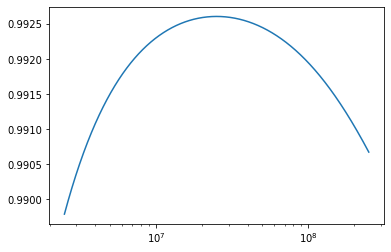

298
-1.7040615130081704e-07
[11008.7905286]
0.0009337238988893894,0.03281970163139285,36824.21698112332,1104.9331825152158,17.440357571437566,7.083396118326455e-07,0.02145529545799418,0.20271373214427124,0.00011115823290424086,4.714506477392908,5.042329178850179,0.17819642633715294,0.0014551507385478024,13.371961423377464,26196.233767516704,2.678816750016662,0.004120283387095333,0.037213714594176744,0.003993750606863109,1.839380626288137,0.004120283387095333,0.037213714594176744,0.003993750606863109,1.839380626288137,1.0,1.0,1.0,1.0


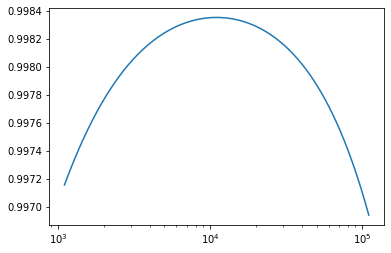

299
-8.055124718148654e-08
[1.23691201e+07 6.94423359e+10]
7.9289743522329e-07,0.0004468530784621914,6066.177698739218,7.139326775015366,1.4186315379080443,1.6198286101596417,593.8491134184263,1.6061800332793188,2.446241460070815e-07,1.086233323872828,17.63982802587024,2680.973318047991,5.435196427481717e-06,0.06270901355677216,1930.3960143644404,0.3379834675781017,734.4338128562441,11.042468641181626,5.463441465845349,13.15992092646491,734.4338128562441,11.042468641181626,5.463441465845349,13.15992092646491,1.0,1.0,1.0,1.0


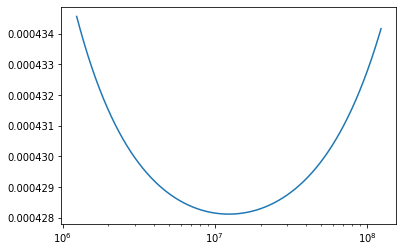

299
-9.552826251237913e-08
[1.23691201e+07 6.94423359e+10]
7.9289743522329e-07,0.0004468530784621914,6066.177698739218,7.139326775015366,1.4186315379080443,1.6198286101596417,593.8491134184263,1.6061800332793188,2.446241460070815e-07,1.086233323872828,17.63982802587024,2680.973318047991,5.435196427481717e-06,0.06270901355677216,1930.3960143644404,0.3379834675781017,734.4338128562441,11.042468641181626,5.463441465845349,13.15992092646491,734.4338128562441,11.042468641181626,5.463441465845349,13.15992092646491,1.0,1.0,1.0,1.0


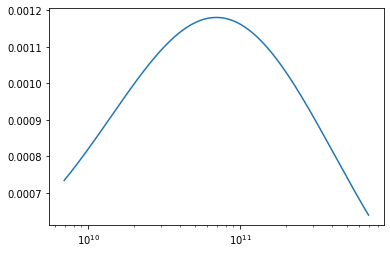

In [13]:
#TF binds more in open and exhibits positive coopreativity
#pol binds less in the open and exhibits negative cooperativity
for seed in range(300):
    
    np.random.seed(seed)
    
    v1,v2,v3,v4,kopen0,kclose0,q3=10**np.random.uniform(-3,3,size=7)
    f1,f2,f3,f4,f5,f6,f7,f8,f9=10**np.random.uniform(0,3,size=9)
    d1,d2,d3,d4,d5,d6,d7,d8,d9,dq4,dq7,dq8=10**np.random.uniform(-3,0,size=12)
    q3=1
    q4=1
    q7=1
    q8=1
    #q4=dq4*q3
    #q7=dq7*q4
    #q8=dq8*q7

    ax_P_1=v1  #max TF binding in open conformation when Pol is bound
    bx_xP_1=v2
    
    ax_0_1=d1*ax_P_1
    bx_x_1=f1*bx_xP_1
    
    ax_P_0=d2*ax_0_1 #less TF binding in closed conformation 
    bx_xP_0=f2*bx_x_1
    
    ax_0_0=d3*ax_P_0 #even less TF binding when nothing is bound
    bx_x_0=f3*bx_xP_0

    aP_0_0=v3 #max Pol binding in closed with no TF 
    bP_P_0=v4
    aP_x_0=aP_0_1*d4 #negative cooperativity
    bP_xP_0=bP_P_1*f4

    aP_0_1=d5*aP_x_1
    bP_P_1=f5*bP_xP_1
    aP_x_1=d6*aP_0_0
    bP_xP_1=f6*bP_P_0


    kopenx=d7*kopen0 
    kclosex=f7*kclose0
    kopenP=kopen0
    kcloseP=kclose0
    kopenxP=kopenx
    kclosexP=kclosex

    parset=np.array([ax_0_0,ax_0_1,bx_x_0,bx_x_1,aP_0_0,aP_0_1,bP_P_0,bP_P_1,aP_x_0,aP_x_1,bP_xP_0,bP_xP_1,ax_P_0,ax_P_1,bx_xP_0,bx_xP_1,kopen0,kclose0,kopenx,kclosex,kopenP,kcloseP,kopenxP,kclosexP])
    if True: #do not check since in this way we are sure the problem is not a small rangenp.all(parset>1e-3) and np.all(parset<1e3):
        qs=[q3,q4,q7,q8]
        pars=np.concatenate((parset,qs))


        instance.fill_num_den(pars,othervars)
        monotonic=instance.interfacemonotonic()
        if np.any((monotonic != -2)&(monotonic!=-1)):
            for x in monotonic:
                xvals=np.linspace(0.1*x,10*x,10000)

                #xval=0
                #expr0=twoconf_x_P.interface_GRF_xP_x(pars,xval)
                #acc0=np.sum(Ps[4:])

                values=np.zeros_like(xvals)

                for x_,xval in enumerate(xvals):
                    expr=instance.interfaceGRF(xval) #doesn't matter if using the multiprecision version or not, it is the same

                    values[x_]=expr #/expr0
                if np.any(np.diff(values)>1e-15): #when plotting, I see that all of them lead to flat responses
                    print(seed)
                    print(np.min(np.diff(values)))
                    print(monotonic)
                    print(",".join(map(str,pars)))

                    #print(q4,q3,q8,q7)
                    #print(",".join(list(map(str,parset))))
                    sys.stdout.flush()
                    plt.plot(xvals,values)
                    plt.xscale("log")
                    plt.show()
                

# Monotonicity conditions

## Monotonic up: TF and polymerase binding are always greater in the open conformation than in the closed.


In [8]:
#first try locally, these parameter sets are not really uniformly sampled, but this is a good enough way to check if any non-monotonics arise.
#xvals=np.logspace(-6,6,1000)
for seed in range(10**6):
    if seed%(10**4)==0:
        print(seed,end=",")
    np.random.seed(seed)
    
    v1,v2,v3,v4,kopen0,kclose0=10**np.random.uniform(-3,3,size=6)
    f1,f2,f3,f4,f5,f6,f7,f8,f9=10**np.random.uniform(0,3,size=9)
    d1,d2,d3,d4,d5,d6,d7,d8,d9=10**np.random.uniform(-3,0,size=9)
    q3,q4,q7,q8=[1,1,1,1]


    ax_0_0=v1
    bx_x_0=v2
    ax_P_0=f1*ax_0_0
    bx_xP_0=d1*bx_x_0

    aP_0_0=v3
    bP_P_0=v4
    aP_x_0=f2*aP_0_0
    bP_xP_0=d2*bP_P_0


    ax_0_1=f3*ax_P_0
    bx_x_1=d3*bx_xP_0
    ax_P_1=f4*ax_0_1
    bx_xP_1=d4*bx_x_1


    aP_0_1=aP_x_0*f5
    bP_P_1=bP_xP_0*d5
    aP_x_1=aP_0_1*f6
    bP_xP_1=bP_P_1*d6


    kopenx=f7*kopen0 
    kclosex=d7*kclose0
    kopenP=f8*kopen0
    kcloseP=d8*kclose0
    kopenxP=f9*np.max([kopenx,kopenP])
    kclosexP=d9*np.min([kclosex,kcloseP])

    parset=np.array([ax_0_0,ax_0_1,bx_x_0,bx_x_1,aP_0_0,aP_0_1,bP_P_0,bP_P_1,aP_x_0,aP_x_1,bP_xP_0,bP_xP_1,ax_P_0,ax_P_1,bx_xP_0,bx_xP_1,kopen0,kclose0,kopenx,kclosex,kopenP,kcloseP,kopenxP,kclosexP])
    if True: #do not check since in this way we are sure the problem is not a small rangenp.all(parset>1e-3) and np.all(parset<1e3):
        qs=[q3,q4,q7,q8]
        pars=np.concatenate((parset,qs))
        instance.fill_num_den(pars,othervars)
        monotonic=instance.interfacemonotonic()

        if np.any((monotonic != -2)&(monotonic!=-1)):
            for x in monotonic:
                xvals=np.linspace(0.1*x,10*x,10000)

                #xval=0
                #expr0=twoconf_x_P.interface_GRF_xP_x(pars,xval)
                #acc0=np.sum(Ps[4:])

                values=np.zeros_like(xvals)

                for x_,xval in enumerate(xvals):
                    expr=instance.interfaceGRF(xval) #doesn't matter if using the multiprecision version or not, it is the same

                    values[x_]=expr #/expr0
                if True: #np.any(np.diff(values)<-1e-15): #when plotting, I see that all of them lead to flat responses
                    print(seed)
                    print(monotonic)
                    print(np.min(np.diff(values)))
                    print(",".join(map(str,pars)))

                    #print(q4,q3,q8,q7)
                    #print(",".join(list(map(str,parset))))
                    sys.stdout.flush()
                    plt.plot(xvals,values)
                    plt.xscale("log")
                    plt.show()
                

0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000,160000,170000,180000,190000,200000,210000,220000,230000,240000,250000,260000,270000,280000,290000,300000,310000,320000,330000,340000,350000,360000,370000,380000,390000,400000,410000,420000,430000,440000,450000,460000,470000,480000,490000,500000,510000,520000,530000,540000,550000,560000,570000,580000,590000,600000,610000,620000,630000,640000,650000,660000,670000,680000,690000,700000,710000,720000,730000,740000,750000,760000,770000,780000,790000,800000,810000,820000,830000,840000,850000,860000,870000,880000,890000,900000,910000,920000,930000,940000,950000,960000,970000,980000,990000,

This above shows that after 1million parameter sets, no case of decreasing response was found. Took about 20 min to compute. 

Now do the same with lower accuracy, where something pops up althought the functions look flat. This demonstrates that the accuracy 100 is good:

In [108]:
instance_lowac=twoconf_x_P_higherac.GRFCalculations_ld_50_15()

0,30
[32.0020748]
0.0
7.325903883933694,395546.00166902936,0.1925266871150546,0.00034370206312140457,9.512341470096693,123.64144866089492,0.009591893688289216,1.9327569461271798e-07,48.24597848523916,5303.626693821367,3.708669450905372e-05,1.4909968819546433e-08,6920.129047125156,6565492.411904478,0.00035776766471025927,1.7447115331334833e-06,596.5500439612683,0.12021842731616605,21388.283033032654,0.019267651043649713,119182.42038698972,0.013963818378069273,75467963.52902095,1.7313961072024747e-05,1.0,1.0,1.0,1.0


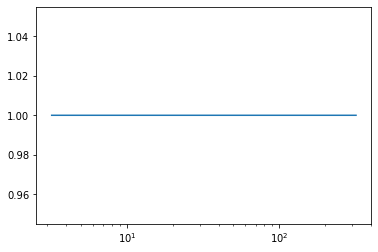

61
[0.42545902 3.96723064]
0.0
88.47424300986015,427211.13165715017,0.012248936831990406,9.563266742120113e-06,183.637177582512,37540.31315290694,0.9938202555638618,0.014447724942450718,14200.13093662848,1085183.5921516467,0.09993073565260939,0.001973628778525777,52209.54343629075,4502127.671655355,0.0054340044381126175,1.158981612765426e-08,615.9686361304159,0.0010502030636079713,270831.2411938473,1.3832249148433853e-06,14078.089070679105,2.6260272150080445e-05,7205984.112066919,1.750159131428383e-08,1.0,1.0,1.0,1.0


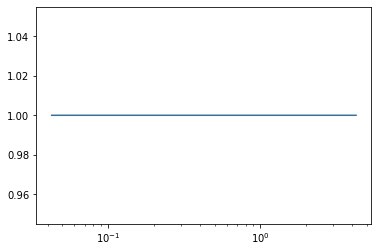

61
[0.42545902 3.96723064]
0.0
88.47424300986015,427211.13165715017,0.012248936831990406,9.563266742120113e-06,183.637177582512,37540.31315290694,0.9938202555638618,0.014447724942450718,14200.13093662848,1085183.5921516467,0.09993073565260939,0.001973628778525777,52209.54343629075,4502127.671655355,0.0054340044381126175,1.158981612765426e-08,615.9686361304159,0.0010502030636079713,270831.2411938473,1.3832249148433853e-06,14078.089070679105,2.6260272150080445e-05,7205984.112066919,1.750159131428383e-08,1.0,1.0,1.0,1.0


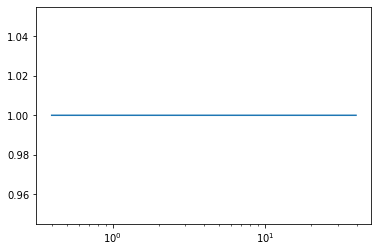

211
[0.27778898]
0.0
48.776256592275764,5504650.771662639,14.354007327594367,0.7666929188325678,657.587912383562,46234349.34031623,0.0015646156431090626,1.287304112542384e-07,146315.13284577883,426882218.89587,1.0912148359152901e-05,2.6419719807107134e-08,38061.41141036784,160493874.48208305,1.012577636739034,0.025748847247909382,759.2296244577027,0.061902520584750965,3822.09657996278,0.0005045935140314,172332.82056380014,0.0010130355726254276,749433.9687479059,4.7469593046401066e-05,1.0,1.0,1.0,1.0


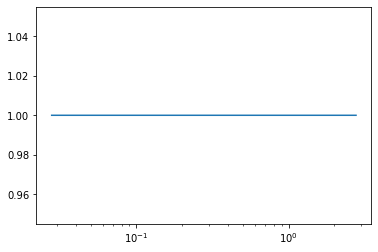

264
[0.03320735]
0.0
45.582233450897334,359806.19894768577,0.06688232798417008,2.8010832694458563e-05,2.7293363695733732,146.03540465685086,0.0018202888444851508,0.0006385918501682561,81.79805672560411,62917.60349612234,0.0006608984918900438,1.7574058134167264e-06,2129.703376313378,48529976.1042855,0.0008194810660012979,7.413043611205379e-07,5.246941516974488,0.00404023097627734,982.1033165078803,1.508421851663268e-05,102.11450734235133,0.00014817838176496605,511518.42822858534,2.4358276582398867e-06,1.0,1.0,1.0,1.0


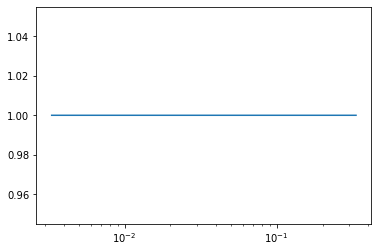

321
[0.00428807]
0.0
206.86530008964658,202374.49902240132,0.002934094871595622,5.342987824671991e-07,754.8783047043936,3638745.752952285,0.030621661280875928,2.113117866039599e-06,338912.6936746959,15770039.983382968,6.0675418240116616e-05,4.839585296809581e-08,109231.75395436383,7214223.223115101,7.97259770163807e-05,1.2914158485083528e-07,32.9085165378988,1.4456189005247155,397.4922183635801,0.008423790664135584,213.61602280911129,0.0031767542740542974,76595.57570367481,0.0009438930220761659,1.0,1.0,1.0,1.0


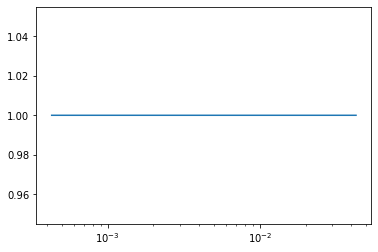

331
[0.01195396]
0.0
478.664187787679,14431014.686398907,0.004965340024514141,0.0003563793097621677,16.66656164333637,42519.37094381647,0.014193356356516666,0.0005236162720228856,5438.230734927232,96580.32728065542,0.012275051430765908,3.854214411687402e-06,309720.46741469693,2012863479.1483784,0.0006897816351314163,1.2244127049352993e-06,217.80421297086622,4.495976353659768,430.87428178005183,0.16048691870262075,2217.7449812536533,3.5605971824932214,92137.75397581779,0.0005969040841888965,1.0,1.0,1.0,1.0


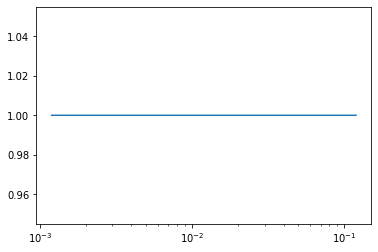

513
[153.57448363]
0.0
0.003924956426003442,53.15543743222573,0.0017615554991325688,6.433420502733442e-06,9.651218798480345,10208.140203570834,0.004143408951861396,3.4782973202305596e-07,134.24995543965446,9264446.584805455,1.4013777487711003e-05,9.197938786747537e-09,0.15670930938728958,2671.9304979728504,0.00012335861043160244,2.4883141703926357e-06,7.6298157457542075,0.007185433084438462,640.1762588750141,0.0001738318172332028,3050.9842536184206,0.0005195068498731912,83756.49963784678,3.8529127730417216e-05,1.0,1.0,1.0,1.0


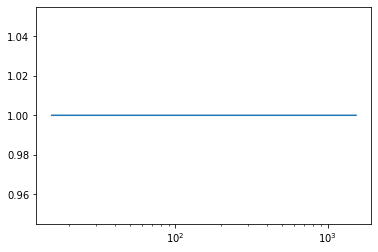

531
[25.39991327]
0.0
13.767268025035444,23119.359861457364,0.1347952619207837,0.0004238259850529806,500.7863513691867,3466405.9267905313,7.214572241782208,8.503079074627083e-05,9910.55002074442,75766362.83124603,0.04334220395219422,5.309615596668707e-05,651.118921063134,1181357.4931396632,0.0051242005975710775,1.2317949177856489e-05,754.7247422446397,0.014217212398612527,39394.37786644099,0.0034526586258888372,6794.985549751231,0.0002913299326796591,21839103.522182893,3.1131352126065215e-05,1.0,1.0,1.0,1.0


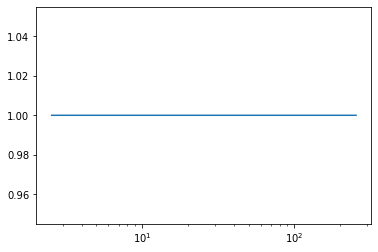

534
[2328.42870289]
0.0
0.010933159059481112,642.4029691403857,0.001127571788365567,6.597312313121035e-08,387.3100862958989,47354576.43612282,197.15469555267464,0.01769511136634967,368775.03689043527,24115545548.63679,2.936593017223773,0.002967857736806318,2.4104393339546046,694.9331139478295,1.2321389566947314e-06,2.285635901141679e-09,109.9049514895017,0.0061144745121747175,1633.4843702164071,0.0004723805429343494,70206.36163731046,0.002607854755987687,135007.8928301301,8.113027482341488e-06,1.0,1.0,1.0,1.0


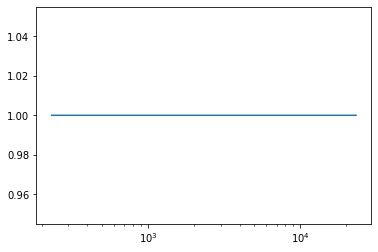

555
[0.06459064]
0.0
20.277038459048843,1014071.1847884556,0.0019370052389297097,2.113662315849039e-06,464.3354757975329,25474.512646004107,13.13046898365576,0.0004684251524554009,4861.8731709334925,32331.038669316942,0.017452776795842114,8.092955601257654e-06,13956.035572643197,23171138.62932764,8.327925873642717e-05,9.801122156483297e-07,3.070746780282319,0.0071791279922326645,8.570839138594636,0.0005062806272157909,831.4622353034144,6.61182512685183e-05,75710.94340573777,3.6553515151556463e-06,1.0,1.0,1.0,1.0


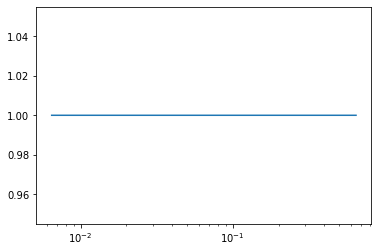

569
[0.05542065]
0.0
180.5845295612333,13245832.792660346,0.046364126592844224,6.306696594126821e-06,1.0918402343282319,3614.6191689752523,0.05727610723497385,0.003187611620076134,10.142520328902865,318873.2061468707,0.012659164493842372,1.3074122690115572e-05,23550.496515158186,119169042.13759318,0.0003257886113269957,6.773906845451113e-08,535.3224196878075,1.5460972261789367,232523.14377317933,0.1466840999139658,13550.538659098527,0.09992979133705439,8220675.40546603,0.003211656511137468,1.0,1.0,1.0,1.0


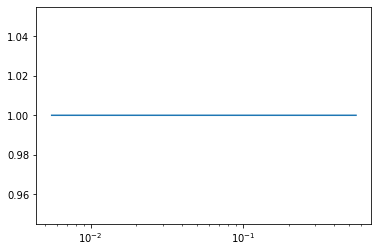

585
[12812.74563156]
0.0
0.05336589805304102,42.1653505575419,8.522730437012681,0.00762423484377449,278.0274659372734,37807.87305232312,0.0010912600881705405,3.617013018065341e-06,16751.59333764237,268838.85329731234,2.140013352254608e-05,4.0602347196465834e-08,0.1736061279230585,126.70705823185618,0.024162334327793245,0.000701919241632144,312.02417260422595,2.815304368431256,1627.4621362885,1.0175401423297208,111636.56684613382,0.022470901126896495,38167292.335881494,0.0002608816610821297,1.0,1.0,1.0,1.0


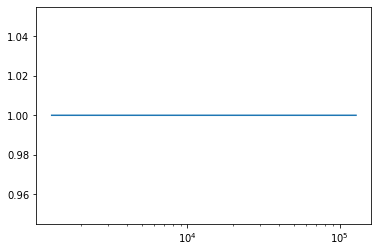

611
[5199.37055283]
0.0
0.0688417342334069,11.367268517345632,0.0038332894436874728,0.00017199517410325195,5.397138060126395,6479.354820160683,1.8776587136725689,0.0001090463555454077,42.043881138945515,12827.757255631217,0.022315310227706164,1.2131187894636567e-06,0.13735324237146196,136.37502560937816,0.00032494080753568265,5.280666628831508e-06,5.029307586437049,0.0015461344762752545,15.913900077047067,0.00010172998127015662,1726.066698376695,3.515827827458825e-05,512897.2874545865,7.806936164447569e-07,1.0,1.0,1.0,1.0


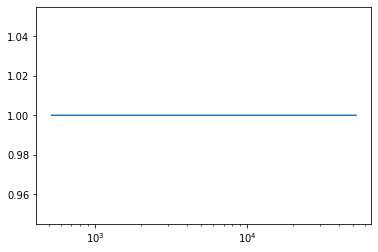

612
[1932.29357608]
0.0
0.007258214158726114,0.17732341138238564,0.9449148702978827,1.5336032860236928e-05,533.6729827694412,124373304.10525729,0.006684985361400777,8.685279675253701e-05,371553.7326252704,65395831254.25361,0.0005916517438782066,6.7669472862390795e-06,0.0933067611176078,16.975908430687657,0.001239814168573833,1.929808216563856e-06,134.09111612995133,0.3725530799270515,318.5873593902845,0.007930744122308497,586.1845749857067,0.0006570189104136675,376830.40729650646,3.3069077818321783e-06,1.0,1.0,1.0,1.0


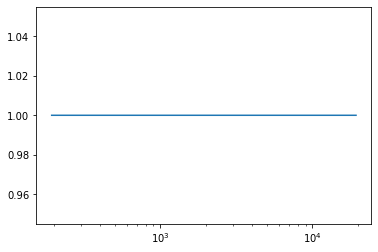

630
[ 7026.75245239 60900.56969587]
0.0
0.002097051741297375,8.244564970048064,0.8842136843523508,1.2352247648219435e-06,5.605324438867302,1102.1341728668947,0.017059808620971405,3.780195737249528e-06,13.579711558660906,48802.35616240665,0.0018875916478965059,1.0621140606081927e-07,0.5707664224336694,24.170227203097852,0.00111934703233987,6.22571506723294e-08,296.6551128763298,743.0819246118492,256999.39941632014,12.944764326131748,1391.600942407023,6.981614566054815,1972172.380028521,0.04594865863706772,1.0,1.0,1.0,1.0


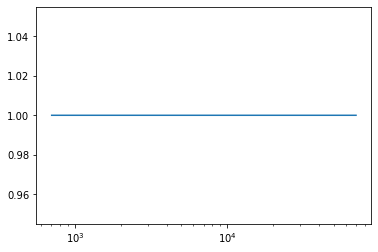

630
[ 7026.75245239 60900.56969587]
0.0
0.002097051741297375,8.244564970048064,0.8842136843523508,1.2352247648219435e-06,5.605324438867302,1102.1341728668947,0.017059808620971405,3.780195737249528e-06,13.579711558660906,48802.35616240665,0.0018875916478965059,1.0621140606081927e-07,0.5707664224336694,24.170227203097852,0.00111934703233987,6.22571506723294e-08,296.6551128763298,743.0819246118492,256999.39941632014,12.944764326131748,1391.600942407023,6.981614566054815,1972172.380028521,0.04594865863706772,1.0,1.0,1.0,1.0


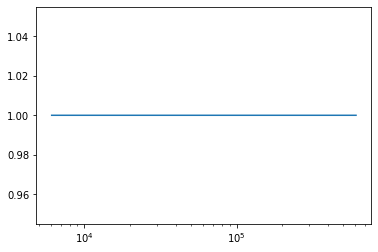

646
[0.00164961]
0.0
656.836369806184,19907572.209703896,0.019781561278762853,1.8336250043768404e-07,5.9838315600098335,12588.842926648866,0.0058631274277659755,1.276771947333093e-06,638.7591794723202,113179.3665945444,0.0001458251521326905,4.986758144437299e-07,129328.46712197899,14549541803.18386,0.00013815182127909013,1.2982255477481772e-08,0.0025915904867235993,0.011893961806757185,0.015902972027518635,0.0011951013859279839,1.6524812822125514,1.688128681938679e-05,146.33814833746112,2.353537901193968e-08,1.0,1.0,1.0,1.0


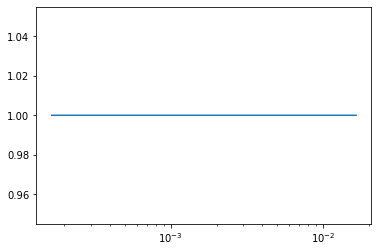

786
[1.41448305]
0.0
34.68084985292188,310641.8178223924,0.06993113457361341,0.00042975310896233097,230.94755602898476,102229.74219799772,0.20899640795446658,9.398254926818394e-05,2203.8167777099366,1032036.9880409988,0.005789313383240427,9.260983627887617e-05,467.5265863748574,8742300.488590442,0.006057128439385362,9.516325585181994e-06,175.03611172452264,0.00286691742025049,1239.0152531713127,0.0021675571847962764,5976.189569501549,0.00023572888409867864,284905.4584449349,2.909133571333807e-07,1.0,1.0,1.0,1.0


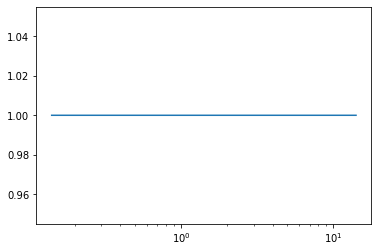

887
[1028.02419075]
0.0
0.004539408316766617,19.325648330109967,0.001791802290900301,1.8745218566004198e-06,3.9641995650081188,5290.08534019457,0.06298312868972862,5.1197030565224184e-05,31.02275831080395,7673.991900066824,0.0008984765150148696,3.6299935306246762e-06,1.9898680566946172,982.3920061468423,7.929270686546289e-05,1.3115666183095632e-08,60.2102862144433,0.15746235794759356,3853.841131583891,0.008680565621235033,1168.4938295111062,0.09366774886130383,15933.627109477133,4.5365453861668236e-05,1.0,1.0,1.0,1.0


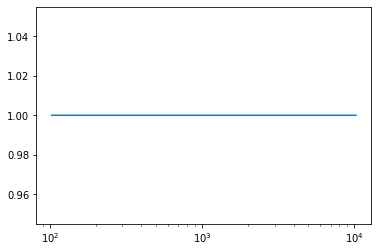

934
[239779.36593418]
0.0
0.02357033876954657,5.694642324990181,31.981943664449098,0.0154187701858881,550.8338283219126,4015.727031004357,0.002158505341650614,1.6474286572813009e-06,622.7744171724657,488912.65662999375,5.185507011104105e-06,2.5762008203363282e-08,0.10691080738691629,3900.067404370384,5.270783132098805,6.614217554821655e-05,140.42494246036017,402.66529522768394,26360.66707623315,11.844288508809383,30052.527969979677,1.5316950236030396,4803315.309206621,0.008844240225913383,1.0,1.0,1.0,1.0


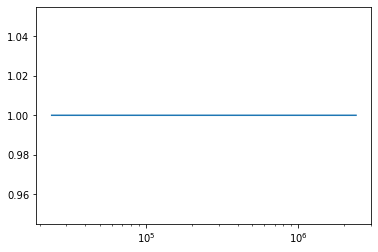

976
[0.08657103]
0.0
587.270491443677,303465.0710071004,0.006652330590839144,8.416767949072215e-07,835.2595446129712,4310230.323817138,1.050732367242629,0.00025963252353839193,12402.633545107068,961031064.6505202,0.011091605477938242,0.00022335287138514873,2642.977342257356,41617650.933724985,0.00032671168746389574,3.551575564301618e-07,499.4490538406703,0.0016403740471304105,5987.006688885689,0.0007339364968221626,130967.13881955475,0.00032827955733226097,68275527.43201615,7.377195441562168e-05,1.0,1.0,1.0,1.0


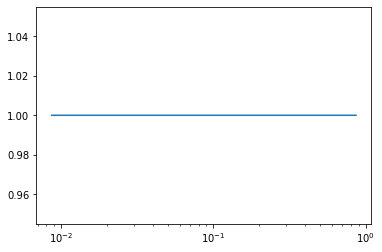

1061
[5421.29812524]
0.0
0.3131522608430514,182.1267001286072,0.001075224827256411,0.0004279481779210436,0.5105834971060276,2.8745572851622407,0.03230567061477512,3.665395476074626e-05,0.7327109266261926,287.78027311349524,0.01257434574972541,7.597848788275577e-08,0.38257593185996525,29290.71613172887,0.001028881353583691,0.00021729503901228694,583.1178463748034,0.004659789096431509,33053.94383729319,6.686250968137125e-06,364730.61093946133,4.0193413437010816e-05,399262.20803923946,1.892419934794354e-08,1.0,1.0,1.0,1.0


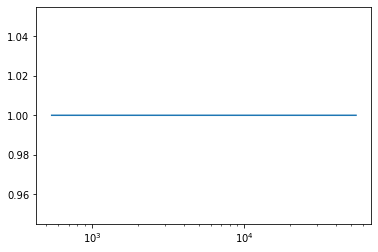

1143
[5794.25080866]
0.0
0.0026750714382772767,29.416575965895113,0.0017328871288361063,4.949191152957659e-05,1.1305121535123484,9967.582603195346,0.03768266488068359,6.417885901310011e-05,391.38817820645056,127540.26332486892,0.0008268774766609861,1.643921225893013e-07,0.2581402653236913,6640.005788722162,9.81530946291976e-05,5.0589534282533546e-06,865.7224090511371,383.03897416905204,12066.55776161483,5.588786221720907,186881.8081323466,26.75686764696851,478370.95696940384,0.018073845488917144,1.0,1.0,1.0,1.0


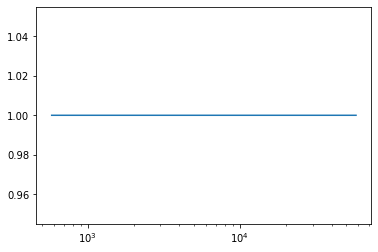

1173
[192.98234307]
0.0
0.34745227551117097,907.6904294948205,3.341250309018632,0.0002411057269861478,536.499069660856,1041008.3754694267,0.0022442113442845213,4.259939827034388e-07,59358.93321089043,7464782.089387595,2.9950077728317323e-05,1.9111295505269648e-07,41.38312924366814,269904.7051755073,0.014463691046244828,3.106583616110138e-05,16.6455190441477,0.004383164683244137,240.35238416182244,2.3774195198919867e-05,77.80732654656143,0.0011243291979079583,749.1929410660587,4.787437056663557e-06,1.0,1.0,1.0,1.0


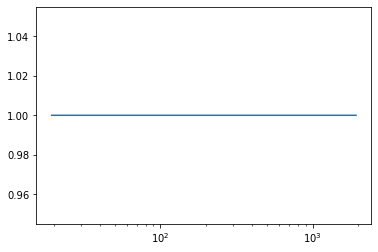

1185
[256.25023811]
0.0
0.004601584733647954,36.82826734783536,0.026413575387735228,2.9168567865657817e-06,111.54762984980995,1663185.3537799148,0.0012424327855834016,1.2735792301652394e-05,13848.797624830986,347022669.6029722,5.585264723330969e-05,2.2864789102313178e-08,2.9907297169593354,1009.7448187451852,0.0003260852459647999,9.40447942676391e-08,10.458652644087975,0.020513178330919625,2533.5737643519624,0.0008021802613370319,11.247005709294253,0.0004702238882363691,88309.39029292217,8.868967624549014e-05,1.0,1.0,1.0,1.0


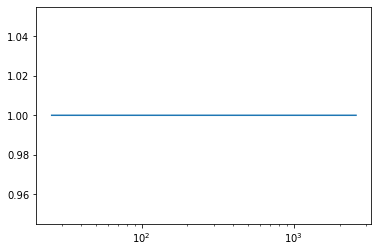

1231
[2514.17281436]
0.0
0.4073054024294374,85.28691472710193,692.9664660009608,0.030903218801378415,5.552133782170598,801578.2608133464,0.11106525928002621,2.429752584215449e-06,5289.6730991863315,3880440.80721423,0.000982466162133457,4.379253794245212e-07,0.5882292571469918,4298.636688792924,1.4432862295716338,0.006449093639181859,14.066536188389856,0.019461972603911575,697.2829464676913,3.1580509492485106e-05,4014.1714766643636,0.001156594687397447,741472.1513492803,5.3043695140715374e-08,1.0,1.0,1.0,1.0


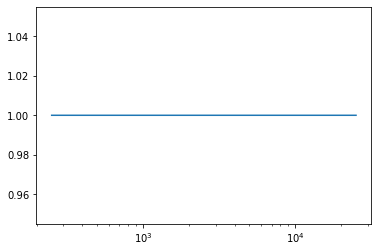

1318
[9185449.30623057]
0.0
0.002820977028324554,0.009949372290501633,3.2295400514172394,0.000510277340429088,28.93017355647758,723809.0885796597,0.03778093038874367,2.1990103371789546e-07,13100.140756982059,193851997.65150997,0.00019285456972113012,1.4524360274726463e-09,0.005960262768569135,0.27539790215522586,0.03139706629581247,4.158956086412846e-06,0.847075117139483,0.5289950867145427,106.46212226497293,0.020472776930700532,12.023958777107437,0.25219671853519365,86569.17091208317,0.001114617330716584,1.0,1.0,1.0,1.0


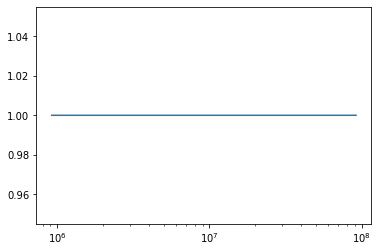

1406
[3500.23344801]
0.0
0.12866016764501403,10.375125536856494,0.0014302579814322145,2.016788706598511e-06,350.60420036980344,15697631.91070371,0.41960889858595424,0.005067183482567247,125467.99553293457,63629227.68285927,0.28207809631192465,2.8350898733210186e-05,8.343741201721318,441.9689985644588,2.1900852830884333e-06,1.1004722583911992e-06,30.31021103465426,5.245439932028362,18089.402852491046,0.5915329263785991,2409.919052545755,1.659740981711174,900612.7511486998,0.0012586081926968119,1.0,1.0,1.0,1.0


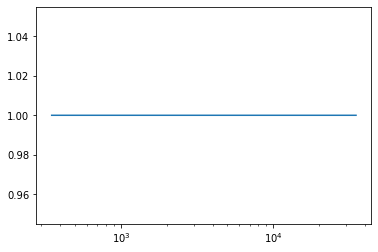

1455
[364211.69940076]
0.0
0.0012845288089781174,0.022115929079303213,0.004972066962418202,1.9978773968915923e-08,142.42155182450216,149648.94160281876,15.585162319860919,0.03962933498856573,1261.8910615717075,1344098.649315559,3.425921695472691,0.0012871524969919686,0.019577296133108258,0.5881581600983234,9.32717870386157e-06,5.201430318702239e-09,963.9360449463754,0.5609525874954026,11504.642927717083,0.021381900962548234,173664.2874920143,0.005294270070426995,10392747.77170678,1.012349672153513e-05,1.0,1.0,1.0,1.0


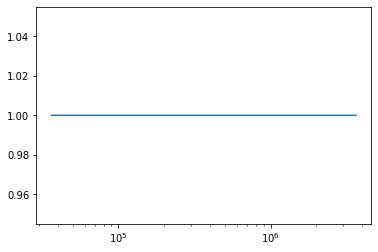

1465
[39.32173025]
0.0
0.0022916686082200205,2.6725795424674588,0.014861798914396486,2.2333984047106455e-07,0.3499327975700616,1634.1908299570798,0.001105976150138305,9.425017527078916e-07,216.07582096773842,10361.754890182052,1.2183928434306587e-06,6.648084140103967e-09,0.020359934735392066,195.15089038939905,1.9473102196106136e-05,1.210460987695508e-07,77.20089823347467,16.567651436533037,20045.52862318333,0.07356507623039016,57932.87926794963,0.1156926819579565,1237723.8550555306,0.04208702863206361,1.0,1.0,1.0,1.0


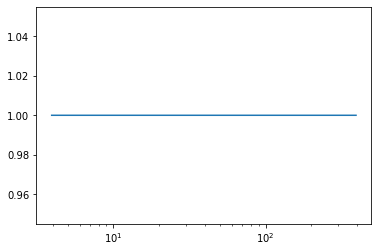

1488
[25.88855517]
0.0
29.463936703364382,20744.433747489817,0.01609868878369393,1.8417326191418952e-07,171.0666630645163,48947569.17258022,0.7431744385374199,0.0006631147064755264,92476.29226532443,861688334.4961216,0.002796410581789802,2.9315022651795414e-05,2290.845295718104,653364.2930977403,5.264897399605214e-05,4.562027562187065e-09,181.80068111869863,68.97569078555951,4840.197659145134,0.09168019592189774,46995.35837472099,0.20672508484722213,652745.5081991457,0.07984727325480208,1.0,1.0,1.0,1.0


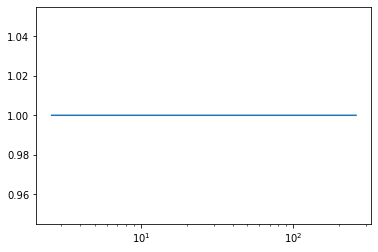

1506
[6.23778591]
0.0
14.954702186336231,202624.2097873195,0.013324641664298989,0.00035028879949802,816.0316870785471,249104244.72784942,0.05943873461644678,0.0008291276806216088,590661.350147373,11536402600.911615,0.017871690270551868,6.623378953716045e-05,1931.9043123033384,17233271.857625727,0.0005812582845958422,8.966855235151382e-07,946.2017248786866,3.5656191393494123,129186.55235215375,2.204890712315174,22438.41939771629,0.15234746372492222,45453155.93668553,0.0007880133725924392,1.0,1.0,1.0,1.0


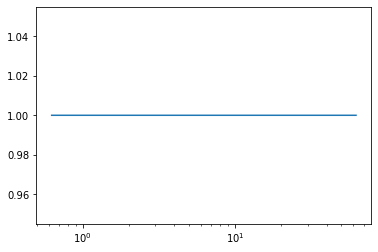

1635
[109.18058497]
0.0
2.6919658088404623,3749.824942732403,0.09793132971968731,5.325538977680919e-05,252.6306686961725,447573.8808307552,3.3506340397677374,0.0007263701899183616,6107.32248722634,6729604.972529452,0.07997436376641145,7.296410907188046e-05,14.816154414557586,296429.0228250252,0.00019619231866371774,2.197862371357748e-06,48.86943005850389,0.8896641862240456,21196.662795050095,0.003238797850490117,736.4144704003843,0.22873904855531274,887208.1995004109,3.974688440756655e-06,1.0,1.0,1.0,1.0


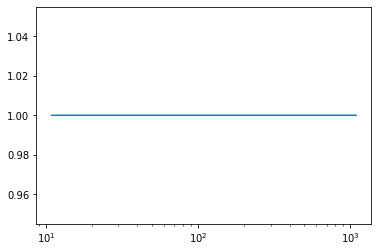

1645
[774.46377404]
0.0
1.5649035048519577,234.00559929452183,0.11235871061936939,5.3372579716828795e-06,95.1240184155308,1385324.2270426715,0.033878105240550564,1.6174187318774461e-06,3987.7981585971092,122470796.17580853,0.0001365665785097843,1.998184270655211e-08,12.963199611293337,35269.238334855974,0.0007322092990778012,7.222092965616357e-07,0.4386653697279116,2.1657767040882048,1.0890165687777633,1.2523404785605987,15.425148853591056,0.05046444235634294,2458.688547516454,6.780078772470755e-05,1.0,1.0,1.0,1.0


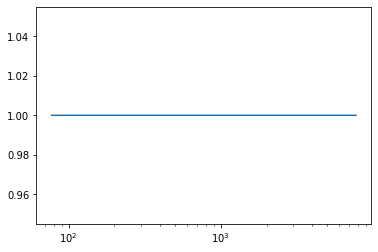

1650
[4.59270837]
0.0
242.5760818009165,1229.2916738982283,12.693971232262117,0.006679503956943226,567.1309222777766,35148.8635170337,0.0023086937440408148,1.898713169685773e-08,783.1001531834661,1478270.2212927686,1.8491133251397285e-05,3.223293113189247e-11,700.3656163871651,9979.303233267612,1.6172303984545848,0.00018128776827815334,351.5270448892579,0.0031981119075785817,21885.032316152006,2.1685856111536e-05,40060.451545960976,7.024544404916933e-05,234813.128288038,1.1331598297172415e-06,1.0,1.0,1.0,1.0


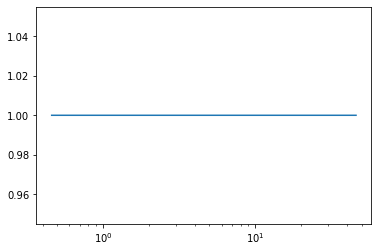

1716
[12.20549947]
0.0
57.65584721383573,78759.05137266712,1.9522916820502794,0.00024459386349253494,318.68559602147707,4853381.375417695,0.12319112258678652,0.0006123561043745383,150500.3638272339,396228685.3218374,0.08442513638062214,2.360207876183782e-05,169.45748965089817,42510530.45023785,0.10468665392851617,2.4464115245173824e-06,176.68269173114336,0.01469765645210424,15537.052403772876,3.4056210282107e-05,539.4421745160495,0.0017424046310431532,515422.25448432285,1.6373108334621022e-06,1.0,1.0,1.0,1.0


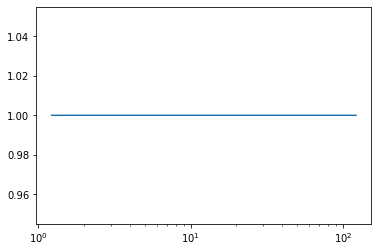

1719
[1498.56671652]
0.0
0.1731639949400357,240.01341352338665,20.26490552254108,0.002293191275171187,0.04524541864017259,58.81599171493294,0.015174003145137538,1.3878813049221234e-05,0.06369223730095126,6719.292282172348,0.0003415111929316928,2.5986985145731362e-08,0.2959039049497584,16804.783615617183,0.22043473921280535,3.6113284896732476e-06,845.7455990436982,0.004265598597004355,12561.828128833044,1.4919920533440158e-05,13400.44959003645,1.93300623583179e-05,1960589.1789118682,7.0914815916841684e-06,1.0,1.0,1.0,1.0


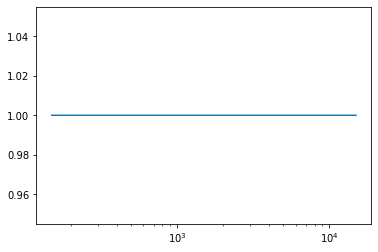

1754
[27.25685923]
0.0
0.016373369969722874,2.604339691336938,0.0030857532042699305,3.041409563772795e-07,0.00306593030874345,863.3109293647074,0.08802088809295172,7.563606906042561e-06,1.2796067329131953,557667.4306146381,0.0007185525416501796,7.646462980914486e-09,0.06787181878315164,435.6301726903347,4.455121152068381e-06,4.931261293560989e-10,0.6413127280193016,0.012919707037521667,68.13662178731391,0.00013131336555617797,196.54407331035097,2.346245883042054e-05,36886.11318887187,9.935113797162383e-08,1.0,1.0,1.0,1.0


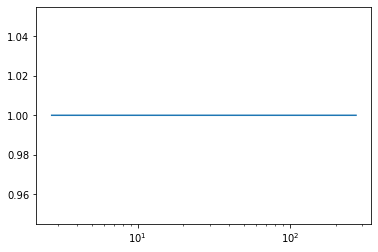

1792
[0.01864236]
0.0
87.13204849490134,10096038.587289613,0.3313885636997663,6.592331505088749e-06,243.13475768962147,26389975.85809872,0.021456611457015752,4.817310231317226e-06,158292.89323979442,39032333.19430581,0.00023344811252782457,4.317335654645725e-07,26929.951591516096,332534205.4761282,0.001175104162969244,1.6809774483413054e-06,644.4818093848476,1.8652828214790529,6931.824419666414,0.013897469607013392,7495.979561969805,0.01879672431115151,67850.87062060046,0.0034591425130116524,1.0,1.0,1.0,1.0


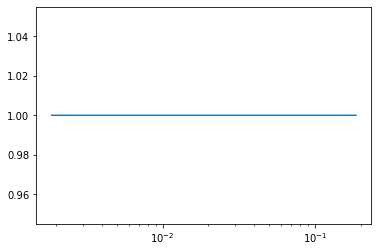

1793
[0.0104295]
0.0
81.53879089258567,142212.5866144712,0.0038826993449991784,1.5447308555818939e-06,65.7834503344903,45914.818496797394,0.001068095325184809,2.925889977689628e-07,11754.02756979953,444512.53204557905,8.79899090985089e-06,3.097991914934027e-10,820.7546405218119,351337.32566007954,0.0002016829443824273,4.068723049223038e-09,5.260973449622552,0.011354833164299529,14.112489558085421,8.242361520129012e-05,2967.3681247379654,0.0012821825164667255,299174.5838661454,1.572925429601677e-06,1.0,1.0,1.0,1.0


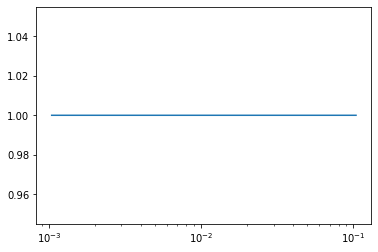

1805
[6344.76315282]
0.0
0.002316147005288553,2.865541882166894,0.0025547809895590983,4.784401542124128e-06,149.18264811461285,112734.08311415842,0.0014220637163582625,8.41539871739341e-06,2972.9056457294027,4789245.970728631,0.00011867535296787322,9.999633263582074e-09,0.03965199815550212,40.86398907211343,4.831669869765407e-06,2.1250938469125285e-07,128.21283003992806,0.014356045234695226,3266.807665251264,4.029326404406621e-05,939.9790979839595,1.8640919317548507e-05,95732.82262800809,4.928417721084733e-08,1.0,1.0,1.0,1.0


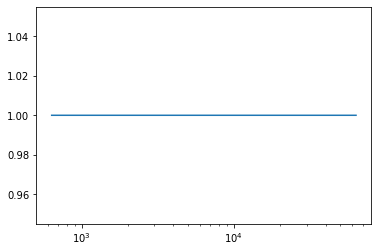

1828
[0.92568572]
0.0
87.74217944480127,141393.53004099455,0.25488176327259504,1.0942880093583192e-05,347.10878234543725,17396823.82899981,0.0016836699768086611,1.1563802505167677e-08,24651.954192155674,22680857.654556833,5.988950735990932e-06,1.3258736478368007e-10,71204.88888560167,58362585.80785722,0.005387016010925734,2.1528646038521125e-07,0.02088968207810298,0.10496256352166808,0.1391631205175894,0.0005053106215458821,0.5926600887945733,0.0003705041971812419,29.517805286543126,1.1292561207276479e-06,1.0,1.0,1.0,1.0


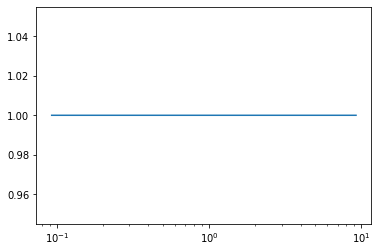

1841
[271.96654205]
0.0
15.018395129473237,34836.585241414265,751.8690382110416,0.027030073655109524,13.560838173750067,381904.0619850306,1.8347259802219231,3.1354745436146226e-05,587.8289203376708,39381539.25911946,0.010295096356597004,7.071159192571982e-07,1186.653359141393,798914.6567135485,3.5804912264653517,0.007080073411931591,782.4069067227223,0.009540696331933872,1137.8478863692897,1.2664925233725513e-05,697802.9112561037,0.0014455085360424713,836257.0009991627,4.5481936474655304e-07,1.0,1.0,1.0,1.0


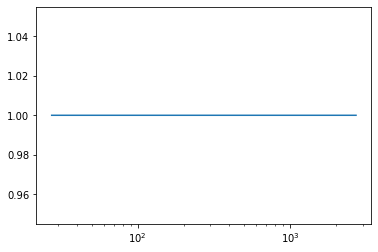

1846
[0.02607939]
0.0
340.07779343051396,5255.640539075398,0.0015170076802094449,1.286984424695889e-06,58.18125409616986,155.5524312420864,0.009798815282130472,1.1381246722064637e-06,115.22275857715809,246.40475202932626,7.644321439379829e-05,6.952030480726428e-09,1531.4671869534632,2844651.925035679,2.2862963451937458e-05,1.0638852371849255e-07,234.34289008487926,2.08204522985217,487.39854196292845,0.12388254087288034,45777.91052779526,1.086164182042298,17235758.63703648,0.0818190709135626,1.0,1.0,1.0,1.0


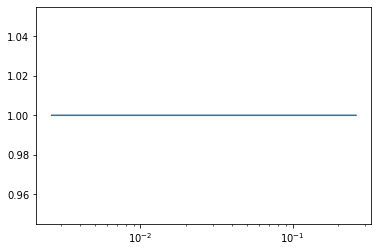

1892
[130745.77632302]
0.0
0.15714824324877255,0.42734395388086244,0.152926643618168,8.599745213798726e-05,105.43802178185265,1007294.0838940393,0.14993974652968833,6.435325817818824e-06,11462.613899826696,2039773.3032558989,0.000193573966575427,1.7059823007317183e-06,0.2456403605106493,13.756903580977776,0.003176759074071258,4.84901820820064e-06,0.01039801819883172,0.06104621858367612,0.06336029846148389,0.0007167948838546987,0.48718738254727845,0.047626192714589,46.971798766094246,3.2657734369941515e-06,1.0,1.0,1.0,1.0


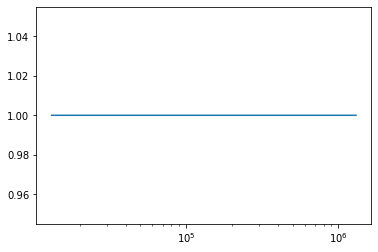

1905
[79.25778642]
0.0
0.09463759822607834,2.0292939933312333,0.018399894256479903,1.4537631275201838e-06,796.1087109967664,232687.1648395203,0.16247265737920186,2.6922870730152026e-06,21101.449669602778,129564952.34146945,0.00037953857871889703,2.1369203343061525e-06,1.1155483833628201,509.47636463636593,0.0002957482117603828,8.655727604588863e-08,12.1074965676769,0.006608349488504893,5580.3670398540835,2.1081407503314787e-05,871.0431705126696,7.116579171974219e-05,8045.339257342021,2.6668756369023394e-08,1.0,1.0,1.0,1.0


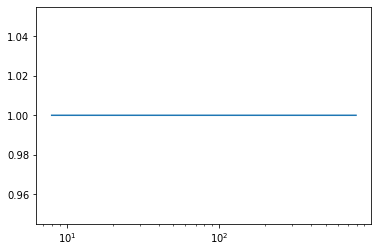

1913
[961.44143859]
0.0
1.6746252454020305,18.664001731332455,0.4845043663559734,0.005213009489444576,573.2467404205244,6249514.94564868,0.06319745053554222,4.77995546124466e-06,154535.82613377427,41962727.65809243,0.0005676957657725858,8.714190173857674e-08,12.996934264235179,51.58215107821261,0.0317819796706832,0.0001789134361559497,0.013038591413942794,0.0012997726834985278,1.0460574713768211,5.652917784339836e-05,0.02037047689046417,3.805764473754703e-06,999.669408269626,5.039622620719568e-08,1.0,1.0,1.0,1.0


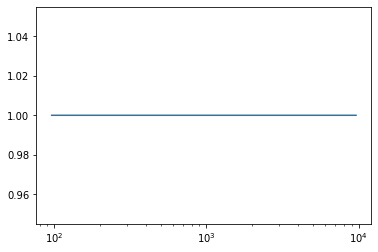

2059
[6.03613161]
0.0
52.23188852536552,46266.97848762878,0.9512944466652271,0.0011039728117240746,398.79242031824054,15728928.45224034,0.006089598259098121,1.5794782120128206e-05,43194.34605374852,2711294189.092383,0.005095825238638637,1.6907237569363728e-08,57.08737992345717,2051657.8863872166,0.014801546292720895,6.457457822667974e-05,103.08963109639542,0.03009102566744759,1034.2240708002757,5.179431178051374e-05,14204.762372722525,5.968853579739076e-05,26756.11650663954,8.275565188478854e-06,1.0,1.0,1.0,1.0


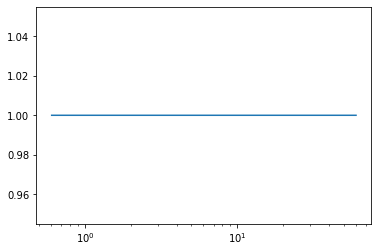

2127
[122.81522534]
0.0
0.1366550636538291,15.343545911550754,0.01325907829755535,8.390726298991524e-06,47.840414540656795,9862.029796152237,0.00613844960725504,1.6556356159876424e-05,5771.906595080607,458736.47789499763,0.002154428333154595,2.744198626602997e-06,1.4077323696914779,64.55554468020884,0.00011580252476455564,8.651252228594124e-08,226.9243421191121,0.012518600475500933,2671.9613031546824,0.0001218794750532579,140591.17562782043,0.00019939487808486782,90687455.43006079,1.491409252748178e-05,1.0,1.0,1.0,1.0


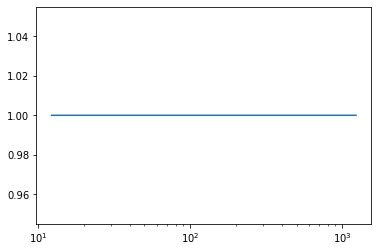

2151
[56794.52824512]
0.0
0.0011996203388398028,0.008009914456114485,0.01668296079016473,0.00011940361524897278,0.02777801619099538,1491.2543599980906,0.002843983388526595,4.4548841063831695e-09,3.5985462991976505,14878.6861076602,4.3979972817774744e-06,1.8978820516027657e-09,0.006778589136129641,0.4691465494632858,0.009405671295592721,3.5260648263012643e-06,539.3028164409886,0.0014790813931554094,1392.5664188607511,9.649444502204482e-05,166707.9024128115,2.0505053685052048e-05,734916.6189117719,2.6702053163662624e-08,1.0,1.0,1.0,1.0


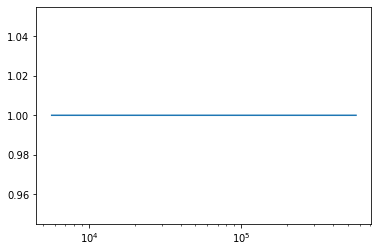

2161
[2.20301978e-03 7.07276130e-01 3.19921827e+01]
0.0
168.9207814224231,29320.50668672244,0.00516287778989726,1.6013868756825594e-08,716.5885944321292,7676209.021647821,18.747095454623206,0.2760636310627254,18169.70584093821,15161075.322748533,0.2862012120389021,0.0002784807107085905,3728.1773268240545,1438769.778580026,8.125376238026297e-06,1.567435781152698e-10,62.26373749687275,0.005785581165485869,19894.829294672014,0.0011305884783810866,877.4627980985006,2.390573404017281e-05,10016404.164636089,3.085476271310386e-07,1.0,1.0,1.0,1.0


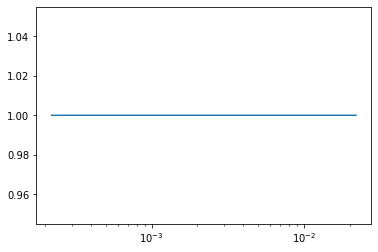

2161
[2.20301978e-03 7.07276130e-01 3.19921827e+01]
0.0
168.9207814224231,29320.50668672244,0.00516287778989726,1.6013868756825594e-08,716.5885944321292,7676209.021647821,18.747095454623206,0.2760636310627254,18169.70584093821,15161075.322748533,0.2862012120389021,0.0002784807107085905,3728.1773268240545,1438769.778580026,8.125376238026297e-06,1.567435781152698e-10,62.26373749687275,0.005785581165485869,19894.829294672014,0.0011305884783810866,877.4627980985006,2.390573404017281e-05,10016404.164636089,3.085476271310386e-07,1.0,1.0,1.0,1.0


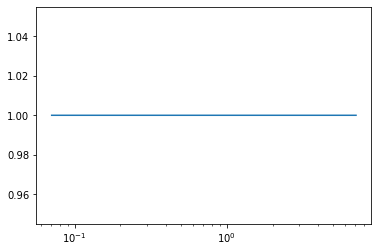

2161
[2.20301978e-03 7.07276130e-01 3.19921827e+01]
0.0
168.9207814224231,29320.50668672244,0.00516287778989726,1.6013868756825594e-08,716.5885944321292,7676209.021647821,18.747095454623206,0.2760636310627254,18169.70584093821,15161075.322748533,0.2862012120389021,0.0002784807107085905,3728.1773268240545,1438769.778580026,8.125376238026297e-06,1.567435781152698e-10,62.26373749687275,0.005785581165485869,19894.829294672014,0.0011305884783810866,877.4627980985006,2.390573404017281e-05,10016404.164636089,3.085476271310386e-07,1.0,1.0,1.0,1.0


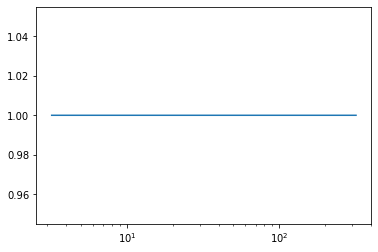

2172
[2100.90285294]
0.0
0.21232992704158368,187.81595519053673,0.007899814998885198,0.0007883224262944694,59.16685000332038,2339466.6074205036,0.11034723194581232,0.00021476208759414788,3517.268743005576,12403359.79049472,0.0003603828576754355,1.4345935756751648e-05,7.608510291832509,3069.1920288690767,0.007139150459772423,0.0003910336036533369,83.79792569732714,4.219035436878204,19278.508340713724,0.20229657704174436,50845.521829870275,0.01111020331258834,43384015.62545217,7.239685973567618e-05,1.0,1.0,1.0,1.0


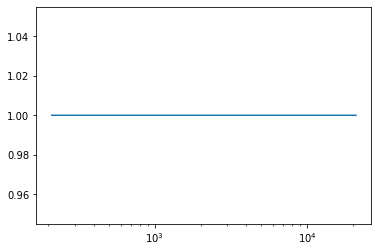

2275
[17.59831382]
0.0
393.66067062862646,172857.29850708522,1.4047305160441117,0.3259541239669993,835.9592412661087,1611747.9195255456,0.006889633239951178,0.00010049140117019465,20881.597926838873,91235841.89851318,0.0003340023093101343,5.197140452108223e-05,21682.39962183009,640188.2965854268,0.3561183022333013,0.044109283320741724,198.32721637963874,7.447044020547914,17116.06139281589,0.010723761150598369,2038.6561250254947,0.01697146284403085,1006941.6403844288,0.0007096345109171952,1.0,1.0,1.0,1.0


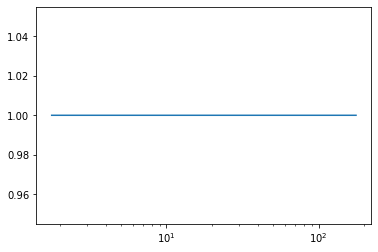

2294
[1172665.65162267]
0.0
0.006993190115219976,1.1394551700113869,0.46705534349725775,0.0006510523289179939,441.41250997516306,2205592.491938753,0.10669759590872756,0.0022089326574332986,88241.73831379275,1028367374.7188382,0.05899856948559482,2.5959935609368886e-05,0.6169837423220246,1.6412719608975785,0.002277575434453497,2.270960205651256e-05,33.980529377378616,0.10212211931455314,10952.768283195814,0.0022128753916294294,90.63020904960874,0.04209340154684027,3024636.382119253,0.001229645377401258,1.0,1.0,1.0,1.0


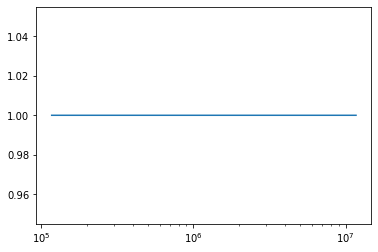

2332
[0.30923184]
0.0
0.9362572199272169,20466.481337824072,0.033506578006177554,0.0012139307140945955,82.1502247293096,13101.178770369444,0.022692072939117746,1.2130183541011715e-05,4020.145000097629,36069.610692596805,2.463074312224996e-05,3.935312358172304e-08,22.21959174846253,9986296.849299977,0.003947722076781849,2.5404032678793802e-06,5.5683807484797585,0.14475892104768376,801.9494232937843,0.04598193834422269,1800.698726319755,0.0005640224392926003,490492.99494636664,2.0045699209765562e-05,1.0,1.0,1.0,1.0


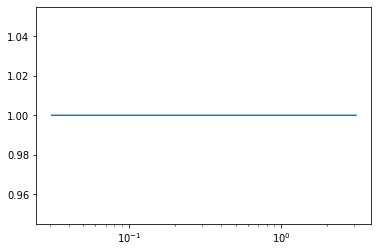

2343
[2061.03113395]
0.0
0.38651270300463875,52.253788996169824,0.0021938145129149064,1.8090844868743794e-07,0.12818005150402828,0.9492265722360895,2.3933390433140933,0.0008782367263073461,0.21280736150847276,172.1424242255792,0.007465672922436485,1.0780393847440691e-06,0.8753895919169606,5033.686691444166,4.345406071011843e-06,1.0247986351690655e-08,211.8925660086737,0.5386351811940454,70613.35382393395,0.00087870404167101,19452.31315483503,0.3756957159558856,38926519.87542021,1.5040964435294382e-05,1.0,1.0,1.0,1.0


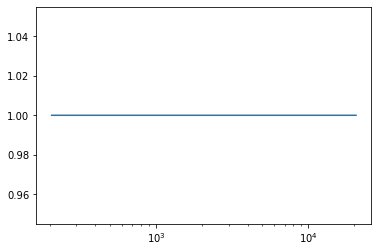

2445
[183.33714037]
0.0
5.459565990729042,83.79310471947285,0.18286640415051286,0.029221276926913484,535.4386327602249,833847.5890708489,0.20044780655060362,0.0001699490874010827,167751.15359235305,6260998.048020969,0.0011848347352225192,1.9875503608827082e-07,18.803733643159845,1798.5869060918062,0.12613394122237212,0.0001395454072911135,0.014771358086724726,0.001596714115921991,7.016995145332019,2.696639192944227e-06,0.19208950547565787,0.00021413004422864458,2282.058313333788,2.074910797718234e-08,1.0,1.0,1.0,1.0


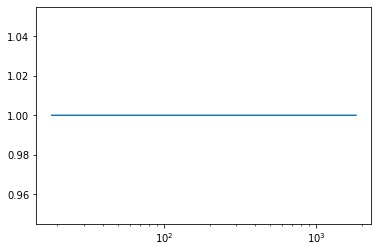

2466
[101.00112957]
0.0
121.7561269752405,1537.4579116651994,0.29260865657788654,0.0005886084497799811,0.10959252984356246,19.183397451194022,0.4235279866894599,6.903505469319514e-05,0.22984080427607026,7913.746101865172,0.0020871843208099526,2.0081891272134326e-07,187.57656280308288,5549.864372477951,0.002520973987556943,1.5410158884621678e-06,171.60459437060624,0.3243320188694613,705.3438016242824,0.0008265295487261898,18680.970706163967,0.0009709312938211612,1306898.0871785644,0.00043818989616861064,1.0,1.0,1.0,1.0


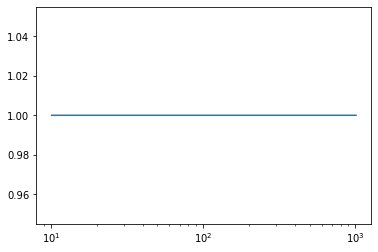

2584
[20.90953011]
0.0
1.6314212640130494,3841.108846300142,0.2062110048544153,0.00021744472566424277,156.77142854723218,11281.578983953097,0.13031439281616292,9.769174845612146e-06,814.5182092896646,20568.2254691001,0.0033490108355917533,4.995695479433875e-06,248.11714427017603,51318.270026786464,0.0005115830377454301,2.277028194177328e-05,5.196321012098086,0.0035995218202309735,620.3753560894983,9.784566453812656e-05,24.375184675895227,0.0008898951079355543,48867.11455806878,6.137674872201185e-07,1.0,1.0,1.0,1.0


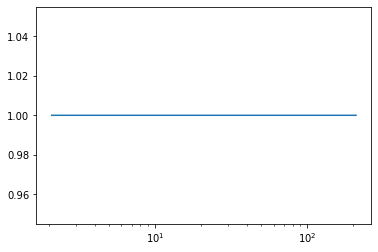

2615
[91830188.6909073]
0.0
0.0014893292844055002,0.1469155819053767,0.5641064981552063,0.0002522928763655096,553.9754845653748,15650037.254814388,0.020773973252947223,2.974504455800664e-05,76518.66902408663,347355034.97485304,0.0013493254051344984,1.0673114064410348e-06,0.013294764562513342,2.282863077880858,0.007284461780317382,0.0001550600375739126,0.681448745223727,2.6932885399833726,0.8011116586432779,0.0376169744659359,159.26039036547553,0.6660050159949045,14327.351056377976,0.017591279917521185,1.0,1.0,1.0,1.0


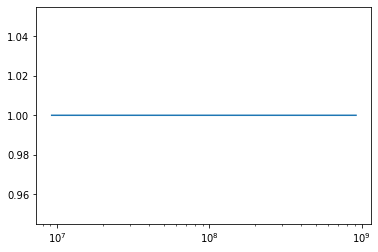

2644
[11400.37307272]
0.0
12.731868044067344,1688.0851209317914,1.2496857010330742,0.005165881350354693,346.2183195776877,53455133.66169754,96.3725994296232,0.38922912290469364,74956.15928769764,1697861004.1697626,16.289260689063457,0.013592055673025542,276.5607153647009,7016.709316422003,0.09686265911955796,3.873351342514911e-05,12.013675508345758,0.03832105355747289,3853.0389972843964,0.0010588473237001692,2682.0032956841883,0.0032002209903332413,87876.15435204499,8.91496195553181e-06,1.0,1.0,1.0,1.0


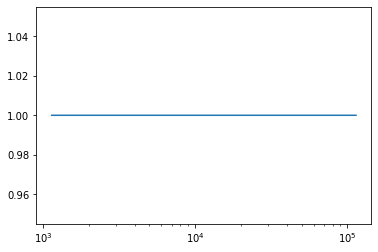

2740
[4.65593026]
0.0
112.51068686557818,838358.6192049034,0.02880181415650653,2.7496971418326387e-06,93.20654420796494,34954.44162639052,0.2352891945190037,2.4963274723827745e-06,6879.922906299526,4233633.5849341685,0.001941925263823051,2.2868210753088312e-08,954.8505800660157,630094852.3805823,0.0013879907073700338,1.380844192457358e-07,7.707784614302095,0.36667835949631594,3829.251826663272,0.0038547353150088543,369.48077826942483,0.2555618477871363,36648.26468742548,1.7996935542469728e-05,1.0,1.0,1.0,1.0


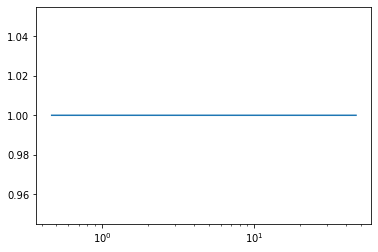

2770
[724.67868046]
0.0
0.16772810910380612,204.673644762281,0.2674818592529844,0.00011912619641415165,10.27648522219293,1116179.1484643861,7.576450326644771,0.11642919982998524,7934.93895803621,1593436.7668752342,0.16325740848464879,0.0006970029725721371,6.166642552749022,94461.25242084225,0.0014232473742577495,6.023327694231308e-07,877.9047460087346,0.5133179094478928,498357.01717960887,0.004318058024534369,67195.27878900683,0.0026222239015648023,4076028.083747361,2.8432378034059746e-06,1.0,1.0,1.0,1.0


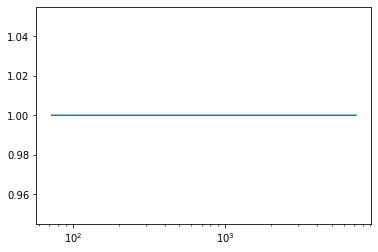

2807
[1.35720881]
0.0
7.584660363607757,28028.317206254695,0.05309002217173021,9.603931676838747e-07,0.003056197795436358,8.499409563772655,0.022601957739412478,2.003779533377859e-07,0.958132855066373,1211.599101265271,8.896188924210339e-05,1.7587540677135943e-08,1680.208053832498,16773961.60603134,9.310964379061604e-05,2.662710728709674e-09,738.6645391329084,0.0030649167079977013,2890.1690799774065,0.0003938214688448589,151688.68062750573,5.812706264843418e-05,345027.81291307544,2.1937405023394455e-06,1.0,1.0,1.0,1.0


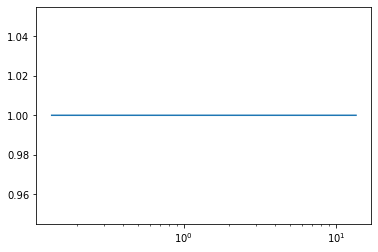

2818
[0.01546521]
0.0
3.56856477879228,16483.68974745797,0.0061445806408165484,2.386491012476558e-07,1.3595666823054358,36901.71822366417,0.00488694828737238,5.819985731593272e-07,111.31692854300069,103984.62145172713,2.648333165229772e-05,1.0002888581294973e-08,235.80390593836822,96351.88138345577,0.0001207332146573198,3.7629189454906623e-10,8.512191854158853,0.01081330813715592,3684.387076235997,1.2273645864660274e-05,115.60314458227892,0.010524074594259098,296607.9291004355,1.4123002937109376e-08,1.0,1.0,1.0,1.0


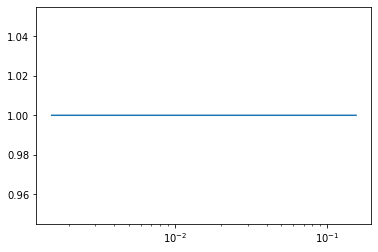

2974
[0.04845828]
0.0
3.663887104601295,2034625.4491497772,0.008254640158226497,1.1774175462032223e-06,154.62964293790267,2432462.675471093,0.012422320734833073,3.900766430122504e-06,6997.878438680946,2120722765.1371822,0.0009016574759461306,9.597630343362035e-07,2714.8854097252843,467412488.4687073,0.0004759347319652952,7.990078245109285e-08,11.20923429385693,0.24595623412827125,1688.7015547417234,0.05477502705066882,10403.366068463009,0.0028702052741028804,831232.8827929529,0.0020928429326514462,1.0,1.0,1.0,1.0


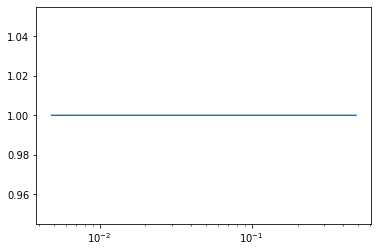

2977
[0.28519011]
0.0
242.32689871120354,25091.85740834846,0.0018632954338179475,5.6412204265311655e-06,40.816876262902156,1303051.167385024,0.0035356819193014207,1.6925952826803865e-08,40680.362695826785,696678537.2762827,3.760485947311068e-06,2.998503441429173e-11,545.4270841017155,14684238.668787327,0.0007208568176664769,2.920871082254141e-07,0.35499822091837296,0.0019208117157279302,1.0054486345352507,9.932678788953988e-05,8.617432877004662,9.073271618722244e-05,5363.386118273403,2.7495741144502283e-06,1.0,1.0,1.0,1.0


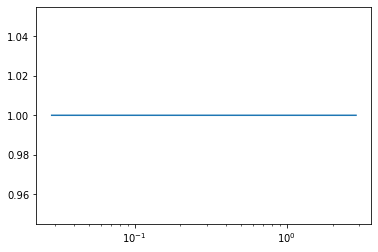

3074
[54397.60410579]
0.0
0.0019566207219432483,0.4105341559102819,0.014802783939257323,7.2812309467610905e-06,535.7905422418547,1338.3292763848194,0.021797224252765944,6.43469610457469e-05,730.1271200554729,377358.31669892586,0.00043016027128321964,2.2066768171637145e-05,0.1428669439190683,7.100167777311265,0.0004081259998032705,1.4166034442034174e-06,0.012361225072860168,0.0010383301003113585,0.11804277230078808,0.0003642028831880712,0.02573071227662085,2.116327200685479e-06,4.71442798159566,3.2042297245453105e-09,1.0,1.0,1.0,1.0


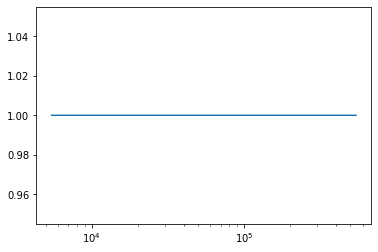

3106
[0.00453604]
0.0
611.0791467385119,7448027.82539307,0.005402041642208983,1.3723307420582342e-07,0.31401226474397775,3479.501033934371,0.44772248127717,0.0006006668625765328,17.250261539384592,326911.10020436026,0.004735548416651299,8.86072708439313e-06,53374.23413548189,356946726.6188252,3.0291243286219002e-05,1.1144660021324372e-07,900.4619620122755,3.098860171804619,90404.70356329836,0.18081437285151822,107643.37260150563,0.03554204868041812,9726743.380749943,0.00076982752590242,1.0,1.0,1.0,1.0


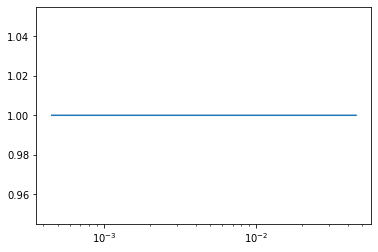

3129
[31.51223018]
0.0
0.09240335307349351,18.99845329840597,0.18451384580681754,0.0006157209479229158,2.922755420111547,43148.87587813145,0.002277788384145133,1.7754607106089496e-07,887.2973419780961,299564.3780147135,2.2038832575773818e-05,2.0498789876559423e-08,0.10496999615230088,6690.367298959512,0.02026398125562093,0.000210220654150981,477.6551509101191,0.012339071918518107,2505.6762114977973,1.452095522854224e-05,25262.487748753898,0.0025677229149469855,2445632.156049293,1.1484713449757258e-07,1.0,1.0,1.0,1.0


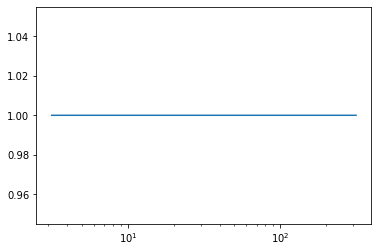

3151
[26.25638868]
0.0
29.15904347251085,104.03864823922693,3.208514523851303,0.03409174941756087,697.7640510408588,724660.7636347618,0.0035183948486679478,0.0006416457685318649,377225.19443580566,19366185.737505533,0.0013754543876885205,1.1905508321789246e-05,87.12828391420675,102258.15343165444,0.04098376619078765,5.280047310824276e-05,29.587297117421706,0.011007240112259365,53.319901178697705,0.00017066639237570797,529.5711695863039,0.0001423509914030179,2280.595858154194,4.6295500482193535e-07,1.0,1.0,1.0,1.0


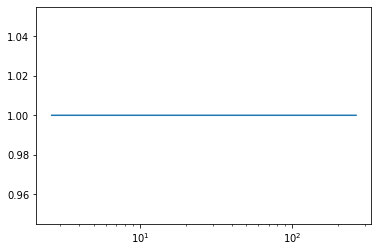

3192
[0.0003922]
0.0
106.29608771906555,417462.117417906,0.3551931253096127,0.0052545936614527495,235.3590806109019,157880.43522104618,0.0021895679732519082,5.974236861021995e-07,244.39326163824347,47459036.622902505,2.265584879643998e-05,3.2108430346692296e-08,4308.732072609982,137414537.22310373,0.13794629341530432,6.081108306094545e-06,51.44326957635231,0.01896009658725388,10369.743182676188,0.005056560178710498,2473.9459410325526,0.00038093476879147046,3024085.1213864693,1.3559037797545438e-05,1.0,1.0,1.0,1.0


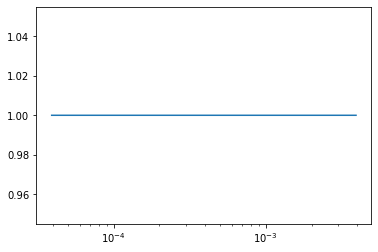

3209
[10.85821477]
0.0
736.8201742922863,3872.4376261273887,0.9364565566036993,0.0013409999415552488,833.7762319455287,951929.7033574791,0.09408028932131003,0.004649734356953853,337072.9327633943,4255477.48468684,0.08980398585029135,0.0002681707778942909,3611.9430972326295,633314.6210787926,0.03886529377317388,2.7505341137613096e-06,0.32924871110418685,0.0011714567600893489,11.670795083992639,2.2512631097994096e-05,298.56512298616303,5.036192140424205e-06,540.7887848435156,2.2660729266120428e-06,1.0,1.0,1.0,1.0


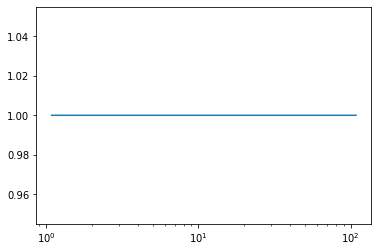

3217
[0.00180904]
0.0
812.5563084571818,12095471.585263958,0.02247408443749269,3.86631533479911e-05,5.23146247301657,226.94115540118395,0.009295146665346827,3.013082858548526e-05,177.47506594170716,35630.39463998116,0.007593565636093864,2.2532287064223244e-07,504004.73285320564,547694885.8821775,0.0002184553589937951,7.941569589116987e-06,339.16924285491604,0.017370235562063435,3037.691909138533,0.0001665716483538777,1439.2810942927931,3.2647117631930856e-05,5732.948005217327,1.5271638820579113e-07,1.0,1.0,1.0,1.0


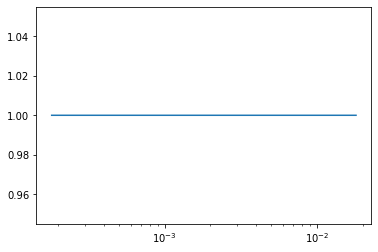

3269
[8317.13708131]
0.0
0.22155626512630877,994.8124427731559,3.873948156888547,0.06277968445329123,687.7398444397938,20425676.027160928,0.044443815549409835,6.384858249473315e-07,56991.95726333096,762473652.9472685,0.0004095497266554585,7.062453034056716e-09,36.9074291728666,21580.002198983824,0.9326933106589665,0.019925740525766907,343.7870195106613,0.0904484191838902,500.6641767726903,0.00034059256904396225,19122.067838597635,0.0007821374805009495,63126.592196172875,2.2131259860722067e-06,1.0,1.0,1.0,1.0


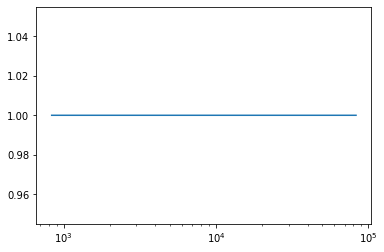

3274
[1.14836161e-03 2.50025280e-01 4.95343207e+00]
0.0
206.87993378207534,12399.65681012512,0.001491751828931807,1.3755170734862395e-06,0.5725745110830556,2214.0795037655334,0.022125065020454145,1.1088068814043055e-07,13.326530293318797,62969.12201983722,9.694480502763221e-05,5.0230999377678724e-09,312.0322045856179,35864.7132034228,1.649432192516893e-06,1.506267022804967e-09,373.77071994333977,0.018208701179636366,5054.859934622199,0.0001909498341716471,32320.82136410411,0.004543159459514939,43526.475543404755,5.458912054042256e-06,1.0,1.0,1.0,1.0


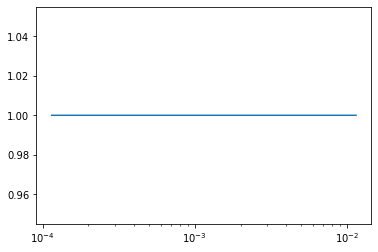

3274
[1.14836161e-03 2.50025280e-01 4.95343207e+00]
0.0
206.87993378207534,12399.65681012512,0.001491751828931807,1.3755170734862395e-06,0.5725745110830556,2214.0795037655334,0.022125065020454145,1.1088068814043055e-07,13.326530293318797,62969.12201983722,9.694480502763221e-05,5.0230999377678724e-09,312.0322045856179,35864.7132034228,1.649432192516893e-06,1.506267022804967e-09,373.77071994333977,0.018208701179636366,5054.859934622199,0.0001909498341716471,32320.82136410411,0.004543159459514939,43526.475543404755,5.458912054042256e-06,1.0,1.0,1.0,1.0


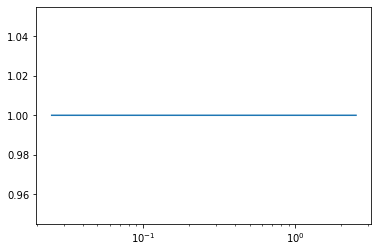

3274
[1.14836161e-03 2.50025280e-01 4.95343207e+00]
0.0
206.87993378207534,12399.65681012512,0.001491751828931807,1.3755170734862395e-06,0.5725745110830556,2214.0795037655334,0.022125065020454145,1.1088068814043055e-07,13.326530293318797,62969.12201983722,9.694480502763221e-05,5.0230999377678724e-09,312.0322045856179,35864.7132034228,1.649432192516893e-06,1.506267022804967e-09,373.77071994333977,0.018208701179636366,5054.859934622199,0.0001909498341716471,32320.82136410411,0.004543159459514939,43526.475543404755,5.458912054042256e-06,1.0,1.0,1.0,1.0


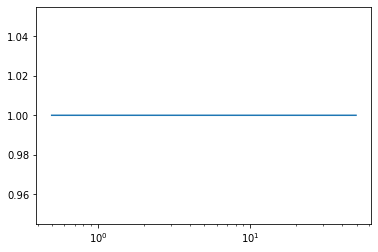

3298
[215.19526243]
0.0
0.39237162620788457,9.979002867616265,0.0029919738669355773,0.00019329908595677,633.5715095065042,18788704.560521208,0.0011284237914457734,1.4772128541929622e-07,162721.3187341699,1138775590.6675525,2.094739581288754e-06,4.2351522715181205e-08,0.7542495365936299,251.07794877348914,0.0003099254525280509,3.968215187005212e-06,0.9598434378276915,0.009750388741061182,801.2035695305227,4.254107437038237e-05,110.49335480024071,0.005563722668371604,30232.88057445594,4.856047378762669e-08,1.0,1.0,1.0,1.0


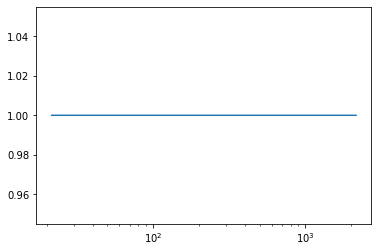

3411
[0.02401261]
0.0
796.9199470631811,17664523.372497052,0.017818950805753322,4.456637579029596e-05,197.0445136979521,91937.47378415572,0.02533493952583442,4.9380780166623787e-05,4499.341440280539,9196516.994066136,7.074395303320663e-05,1.377270418432052e-05,627420.7463126497,15224920364.864687,0.005730882389635782,4.441225046878299e-06,1.3866656382098654,0.0745429552891131,43.46375919295109,0.00031608474477427036,173.41856737360536,0.0036871728765724863,1021.4839550222111,3.2662954907710286e-06,1.0,1.0,1.0,1.0


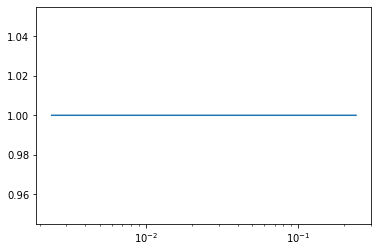

3425
[2.52341158]
0.0
229.60251939909318,12164.77898277142,0.010175571322025708,6.6388465390216495e-06,332.67955843279145,890.6255106787179,136.80822498627353,0.0007021258249852908,461.24299647421407,411642.55320945114,0.6672241577786356,0.00013531553257686474,252.3771509975822,182067.26322572088,0.0008119413458504089,9.749159576206545e-08,496.13511148749785,0.006406316170763275,771.611185658559,1.2421924010506879e-05,2797.9926523406184,0.00021770956977199674,725902.4392391468,6.659614571895986e-08,1.0,1.0,1.0,1.0


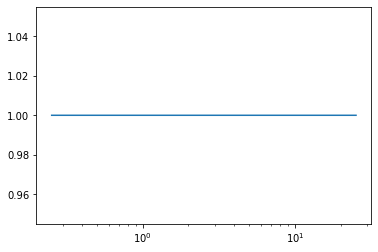

3460
[4.00008584]
0.0
30.282509060711266,405765.3428050831,0.007258359256317747,2.3264452980372805e-06,0.0010588336657164268,5.645287240161917,0.28356763232864957,4.238686169910739e-06,0.24447036072062198,1470.6216561970107,0.0005253693176638595,3.134872977867857e-08,3845.6406115347418,97669549.33930351,1.4325955702148902e-05,3.7141077416414854e-07,59.28168752881236,0.0013208959285340915,12387.161147113455,7.774221056104022e-05,30302.168115372824,0.0001126800328316326,133278.79757648523,1.9255604124674448e-05,1.0,1.0,1.0,1.0


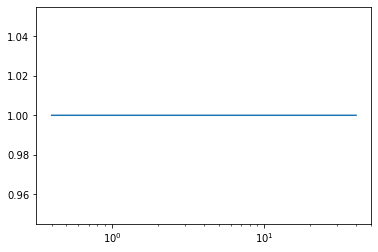

3478
[9696.26965368]
0.0
0.0585491876756559,3.9946791783717996,0.14353031942444366,4.08535827152425e-06,5.371680258874606,419589.47165311215,0.0011831922063143237,2.9133893310049825e-06,1989.8945936557109,648648.4566125753,1.7899983476088063e-05,8.800258980005074e-07,1.3540554393041084,10.980490495739785,0.002770280692899352,7.519297359449677e-09,53.055642401884704,0.7153476029547018,1230.7812712783648,0.13972478968766408,361.6099263754235,0.009054697317198896,14575.491868121508,0.0015286306140122547,1.0,1.0,1.0,1.0


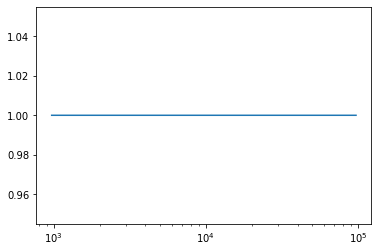

3565
[4.00001339]
0.0
5.912965585895237,2521.4160997227777,0.03716017108985911,1.3430660382026666e-06,182.49649057442866,1115.6469643237692,0.12740386403242926,1.2797647884359436e-05,699.8522813834163,2129.9685137506267,0.0005030529640359196,1.2359184478977963e-06,72.66484757347257,521747.44723254174,0.00022667288473202668,4.95675391203849e-09,57.458057356820625,0.035034457556368914,1861.0784220303178,0.0013575874572620953,4237.350168796432,0.00010951526007882702,5672.81328061486,1.590820324241426e-05,1.0,1.0,1.0,1.0


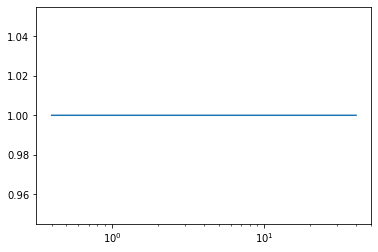

3570
[0.94007306]
0.0
47.77867081605954,193287.3932608769,0.0015318780117641233,2.0900810156651912e-07,84.7656508428968,66181.2884984194,0.05683413012296142,0.00019576871011015557,57074.63287474828,1457828.1140362627,0.0019279739952705844,0.00011906086116857994,1219.8779632270462,888189.7500490495,0.0001130724399549729,1.2656084093939426e-08,0.023135726488565038,0.0016347829720564347,0.5243952815173982,0.00012500610258451008,0.685030208527461,0.00021252109666760265,160.62840303307834,3.8650046832059014e-07,1.0,1.0,1.0,1.0


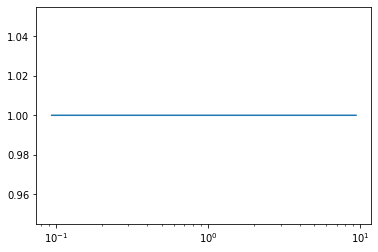

3640
[4712.30377688]
0.0
0.0035980698400113697,1.7328332608018453,0.0025910410330463687,1.0139332358886122e-05,255.52844915640122,35508.3180330928,0.0042042265204202895,3.1185771940777756e-06,7370.426756190507,2039429.2241080452,5.156613642038585e-05,1.5753194004281323e-07,0.02775246180235977,464.0583830797731,0.0005141367791086672,1.5343616685957635e-06,20.413165008913982,0.002758189365940334,28.59887890164021,8.484367125578712e-06,16524.129104040356,8.075736505101313e-06,5488717.369837789,5.12170583565862e-06,1.0,1.0,1.0,1.0


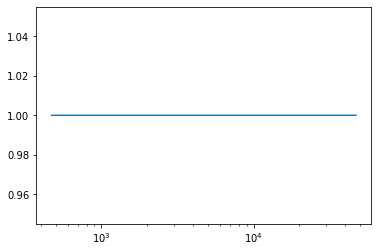

3670
[14505226.97228311]
0.0
0.001434132471571082,1.1757360078960906,25.409450567980794,0.0005556578551858271,476.4432502805799,112142237.22789651,0.02197884359447205,6.338017345332947e-08,143320.95912217133,335691816.4600462,4.1239936414220676e-05,1.5445482863455978e-09,0.017889969269831746,132.64330741579724,0.03622847520815633,1.4520274711930416e-06,0.1535545859728746,15.544917323779798,0.6474902188607411,1.1353652325560883,48.45860616530893,0.02748796287555526,33962.20763342598,0.008900748783606992,1.0,1.0,1.0,1.0


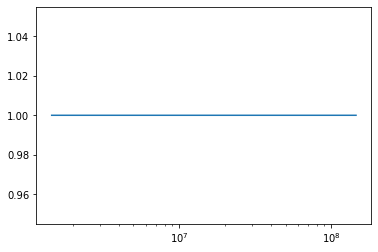

3687
[76636.28564965]
0.0
0.003460301983136445,7.080605339917127,2.0652897318143,0.33674750647344587,927.2514883603724,77790531.53775981,0.0074560335896006165,1.5087019945339727e-05,644652.0235893108,1379754447.2979887,1.7855142761326467e-05,7.5004404663038056e-06,0.4593754266740932,7.67805069377226,1.7106750405879534,0.02016478810167793,174.3970945903161,0.0026671574390278326,19197.974747301705,5.117825837065239e-06,369.9463627969928,4.229535330642309e-05,264536.8923977592,2.751715136348557e-06,1.0,1.0,1.0,1.0


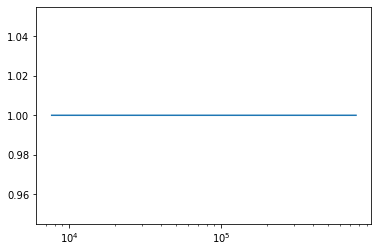

3725
[6.22390201]
0.0
1.311425105217346,6776.144118221744,0.006485582613348727,8.386005278072215e-05,261.43090495895206,478882.8369424439,0.0038606766200672523,3.1544597045260663e-06,17836.608014250443,47839780.79658951,4.315156658545504e-05,1.6043583319890334e-08,423.81053503107637,2477813.9378596866,0.0036836245198426177,2.3715571017643196e-05,0.044131905253156994,0.01069455376518143,17.87181262114815,0.00022587782108007855,2.1680832286345177,0.000893113179528655,4492.182124516692,7.367423859525543e-07,1.0,1.0,1.0,1.0


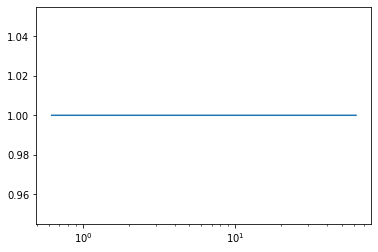

3794
[11.33597063]
0.0
23.1810125269733,173651.79551309,0.4247859148468095,8.235521785569245e-05,123.34213986685862,8771.640562540151,1.9297969636130163,4.409516099073847e-05,211.99126634064058,7538173.189029386,0.01748100206990613,2.725236367161831e-07,12834.666727534648,4393415.710069802,0.01637247158297724,1.2620167683326737e-05,375.09986516753577,1.2326823217708793,236341.079140712,0.0035263229505199073,79270.96128701152,0.33107939845259765,78593981.41035347,9.872349889394453e-06,1.0,1.0,1.0,1.0


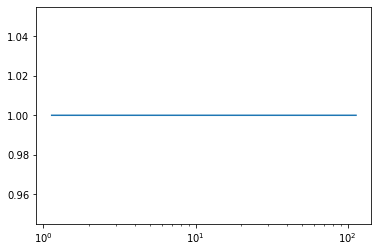

3815
[1.69915929]
0.0
47.90352462921162,45946.06215778653,0.005689329994305562,4.598210412431224e-06,7.024383812137273,2009.3036990813114,0.016094892427129633,0.00014609714467654517,14.381881479576094,46379.475077461444,0.004671633896021293,5.3669824408583166e-06,1165.2247486286972,73300.68407664576,3.0311728553544823e-05,1.8450149862714172e-08,169.1470986713094,0.08384281032574349,4747.980839786282,0.0025171047851982905,16488.006366325688,0.00012855384635711934,5292244.064490799,7.389914140576396e-07,1.0,1.0,1.0,1.0


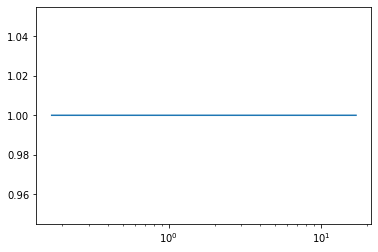

3818
[0.02605105]
0.0
239.489870211519,13574.294080680123,0.029321952391327306,5.18616435786693e-08,0.2975938898414854,277.9501866841391,0.005354159047335051,1.547852300680549e-07,198.49752992135322,1300.5018813324295,1.2256189265636411e-05,2.5031783742785827e-10,552.0319513215454,52151.82929592553,4.99834170334313e-05,2.839124711266315e-10,283.7079536728307,1.4142812212138522,89796.4479443079,0.07122851370768607,18339.599295586704,0.3363518029520998,22351657.749080297,0.0029239876196372975,1.0,1.0,1.0,1.0


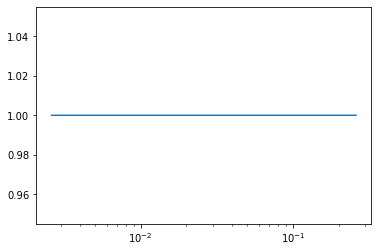

3877
[32637.48064357]
0.0
0.02399020836430573,1.5151942358994122,0.004868748477458907,1.7207345659326875e-05,179.45953063861896,20711.37454188159,0.004283232086213369,2.7269809698325144e-07,3954.9039987028827,3952658.458454262,2.5557417818115077e-05,1.724888934006553e-07,0.3218295347651836,927.3702017979109,0.00012187965827410327,1.804065109873961e-08,48.438104566285126,223.4512172037979,1030.4917208003606,83.77770042015304,66.36256604952449,0.9206732438535175,94664.469609933,0.0898659735863867,1.0,1.0,1.0,1.0


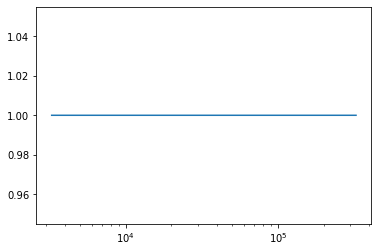

4043
[0.71302979]
0.0
265.06579420963635,23085.411155524576,0.0010306828437482713,0.00021675674719771987,238.2503128311198,168739.4415745002,0.006448844847426529,1.5225397911095582e-05,407.95627903458154,12557658.221800877,3.838474762039514e-05,1.580503993407801e-08,7236.583962130842,1033330.8082442246,0.00031438804053748653,7.324320389283097e-05,0.9772226733656904,2.2407937021409525,349.1213567054318,0.00291833030567058,1.9342481719108497,0.05428516936081412,213745.04295086153,0.002485358611911774,1.0,1.0,1.0,1.0


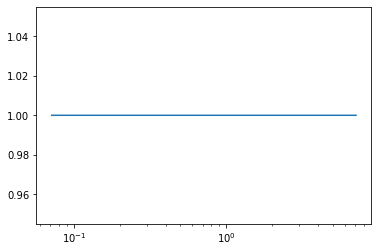

4061
[0.02661805]
0.0
487.74853968767457,53409774.979149915,0.006403264863381795,3.8770915281266e-05,609.0066458757093,5284.662896568771,4.8210984879273395,0.0003227947283924819,968.0831595886158,6766.939158448084,0.1864859666673238,1.4525375425360813e-06,181953.0995825091,53870183.896853656,0.00018197655798885695,2.108874549106201e-06,190.2832967000653,0.9662029980276203,9811.354945976029,0.3297067373154658,25333.62166135855,0.003993111853110888,249247.9870891779,0.00015477032997716743,1.0,1.0,1.0,1.0


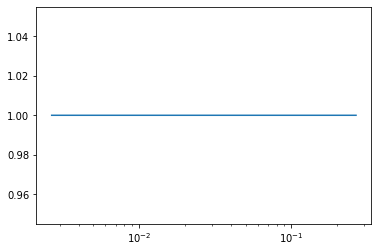

4180
[11948.41601042]
0.0
0.009088715742653469,412.5433548083107,4.3694246044160385,0.04815411780678552,866.0385464131687,3478745.0487022074,0.0013826854956824907,7.246915185298709e-06,4436.26101458359,7644177.03587526,0.0006259358894052412,1.3380341254881834e-06,7.558260579016118,576.159471495837,0.09501764566274555,0.029753053000141597,453.9432743051262,0.21022476422532616,2661.112664147309,0.00526298866065524,351839.88919625257,0.0005170655931086607,30614858.78380779,2.889888701485157e-06,1.0,1.0,1.0,1.0


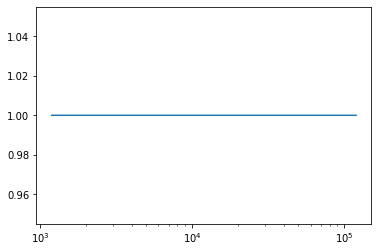

4184
[1768.31195657]
0.0
0.5091920472887125,11990.99886221157,0.38281609480694284,0.007766531365591993,0.96294346547992,4074.7469955258966,0.04720134309172741,1.0033414743344016e-07,21.31226209934434,46950.896199928466,5.900621299014021e-05,2.1437783707763824e-09,16.662676136159583,980777.3738365597,0.028815390226196266,0.00042781357959219046,236.2378782521809,1.9072026621662908,21118.220187386367,0.02829063487213169,889.738387048796,0.2170096984285166,329526.7665320237,0.00048673952242747425,1.0,1.0,1.0,1.0


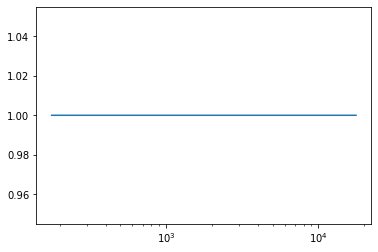

4204
[264404.41657599]
0.0
0.006985765805005953,7.472387116781761,0.052689796774179454,0.0005253561632931077,53.111326604095694,1360368.6859315298,111.73012788528155,0.004211582951050295,37972.91888729899,27430585.50719205,0.21287129911451766,0.00019638966839627327,0.07871111183745157,3993.044379599413,0.0005460150787933955,1.9195912039873893e-05,72.84292214291281,0.06664992984111404,36322.60616433692,0.01080594159242209,28607.05181324315,0.021851341019078555,2140750.8534633755,1.1223310358139422e-05,1.0,1.0,1.0,1.0


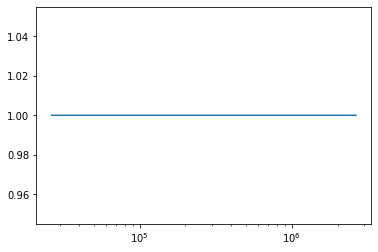

4233
[22.34218114]
0.0
0.015404149255793566,21.775213587913505,0.006032198232778616,2.625109147704233e-06,0.024667385411358298,18.95674349160946,0.0035570221475027058,1.4061328579589421e-06,1.0964991788668528,4792.598715117068,1.6953656838130566e-05,1.5774110512135357e-09,4.41098672075505,1813.864493679035,0.00020990800020259675,3.936941602534475e-08,119.2834583645325,50.77447719803089,5550.341691525601,4.47867714768225,2256.584614309549,0.33347573218642884,3898426.0577001465,0.004810041887873636,1.0,1.0,1.0,1.0


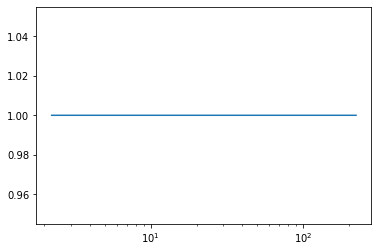

4268
[0.0078315]
0.0
77.52941749426459,106064.10196299608,0.0016293753302986536,7.157978979840912e-09,82.94057390276147,3141.9882439269904,0.003818297263093475,4.273065682285716e-06,189.95723934129575,306888.588943365,7.671368843949608e-05,1.3438525149873764e-06,7397.339803796579,302679.0674769415,3.7286178606581427e-06,2.794355425533117e-10,372.72760935284236,0.0034640105877537172,1166.6269087580556,0.0015108183659750826,14647.969774226276,0.00028137830126205273,1570468.60092554,5.832510318125156e-07,1.0,1.0,1.0,1.0


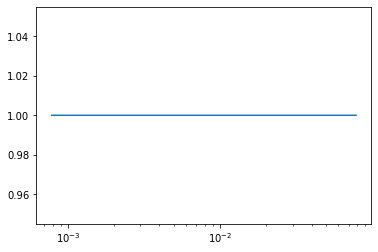

4318
[10.82637297]
0.0
81.1755053457992,5366.812613417174,0.06326160883600403,2.6383613082309886e-05,471.83671340917584,488373.6258244582,0.28414747659919576,0.0025169019182586906,178786.43773915258,4836496.727760018,0.016400464562876377,0.0012924502480120387,1549.5211455825424,453887.0191820273,0.0006811618446275374,5.984553434561488e-07,0.17794480206689636,0.2565991030460085,95.78436703349576,0.0011597738025697346,0.5038155708356574,0.12400715110311256,5664.62382700228,6.870043023042368e-06,1.0,1.0,1.0,1.0


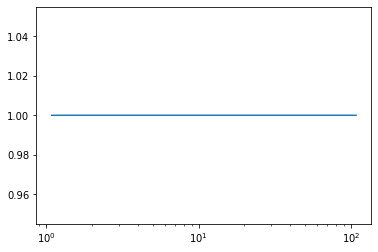

4320
[45.89778233]
0.0
0.11534603873944545,3.334889907283954,0.0037863335908359923,5.055938009450084e-06,580.2196491107502,6977.115059917076,0.018056733616336137,1.1167731314890975e-06,1468.7193061905057,1464653.0255120196,0.0004251608421928287,3.527143873072303e-07,2.9271963076065557,180.72594158883734,0.0004664539572625283,1.9444683317259153e-08,807.2338300932845,0.007836145872280851,171096.83492351536,2.4900160765049885e-05,8446.585508838112,9.133703101475284e-06,182983.2862267425,1.0939132579863008e-06,1.0,1.0,1.0,1.0


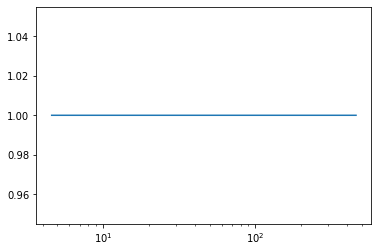

4353
[902793.59564624]
0.0
0.001643599845751498,1.5485928421309523,3.634456163232846,0.0845719423983229,354.50912930148144,15525670.770008111,0.01065460783959195,0.0014540090535411325,44368.04415005089,50557431.21743891,0.001544320235252777,5.00157002815821e-06,0.04628326976756294,25.16984012934838,1.1615326844477296,0.04471903121167795,910.618839306251,0.01733230258241066,39791.49029666607,0.0003247871713700518,21242.354374704406,0.00013831482331760407,6422363.623509038,4.924208411282246e-06,1.0,1.0,1.0,1.0


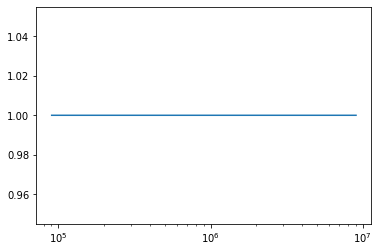

4371
[0.00069793]
0.0
335.6314673331734,155601938.74378103,0.0028030155169737297,3.0930860104985047e-06,42.72276311406284,4048.955452945653,0.31830828784368365,6.306371272480214e-07,1251.1636337586638,474428.4184093838,0.00048491345124048585,1.6739241215940255e-09,186802.2522768316,10161330164.452204,3.9995323547464474e-05,5.912736034421724e-07,5.68802089721564,0.4085035101186054,461.0577361255461,0.0030052379275372276,5477.088324859404,0.060438433320304144,175743.56405805616,2.428986655450466e-05,1.0,1.0,1.0,1.0


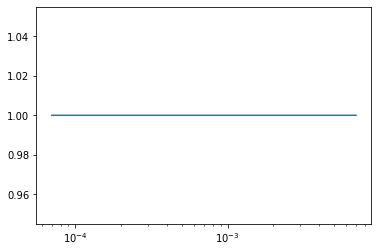

4420
[2510.44917559]
0.0
0.054673973467404414,547.4472647777486,0.002487700742232674,2.716957904363315e-06,82.50181339931434,152669.07527619356,0.08497503619000787,1.1922090420566057e-06,26024.95403609498,34840055.185993336,0.0007761768282304677,1.712524712813197e-08,1.0719730879303335,24172.81250057382,2.8486149746923335e-05,7.784701296739273e-07,13.352235499525912,0.008036428535466439,142.38246202889204,8.430660555714007e-05,424.7243064150243,1.931438001647936e-05,1427.0846205638431,7.748182674002327e-08,1.0,1.0,1.0,1.0


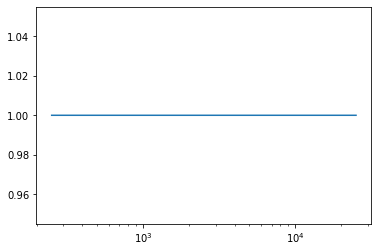

4439
[0.51775597]
0.0
43.39628220857102,806805.4855764188,0.07660177282759581,0.0155388648256432,423.77782641699304,2449.1113184349274,0.016016922556395995,1.1888835952387131e-07,1478.0829360732955,286248.19835792686,2.0259294362334814e-05,2.1042051452080625e-08,4485.071845973584,49547308.17067873,0.05953020737975056,0.0030112356835341907,9.807935667450922,0.17830354060944767,304.40175410060266,0.004935203201830365,38.69887180830157,0.05655998871013535,86573.49043364644,2.3189795142891472e-05,1.0,1.0,1.0,1.0


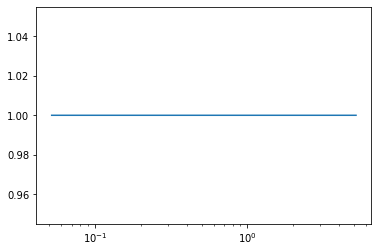

4495
[69.08858337]
-1.1102230246251565e-16
196.96218776450138,57494.62404796848,0.24092442343164944,0.0035030295562973428,51.623847674987594,6733706.814430003,5.69068359230856,8.078640975856097e-05,18075.097995079286,16857463.743885744,0.0684856698076176,1.6745920099663247e-07,300.09699630038125,267812.37369481096,0.02090563972670026,0.003281241895870256,535.5504323368772,0.1150959945912076,77229.27216317318,0.0003075561544888083,93285.82532120722,0.07990180817275083,24157798.598553736,2.2414503283774e-06,1.0,1.0,1.0,1.0


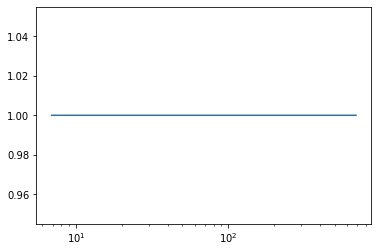

4500
[5780.71138428]
0.0
2.499295096843069,25503.30344731163,1.7391139349060618,0.0015072779815521306,846.1996377816797,161906208.9286931,0.001539584639676189,1.0492344419144258e-07,506572.69176914846,46983038648.99121,2.4529706354358073e-06,2.6692902668698623e-09,68.62484900311617,134640.8312568554,0.004279974203595065,0.00018853492085574414,3.694200124917977,3.5851506787715315,16.242167131576075,3.1654116920970288,15.35137578546979,0.391559268014119,466.8892392999853,0.02369276624849203,1.0,1.0,1.0,1.0


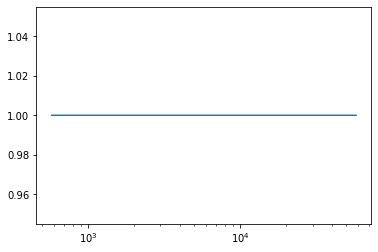

4506
[122.29327382]
0.0
270.72208627965847,3715.887614193158,5.910318475012401,0.3322213899341695,39.26920807051298,1018503.333643438,0.021564743402182195,1.6079617982944708e-06,16108.80476781781,142083574.8696223,2.6169201225519567e-05,8.579876895446925e-09,1243.7536393761334,34151.841074377684,1.6413811513537113,0.005384748668609964,404.3496964454936,0.01071947799854295,140638.89669754117,0.00940308146132267,4149.415775972935,0.010363726627222293,233550.01665539754,0.0017382119791676592,1.0,1.0,1.0,1.0


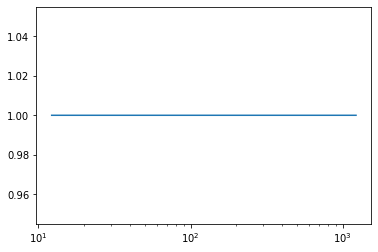

4515
[1.3834031]
0.0
0.19244991805346956,271.88338913909956,0.06402388140286142,0.0007978014906728083,274.20821369063674,120460.22925962125,0.0011019550791007838,4.124241992784133e-08,410.32189253429465,74114228.90229852,1.4214297115377208e-06,6.701580331081702e-10,127.37848193363574,200475.6240259074,0.003927458699212114,0.0006313140645399931,0.27219725536147976,0.0028882505433369793,39.74975373297976,0.00027412339264719615,3.0331075103980694,2.3157507280732393e-05,15552.699928548558,1.511170571534176e-07,1.0,1.0,1.0,1.0


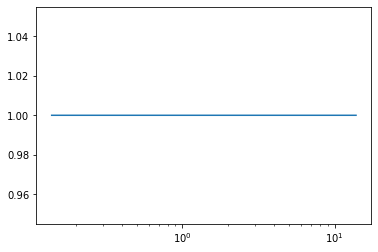

4526
[802723.34971627]
0.0
0.03571570893901715,0.23731208911663895,3.1299072095753036,0.0009812133835144325,240.5203958352066,15510581.403220078,8.629607184563715,0.0010542311596717408,99529.20957462011,14857106053.788397,0.010797396047624688,0.00028979228019050115,0.09040725868614308,37.996877169822554,0.012319823751042031,3.0261979075741092e-05,0.2552792908073198,0.025697623914187326,0.36029213737540733,0.00021202143343983023,68.39722534716631,0.0002185550078773406,48981.65852696721,1.7871465324355082e-06,1.0,1.0,1.0,1.0


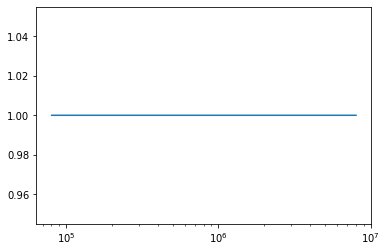

4575
[13897.42391724]
0.0
0.01869728331689842,2.151952677592923,0.007531572075709712,2.6915255047751686e-05,2.6919403735328986,29822.482789892474,0.017603074868385624,2.2264713825706253e-05,254.02770075514988,14545562.600819511,0.0006356834941580485,2.3692016480286502e-07,0.06301541040596098,209.68815101221995,0.005175983935202988,2.1625074263932335e-07,21.267393155592533,0.0055071440769210375,173.11097061470517,3.2192896758109745e-05,354.9699233767724,0.001977667269400715,119270.93816059787,2.9310689445313983e-05,1.0,1.0,1.0,1.0


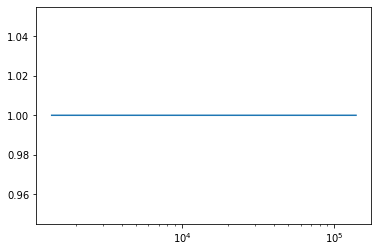

4581
[189.92805066]
0.0
3.801969374931329,1748.2450466740975,0.18518440312545073,0.0005135344385004766,4.3743233514004505,9626.329269218397,0.0033719920937921736,7.91466260488191e-08,33.96952916060422,932927.028628526,8.64614253009531e-06,1.3840638716758253e-10,211.02248461173622,3149.070539487568,0.01443599607158467,4.4505380869938435e-06,721.0433530137201,169.6846402236118,372249.3924947472,139.2938698230494,1067.436948590574,64.3370854149149,352438513.61381024,0.720323591832449,1.0,1.0,1.0,1.0


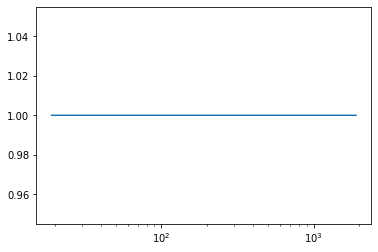

4582
[0.00229594]
0.0
777.6491667389658,2548772.8879670664,0.0024903256266544938,5.673713952424499e-07,7.505284471448334,17165.238605914576,12.614467593870673,0.001080938289247389,522.6630918680021,868696.1704346244,0.2563635216229129,2.712413586177874e-05,232400.53202697853,18068689.74440731,8.636505534005194e-06,7.687902854283049e-09,215.5086118934189,0.004828809923399241,62841.290907750095,0.00039988061768095296,4847.783296523559,1.2193119429397217e-05,770134.1205218405,3.9497193939334997e-07,1.0,1.0,1.0,1.0


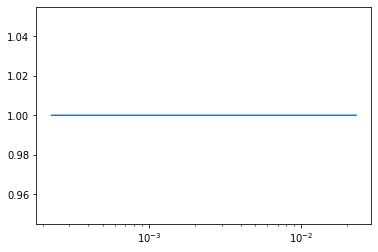

4591
[2481.8581088]
0.0
0.34961025676576984,57.48903523474073,0.623441337859722,0.0007415002784338938,43.818529178030055,508378.0779959978,0.00901603885540383,6.655191661561743e-05,12088.830982379319,37201462.77448365,0.0009540116058313288,1.6294867731542897e-05,0.9734474255284384,47740.32403128877,0.013411628888305924,7.879492702986409e-06,0.20104813786522083,0.07670281417695617,0.25047872358436557,0.0003193416917890244,95.11523826663694,0.00014192519253300215,3609.978291113519,2.551466551357973e-06,1.0,1.0,1.0,1.0


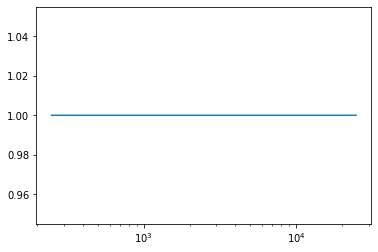

4613
[0.02971627]
0.0
19.391300899605433,108535.98130617265,0.08226539826396176,0.00017564079027767226,967.7108112936,55848.97738883332,1.2332479240680698,9.106138672349787e-05,25017.72308536407,745228.1609177979,0.015667129746595447,1.060642260969426e-07,3680.446127599404,3801636.790212901,0.003228090577033684,7.194014652301501e-07,143.1462778979538,0.12249406545646645,41143.28011124852,0.06702578688981424,10489.800695294023,0.010721420283750043,37268022.25032521,0.0003926025508947841,1.0,1.0,1.0,1.0


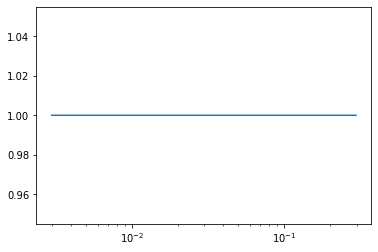

4637
[1.8024719]
0.0
53.38944682831807,24615.2411955545,0.0010142707660805367,7.289219195277085e-05,22.06097314356117,8824.71768924211,0.001216696826981951,3.1989086832999626e-06,4144.554578351986,137588.15206463376,3.470131608349569e-05,4.8017840684678225e-09,15659.897958504873,14914129.971916744,0.00070247187462208,2.9155201639500413e-06,0.007093950681469982,0.16878332182955283,0.32677439698441363,0.0002180612706192771,0.06922754853306752,0.0006442214583028835,10.921233978140075,2.389470245658891e-06,1.0,1.0,1.0,1.0


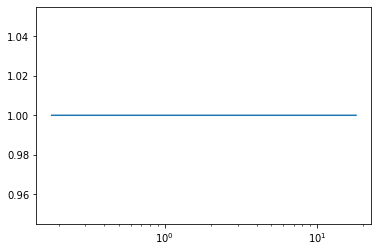

4752
[18855.21497739]
0.0
0.035473791195712805,159.76106925124685,0.07588359440403257,0.014676463573731782,0.024350353043039515,66.30255081216144,0.0015757902780017918,3.284194408995277e-08,1.501687075551466,1546.3133586672031,1.70689227991638e-06,3.200654871780915e-09,14.628269299376111,453.5012169467598,0.04974661746970277,0.0003759080728173464,538.5269238688668,77.47802064673304,399714.5413712224,0.45638688914839887,263879.92856937245,59.183851461613656,2002174.6504011452,0.025569754808750116,1.0,1.0,1.0,1.0


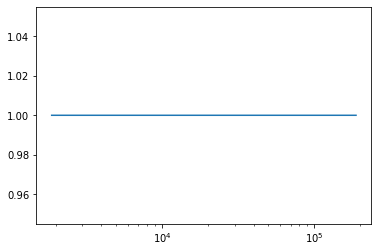

4785
[1284241.34444691]
0.0
0.0024862620001702726,2.258729156739421,0.005414106532269411,1.0336655717758116e-05,1.8599947017891705,826.3526355786797,0.07271451543797759,7.38960550804184e-06,685.7140967351186,231178.0410743824,0.003932542458553548,1.3673653092398182e-07,0.010616291987356604,243.69375424529608,0.00018505554314769568,5.205582509111131e-07,130.3332116506537,143.53074638198072,4644.382026464232,0.48206062689648743,75148.91880690008,0.2552359181028367,161977.45815608188,0.015574741067408419,1.0,1.0,1.0,1.0


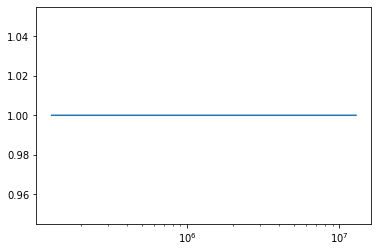

4786
[0.01078578]
0.0
66.99075301219315,2890910.4774748716,0.0039060534348619867,6.052994765296354e-09,131.63177891864666,517883.6677464072,0.004088098544833651,7.963904160891784e-05,6342.152522107124,79011429.56500922,0.0014084805655841326,2.3392860566622637e-06,11676.990335114619,487356494.70436835,4.640965615655793e-06,7.52985218351826e-10,676.6582110896919,0.36678521195275837,13043.475819361438,0.0005956373812424262,38208.19985832251,0.11468797946197308,79434.67108344944,2.3064309545544577e-05,1.0,1.0,1.0,1.0


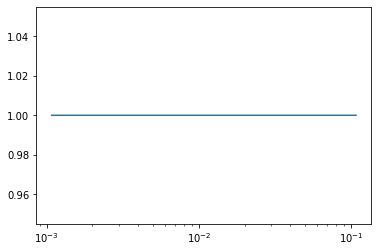

4926
[4096.67500534]
0.0
0.031023791014739222,104.14400807856799,0.01919549325538793,3.833488886265818e-06,370.74832761262314,681982.26300139,4.361836198428848,0.0008520270083722081,1624.890632848721,164884279.39304534,0.00546479342259222,0.00015349053691237756,8.751721321210887,712.2144532110447,1.989257652764408e-05,4.252883958538682e-09,29.822407328260685,39.1800441935629,44.07556636830429,5.676724748710725,19334.864163072125,0.36934396269792824,6865536.505194082,0.0031519755509695083,1.0,1.0,1.0,1.0


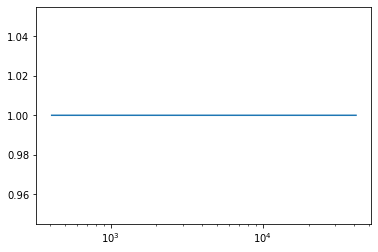

4927
[2514.93900845]
0.0
0.003985274661016086,0.03915870366966573,0.312527962823526,3.882228609452091e-06,548.624908423185,3971543.4386783154,1.729465801455121,0.0003420706568681082,10093.084817211948,823694355.2875738,0.03653459078881184,6.59527064920059e-05,0.010591194684396767,13.10593662782435,0.00310219566589873,1.344000932795017e-08,17.664260093205918,0.009220737039828156,2049.5322364562107,0.005491385301513635,293.1208544201013,1.1507757903245273e-05,2038101.3049533416,1.0421005750665846e-06,1.0,1.0,1.0,1.0


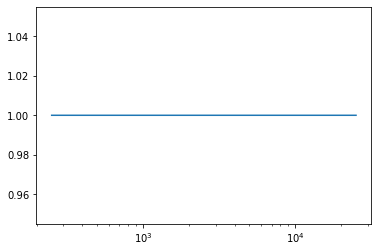

4944
[15.48729908]
0.0
6.710698399355379,4313.593622456623,0.00803780038605177,2.764521674434109e-07,0.005224707692818995,83.41696710253672,209.36757923878207,0.0013956613446596228,0.2576488554401101,9891.470673149193,0.9230514926315994,1.5020270432394628e-05,130.66932336525912,232526.3474238228,9.997909569816683e-06,1.7667281313673729e-09,176.03301008673137,0.01246194683006124,150371.5781573028,0.0006411026070995674,56507.073249720954,0.00011495675086384656,2683331.3890013252,8.73991519407504e-05,1.0,1.0,1.0,1.0


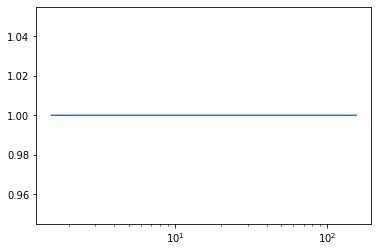

4946
[1477.72731108]
0.0
0.4364543654891418,1061.7961139045185,0.6262776407989654,0.026279277675538143,419.56301533670705,21637970.382029448,3.325095736152009,0.0008376307387287841,43824.59042129315,239308210.70597455,0.4512400842776568,0.0004850128483641574,2.283471785620873,25383.96032456707,0.2166611462275036,4.302744721706555e-05,421.3171007031333,0.011665817010404986,97641.3931613302,0.00011761491120663153,133260.3991943242,0.00047573639344377,70489874.73211372,1.7901617652737242e-07,1.0,1.0,1.0,1.0


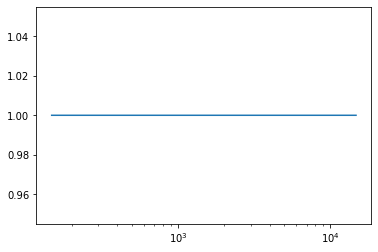

4960
[3.33776199]
0.0
23.02469386935775,1985.4472628948477,0.0012504976325775205,1.5284201017758517e-07,0.06797045208865575,246.27268734027246,1.164476043811943,0.0010339847393908744,4.056914000260877,4992.195959234832,0.2241367168813983,2.578656531255624e-06,67.98197825101232,199776.93345655248,2.3218508815782154e-06,7.230788830107621e-09,263.2312834185116,0.01941156624933396,612.2655730717848,0.017169885598634457,75550.18535512073,2.4432273386698793e-05,22453141.004271176,1.2263310365572795e-05,1.0,1.0,1.0,1.0


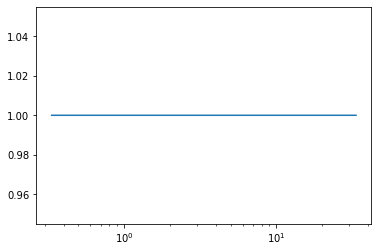

5024
[26161.08071579]
0.0
0.0018772648503656124,122.96132296987498,0.09967855014889149,6.97662179071213e-05,1.0896767720127,31.04914240426277,0.006925719087140291,2.3970746739815378e-06,2.325785448681627,20157.01065148535,0.00017709431500126675,7.47187040958827e-08,0.3573560715347793,11211.787802545252,0.018070946830946552,1.111686651966704e-06,798.4505389787581,6.6320996991601175,3887.0616587833047,0.015246303828906555,318280.7307881239,0.7393630613522714,18442609.13809385,0.012111144750485768,1.0,1.0,1.0,1.0


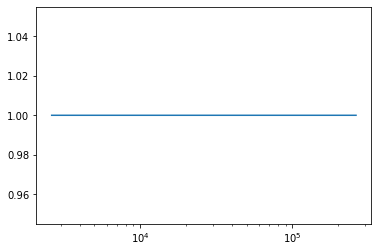

5031
[5611.98852143]
0.0
0.10095468479258334,9.349537151268127,12.41000783821353,0.039096321118277017,312.3385497324983,10807509.73742696,0.057193360380152804,6.59365880502819e-05,42397.74022094593,16543340.236196898,0.010548311807441627,1.387946468414245e-06,1.3734281926038157,19.779281214804463,0.45231441914510495,0.00016518858911331635,1.51893685377741,0.0025153910871578314,22.759678745051204,0.0024904695458444347,8.530818900214124,1.2050977996924623e-05,2073.388812412262,1.870853248966398e-08,1.0,1.0,1.0,1.0


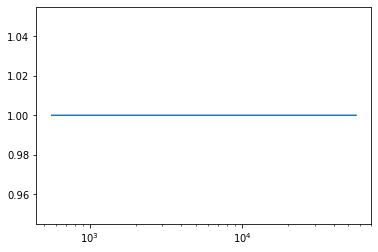

5039
[30616.95070847]
0.0
0.0017561184294355803,1.238048268196693,0.238429091694939,0.012719082830168121,2.9168887828520744,238.72367079227308,0.0061334469506988945,2.066039805101184e-06,3.2114816973059406,219417.08758391574,0.00018193254396586198,4.47104573928011e-09,0.1513162583571473,9.71704549031583,0.032619189036037236,0.0002579672043823297,930.4634025767385,0.06997310192211335,6173.81397451741,0.010567251774186966,19705.431641999847,0.004064657543569836,118926.12996521288,0.00022117512250228652,1.0,1.0,1.0,1.0


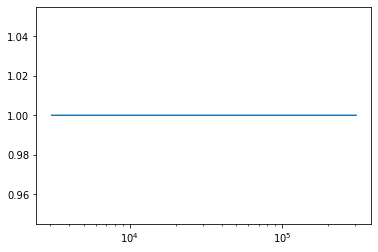

5055
[0.57089229]
0.0
266.3132005810793,33314.71524679907,0.0018300267661232462,9.751096528569389e-05,0.007852492702869635,405.8230696690284,0.015919493961350843,2.951901255843806e-05,0.5014022911571023,136760.42087912533,0.004028593726335432,1.5670028431214847e-07,1472.143156202578,622987.3612595957,0.00028740139277344046,1.545679043298744e-05,16.14943344006586,0.010217443954266879,28.9484792462841,0.003053281894101784,3518.0705756292923,0.0018255747538426647,395609.6828616884,4.3750449557630556e-05,1.0,1.0,1.0,1.0


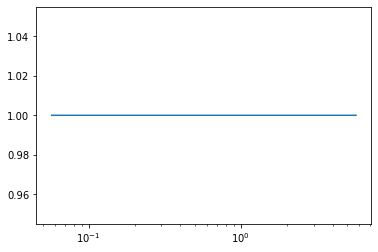

5098
[154.27149783]
0.0
0.03528005526324822,2007.1767758589833,0.0030567494290549657,2.304176195277479e-07,104.44337521361336,4703976.735141554,10.97824039546364,0.0016109715800903819,33932.614231186846,44013200.18613922,0.5904537401608458,1.382905056730305e-05,7.566424968749144,76677.19415076332,5.480213075355693e-06,1.607598129614129e-07,83.32538316370415,0.0025448209455924587,8165.543347040442,4.134299491883949e-06,149.81175640295197,0.0012874171712404369,8128971.375041349,7.016160467338895e-08,1.0,1.0,1.0,1.0


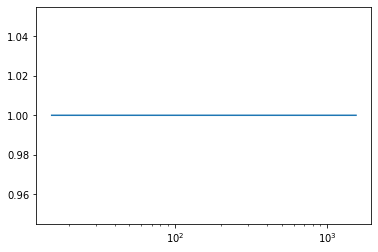

5261
[1.62380764]
0.0
406.01359733060355,5773.747708280802,0.0011638505953529945,1.139857064145167e-06,0.034303595387645054,13.51955904899697,4.933149531036821,0.0006212741349570737,0.6507191492752323,757.1782754808092,0.021690954802834995,1.1487933422996988e-06,834.6934318278746,260646.35736404534,6.723884429772092e-06,1.4077535044467148e-09,56.66365352016786,3.8013652177020156,13246.653828213735,0.21093526174123534,35637.40054272497,0.5064003453728009,14140141.23744667,0.00108148826828339,1.0,1.0,1.0,1.0


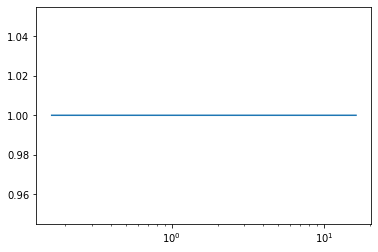

5308
[41.51866991]
0.0
0.03744108059795288,2.694841983571636,0.010830731236152094,6.530010234606197e-07,0.16209649892102154,236.66193462152023,0.002276799176524765,2.727885000257101e-07,0.5348983590632308,1831.4778640543452,2.2517721624378127e-05,5.70952448663455e-10,0.4135060205539175,517.8712343374201,2.7346327777068104e-05,9.60597246416488e-10,20.465203366416223,21.252935475204687,16691.28296277907,3.173344992920219,7837.593267750955,0.3199999810953275,3740225.370635162,0.046902332663341206,1.0,1.0,1.0,1.0


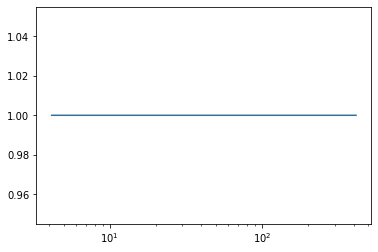

5332
[300.50026931]
0.0
0.026763258584134007,2.771871574784487,0.4607795034306414,0.0003066367003521792,123.63466808931636,308045.4738030876,0.10403110569992324,6.986277668543871e-07,31492.426207347828,2056150.6964494146,0.00013655869145224217,9.47803580366188e-10,0.7621809298527787,104.33791406988978,0.13062148636497192,1.765604212550546e-05,406.5048363657726,0.030808632351155066,582.0887945754838,3.169292177870123e-05,29486.661344319382,0.0010549700673199661,8690794.513180356,3.7538350613783484e-07,1.0,1.0,1.0,1.0


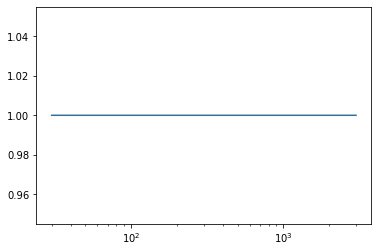

5336
[1217.75311027]
0.0
0.2960852076131165,53.12192129941991,0.09534639028346492,0.0013892905824173221,551.4780911093683,1180775.8783605485,0.056841261746690415,4.0960847574952594e-06,4038.6672533468854,12389355.776687635,0.0006662675208219439,9.469206596570933e-08,28.602427613320724,7567.801292386222,0.024335286324192153,1.616416682292806e-05,2.015971929752872,0.0011020439978452906,742.883664578381,0.0005744531044137798,1518.6668517349774,0.0008592464506579662,72391.71047814448,5.490285304623622e-06,1.0,1.0,1.0,1.0


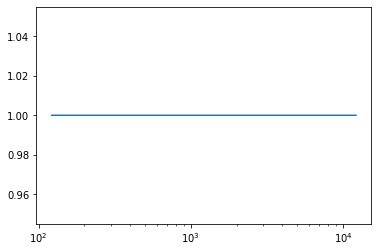

5393
[51081.73611515]
0.0
7.907160919279249,32.16318476635934,0.0024284184187231645,0.00010403126442056153,51.948678921369,24777210.386004627,34.017609347733874,0.0012347809860108064,38434.359842495025,118941985.04946823,0.057468761827276955,3.946033242499261e-06,17.376647557199664,11745.73897919501,0.0017700753967435374,1.7094410598030894e-06,228.7381558948621,69.6151325166304,5362.313412890336,0.7267419884143441,16700.73582955723,0.12219508646832572,1957968.73301402,0.027388699818752686,1.0,1.0,1.0,1.0


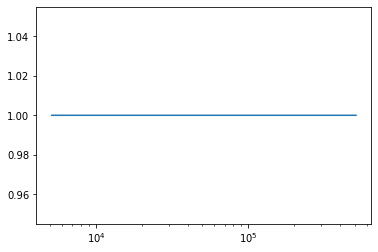

5470
[23.71043881]
0.0
0.16314200022883818,54.677021099293725,0.03025448617645232,1.373738749863152e-05,0.5177063184890788,543.7523220963708,0.0023854220552317917,8.412371581481967e-07,181.35867444132782,94377.21153579206,0.00016878376177569858,9.643590968065598e-09,31.839973704994264,414.87140075581885,0.002054829970895471,8.976608066634776e-07,4.591941601340887,0.0449519721056144,16.84878074802999,8.848797976569975e-05,2564.0690881148157,6.734045679821731e-05,2554822.261760563,2.8683454494352638e-05,1.0,1.0,1.0,1.0


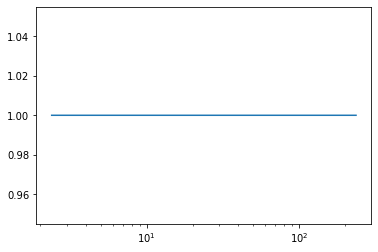

5474
[95.71538691]
0.0
1.1109992545122378,9039.263874063718,0.0010805358397812355,4.551508097779364e-07,0.014180595514190347,126.96032792896382,0.035640531706364095,0.0002712270613177173,11.196239643625402,763.9909073974518,0.0011958416180928209,0.00013794353443729877,472.5754007889902,6851326.672986483,1.79848584745206e-06,1.3648989236523881e-09,345.26026792795477,0.0022557952291237587,2955.2500983239274,1.2279220603789404e-05,225456.63820838273,0.0017793282316983152,107675750.2123121,2.780917675496819e-07,1.0,1.0,1.0,1.0


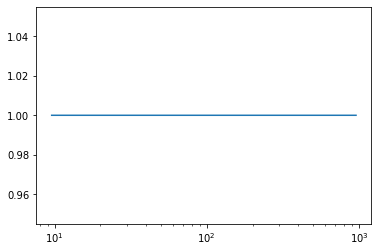

5510
[1048693.4816402]
0.0
0.0025732942301208883,0.41776608699940404,0.026767002574623656,3.3699141757459635e-07,607.6091228061063,78688324.81888986,1.027168600510106,0.008210837408538887,137041.9655601294,346588789.0670487,0.21746795936307356,0.00023434095788936395,0.006333603659801242,0.43278536747204344,0.00021165813121364126,2.327694572815978e-07,48.369176709821076,1.2589313250711722,4184.450059745565,0.00930889518419547,14667.978004837252,0.0038583929375527984,15021.560731370608,5.760085349498886e-06,1.0,1.0,1.0,1.0


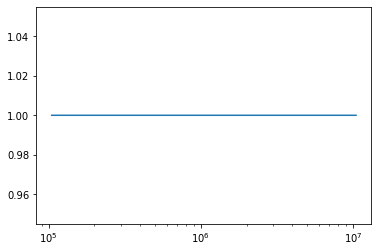

5531
[0.12899378]
0.0
37.38745411921954,85620.46405290155,0.0010038515159699966,5.096538802148523e-06,4.799331202793926,1257.927292651402,0.007612920148358783,1.7940273027304376e-06,8.636571328376544,30886.370093409445,7.89380906370404e-06,1.2708073838714037e-08,421.2718779308603,147439.54920550602,2.3809033577108428e-05,6.3001850455598264e-09,1.213625834136525,0.031981674581863774,69.80377527441632,0.00011601989491992652,46.779528089253425,0.021409144674198723,14516.041062014057,1.77292107578599e-06,1.0,1.0,1.0,1.0


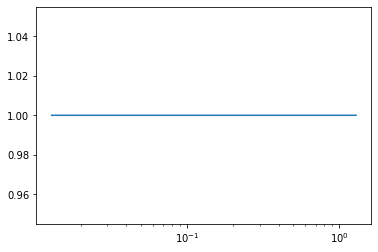

5537
[355.09345288]
0.0
0.29881632926548524,1262.0040779190506,2.805991040381416,0.06398125484482776,15.394528428588835,4214605.309728456,0.002483560404533464,1.2125787180698049e-07,4341.137676982429,3357472812.5711107,4.540681162471705e-06,3.4177566503777847e-09,112.6577922886728,2838.6091181132424,0.10041536285465812,0.000263699422533719,6.917340587325349,1.0017819271476214,2137.486166592683,0.01689858099786181,411.6801472537959,0.06456713135982768,37991.71862085821,4.29137176838072e-05,1.0,1.0,1.0,1.0


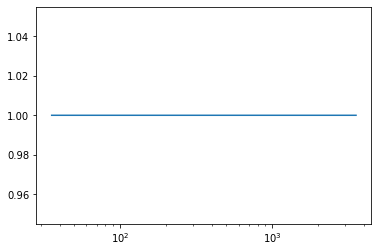

5542
[0.49494932]
0.0
93.27058009107051,49901.911368016576,0.005517312727933093,2.7099160903220468e-05,179.0767623056868,766898.671586761,0.34050357743628457,4.567812509148158e-05,40377.7988276189,26340784.433768217,0.0024866300293494574,5.7661259691067255e-06,431.73228563792753,13120287.537944606,0.0004942164105975057,3.351378160566402e-08,10.762688940942159,0.003053894250567207,1037.611987300873,0.0016345596906034098,23.304166093426602,4.5545806869603777e-05,124908.79686636048,7.435253003192792e-07,1.0,1.0,1.0,1.0


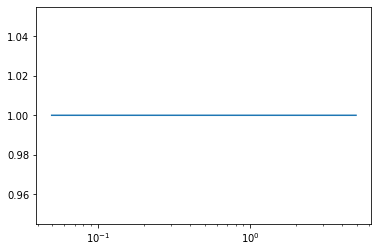

5553
[9465.24560567]
0.0
0.009869419535517366,6.814178639186331,0.09734323022404441,0.00045877150936153197,3.392349472890637,178041.30429700232,0.5130572355373466,0.0005136170024437326,315.27885665384775,335927.22532983316,0.00625028614813992,2.388992336844519e-05,0.24574547697890753,266.8643322443323,0.0021814898906604785,1.0743354809933354e-06,125.84156945262873,0.0133511750066561,1211.845672453442,0.00014732291541975204,9688.555102943816,0.000993067232054961,884351.6540345869,7.574681226648918e-06,1.0,1.0,1.0,1.0


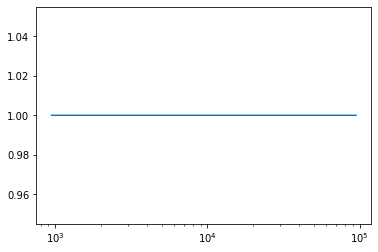

5629
[18616.3911776]
0.0
0.08699609298609574,9.951879531184371,7.771987955685475,0.0017668243232575938,315.1695087243991,15129.38561510792,0.041709736140907734,1.4429500353436357e-05,2058.190590028213,2461979.631713811,0.00019104444728184087,2.4886094938728863e-06,4.007908563724609,44.65619606364994,0.22127496003988859,3.981283825308672e-06,932.9542417980604,16.30117027025435,58496.3368492332,0.049579713567758185,6756.658525617698,0.29066238055875004,30787318.70073491,0.02412418051682127,1.0,1.0,1.0,1.0


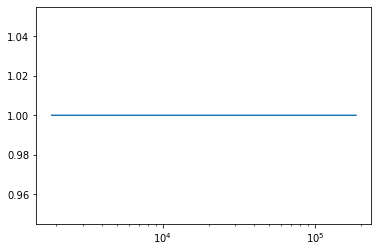

5670
[60.64454414]
0.0
22.810129423762035,43.48512046872645,2.1905478128171447,0.00027178089677574687,105.48553347112258,289794.644987877,0.004395187835575986,1.1614144270409934e-06,3213.0031443215735,134140399.83258697,0.00028558228981875725,3.2606064999232737e-09,27.360912782359126,211.06973480175438,0.05265653165449787,2.7216060630294e-06,555.2892806656741,34.094409718994584,76321.01260084791,0.17159709223752448,658.7388693694281,0.04909551108261892,79819.40520246541,0.00015308795286296309,1.0,1.0,1.0,1.0


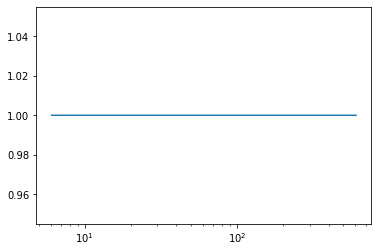

5859
[48.3741346]
0.0
41.69992741631678,186.53534136685244,0.001203835419572011,1.7706412901943405e-08,0.10869208158788793,182.4549398191493,0.9985341263405241,5.360801090469953e-05,90.39238506673871,124560.83653233646,0.029702109578847658,1.6220841994154712e-06,53.78933031098112,36026.04637641471,1.047125189551156e-05,1.6531595638279367e-08,805.3011852923187,766.1843192818249,350802.59796081006,2.4550903996185776,2204.153645141174,43.84322656271694,6922536.138289823,0.005447774939637165,1.0,1.0,1.0,1.0


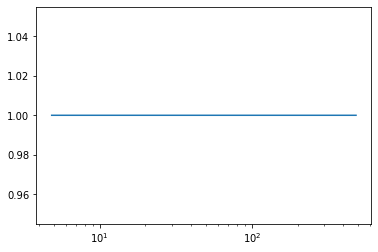

5888
[   5.73469914 1023.98394188]
0.0
0.0880015086924352,4.474037905720581,0.06829578504137557,0.00012460193253199253,46.28548991522155,13009967.19576529,0.03657770857254604,2.2256007317936962e-05,24282.04971871162,3935741688.048156,0.004055465149983535,1.720450300691251e-07,0.717144990367134,1130.5894559340754,0.0004305928408313184,4.7352789003885674e-07,81.44233542631159,0.001648392095203516,3895.0871698979895,9.801242483953731e-06,793.421440605499,7.703984050090895e-05,94294.10729282592,1.1051348690964332e-08,1.0,1.0,1.0,1.0


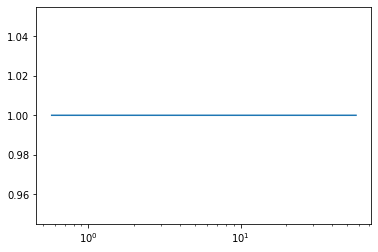

5888
[   5.73469914 1023.98394188]
0.0
0.0880015086924352,4.474037905720581,0.06829578504137557,0.00012460193253199253,46.28548991522155,13009967.19576529,0.03657770857254604,2.2256007317936962e-05,24282.04971871162,3935741688.048156,0.004055465149983535,1.720450300691251e-07,0.717144990367134,1130.5894559340754,0.0004305928408313184,4.7352789003885674e-07,81.44233542631159,0.001648392095203516,3895.0871698979895,9.801242483953731e-06,793.421440605499,7.703984050090895e-05,94294.10729282592,1.1051348690964332e-08,1.0,1.0,1.0,1.0


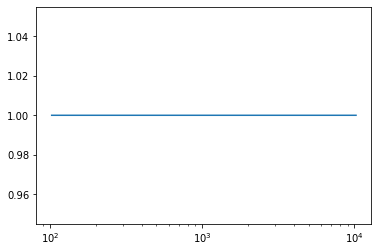

5897
[0.05170116]
0.0
814.0092884671226,6293375.684791091,854.5826749052795,1.7219462091845708,456.3575915917718,1484158.2898589883,0.0018799068429926759,2.0140047289006244e-07,6291.374415331919,230549841.66767702,4.503682850749255e-06,2.8353879694760595e-10,360302.3396306237,23237717.402136765,8.68052501232452,0.010741381612674081,8.575650380055116,0.003280770237848429,6683.044949975419,0.0017402639892604701,13.475431574916016,0.00010921597386356708,276453.8934961907,2.8470394080180382e-06,1.0,1.0,1.0,1.0


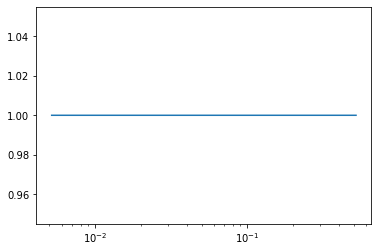

5928
[4.42864426]
0.0
0.028284802452846834,8560.876504792344,0.0029312965852959644,1.535186419355228e-07,568.4996457771811,22075.70045965431,0.004771374213480819,0.0003456413867870975,1129.3721593419473,12691361.022135278,0.002771011732844836,1.2028255548071948e-05,13.9229120116391,1053191.8939798307,2.2536034729653607e-05,3.4787271085609843e-09,0.5019362712021903,0.009872901704696709,4.575280808930744,2.536820789369421e-05,19.24332606659659,0.00010538531230444101,61.127857901549426,1.7421638417160343e-06,1.0,1.0,1.0,1.0


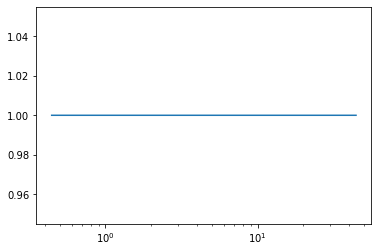

5977
[0.00711228]
0.0
21.084661557135913,7222051.767354144,0.010246501543614703,1.1779704846339593e-06,96.24749961247835,4011.62197968009,0.0014092738945697975,9.866746917404759e-08,640.8589183935925,263965.08464703517,1.0366267772206298e-05,1.1904538530630711e-08,7549.518500031094,326783617.8042463,0.0001243566351200064,1.046327147028432e-06,0.41722092389662996,0.2218884268352148,55.56714022307722,0.014406761987931513,4.4808232523545755,0.0010458414893510081,14602.10891691099,0.00011933710206480394,1.0,1.0,1.0,1.0


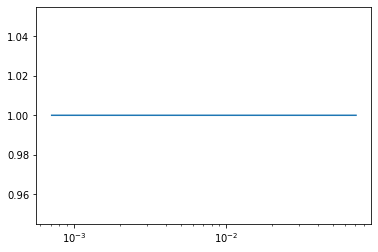

5986
[553.66675913]
0.0
0.09565219503264828,47.552936750415704,0.04490087110049012,0.021673375294312087,0.164284781208783,19636.589339311464,0.013043875130172751,3.603714971632466e-07,67.09519534550057,4770322.300718658,8.5124069249227e-05,4.192856838903548e-10,39.38730775599073,28059.91548697524,0.03202966646612644,0.018035007911705758,49.188596171795496,0.34723016794001027,1296.0406040823484,0.010880133151216602,13968.541386742454,0.0008163131760348608,6951906.2246361645,2.2003973695280812e-06,1.0,1.0,1.0,1.0


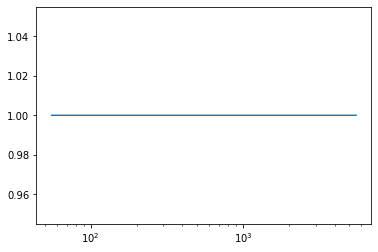

6004
[3.51136149]
0.0
1.9734865474222638,22473.14367368716,0.0054648693332701335,1.4629702931506796e-07,101.78843073117636,1328702.9631304308,1.681371331325494,0.15962903461747724,60090.049515295286,1395086.1387694005,0.7145226129756231,0.01215183149627578,126.47731096849641,1261256.404804725,5.845884916371779e-06,8.087099233964887e-10,577.1138722851113,1.0002943683282473,41097.140142471704,0.07708306676739052,3907.2241852770644,0.0019643314896603484,10532636.546093615,7.511200398620559e-06,1.0,1.0,1.0,1.0


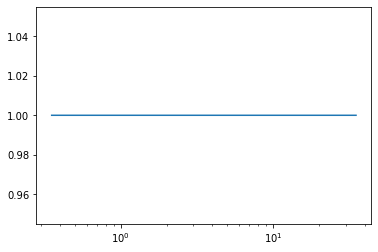

6034
[1178.39460924]
0.0
0.05063298066247694,1537.0525139827341,0.048489083624941795,0.0001986917449429727,913.1525188958261,741384.8982133949,0.2721818047196162,0.010991018734028869,225813.2993923158,5181220.499824502,0.13351074053369238,2.5587117787312348e-05,8.959888532079473,705724.0973095987,0.0241480035794193,2.0959977956134884e-07,44.707728866935575,0.014572878426080101,708.4965220287152,0.003030100706735971,103.20713977474772,0.0008403957340097732,313342.90798921953,0.0001276053894920712,1.0,1.0,1.0,1.0


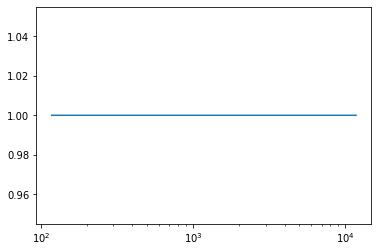

6100
[42.41257513]
0.0
6.405168508473094,155.38940438311357,0.0012576549023821716,0.0002290045272032995,1.2764013674423917,16403.173961032364,0.0011437812576760625,3.5922892355938895e-07,1185.932862180736,107746.7131563962,6.186978496493642e-06,3.8580532618256213e-08,17.43383041233987,16092.956185045188,0.0006214523948012682,1.8767879518508088e-06,43.42083904403585,166.6126665559248,12065.980374682795,0.48418149695614277,22531.36039775577,0.4906827882515651,962294.3414646054,0.026008027167905345,1.0,1.0,1.0,1.0


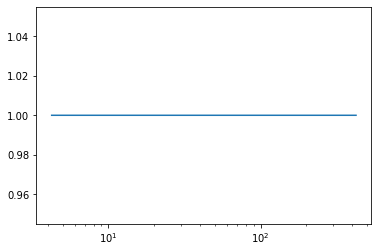

6111
[1354.1579401]
0.0
0.004250623364301019,0.26465037551299003,0.01105314013655836,2.218498120582304e-06,224.32027703102094,6148.65349644124,0.002347773334715277,1.7824442389825778e-08,3005.4614971563838,320333.2468569756,5.964102306978852e-06,4.5609957524070886e-10,0.0795048729704312,4.310586164840676,0.00022595683129921228,2.206639606243293e-07,213.81263902439687,0.001887292228575349,77754.26616031429,4.570779211189266e-05,3677.805605597489,0.00017951048382477402,1585617.5816388237,1.4262170178431012e-05,1.0,1.0,1.0,1.0


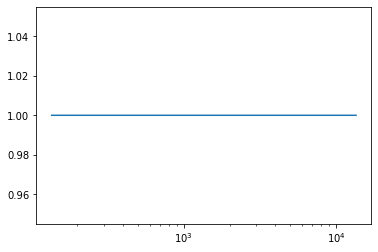

6138
[2655.9816025]
0.0
0.01219112380861431,1.751600446042939,0.016251766349550428,4.274596552287121e-05,42.40680118723491,527985.1130741113,5.948931489529728,0.0031423210542424933,3221.3766117059877,197703223.60331672,0.029201509366863224,4.302395038168272e-05,0.028239808376062967,345.63607834322437,7.35480335669966e-05,7.243479852396936e-08,7.94463611695919,0.0017682624940160258,100.13766063580428,0.0003782693519826383,1350.0619987126763,9.665377716148298e-06,41085.257228259914,8.921219454894942e-08,1.0,1.0,1.0,1.0


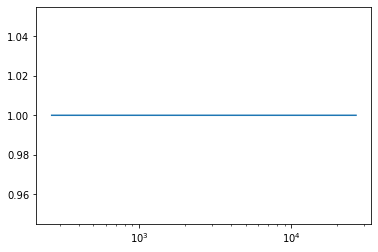

6214
[1.94796118]
0.0
18.240930295587294,3283.2966510816545,0.09837430499104352,5.4682224289865166e-05,803.5939864687404,97276.28797762001,0.03560053252065568,1.5550799140491687e-05,97217.22315931332,45539273.20942097,0.00011092853312412385,1.594304220077892e-07,3173.950735573394,111225.4157880552,0.0008329659357956281,8.471186469064972e-07,345.8046319787749,0.01390775640629808,4758.696580569045,1.6079768266570146e-05,179793.18070383585,0.0003951484283592521,4617663.092421661,2.3223632346579278e-07,1.0,1.0,1.0,1.0


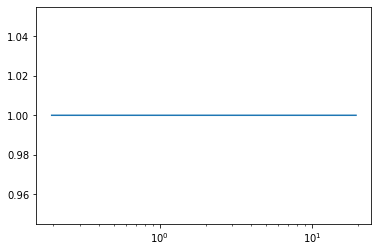

6230
[198378.74990992]
0.0
0.1077301028746951,7.286663299882019,2.361215633097295,0.003029183965617993,25.29938327471733,8541999.228895959,0.018161926437621923,0.0001461340430500051,25091.881417085708,1762151889.7005756,0.0044105514744920155,5.8755467325142934e-05,4.549774604278938,5052.048333974755,0.31624985855256704,0.0024409100963661253,0.5363272787899863,0.011455011409994246,339.41406378220404,0.0005429276622231013,3.9898936768938476,0.00026900078372434403,12093.555197046824,0.0001941530740588603,1.0,1.0,1.0,1.0


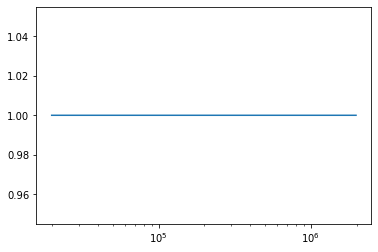

6248
[1807.91767018]
0.0
16.031442298496223,508996.54295082,0.034360617409293866,0.0026638580354683304,508.41701188171504,17805730.788481716,0.046252144827647654,4.192651745148625e-06,324992.0808384897,2706328072.7235885,0.00019504331885126968,5.9431844792321045e-09,3316.670734628852,785586.3246450898,0.011999611999080657,4.1538040356359365e-06,0.5758878774626762,81.02359243717281,6.347098037356823,0.12197766292557377,2.466393676505167,1.341979222910111,563.3949985872755,0.00120608631900659,1.0,1.0,1.0,1.0


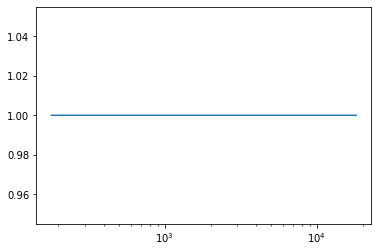

6264
[3.1477634]
0.0
0.6200244004984038,163.36356904024012,0.0017635982243344088,1.7663084625178371e-06,213.3547599974135,13198.507432797327,0.011001870839704098,8.77498151459214e-07,1666.5877614969133,3769991.358941727,0.0002574624796092503,3.3303326469919627e-09,0.9347296298340961,3598.490857365733,6.487545357791487e-06,1.850822366463712e-09,39.67109777379318,0.0010881181928686953,749.1510673147043,8.993940520020781e-05,1094.6865515729583,0.0003495696218833976,115830.54364385935,8.181281052535539e-05,1.0,1.0,1.0,1.0


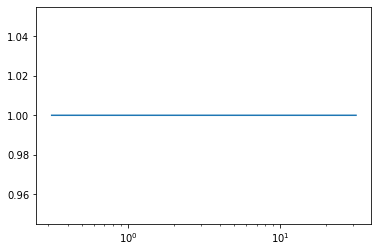

6283
[  154.81323929 19777.2363231 ]
0.0
0.4248895095195165,34.127733103984845,0.027154805792869854,1.8489170334415717e-06,0.3928429511371546,2752.8588603803005,0.01053231206026652,6.236002371532171e-06,22.440420238398467,12353.915171184293,0.0007767522836881686,1.0171671766973888e-07,6.4622309839524075,57.26784089776359,0.001157210391160611,1.7596247748393606e-07,604.277849586226,0.004863255805505123,29676.747631706447,1.0480421563055766e-05,207317.90835667215,1.695792633662252e-05,19692234.484858014,2.3681379044772375e-06,1.0,1.0,1.0,1.0


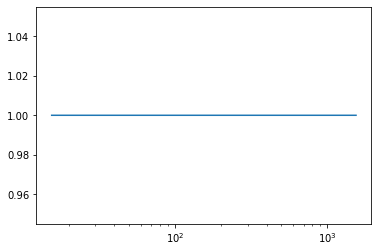

6283
[  154.81323929 19777.2363231 ]
0.0
0.4248895095195165,34.127733103984845,0.027154805792869854,1.8489170334415717e-06,0.3928429511371546,2752.8588603803005,0.01053231206026652,6.236002371532171e-06,22.440420238398467,12353.915171184293,0.0007767522836881686,1.0171671766973888e-07,6.4622309839524075,57.26784089776359,0.001157210391160611,1.7596247748393606e-07,604.277849586226,0.004863255805505123,29676.747631706447,1.0480421563055766e-05,207317.90835667215,1.695792633662252e-05,19692234.484858014,2.3681379044772375e-06,1.0,1.0,1.0,1.0


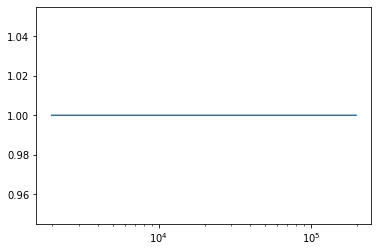

6328
[1098.03372031]
0.0
0.03039761577968736,91.82014737055957,0.003651829280813565,0.000850291259542841,961.4281121331416,1677252.035503288,0.7436834706333627,0.00022018936332793377,42127.36112035591,8498089.181164421,0.1154574277370048,3.8023049192535544e-06,0.5495866018608015,56636.34570835687,0.0008837036989674952,2.4253986863399327e-06,494.44166881313413,0.002455490689993799,92208.24262744462,2.1079936799726296e-05,22753.193538605206,0.0015972663613322497,3433870.062216007,4.4648162354680283e-07,1.0,1.0,1.0,1.0


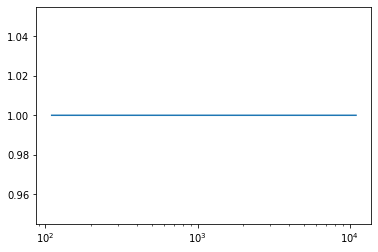

6365
[3.78580292]
0.0
103.30670019026567,50346.87113154226,5.324006373392604,0.040932315199569386,289.0308272672481,203517.54170645357,0.03200623839549497,1.4361862960732992e-07,177913.605874171,777034.6431579384,7.26834319924365e-05,3.371035896939834e-08,3179.9479129289434,157089.32504827672,0.06538879836932117,0.0007860983482461405,19.214365973363282,0.006508916366836346,12195.102510069442,0.0002536646780934031,15696.479305313707,0.005395198076972563,2939093.4435385563,1.2156623288548373e-05,1.0,1.0,1.0,1.0


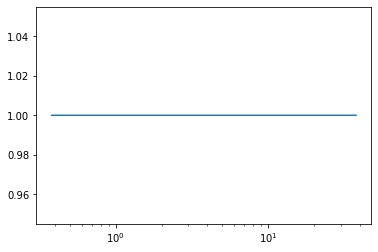

6372
[167.34579417]
0.0
0.05613523583836578,16.56612575169994,0.00408637035097612,1.620873792461978e-07,0.04386170260923366,2347.7376322732302,0.025994701727096052,5.267732138019324e-07,3.6068701823302707,7962.267617899298,2.8800213812883474e-05,3.466245856153658e-07,3.2061485875441695,3039.1917780175363,5.762800539317233e-06,6.670480266544257e-09,596.6342503144091,0.08254359913690229,1014.9256391516703,0.038262459076191004,1321.1330569785976,0.00010269683369018822,4075.2981744292733,2.9308769243837394e-07,1.0,1.0,1.0,1.0


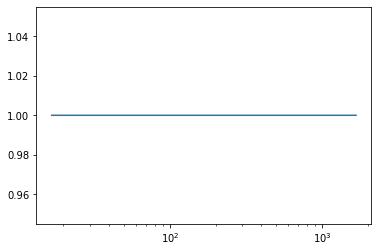

6523
[0.33408962]
0.0
0.27203126303617914,234.6974709899652,0.0019896581522537244,7.2865693292365194e-09,0.07075137278104374,214.12076714496345,0.006141159243307446,4.707166317890773e-07,0.49712207879191206,15545.715868099995,6.7803619528581e-05,4.724718255522592e-08,34.49790294449122,3370.686030269912,3.400591269916789e-06,3.0314847009546796e-10,30.628167887583498,0.005624475363283444,2985.523833305671,0.001413785409541944,2559.540026561002,0.00020974135102838536,423931.57696540706,7.946335124364858e-07,1.0,1.0,1.0,1.0


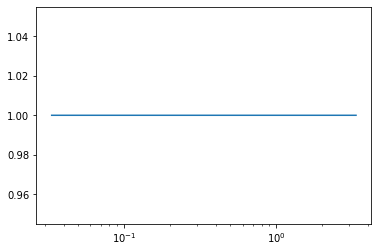

6607
[1054437.68409912]
0.0
0.012794549047001409,0.752949532126303,1.0136110411980266,4.434987175886483e-06,105.03799793262695,10433429.423464896,23.071862697790703,0.011444148629301433,69357.06587040811,13266017.008302914,0.08182780580280843,8.306637349816562e-05,0.11338917166286691,11.998377251523305,0.0027196837444934245,1.938317355283265e-06,0.20878924927026513,0.023792551708025526,177.90353133358835,3.854170946782179e-05,41.181904018461566,9.630983647941394e-05,8929.105681918742,1.3099368260436957e-05,1.0,1.0,1.0,1.0


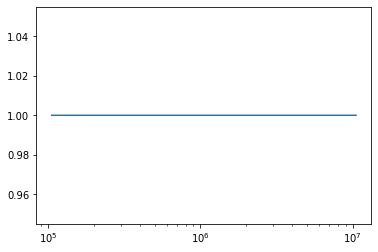

6647
[0.57304187]
0.0
286.04958181409364,284112.26948361244,0.001059790628478027,1.2486108123359525e-07,2.2513615152589757,2105.4876759832414,41.808870444649415,0.005525697723146541,898.6868492218183,168909.55256729206,1.656404298861454,0.0015964451553385237,4528.1078364391105,8467396.110240776,7.99747314480903e-06,9.823886160787132e-09,774.3820727596001,1.7901127094851832,66424.27252086552,0.15282851152633384,529970.2687887985,0.004834797514105864,6840906.208447913,0.00021871482146411687,1.0,1.0,1.0,1.0


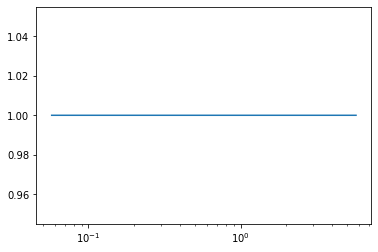

6653
[84342.36077438]
0.0
0.005210939658078137,0.262526369793489,0.0028173445477031483,8.767553103474316e-08,24.970866570419794,302216.40555292857,0.03588909070943872,7.958783489376713e-06,835.6428814597615,4925293.469607921,0.0018673762189563802,3.3266241010675442e-06,0.0055045346520200605,1.3491203637464093,2.898377245563582e-05,2.2735908623063506e-08,1.2054157435854935,0.001666332006519111,6.63518952854359,0.0005110832632771319,7.467924035937549,0.0008094029916104322,948.0585532224367,1.275366143312366e-06,1.0,1.0,1.0,1.0


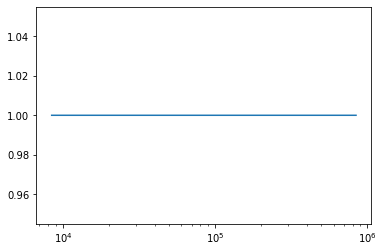

6665
[0.02721801]
0.0
119.70599819703068,436348.2232172513,0.001562444273106978,3.4370283936343745e-07,88.62892586116635,2335855.2933797655,7.154978879748304,0.0026710117222994967,17034.09836914867,160611362.19607612,0.157836194201757,0.0010954356780694314,110014.54487542309,4796025.595912396,4.571475465817003e-05,3.7138470863787617e-09,57.85166984595145,6.7606374965772575,9763.396228933967,0.017312857048899104,37690.28820204223,0.06287270578943079,2672417.1989360102,0.0009582601234526003,1.0,1.0,1.0,1.0


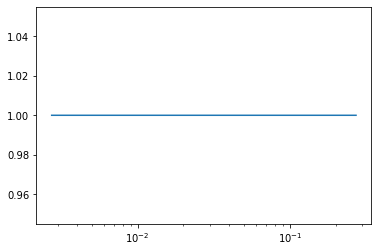

6724
[134972.26651507]
0.0
0.07158299906657249,8.958427609893855,0.07168848000338819,1.0474941632868467e-06,324.7263155696187,102805284.76758951,0.2329297399502218,0.0006225339198229002,159294.0727231732,1719962333.5965059,0.005829139543304935,2.7514745151368897e-05,3.845546039621927,1655.0568130008476,0.0008914921909080384,3.396949809189867e-08,434.0824976462073,603.7801498209358,4893.413600599951,15.011724326548757,71671.73586753629,11.083377795743878,209510.05301782812,0.11727101201364803,1.0,1.0,1.0,1.0


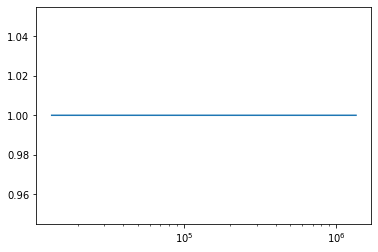

6784
[9.92723620e+02 1.04857553e+06]
0.0
0.0013461276945291739,5.105661248365638,2.9121621931941233,0.0001377955158394423,961.1341654251621,6680422.731861997,795.2280533133445,0.02785034251922125,575165.4108951008,43744101.793106854,1.247720330031504,0.001076903267250532,0.016562860849544683,1959.2571621446887,0.015024108536897783,2.0261876044772137e-07,559.5381919414332,0.002293839662522989,1138.5758354965376,8.641315219274608e-06,234712.0937160212,0.00020066325328715854,15125292.277697286,3.1728590112596785e-08,1.0,1.0,1.0,1.0


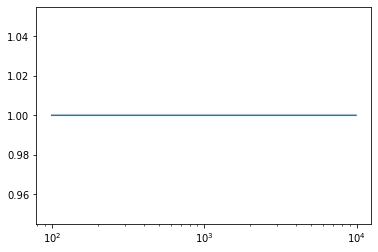

6784
[9.92723620e+02 1.04857553e+06]
0.0
0.0013461276945291739,5.105661248365638,2.9121621931941233,0.0001377955158394423,961.1341654251621,6680422.731861997,795.2280533133445,0.02785034251922125,575165.4108951008,43744101.793106854,1.247720330031504,0.001076903267250532,0.016562860849544683,1959.2571621446887,0.015024108536897783,2.0261876044772137e-07,559.5381919414332,0.002293839662522989,1138.5758354965376,8.641315219274608e-06,234712.0937160212,0.00020066325328715854,15125292.277697286,3.1728590112596785e-08,1.0,1.0,1.0,1.0


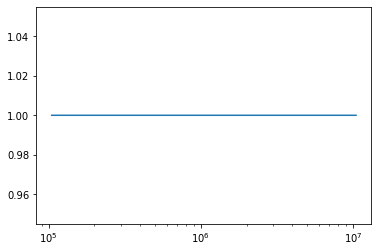

6785
[0.03682443]
0.0
29.225746565692965,527715.955039391,0.04657302157010619,1.850636863773949e-07,144.52206241826514,51894.085141528616,0.003594649671933891,0.0003223349611828914,22927.22809493054,10937605.972868923,0.0016988959145180834,6.73997652641306e-07,534.5108187074621,267962074.96267587,6.523259735140067e-05,9.299456911777266e-09,14.988288552685262,0.008487440209019915,28.468494399839834,1.0788424917818141e-05,9519.41200777336,0.002650823366380672,739937.8747958873,3.667771349286403e-08,1.0,1.0,1.0,1.0


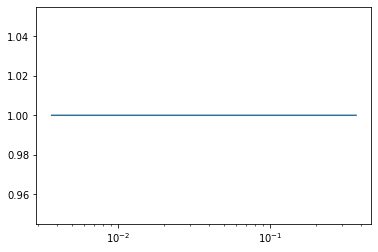

6797
[5.05479851]
0.0
1.755371599237764,102.33544031192459,0.01041467492674454,5.252855118556155e-07,316.0719390598812,1084573.1085135033,0.005759185715789985,1.6718881264313304e-07,16618.719266060372,235980501.0167623,5.3201760727594356e-05,1.8417182316656623e-10,4.151655927308375,1141.3392650694448,2.7372086803090586e-05,5.8157118108690694e-09,374.9602286821986,0.26186471329227945,3829.924593760132,0.006340434219693317,718.9247327514075,0.02912836080864079,19260.362892523743,5.4380853495819136e-05,1.0,1.0,1.0,1.0


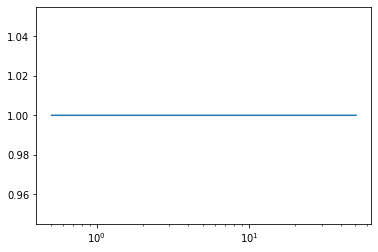

6857
[256.62922188]
0.0
0.38944562003126293,107.01753762067936,17.211317063288565,2.5498845989521328e-05,204.9617952385592,133643.7141757435,0.037386206791821926,0.00018261246119037486,20906.419433726296,590867.0897513493,0.003334770131318581,1.3879269030882028e-06,8.70853019217797,5297.8496161483745,0.02253435151603469,1.4562174770230115e-06,33.76710493565112,0.005762935076328992,1262.0708829086602,1.3410341661449402e-05,14244.939280256847,0.003872769919504905,392577.00794117356,2.739749348567884e-06,1.0,1.0,1.0,1.0


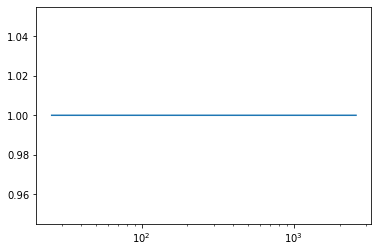

6866
[14181.13832491]
0.0
0.6066771752827262,4.851295867095373,0.021503479305393,1.9002726518088003e-06,647.6024128460011,60210815.081479296,1.7711982735281966,0.014764176802422419,104917.20504645426,16015413664.050623,0.4149030923441784,0.00011244946424235344,0.8127207338668273,3059.5596218244996,0.0002961482744378452,8.973265718692573e-08,0.022106129737927152,0.0016169941601524296,2.9993615583130837,1.614415873870642e-05,15.438981946794648,3.5299482873637924e-06,58.44729066065751,8.063140998814794e-07,1.0,1.0,1.0,1.0


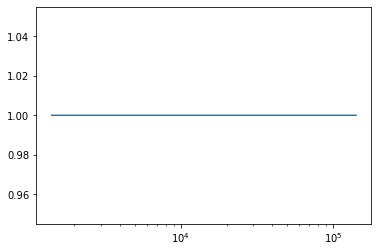

6945
[32.08279846]
0.0
5.017517573678368,12443.70114767302,0.3487716179994003,0.0004217735065626394,268.5670556908726,16778.105801002002,0.04116466603416281,0.0010134539496563567,9155.567124617299,1799003.9140835137,0.021577658846552984,1.1077266461902052e-05,21.055348431216448,2822793.932088421,0.005908243252535805,7.459964591293883e-07,532.9404583119469,36.97083152419662,153085.37422326492,18.033031126661783,185356.1053992853,0.45227427711734836,11433876.377916943,0.032937078301698335,1.0,1.0,1.0,1.0


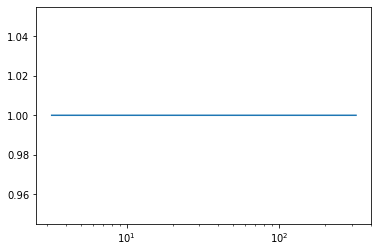

6953
[1.99548148]
0.0
1.5338899978656846,13319.157893712918,0.47723137381139236,1.1740743754087572e-05,16.964619137226723,17177.501732481363,0.03372898533685747,1.3134312211186125e-05,556.7762190371242,4899465.8284911495,0.0001965141452716315,2.2680304368741192e-08,610.9915308472767,306306.11039403547,0.005188469676526867,2.7493695774139346e-07,673.9330888776179,0.004730812718645761,170988.58984812626,0.000133946644024497,1468.9757276764567,0.002692893069334481,2425354.9954919796,6.128032563614253e-07,1.0,1.0,1.0,1.0


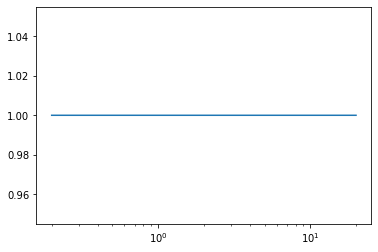

6962
[ 0.23326508 63.99999999]
0.0
25.85256330102023,109753.43846668632,3.5399184639038035,0.0013120402212184051,5.532352635685557,69772.26883519864,0.013291161857665271,1.0443229490707952e-07,1290.5161655941279,83028.92967103158,5.010001299036858e-05,7.227439477245237e-08,1175.0028824503238,116033.71255199952,0.004899574117592146,1.759021915791309e-05,982.4655826022785,0.003482573491899422,238505.02088298206,9.280031320305219e-05,643118.7727192616,0.0027250646489561732,364659503.046772,6.667412251212936e-06,1.0,1.0,1.0,1.0


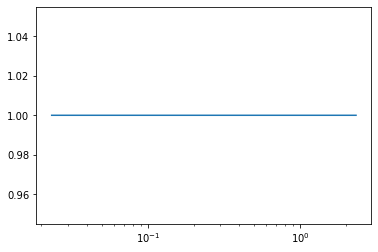

6962
[ 0.23326508 63.99999999]
0.0
25.85256330102023,109753.43846668632,3.5399184639038035,0.0013120402212184051,5.532352635685557,69772.26883519864,0.013291161857665271,1.0443229490707952e-07,1290.5161655941279,83028.92967103158,5.010001299036858e-05,7.227439477245237e-08,1175.0028824503238,116033.71255199952,0.004899574117592146,1.759021915791309e-05,982.4655826022785,0.003482573491899422,238505.02088298206,9.280031320305219e-05,643118.7727192616,0.0027250646489561732,364659503.046772,6.667412251212936e-06,1.0,1.0,1.0,1.0


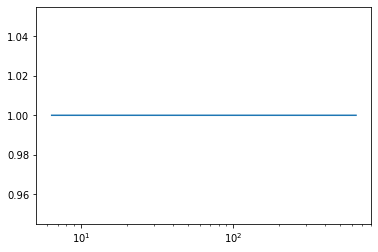

7051
[32967.25162985]
0.0
0.011983171817592004,0.17620836898267828,0.0018474596205668384,1.4840477827767347e-08,357.99775189429295,2338327.64755315,735.7625425801644,0.019883232367445453,238804.47445974362,21666056.197636634,1.005594261412762,7.783926073531592e-05,0.05683384047017576,0.9795384869375353,1.264616321932733e-05,4.1337909930462803e-10,434.87694487933123,0.0012955213208390639,35621.83221411329,0.0008777257968162683,2273.430466136,9.68174461341111e-06,3365897.853164694,2.0139690276953208e-07,1.0,1.0,1.0,1.0


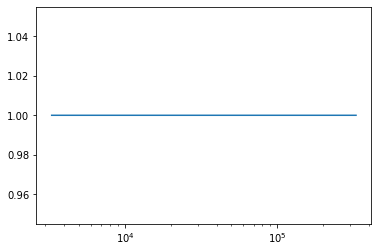

7083
[371.57990795]
0.0
0.6295286348871285,322.9507355898003,0.0042344538387745845,7.6104420568708355e-06,357.64862850714565,982018.275547423,13.369842452436322,0.013819695468961588,80966.31357721014,806465834.3778881,0.4483967029838115,0.0013605449401422431,65.29411248187121,2395.2175565525786,9.092549222350007e-06,7.139453931325145e-08,62.95628594336396,1.6442698582258835,669.0007072532894,1.6386746973063908,900.2323086373095,0.01213868902311762,94420.38676598563,0.00013585562665231328,1.0,1.0,1.0,1.0


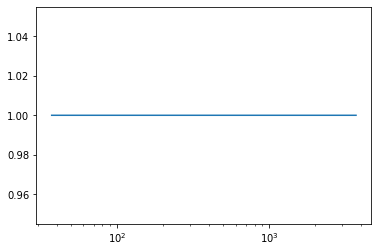

7156
[304.76508118]
0.0
0.014100062473218355,454.7171440867393,0.02067679572101582,0.00020712113159144474,387.98883946320336,189582.7377185941,0.0021141302381697887,7.636958165459695e-07,938.2305217978308,1902761.3100693915,2.041266378917626e-05,1.9726188907667552e-07,1.4275835764389442,56977.9288040729,0.0009114586147918844,2.9634136089243837e-06,2.8114818848097203,0.21945755230153188,98.03804977801113,0.002991429473197223,35.9081041831933,0.0021658449926701905,230.28547068951198,2.8299901990968363e-06,1.0,1.0,1.0,1.0


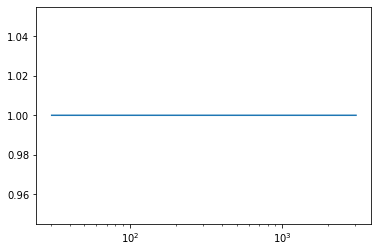

7171
[44.71140076]
0.0
124.94644474304545,447.8929604100681,86.38019107532708,0.9769123793597146,902.7391423932658,2463168.046783874,0.8065024354145565,1.7433919714744112e-05,2834.2556384896643,1509820500.5859585,0.003951127472348557,5.234848310732369e-07,431.0997685480053,380119.70686598495,45.53180125440692,0.011106523109141122,306.73478744091074,0.04750900483617265,8147.1693072061635,8.932548853368528e-05,29064.190394029585,0.003170409049603903,2256968.2002054215,5.620657025954088e-07,1.0,1.0,1.0,1.0


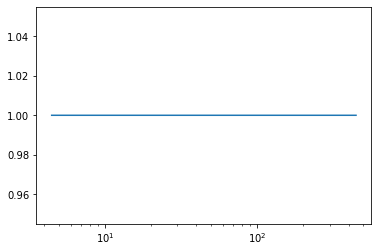

7202
[342.45484543]
0.0
1.8061559790709747,25523.705529611165,3.1757495553680495,0.01654845493151353,7.609617887907971,25422.123487519082,9.206239864741908,0.00368075961147902,4237.317687585415,6702408.2632313995,0.04505760058626159,1.227144616268294e-05,1364.5076254970684,618579.0486618633,0.671615314453505,0.012949017116071885,348.26647595050633,0.02872499017542171,92006.59997107992,3.6688530793877796e-05,37296.26384299302,0.018697742495391686,39624474.16209969,3.743434905123685e-08,1.0,1.0,1.0,1.0


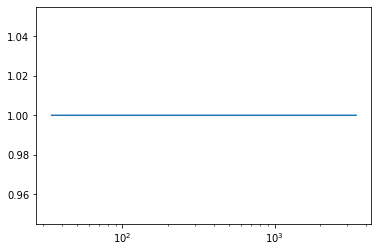

7225
[203867.220268]
0.0
0.3245475320979687,1.6506086461279943,5.4815424383427,0.006733784992455684,572.8684927145172,1907124.756964065,0.09575317627288162,0.0013996948529175653,15598.695454763247,1004405819.0848416,0.08671143852485678,1.8981370678014454e-05,0.3560756885887784,13.69973491694828,2.1992883313848464,2.195199331226054e-05,58.378982468710696,6.878494368140863,9760.626229551675,0.010400096226620331,508.2077721707087,0.03193587081713085,3840922.118894264,0.0017305192162268249,1.0,1.0,1.0,1.0


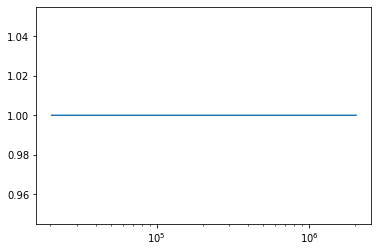

7254
[0.03189652]
0.0
71.57766549936515,6523.540681145391,0.01793618837950024,1.1323615166817614e-07,26.360564572456116,156565.32696210287,2.2923433177456767,0.00018266347665204675,491.65977880655356,7171724.229075327,0.01646738858143758,5.349167283925516e-07,1112.3912948836678,414154.83793551935,2.6465816559434566e-05,9.381251275257623e-10,166.25073963918572,0.8241176358099397,11237.889002759963,0.3300162489250713,300.0001896560167,0.010406861645825074,7959405.855816682,1.796980951598196e-05,1.0,1.0,1.0,1.0


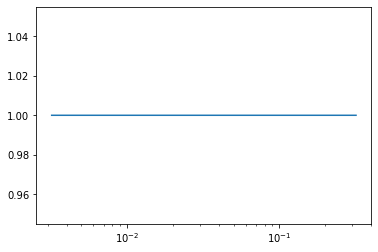

7293
[972.27545399]
0.0
3.822575269512932,15344.670768803235,0.006482466878180871,4.806444635004501e-05,644.5313215778348,33567164.057310455,3.047121414127718,0.0010000469018543198,141222.79693217785,103136942.39291799,0.17116669564279127,3.9470385912313835e-06,97.1329266640559,25076.149236988495,0.001642478546999695,2.032916680048629e-05,0.8255815939250386,0.12122377142748787,2.6603846990665314,0.00013429182739534807,4.474924173870438,0.08224794993133416,26.233145859265626,1.3805958693162863e-07,1.0,1.0,1.0,1.0


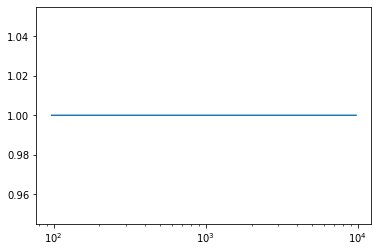

7386
[23988.29918803]
0.0
0.1521248134380209,6.103838525161897,6.43935670791454,2.2190614787095248e-05,644.6624565643041,91988.79590633683,6.125403392996279,0.00012309264074041322,3262.1634252617077,19829926.637850326,0.014903038290620679,5.222550047324584e-07,0.6504026773336242,246.28902436536913,0.007276088547793382,6.76808927551569e-08,944.4387241436885,26.429774593743765,14515.195461006158,0.7349191260771701,126244.78061760378,0.2961198048248317,76762754.2212213,0.00288891855231815,1.0,1.0,1.0,1.0


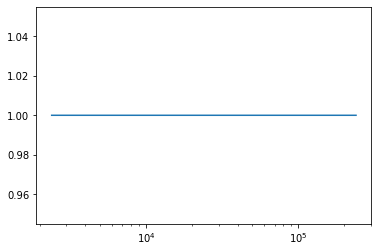

7408
[7.17133571]
0.0
5.648243559805896,52.21319205889142,0.044421387719976085,1.2625841152248066e-06,3.58824317741769,72326.19838706986,0.0032764679411088206,3.844079514459584e-06,249.93133161693194,182005.3001371492,0.0001813512356170763,8.927334014366139e-07,23.966281819450852,5206.589262800247,0.00023154316120006335,7.255186870731495e-07,863.911686875622,0.0026459057950459193,2158.645183121116,3.855706484824145e-06,939.5868163013879,9.223585092068131e-06,335761.38638986694,2.529876268015214e-07,1.0,1.0,1.0,1.0


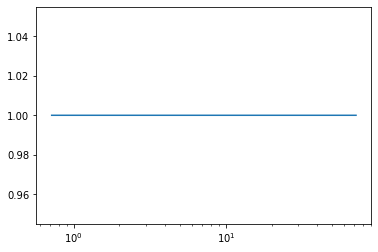

7448
[2352.55945817]
0.0
0.03252287530972006,7294.99336258127,0.29186555531670244,0.03409185270038453,0.011147602863574852,5351.207873569831,0.0010369288709318274,3.724354818579222e-07,9.312513843832285,26445.847800057923,4.7711258245871896e-05,2.1711306751863735e-07,9.545620091026196,137240.73132425506,0.036451180660082655,0.008060991022804592,919.8180930947725,37.23933495537305,589471.8952836014,0.2962863120972601,148685.22410474098,2.3017579805249198,43630185.04639968,0.11053243981666112,1.0,1.0,1.0,1.0


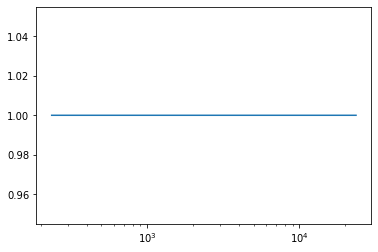

7485
[1747.55529797]
0.0
0.003177640128301927,551.994085736973,0.002955333484781674,8.421024476810926e-06,0.0019326136900830017,55.32084620346679,0.19620401957256706,2.0289932587889507e-05,0.1591923026297558,176.9962235331513,0.002176015645570797,2.476060507352499e-08,1.009650888724502,11742.26547129173,5.105191026365839e-05,1.6206245195360705e-06,521.6846249576873,0.2229692253604248,53374.9105771484,0.0004783733028065877,10477.519433015645,0.010195055581340502,3673194.395578996,5.897278658648859e-07,1.0,1.0,1.0,1.0


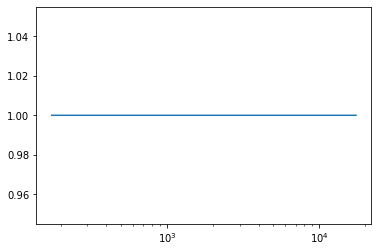

7517
[60.35579502]
0.0
3.56135215154173,32.94669316737402,0.007410444961156653,4.6123043794455786e-05,8.900015612472586,11809.415626590715,0.021537985251158135,8.185609797623576e-05,4054.6936749984156,292883.39222087833,0.0008122668294457691,3.489092426491555e-06,15.216581693587914,288.2857712366085,0.0008432565358889916,1.2472839137321168e-07,907.3040097957662,0.009845665307474006,379975.93895079504,5.5791565198057615e-05,20412.79235823207,0.0005268753537861401,698291.8524275635,3.0200387257635096e-07,1.0,1.0,1.0,1.0


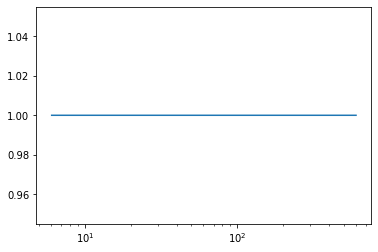

7524
[13003.98942502]
0.0
0.0034685650760467386,96.57408163126708,0.030864976164999947,3.27330706924176e-05,18.192660492354126,736514.14605964,0.004829223515398867,3.9951162403163363e-07,2356.686709573425,101834379.0166405,0.00037304395597195073,4.4993104853802036e-08,1.8364099996732641,5045.053939808281,5.2031896695247375e-05,2.3290097959557866e-06,178.55080178705543,0.0020213776175735942,229.8723970471795,0.0004070408439859094,3651.693625021595,1.697281605347307e-05,22924.427467200316,8.391490538550049e-07,1.0,1.0,1.0,1.0


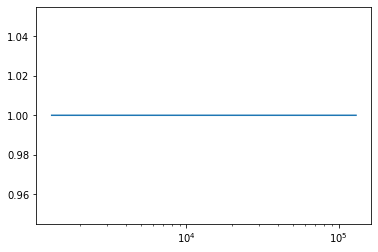

7527
[1.37086115]
0.0
21.61467031643607,1700705.792691563,0.36595363432274314,0.011641376925784189,244.86616911369316,355959.8491568462,0.0013543206767602269,7.258651114536091e-08,136368.0974715825,475750.86632133805,1.7127744189987595e-05,1.055095600447118e-09,3280.691663399122,2658493.2676115064,0.01704343642789142,0.00023315525342222532,0.2728264875796615,0.055076917864484716,0.31203816316231214,0.0010885783922522524,26.648333056949802,0.015343509039626616,5285.126091298192,4.475365147130035e-05,1.0,1.0,1.0,1.0


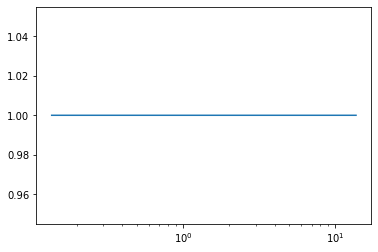

7590
[1.44167771]
0.0
4.86660330718001,21664.30231436999,0.17745305325723082,0.008706476565602252,47.51838694065545,262498.02765745774,0.003525861827762541,3.899944637685921e-08,1720.5092252063912,22633266.997616623,9.40023313819481e-06,5.173459276129392e-11,2680.5721286716084,1516359.0651544414,0.05213286429081626,0.003466083105564859,26.61559835012826,0.07588842383602983,16243.16218015619,0.005650049552630934,2334.363365823445,0.00014203186100955555,21968.379386685425,3.5728345137693364e-06,1.0,1.0,1.0,1.0


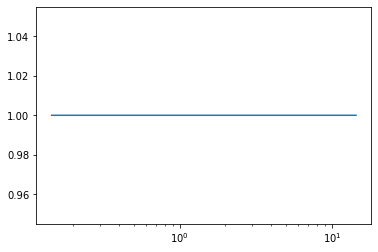

7620
[438.55377972]
0.0
0.11453477003288418,28.801425250666053,218.65676284998037,0.41465904121926384,29.700762694280492,141436.80983201077,0.007408274316851976,1.1194324574469849e-07,449.963450664947,681892.9353617345,8.306027717967849e-06,1.3541290796765453e-09,23.157586373580013,3126.475348742817,3.2880104688003278,0.02406482719289025,32.040278741191784,0.003276280198423276,6628.2932087100635,0.000508741449576251,1083.515648826823,3.432812368556913e-06,1099175.8167021442,2.043124040124813e-07,1.0,1.0,1.0,1.0


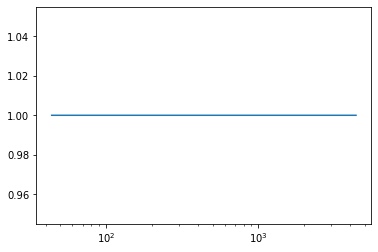

7634
[70.67618654]
0.0
0.00793570279175684,16.449188755779673,0.006437655361027386,5.025890041881438e-06,2.905991674863446,5352.341522651146,0.002272579894876447,9.482164510110324e-07,31.013510871289192,32965.22906846583,0.0001540788812519921,1.4672141444653936e-07,0.0588907271438784,1789.0265570120462,9.296584510137029e-05,1.5506059179176726e-08,739.7115624344292,0.08315066852529343,4899.13244424113,9.004363804424036e-05,58142.91557339125,0.0063306371259124255,24446216.29297674,1.080166457011656e-06,1.0,1.0,1.0,1.0


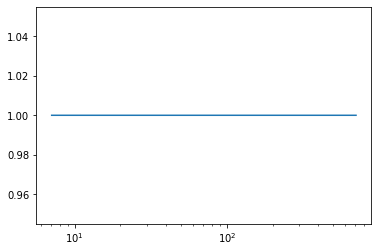

7772
[7542.94025188]
0.0
0.0011768191917924079,88.31548028645697,0.016029559766810645,2.5437969905912353e-06,46.17126504211559,348.0113822707823,0.37204457379424527,7.155032299320811e-05,50.04263557049422,13699.690629997192,0.01611281524518155,9.66919985004155e-06,0.15983246487285624,64172.567493355054,0.00013203896440378305,1.0517194694464573e-07,698.2733753209529,4.000397268589121,306108.6938963504,1.2003292888717556,1668.5224708664934,0.4519345659179626,15127787.091146402,0.0009513252430104655,1.0,1.0,1.0,1.0


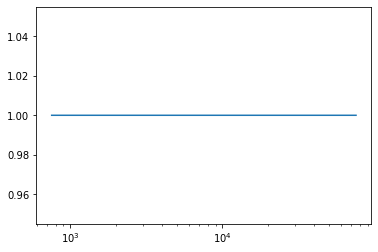

7859
[69.64957959]
0.0
48.93145001702232,18802.200584704377,0.023787333071273595,0.0003492711163450072,644.9425631824581,3148512.4897212335,0.7763325713624167,4.068891922254766e-05,55507.98532131021,868052076.0925634,0.010800555350014642,2.613349740424269e-05,153.45366093190992,494842.1029367494,0.00044088326567337353,0.0001419509635052562,48.43686934680491,1.0331688644113146,21604.104776046843,0.007059074295195013,14422.317339123012,0.2894102991676664,504966.02791646135,0.0013871849013577032,1.0,1.0,1.0,1.0


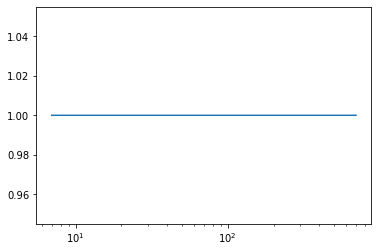

7912
[0.0007511]
0.0
379.68044249037223,1067510.0881212081,0.0015687884962020063,1.2927946720919406e-07,27.60708568663803,7120.840684779342,0.016532013194557254,2.527454393083282e-07,1860.4244757511392,1816440.9524488996,0.00015957678729117643,1.7188340296327867e-07,145347.66918456482,446238315.91731644,1.5663766732890803e-05,1.0348833532760298e-07,28.89273665283337,0.021260850295582504,177.05322725130165,0.0001393188056549613,400.9389583719895,0.017673229710942772,139832.16084766958,1.715139156452971e-06,1.0,1.0,1.0,1.0


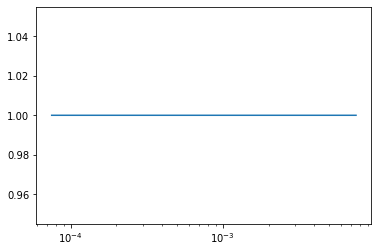

7969
[0.06533271]
0.0
129.92241028673524,30953611.584409848,0.002500464133079379,2.9286055407273146e-06,1.8780488024906776,17.182536364280995,0.03977522422231261,0.0003287185690976144,3.5635378680192855,42.3652859167313,0.004685094911354802,6.444604773002487e-07,83023.39786742434,13796039122.704401,0.0008037292657674302,2.2010918506386297e-06,63.59144728133062,0.017557670459615676,12203.764418776398,3.615773920464846e-05,355.72083906453497,0.0001663032525343767,294885.3968225227,2.6161389666963046e-06,1.0,1.0,1.0,1.0


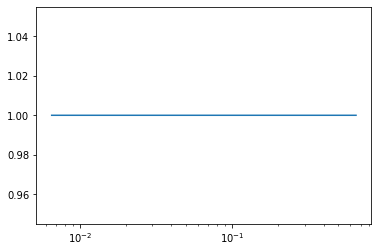

7994
[ 91.4548857  473.58542469]
0.0
9.423670893374805,450.91718970379173,8.787827331124275,0.839795010337476,36.16991599557734,17150.528550436502,0.0011710658694827115,1.1315728892127008e-07,14353.942235918343,7617025.491763041,1.9832474618138682e-06,6.914888627039956e-08,227.33442211110668,41696.570515707666,8.724571740269344,0.004695342756940913,676.6931603328413,0.0017361216482283453,182100.30466653194,0.0008054357024339048,550901.9951452187,4.084943709982498e-06,454189660.8304194,2.3075446716888553e-06,1.0,1.0,1.0,1.0


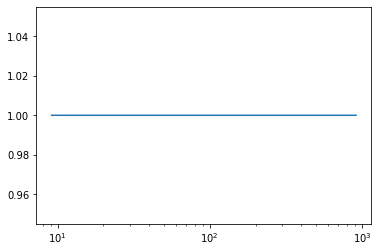

7994
[ 91.4548857  473.58542469]
0.0
9.423670893374805,450.91718970379173,8.787827331124275,0.839795010337476,36.16991599557734,17150.528550436502,0.0011710658694827115,1.1315728892127008e-07,14353.942235918343,7617025.491763041,1.9832474618138682e-06,6.914888627039956e-08,227.33442211110668,41696.570515707666,8.724571740269344,0.004695342756940913,676.6931603328413,0.0017361216482283453,182100.30466653194,0.0008054357024339048,550901.9951452187,4.084943709982498e-06,454189660.8304194,2.3075446716888553e-06,1.0,1.0,1.0,1.0


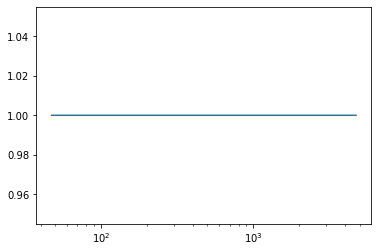

7999
[2.38787714 7.41855066]
0.0
40.949501884730324,5244.698642942982,0.001421629273900187,1.5187443008329027e-06,23.017732457604005,9100.68635162507,0.006849270096983495,1.5809604741187866e-05,3774.6727272833236,2293613.4253693684,0.0005615906201626456,1.6161561549230467e-07,1065.823730447099,1293137.0706667884,2.793111982697064e-06,7.71843559447475e-09,48.9499352314272,0.007045503567841776,3568.114472403399,9.354658272534474e-06,11247.283735575575,0.0008604371017094652,38689.21096867482,4.7080096771416416e-08,1.0,1.0,1.0,1.0


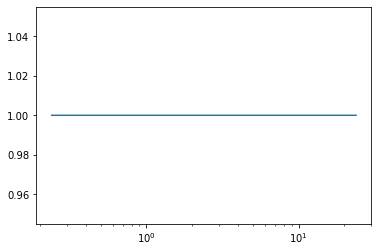

7999
[2.38787714 7.41855066]
0.0
40.949501884730324,5244.698642942982,0.001421629273900187,1.5187443008329027e-06,23.017732457604005,9100.68635162507,0.006849270096983495,1.5809604741187866e-05,3774.6727272833236,2293613.4253693684,0.0005615906201626456,1.6161561549230467e-07,1065.823730447099,1293137.0706667884,2.793111982697064e-06,7.71843559447475e-09,48.9499352314272,0.007045503567841776,3568.114472403399,9.354658272534474e-06,11247.283735575575,0.0008604371017094652,38689.21096867482,4.7080096771416416e-08,1.0,1.0,1.0,1.0


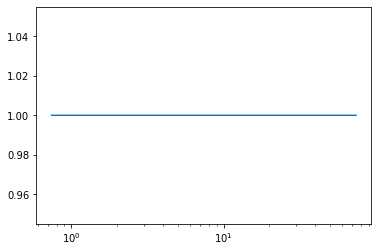

8016
[3315.47805836]
0.0
0.0038972287937099506,4.696039560712413,0.005310587880650028,2.4224004583157717e-07,7.7535407260466185,160507.45485023444,0.527602491385213,0.00017978364048667263,3032.395855370775,7420740.089042551,0.0008783265493280983,2.0396336232768735e-07,0.40518910581325057,685.3062844640691,5.8797639979688845e-05,3.5599461709665556e-08,0.2129578060812625,0.0028624242211563694,109.04519041615139,1.3426988482324737e-05,83.74391232268182,0.0004903887443684816,35174.60307295952,1.428022813017593e-06,1.0,1.0,1.0,1.0


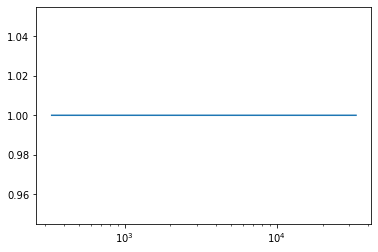

8019
[44.07007355]
0.0
0.01093033736037002,33.215476624809064,0.21375207554647377,4.357881708819387e-06,509.88046025094985,5358655.021515293,0.008670062456821398,0.00019349242508264885,21519.344555224583,996570452.2719015,0.00020437324082917536,2.3919386252355698e-06,0.7470630534192728,4904.917882228674,0.0017517057388777267,2.0620224947558312e-08,0.5548169923046314,0.0018080390234747564,83.88254722979103,3.75472085170465e-06,258.53796682453077,0.0006254053672641023,1664.482474463097,1.2484862616699453e-08,1.0,1.0,1.0,1.0


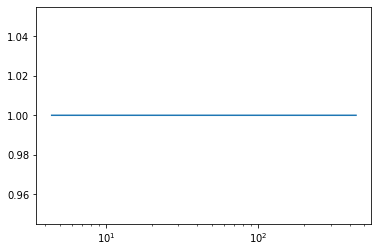

8042
[0.0023475]
0.0
45.194742982567675,21192.046559765236,0.019709432557975724,5.4808042436143025e-08,998.6182924992894,2818936.5466148537,0.001307717712698187,6.309888901223386e-07,202027.072332674,7800299.281955435,1.602660795743845e-05,7.495184655850227e-10,2724.869674212349,96308.61350478821,4.0237996478752535e-05,5.719704564201922e-10,18.336944017885212,1.4490186120567188,1156.2915340363506,0.2241162898289871,12191.665480941556,0.6289647073115711,1732568.334992314,0.006222732891321168,1.0,1.0,1.0,1.0


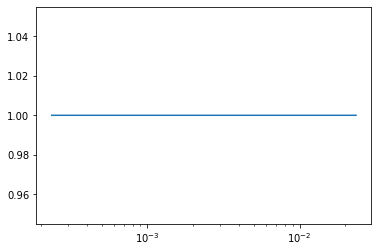

8046
[520.2275785]
0.0
0.32940997681498624,39.77736891775377,10.342541838880258,0.0006655293815503687,0.388302821693276,84078.62520751511,0.009807281008905891,5.072396551307747e-07,148.68200471051304,203814.9434441014,5.343629844514751e-05,3.1710258108499414e-07,0.6030211500334737,132.15359172488257,0.07874226892334482,7.479540934591698e-05,175.25447187732914,0.0038268053699377935,33075.304535731564,0.00016559484838883951,14376.874384440987,0.00019723931697856464,21015620.744669467,6.139334164143765e-06,1.0,1.0,1.0,1.0


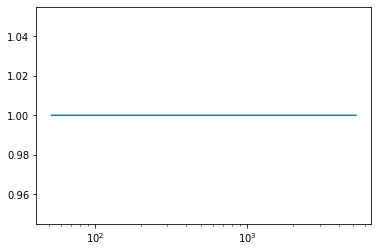

8065
[28.2852888]
0.0
0.25967984384927223,161.2657745706293,0.06907822244035768,8.04212060897678e-07,1.766661510951394,2291.0022230316717,0.18975282886635267,1.750079012923418e-05,124.13285706759989,473957.1041623878,0.0008281763176185972,5.461264336588322e-08,31.079727700639246,24411.985003668953,0.0002798957260106405,2.9966283262940993e-07,359.1306226477692,0.06298020830845383,158054.14207157822,0.0028607329543469426,27911.172636280782,6.672063617450114e-05,768885.7588848644,1.0700786191887928e-06,1.0,1.0,1.0,1.0


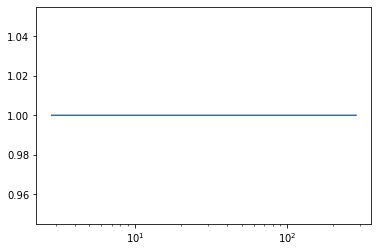

8074
[356.277544]
0.0
0.8828878772971414,717.2561799727367,0.0032470857076319216,6.862816467117215e-07,318.0989798700965,304819.8407365096,1.5672453790110894,0.0016346424751932944,4107.2529303462925,30629160.530082483,0.0020334259257178563,3.2084254688785507e-06,454.0700522571269,128762.07948796028,0.00031382810479772523,2.1545574983039022e-09,0.0017035924467619686,0.0017566016639157464,0.05426090910006587,0.0004294218758231645,0.006599430635026335,1.1045795737635257e-05,27.634254203813196,3.8477592537133037e-07,1.0,1.0,1.0,1.0


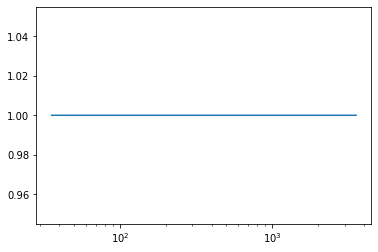

8188
[84.38137654]
0.0
0.00644495455401007,126.52709030596552,0.31165012001175774,3.8897767801676646e-05,35.159502424572956,432.98268865081985,0.003931072363938166,1.28205636860445e-08,93.6756618922053,708.1127144759814,9.73405085271759e-06,2.2656772851609734e-11,0.6946515590535091,2679.2457216572416,0.006423356907782649,6.851465489214609e-06,107.90020892570331,0.001747906191299908,9048.137973161054,2.616130517856527e-06,2246.86980713605,5.958568494914986e-05,10574.549036429025,4.02349297867718e-08,1.0,1.0,1.0,1.0


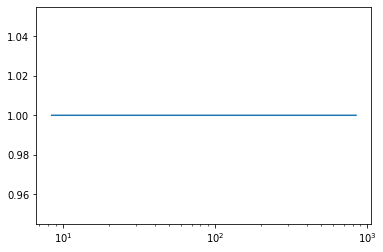

8230
[12.7547753]
0.0
16.550943896450956,80101.47595690562,0.3935273089652515,3.363499667986445e-05,3.193859680883633,68156.5113308603,0.014695074070098088,3.960390060722489e-06,153.4637323632074,747374.7567480868,3.1086318392996525e-05,7.605358357351265e-09,503.3374403834567,93957.2711335106,0.02261519835404096,7.983657951069419e-06,11.303218837768538,9.328939288599937,4703.212371644819,2.363873047575057,140.66301815880908,0.022256177175153713,209087.04483894477,3.243968348698304e-05,1.0,1.0,1.0,1.0


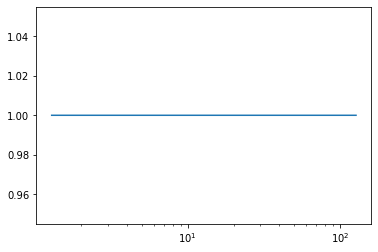

8260
[1.05747396]
0.0
817.3069305921066,25058.257471975965,34.372650897103675,0.00018364613799530993,0.6554499799147963,12972.772808799064,0.0234815512763938,0.00010909602357885359,76.29352453749208,7588878.560686034,0.007552659214245746,2.8910043069195677e-07,1928.5443471814917,8471077.07236112,0.04999618713856136,4.47288551592407e-07,276.68064563369336,0.07811140229967113,1579.722166937119,0.021140252017651975,57761.200341953336,0.0022195020118406907,26814173.435629647,1.9417279014880208e-05,1.0,1.0,1.0,1.0


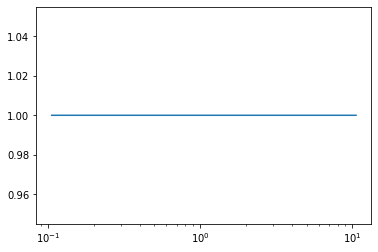

8308
[26044.22337813]
0.0
0.2627222241157815,1.4780608040887278,3.0211977086440513,0.018631246654293606,171.37773592838238,5789.46584745387,0.0017032376363907084,9.088279670197757e-07,242.6916981946904,140605.32590652685,0.0001164397460793689,3.926823313661846e-09,0.3284140103551925,57.994866639194214,0.5693571782572746,0.006308709402866104,998.3322642771167,0.0011217232236549696,14825.865551018365,3.7367114405208843e-06,219799.11538484428,7.671769613059516e-05,8358321.644833134,1.169058962504969e-07,1.0,1.0,1.0,1.0


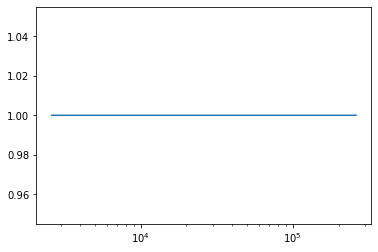

8434
[10271.18972207]
0.0
0.001346916606430855,5.298783922791272,0.02070974642671704,0.0005073036089212694,142.52571202239247,6962.924547166497,0.04011240089169715,1.916711646591901e-06,314.0923078914547,3104574.3571207453,0.0009387380151865101,2.784846154228594e-07,0.45664401308733377,9.733827824059663,0.0030023282022095294,3.4712768722788775e-05,0.06681184549515466,0.006120011867992993,0.7193334697317296,0.0021260143162333514,41.61674866945223,0.00026846387212582233,25942.175172276817,2.6895554004388855e-06,1.0,1.0,1.0,1.0


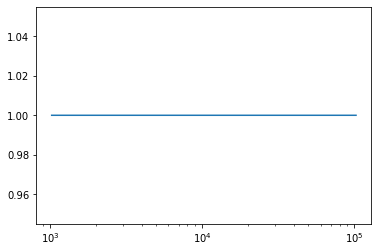

8446
[0.00161276 0.5       ]
0.0
22.769647404305086,12522438.978769617,0.0015183756227076396,2.9403364266507176e-07,169.04535203622376,262112.76592644028,0.010824969393521117,0.00024654834188615114,301.77478047852054,155853479.2433967,0.005552609782159428,1.2881931339364032e-06,21757.579990124967,915329779.1523272,7.608198201281916e-05,2.4362370705606364e-07,79.38584167088257,0.2647021838578355,431.4395963953585,0.0022582470927141546,338.66003094908547,0.022550137674217756,31227.065085024176,7.897038514667345e-05,1.0,1.0,1.0,1.0


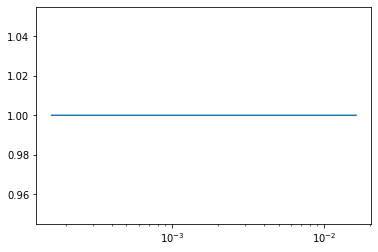

8446
[0.00161276 0.5       ]
0.0
22.769647404305086,12522438.978769617,0.0015183756227076396,2.9403364266507176e-07,169.04535203622376,262112.76592644028,0.010824969393521117,0.00024654834188615114,301.77478047852054,155853479.2433967,0.005552609782159428,1.2881931339364032e-06,21757.579990124967,915329779.1523272,7.608198201281916e-05,2.4362370705606364e-07,79.38584167088257,0.2647021838578355,431.4395963953585,0.0022582470927141546,338.66003094908547,0.022550137674217756,31227.065085024176,7.897038514667345e-05,1.0,1.0,1.0,1.0


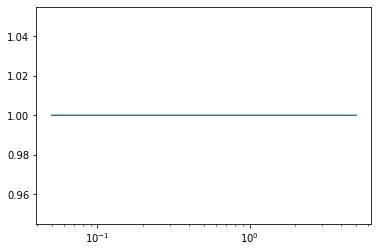

8588
[36.33671671]
0.0
0.12129217853844186,943.029641541382,5.826873534838354,2.6524812448155927e-05,0.05948550015410677,30826.247765129025,0.0010725666947510675,1.4661737789004148e-07,56.31708873255855,4561890.146344873,3.8168359906129485e-06,3.966657397364511e-08,23.771578989635408,9402.709658563133,0.01600717962403809,1.8048865098194456e-05,10.474604925550407,0.1528015079583043,10060.300844438596,0.0001598427929420743,1851.781501687175,0.01440004381344644,4369966.508766433,2.261965025117176e-06,1.0,1.0,1.0,1.0


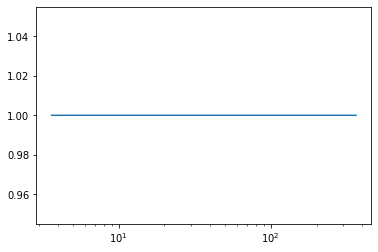

8599
[10.87435596]
0.0
2.241901384226749,1467.5713119229365,0.08364686464590766,2.63323120861352e-06,0.011320521042817904,9.656495447142577,0.011174579184401337,3.545394661944863e-06,0.7210516231135862,1018.6058920380036,0.00037445143917206166,1.1843071496461474e-08,2.992715226544419,25356.86138513591,0.00016074324852355124,5.538289245907146e-09,260.2757933049415,0.004471710680691223,395.50977253019767,2.38128391073073e-05,71289.39708646518,0.00241361105364909,7972551.521243143,3.325657252902909e-07,1.0,1.0,1.0,1.0


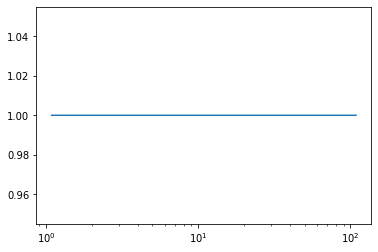

8612
[0.088028]
0.0
0.8557666140449256,15157.166404656125,0.0012431348428813883,8.988633494430089e-08,0.01893350079715904,14.85459183920402,0.020779995913819675,4.33791757301584e-06,0.1857060752450658,114.74152724172487,0.0004358876284505758,1.0046943100067995e-08,69.07587742379306,3435505.844061741,7.973695585607139e-05,4.22572768750769e-10,154.8108039822383,0.04107950651470621,1213.9856820809212,0.004728179151027257,454.7674445267565,0.00012127065069079963,4841.101568447009,3.3265726902323465e-06,1.0,1.0,1.0,1.0


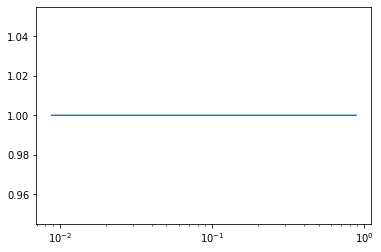

8665
[84.88623971]
0.0
0.009052712629689612,132.8159386862932,0.003183743356901818,2.9977206394348203e-06,2.2540386386955142,235.23809430440662,0.0013279483202011267,2.1706934751520182e-06,69.90628000328005,48061.25945294426,2.010009258220608e-05,1.296438943450693e-07,4.180232981673048,5220.994540133539,1.6275025562756904e-05,1.1657018751234568e-06,68.69228477860246,0.1717258977182184,2736.492057002463,0.013110185157189942,2693.6297670353724,0.006906437912040739,5439.004495587679,0.003406908714091615,1.0,1.0,1.0,1.0


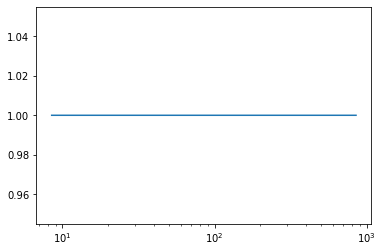

8727
[2.51984213]
0.0
6.532314322906252,5520.37618411103,0.0022293054519139624,5.93927141600921e-08,124.49382009928485,2489310.6210100334,4.065224040542685,0.010486618136684306,10677.431623725144,78182955.15791722,0.1883130660996136,0.004521789983174609,614.4441674309229,4997110.0872269375,2.34694151190995e-05,1.8887181176263298e-10,4.755332016142349,0.00214848233910384,22.260815767118405,0.00043594239580024434,5.456186969850387,0.000107494638819469,16132.549870185585,1.1872362626840574e-07,1.0,1.0,1.0,1.0


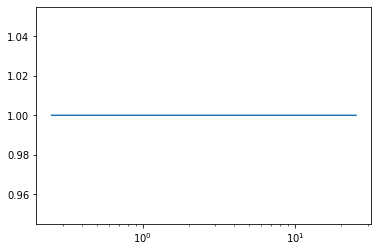

8729
[100489.85144159]
0.0
0.0269446156090403,136.14883922710587,737.8039913878617,0.3303456516966349,0.387253525467115,158.80410765740726,0.011553765964790914,1.2892988426733657e-07,48.55034961942346,9330.122545080696,0.0001145302236972335,4.199716616504505e-09,0.5930110402523923,80543.83893438062,122.96454975896101,0.05557620883256574,800.1416928909805,0.0030997468100262483,3144.8384310096385,8.290580122683338e-05,237449.97028386814,0.0009666756768156243,7293974.62258197,3.3230124830805772e-06,1.0,1.0,1.0,1.0


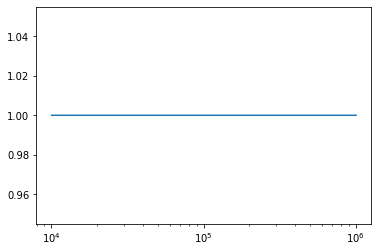

8758
[992.17752863]
0.0
0.6391750895577497,34375.55290933976,0.001313404836314947,8.649969623485083e-06,935.3863548971716,168486.42088667024,0.15130001223585834,5.415630313019537e-05,35166.287984666924,152760848.67166984,0.0007640128158831401,3.147085554272641e-05,130.5952716039707,762148.0946932996,0.0006469462098904012,2.444576422775598e-08,60.08431778475904,395.24945033159185,14115.224430912953,0.39890136688298966,107.8076337294874,30.934364124630548,46513.67303487911,0.014853494736741909,1.0,1.0,1.0,1.0


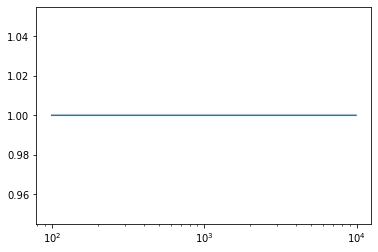

8782
[ 106.48813635 4095.99995262]
0.0
0.06187219907128062,24.879314552243276,0.0017268954961464692,2.886884843911459e-07,28.556603442417707,15595.486538682444,0.11530104923417372,1.7159489035871501e-06,699.0681193163323,66129.05470213546,0.0005405598508242472,2.186859554464418e-07,20.993897797259766,94.55784722759847,0.00015097524421292223,5.236120840021649e-10,259.9078463936239,3.5158555381656975,1372.420691382591,0.8673661727747776,91280.0859590955,0.07395267108852649,87807474.9644607,0.003270500355910889,1.0,1.0,1.0,1.0


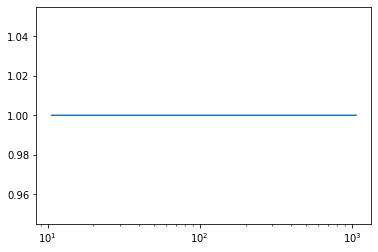

8782
[ 106.48813635 4095.99995262]
0.0
0.06187219907128062,24.879314552243276,0.0017268954961464692,2.886884843911459e-07,28.556603442417707,15595.486538682444,0.11530104923417372,1.7159489035871501e-06,699.0681193163323,66129.05470213546,0.0005405598508242472,2.186859554464418e-07,20.993897797259766,94.55784722759847,0.00015097524421292223,5.236120840021649e-10,259.9078463936239,3.5158555381656975,1372.420691382591,0.8673661727747776,91280.0859590955,0.07395267108852649,87807474.9644607,0.003270500355910889,1.0,1.0,1.0,1.0


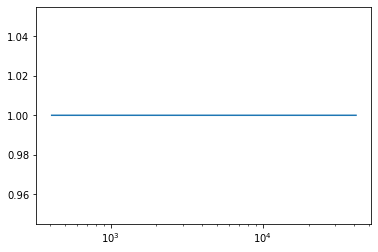

8791
[1024.00935061]
0.0
0.0012558077279572143,37.420748836636214,0.0011752292863550882,3.7525616357390536e-07,13.769581112095308,35134.796024844014,0.0014724534287428842,8.273131584532104e-07,1786.4556471564313,647820.9294005842,0.0003387074991932753,1.0875818544921857e-09,0.5422495756411323,12811.485798165797,4.729101290475011e-05,1.9233163614857468e-08,38.43487491185406,1.22956854371114,1503.965721066223,0.6245068910911528,294.6096035400769,0.45080659735590145,16574.76317991093,0.0022322237452832533,1.0,1.0,1.0,1.0


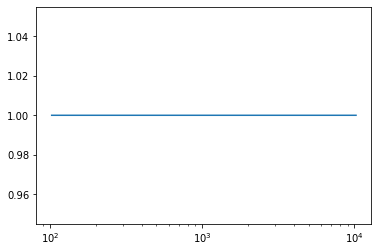

8821
[1852.57783039]
0.0
6.588398523215552,8.214342241347833,0.0019094631347685606,4.054977384144867e-05,117.23373975852729,1399334.9369953324,0.034471226935052064,0.0002088762393346335,70769.20118256916,25765013.42840714,0.0009054177500260899,5.6145387378734096e-05,7.245373050791069,2416.5412924640077,0.00031034704002927806,4.328869046537486e-08,0.03833397652126979,0.5828053104653232,25.624665291949277,0.010088564039011294,0.06442690085516052,0.5019534298212578,1959.6859021666935,0.00010504332632356801,1.0,1.0,1.0,1.0


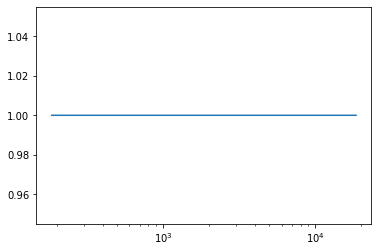

8981
[694.48487039]
0.0
0.994922065281183,118.08552520803481,0.2499820666689637,0.0013629365764271767,1.3488492831457395,22890.762112356704,0.042858132476588734,0.0005902652102529574,862.9853798509366,3818082.7748191925,0.0006294592195457388,2.0263128623353246e-05,89.57672573574914,63123.81125396366,0.023604652321063218,0.00020553950721914011,504.82115919543196,0.0439429602569059,63599.955118518395,0.006717017655545912,17673.529031466394,5.680425622788028e-05,88980.23585816899,1.6762164076192503e-05,1.0,1.0,1.0,1.0


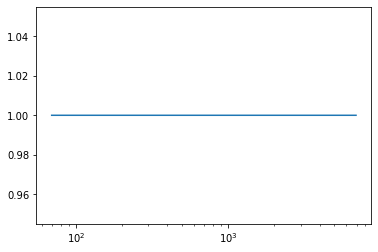

8991
[3.79993826]
0.0
44.369069173835896,74138.21943143256,0.01020674401432337,4.694697016625794e-06,0.001267259628568448,0.039221633918233835,0.0348119375574826,1.8886963938486706e-07,0.002441488634079584,15.517702038389707,4.005293167701394e-05,4.3546479478797507e-10,380.0579296886954,14777123.923727723,0.00012975139556619975,4.728321312115262e-09,708.578111276923,1.2703942053864812,1177.5290671248354,0.024664818242929883,125227.92435503425,0.002096369705537823,6952759.260235862,0.00010020526229507926,1.0,1.0,1.0,1.0


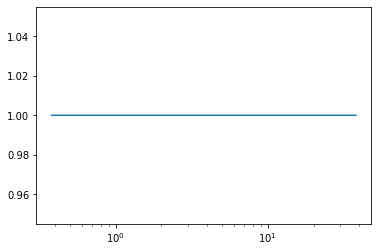

9089
[0.0081952]
0.0
200.37239586708242,47761633.78476679,1.0516030008619595,0.0006831641514267767,0.5958959700732778,311595.3397119499,0.02649028555491812,3.500321131137958e-06,332.32752116415196,5248630.487205053,7.485047331460247e-05,3.0812554476846194e-08,107738.46099177343,53949313.873518966,0.0021490621256289063,2.9028842403247395e-06,556.6140640719307,0.15845037268562143,261239.15900156723,0.04135399078114373,110592.53565861146,0.0006170945410439113,2494519.299848269,4.1414904612177524e-05,1.0,1.0,1.0,1.0


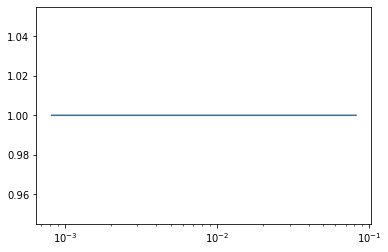

9163
[0.00138283 0.00331863]
0.0
917.8414160785726,114142746.05498156,0.09663250821043623,8.772253801021578e-07,0.23146266629302678,618.584279327071,0.15642530279035927,0.0007126711986589671,15.83617884576737,71466.11006041704,0.018181858397544687,0.00019358218225657965,433687.8998622791,532753834.2257309,0.00038834312581998375,1.1369410886681279e-09,908.7863716801522,1.5935161214824118,2278.6872058314725,0.06318429044908822,1848.8688981055543,0.0026702725081714403,284909.96532578644,2.8948416305171808e-05,1.0,1.0,1.0,1.0


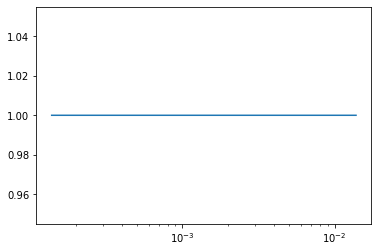

9163
[0.00138283 0.00331863]
0.0
917.8414160785726,114142746.05498156,0.09663250821043623,8.772253801021578e-07,0.23146266629302678,618.584279327071,0.15642530279035927,0.0007126711986589671,15.83617884576737,71466.11006041704,0.018181858397544687,0.00019358218225657965,433687.8998622791,532753834.2257309,0.00038834312581998375,1.1369410886681279e-09,908.7863716801522,1.5935161214824118,2278.6872058314725,0.06318429044908822,1848.8688981055543,0.0026702725081714403,284909.96532578644,2.8948416305171808e-05,1.0,1.0,1.0,1.0


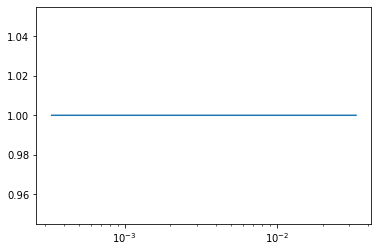

9168
[0.60741865]
0.0
12.686927457606572,385.5354068922041,0.008871907387900821,6.784356811555125e-05,763.1986064130389,115596.96999955333,0.15562722906473944,4.998034166527235e-06,51705.07585288548,75583308.02718823,0.0014740596511372912,1.6847408283510594e-06,165.9373188959535,7514.668517732731,0.001103098459849679,1.9770784305702133e-07,1.2414142013681821,0.003309184196950521,687.2698053566901,9.163003769656342e-05,1.3424883820336995,1.0701878419720192e-05,154206.86307063387,6.033987905738174e-08,1.0,1.0,1.0,1.0


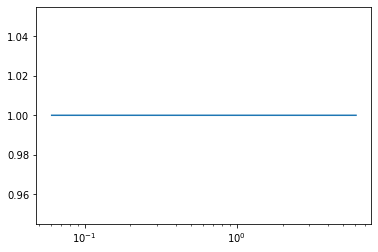

9197
[0.00079208]
0.0
918.7824196992858,1125631.1875113084,0.0979961346087155,5.645522371037054e-07,315.07376126463913,327488.3202664777,0.07872709812637066,0.0001611185689324407,103848.12004935369,195658347.0659033,0.0027669062605916593,2.878617460857096e-07,127681.3343054885,1352292.2834422188,0.0003304000289264247,8.009974095882284e-08,16.652301564990204,0.0013842223568753637,43.58213648946726,7.91178966626766e-06,662.129270830468,5.5011318947014374e-05,90076.01073540436,3.1692351075016583e-06,1.0,1.0,1.0,1.0


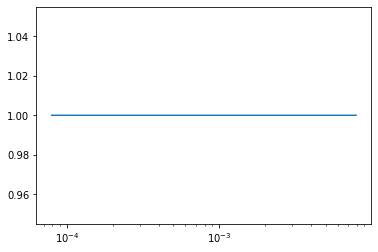

9218
[169197.48059806]
0.0
0.002360996918706349,0.09288037140857298,0.3829905667178757,0.0008755082148726975,63.844934469472626,230957.77275708743,0.31214615876557816,0.0016472817333736385,23408.150988039044,124362266.7403071,0.03372640645952206,2.908074936499503e-05,0.0039474701353241935,6.154472692587672,0.0012408485285298513,1.0220995367985673e-06,11.272012075847755,0.2774163585417293,2556.5497041728154,0.004395565574130965,590.7439743356189,0.022994542213771285,2448689.147104513,2.3310649910531007e-05,1.0,1.0,1.0,1.0


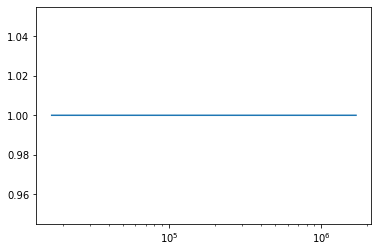

9220
[59.89368515]
0.0
0.5882482484946545,450.14853699615304,0.05652408233078892,4.56217153680529e-05,0.07439939796979102,1235.9430858592425,1.5258348460973246,6.295694716465841e-06,3.9092239794509234,2464.8256828524186,0.0016926669599815365,1.960676035664794e-07,4.027377285778924,105293.36767043205,0.0006854540688896138,1.3435603137869717e-05,738.2175324160871,0.00944600520261321,4463.153621747004,2.5926990375976062e-05,1463.612677263334,0.00010505318322906393,54505.870278532704,5.494820791037759e-07,1.0,1.0,1.0,1.0


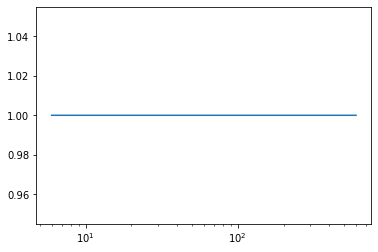

9256
[1.51860351]
0.0
2.6382772172359745,7386.884285173296,0.005435297437941229,1.31533641108727e-07,313.32748059057434,1089537.93818776,0.25040988941960873,0.00021022089007483025,4301.610361899451,2054359.9845729992,0.0005587565150343532,4.9102315993645304e-05,77.66240960624422,3772216.2358660297,3.123531064933881e-05,6.316666518554732e-08,156.69596334436886,0.04630482208905435,7181.5732576712535,0.00011944183159214136,15552.485439068678,0.0007714294553410733,1546410.3612148887,6.287079435934082e-05,1.0,1.0,1.0,1.0


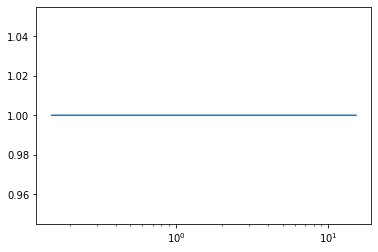

9307
[25757.91052907]
0.0
0.0031282064322703446,2.690345711090936,0.304101908476859,0.0027437512145450965,436.6268618954698,88392.673101103,0.0044648599884518575,2.3275851475196227e-07,2546.3162120058405,962974.2256228145,0.00011991530326566567,4.6056180296956e-10,0.10855958079592787,122.26405299500342,0.08287898950997526,0.00022072007685542617,0.4640283514984471,0.00807943535034069,101.20631746755015,6.998674545138479e-05,139.19073722046778,0.0005959651306140298,6398.507797803797,2.5798651291936255e-06,1.0,1.0,1.0,1.0


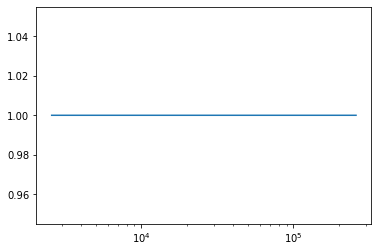

9323
[0.12187783]
0.0
99.64321584799166,5933234.743517871,35.656925913644514,0.0006182561527493054,101.82949738923516,42426186.738482304,0.0028822073049757277,1.3947305258862957e-06,47812.13492115365,1229835315.3302774,1.45242975449861e-05,1.0359919641946782e-06,7160.186263121938,17036822.325930297,0.09553829539102933,7.226950565747753e-05,94.02666834412204,0.0016343491360545812,818.2193353514654,1.039804631589027e-05,4432.519706723606,0.0005834409046111944,42825.229901252205,1.260711237011646e-06,1.0,1.0,1.0,1.0


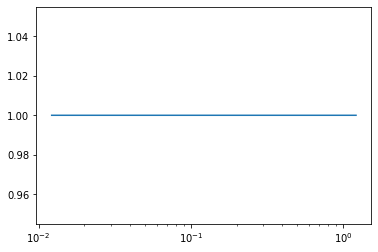

9447
[32.00083982]
0.0
3.113731237275312,16537.464040046358,0.9505497522833479,0.0007404867011484447,107.6259954086665,373778.8473296516,0.003447923780401516,2.6298398284384406e-06,6122.988755497975,3122941.9624980255,0.0008773532946303388,4.447634894847019e-09,48.6232709783426,262489.34945317067,0.0020262799231364017,3.644605259789773e-05,31.787660044302154,0.013656358824504892,1035.330604621893,0.003268320085344415,3133.9318896450386,0.0014781453080879399,179348.69087240795,2.4146878203368788e-06,1.0,1.0,1.0,1.0


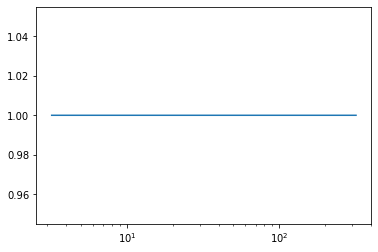

9504
[222.78155234]
0.0
0.027983721903514888,34.1478945995757,6.126631410326565,0.00991794237166962,172.7778941237,3602195.03385381,0.0024515909818249378,1.0471339869748707e-06,4839.935923044479,15270548.485702762,0.0002191539822226124,2.5685531921710188e-09,0.5204318262468558,8439.889609114189,0.04384568085298779,0.005332615784711504,66.63181368471302,1.7686342294084645,49417.46747017056,0.003493678312453734,55354.32576628603,0.014411686948445067,208600.61164746774,4.069079039802956e-06,1.0,1.0,1.0,1.0


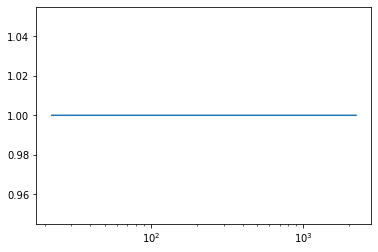

9506
[3.60550658]
0.0
1.740366714381179,1987.9745835566769,0.003634203194370041,2.2246664264081335e-07,96.5541008293347,31213652.93607235,0.001574113209031298,2.533205533979405e-06,61189.55391517968,5682403095.603056,0.00022601905077969376,1.914149881605726e-06,153.52482812129472,72890.50252845827,3.5957092911877466e-05,1.7606587691227618e-09,0.17904517494897942,0.004300616664687526,2.4308935284133217,0.00012911340915132825,4.5801844674922405,2.260067591669096e-05,14.165361918606829,3.029089916405795e-07,1.0,1.0,1.0,1.0


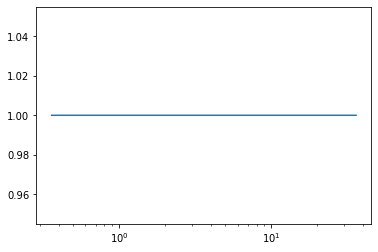

9518
[0.00038954 0.04419246]
0.0
925.3384556269007,65401.82184876667,0.0011384957191413415,9.494696161488477e-09,335.60274694156124,35034.508981346786,23.218188226896736,0.009407757382301225,2833.313848428889,25211522.196748525,0.290815416676237,0.00022619838731968424,48834.60182363422,7764857.238747549,1.5776813327753327e-06,7.29629916135449e-11,63.81437820483225,0.0014040993577363783,153.30212299237988,0.0004422409505699338,607.6449647467505,0.000141431988183171,28918.562088440798,1.4829979256883155e-07,1.0,1.0,1.0,1.0


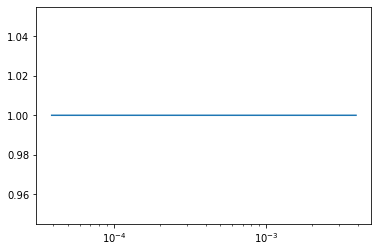

9518
[0.00038954 0.04419246]
0.0
925.3384556269007,65401.82184876667,0.0011384957191413415,9.494696161488477e-09,335.60274694156124,35034.508981346786,23.218188226896736,0.009407757382301225,2833.313848428889,25211522.196748525,0.290815416676237,0.00022619838731968424,48834.60182363422,7764857.238747549,1.5776813327753327e-06,7.29629916135449e-11,63.81437820483225,0.0014040993577363783,153.30212299237988,0.0004422409505699338,607.6449647467505,0.000141431988183171,28918.562088440798,1.4829979256883155e-07,1.0,1.0,1.0,1.0


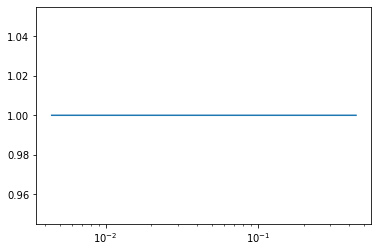

9519
[176.78526112]
0.0
7.474852406169128,3259.5078462602505,0.18421487772409828,0.00041057861629873864,788.5172878843003,2168082.457979166,5.7437228989435605,0.01868771305090153,66749.09701862579,30077172.091486853,0.27439791803063923,0.009960823003408151,178.6391955590684,201746.22807599968,0.014294430062519152,7.609697691217293e-06,190.5241073236488,0.05328327354342975,965.4516863083792,5.6146956920310414e-05,764.9846736775713,0.00019829265469924708,152874.98590348221,7.241508398519229e-06,1.0,1.0,1.0,1.0


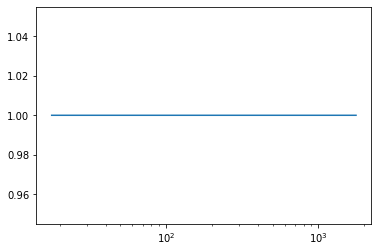

9561
[4.76686019]
0.0
0.9088183294870856,1069.2654895835497,0.01174902020523074,7.51248990967229e-08,33.10135304605604,81167.21454475359,0.004281774866394682,5.607418705246977e-06,93.51394265438476,18296903.850630432,5.333642216029537e-05,1.953084554502445e-06,13.950729060549339,42328.806823697254,6.619077964349815e-05,7.227628811041272e-08,0.0017359839138410273,0.004885130643866153,0.3584936420763818,1.071830111043001e-05,0.003953084803250274,6.728841643532012e-06,250.14931319386673,2.9305459559542753e-08,1.0,1.0,1.0,1.0


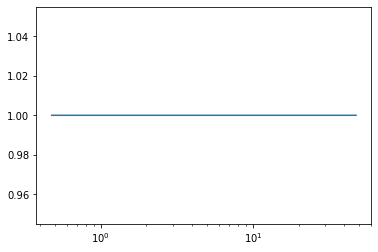

9632
[16569.72708981]
0.0
0.0021096714251164898,4.902172675886574,0.002560079505083176,3.5549439974843693e-06,237.09644791043806,3375587.2090822207,451.59290744588037,0.4187368775089628,6925.420580845599,138430099.38927457,0.8375373447999955,0.006500210292140027,0.008752519441703516,371.92942003189455,1.2042973170705007e-05,1.3572024837102163e-06,105.26339796499502,0.0013826757871883933,432.5567156870206,9.543160554631142e-06,32855.295636210496,4.347157299683291e-06,16286420.298044523,2.4965259923913392e-08,1.0,1.0,1.0,1.0


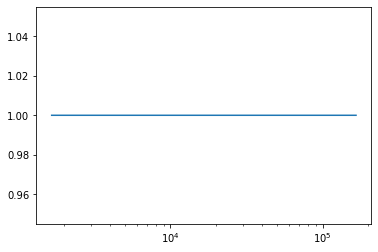

9651
[1.69617826]
0.0
1.7504497761929638,2503.5725243908855,0.06865280624817943,3.624861680634024e-06,13.740434386152486,89715.47513989682,0.0022253287945298203,4.921656181633427e-08,7180.422132382215,9821816.553733515,4.5763656061278554e-05,4.873464432097549e-10,141.63832514291406,876334.3199155222,0.00040294988005453033,5.626291758578942e-07,559.7672102107732,38.225894115807385,54228.96964613388,0.8062039866080655,1224.7706784199515,10.505284366843652,3096705.154553751,0.06943279170956153,1.0,1.0,1.0,1.0


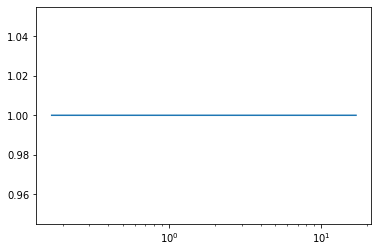

9669
[4100.05210619]
0.0
0.3347022773338768,139.68204004060755,0.0017011129339910948,1.3010830107694659e-05,0.002650980614810485,3.037403904640584,0.006059166371439923,1.5251955080066253e-05,0.012892508502029346,11.994777267410974,1.639463702398515e-05,1.5846445521842435e-08,0.5151212545259892,169.8029768292354,0.00010386500540690894,1.1999526279790068e-07,46.303261380614984,8.28769544594384,5443.943727413097,0.02291630776140546,14608.896610900465,0.009117243743218343,12382253.491190389,0.0006559836483909526,1.0,1.0,1.0,1.0


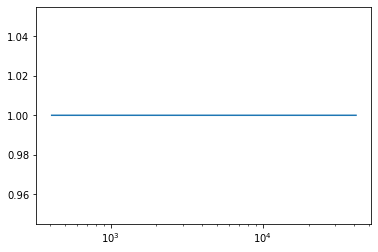

9709
[0.153099]
0.0
115.43435680327096,169761.15708479934,0.0038542245651568877,2.9661979694375915e-07,105.86665474554621,6256835.764162795,0.0012003736738342894,2.0974850365593155e-07,26371.427386318483,13079214.357977116,7.113633206128521e-06,2.4713693279760523e-10,2817.27074972158,1249660.3290287808,2.5462121567630418e-05,1.1593727100702316e-08,0.18831293999866908,11.759293714735863,42.94111514311847,0.01878807698087124,42.869145854704286,0.03901329385337816,8279.455275637476,0.0008760115459976863,1.0,1.0,1.0,1.0


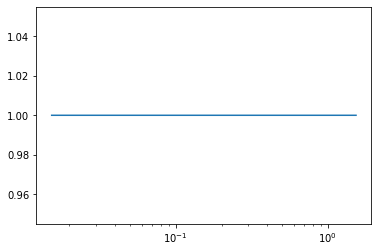

9778
[0.59207016 7.99699367]
0.0
450.4879704788509,20047634.870060924,33.34723588058264,0.03776034864039706,0.021144386590794866,1.5693218526941712,0.017919166710329972,1.356594560754411e-06,0.42805063768264145,186.73636351835637,0.00011693271344511742,1.717725180925273e-09,29288.429018362178,17851016847.18343,0.46305038933999,0.00022101638225023408,801.6827190301107,0.0918218359832944,771430.2862074637,0.029331059415122516,635163.609319251,0.0033275630468527447,41233608.917105004,0.00017022012199847703,1.0,1.0,1.0,1.0


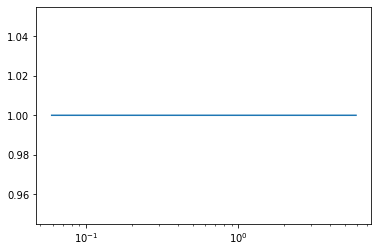

9778
[0.59207016 7.99699367]
0.0
450.4879704788509,20047634.870060924,33.34723588058264,0.03776034864039706,0.021144386590794866,1.5693218526941712,0.017919166710329972,1.356594560754411e-06,0.42805063768264145,186.73636351835637,0.00011693271344511742,1.717725180925273e-09,29288.429018362178,17851016847.18343,0.46305038933999,0.00022101638225023408,801.6827190301107,0.0918218359832944,771430.2862074637,0.029331059415122516,635163.609319251,0.0033275630468527447,41233608.917105004,0.00017022012199847703,1.0,1.0,1.0,1.0


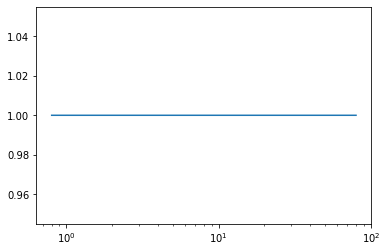

9823
[0.5001891]
0.0
312.2725767416635,124094.0599585013,0.029933979031149333,0.00026601945536848314,2.587229277977878,4625.013057275118,0.0028941201713120904,3.775936562793173e-06,950.1031202421048,127366.2920014758,0.00011687431772432964,5.166864080038464e-08,10673.447233037386,28520297.229400065,0.009172208718612202,0.0001011527960618491,45.492475447029506,0.06602231855819482,314.86411915386,0.0005493228217947726,28006.21384878612,0.010593902520533407,1367476.1038042558,0.0001258590909146116,1.0,1.0,1.0,1.0


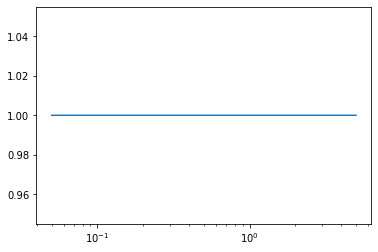

9840
[8872.80535027]
0.0
0.0026746404116608237,0.12856103828656493,0.0012180979492787114,2.035511561692623e-08,12.508906339489375,42.07954529187442,0.036341585256111135,4.238952559931851e-05,22.62249218754211,11308.41618775535,0.0076463099837914055,2.8157476000576894e-05,0.060397367011960065,70.56906188323245,7.449684442691586e-06,4.160797076226863e-10,107.9579239553896,0.9796783432496605,74331.2069673193,0.025688150259454385,955.7256884497084,0.39880359239880137,114021.37590096351,0.0007055624014039363,1.0,1.0,1.0,1.0


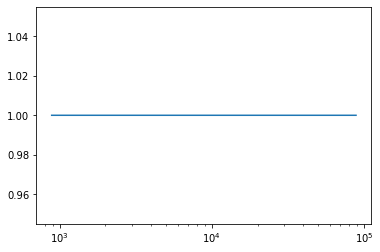

9867
[1.52744442]
0.0
23.88407801803626,365543.82312677277,0.07661672372782084,7.567662788426265e-05,18.479592043390696,1037.1212331554577,10.321274133216281,1.8150110156315822e-05,596.5735770986927,6138.40768656086,0.01434609443227697,1.0515322300466813e-06,1040.905049810695,93882221.47455879,0.009936782904750741,1.3999935257146764e-05,258.320160343906,0.04346536542049541,9094.747149454804,0.001729205797103391,10529.267384769935,0.00011088245951175874,1104175.402545913,2.552686483755701e-06,1.0,1.0,1.0,1.0


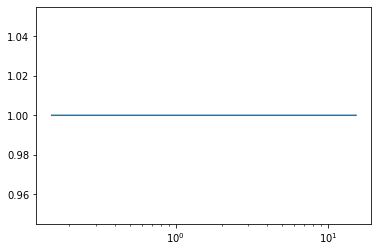

10000,10026
[2.52983129]
0.0
22.96076708606646,2117.267758737201,0.030225250970305217,0.004486639968001858,314.27348273500564,3745628.346843152,0.0013264171851838156,1.403107107202887e-06,43529.85537436699,14120364.39536322,3.4536296234234364e-05,2.1679372001995442e-08,43.53629464309965,11045.890582742119,0.019958979069980967,0.0008571081794227868,35.77030820660235,0.011919781869475394,24865.32555575266,0.00010238966149449474,812.9367898295259,2.7937855060854387e-05,220222.2108637724,3.717890264131612e-08,1.0,1.0,1.0,1.0


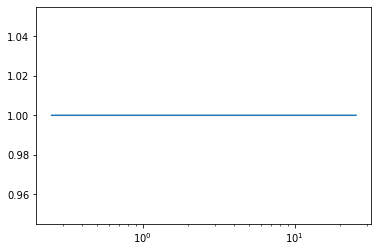

10063
[14.4294631]
0.0
70.6645783826277,9681.274091525383,0.31224873725512436,0.00021499919859517495,90.12506603707244,85407.95284768863,6.9961462464907225,2.3016162020260755e-05,24600.611341345128,13753821.062124267,0.010014093256480677,5.102017156022365e-06,743.6881669923644,735647.7099233664,0.02346922108591901,1.5252555294042462e-06,5.494970812501399,0.0014802121218239017,1208.6403119554975,0.0006616611948201289,3645.199866670863,0.0013577426950993254,1800708.3117788485,1.3948125793912472e-05,1.0,1.0,1.0,1.0


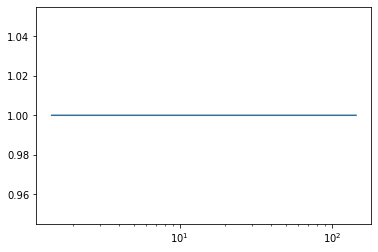

10085
[3215.062884]
0.0
0.2633644051781527,449.2922995143741,0.024996006268125107,0.00011524417685463124,460.46233979288354,59450801.492605895,3.889248195182537,0.027428376155287287,73302.93354736546,300114803.3830578,0.03684991728591572,0.0006454788955353513,3.066055843467121,3543.8671644142655,0.00012434172158580698,8.322050820585934e-07,0.31308682868013643,4.013326611677085,130.50120055616782,0.07200458871618605,192.04056461274692,0.014085211179665283,15390.560544143313,1.705619883436768e-05,1.0,1.0,1.0,1.0


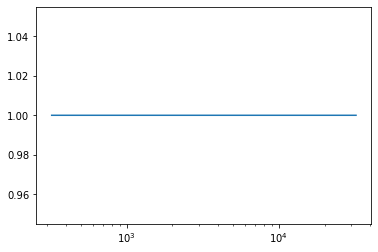

10104
[186.08711248]
0.0
0.0991830798714744,1612.9926176932022,0.0018541776087909558,5.909397103715209e-08,29.395478092404637,1699663.747629065,86.20917313463335,0.012570096734945394,2626.0170219080037,898906681.2841303,0.11365376758125369,1.804661610843888e-05,10.579179729979497,3003.5096663054364,2.5310496771713985e-05,1.8180252474559872e-08,150.0487448573429,0.07919989726981722,3847.0525958095495,0.010192735658174879,4948.382474113832,0.0019700351890032893,3533209.7261670977,2.6214444325127313e-05,1.0,1.0,1.0,1.0


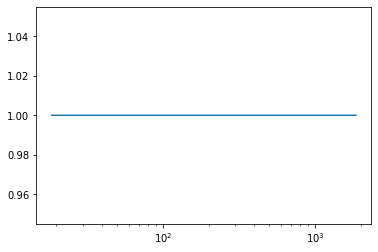

10125
[292764.46760876]
0.0
0.019630032929002297,1.2687517085495,0.017483446775901867,1.2353804533750977e-05,0.0017242942297912582,0.48866038137793916,8.230731271610466,3.8999322456031715e-05,0.015208643940921947,80.74514602938072,0.014651230952470775,3.235423401121048e-07,0.12781626873549667,54.016143594244035,0.0005441502288752785,8.075163911285819e-07,327.7929115606092,0.04069754338405765,6675.66958228045,4.253848703921193e-05,90885.85718403386,0.0020452817896470625,3477879.2835144354,1.3966514920151598e-07,1.0,1.0,1.0,1.0


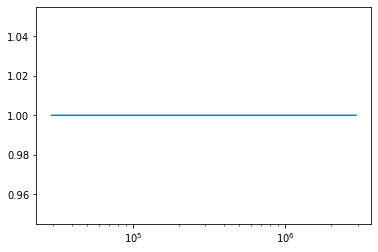

10153
[1.14398885]
0.0
243.86782572002684,99853.54926421524,0.14661207609704657,0.0005976263820213805,783.2234572012318,19267953.581961878,0.1430921526195379,0.0036073948455769616,33251.96500558277,8541126056.708317,0.08451368311811955,0.00013649892455426518,8612.852953317404,6709896.331594902,0.0014860059003056576,5.9667854908371745e-05,374.4344998783243,0.10902578601644981,173841.4841304855,0.0002263448158663283,30462.431660075,0.0005654208940485161,31046468.8678276,1.0373285088147853e-05,1.0,1.0,1.0,1.0


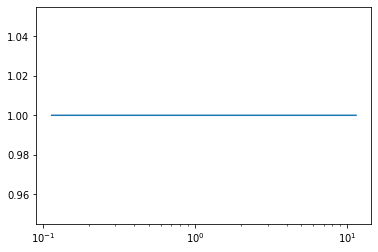

10162
[45.254834]
0.0
103.69295464988218,180611.6082763134,0.005200703588439554,3.3449687256727645e-06,490.95982327535876,33939790.213272534,2.3643947724564174,0.004574832076466493,115640.18231514795,9930499114.071318,1.9391577151217139,0.003820579476141863,33054.01081235702,64835603.93031958,8.115957727072137e-06,9.616779041065272e-07,928.6215571168178,0.677913659663525,51774.13479217358,0.0007506830532226378,5804.573532406178,0.010078318594998609,182843.595080707,0.0005342721961400821,1.0,1.0,1.0,1.0


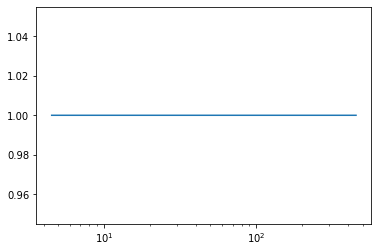

10173
[66.03701624]
0.0
0.02726135196915157,245.6769821881655,0.003167821094630455,0.0002597526802574784,33.560657677166716,514501.7548695163,0.004561035593682309,4.918402627726593e-07,15823.873691767745,45809865.852162115,1.550028586838416e-05,2.655586912784064e-09,0.6125347578111442,4945.3135091453105,0.0007352938979326065,1.9933087091107637e-06,2.9433228354201866,0.024923639921969856,17.238072307222215,0.000914334638907673,144.2640135598155,3.9597492030950265e-05,6085.375199435344,6.679678106195365e-07,1.0,1.0,1.0,1.0


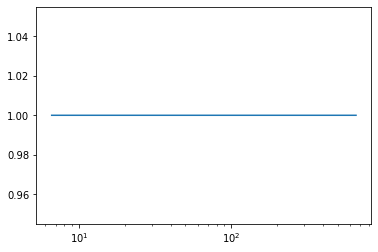

10178
[8.00000329]
0.0
254.64536601192742,2063.509464238038,0.028872375633989082,2.1090686269086143e-07,8.924731591757313,102441.95938340235,0.3347316306453852,0.0009253259205276657,1703.3360527709833,84516391.73716632,0.004002072580797911,0.00019379783556266664,297.29208829294953,683471.4434986532,4.860848346484589e-05,6.333527659493315e-10,435.0246936226644,0.007139842394584,20690.0654407064,1.0735807939268722e-05,212109.06482831645,0.0001112841170683677,180257433.899732,7.193467726374918e-08,1.0,1.0,1.0,1.0


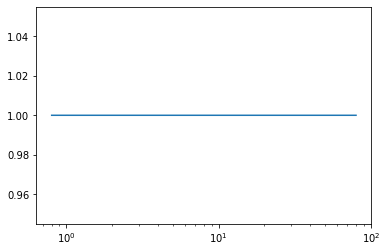

10206
[0.01816632]
0.0
247.1710512815151,414426.716541885,0.0022382311405444812,2.794872911888194e-08,0.014949397375187527,825.1807305687336,1.042540192094956,0.0006140215997994181,3.487967183383065,1260.865356913968,0.08731444414558019,2.8589157190321684e-06,46221.11707222875,3465628.517456176,1.461244580336385e-05,1.6559144240726378e-09,367.7304237425765,0.002441921823288672,913.4285928295508,0.0002870052561473368,151464.9446553905,0.0002671820057079064,98239235.11058691,2.548563683449497e-05,1.0,1.0,1.0,1.0


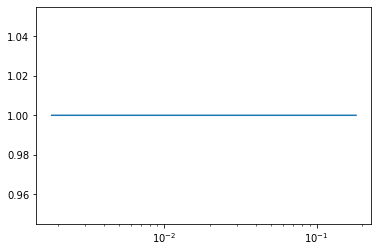

10207
[15345.03987449]
0.0
0.47423232113388075,6.418585477508268,0.06415346837077075,8.629016150087726e-05,770.6580791889236,678162.10750355,407.17814546347216,1.2584575654339374,131229.59471612624,498026619.6311273,3.5099439534157355,0.8004835057007479,1.1004356523795062,534.5277752286423,0.0001560645030342299,6.657786097121181e-07,0.3786064675631798,0.0025650906411220083,54.62199106123261,0.00011534003894157638,1.6357728067564548,3.456018292229079e-06,6275.925282575144,6.343526307041748e-09,1.0,1.0,1.0,1.0


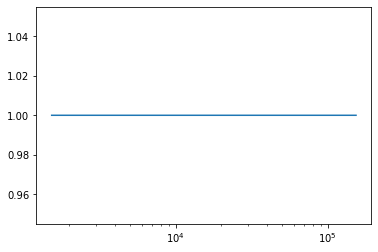

10231
[382.2622614]
0.0
152.6170642630829,14622.814655618798,6.04924686270277,0.07613236882673666,856.9929019028542,7398252.867089659,0.19072747795845107,5.513147468004417e-06,193313.94392506493,4441176364.610307,0.0002820151354102815,1.2793917212201915e-07,3139.4815745197857,7970897.37592684,2.2728747441032278,0.0018904531449063925,247.5043415408271,159.71681085919676,130893.1705799206,0.9369094829816119,79646.2301444773,17.038040147376964,536155.3922321117,0.005503727182371378,1.0,1.0,1.0,1.0


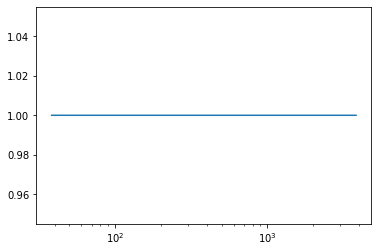

10236
[1806.89684543]
0.0
0.0238252730729642,52.48757926248495,0.11235969808612849,2.5047896063373797e-07,141.73555386933145,708012.4949611723,29.933542687540726,0.0009474980561602936,112400.11948987076,3014120.6030800254,0.1570220331733674,3.148442284490583e-05,17.778084163250032,13592.321014274963,0.00011823504001897882,3.0467224048635066e-10,0.8153674840676971,0.01170836412738129,2.5303886657197165,2.9556763237828288e-05,3.4308700095437086,0.0004350913787001045,1320.6047802394858,1.185647578045416e-07,1.0,1.0,1.0,1.0


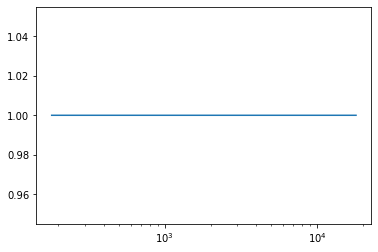

10252
[3.88389866]
0.0
4.840724298539758,565331.9735220153,0.004985913190211737,8.043694229576577e-06,15.388234029424403,1015130.7434089896,0.17259623817274178,0.0016291397952668749,6976.643909716279,581419427.6047289,0.017906137632478718,3.524936909780983e-05,705.7116160926734,28629247.788346253,0.0012876090370811443,1.5448780357651948e-06,722.6260295651479,0.08155906848383505,23504.059034409842,0.0007772678626189284,1367.986391255242,0.00039498673743088117,13591170.642204998,1.5398517603786194e-05,1.0,1.0,1.0,1.0


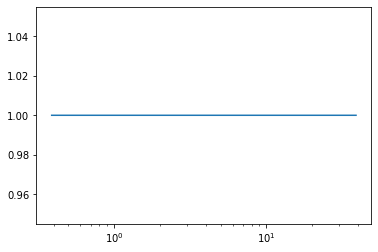

10253
[12987.83348224]
0.0
0.1397536150884055,66.0675702589356,0.012222069572965621,1.8785673058493354e-06,468.50171951395396,3264239.7977278912,289.5836193291151,4.936533205894275,18856.18989383725,700389339.8361323,46.67909732846547,0.022823342497901973,1.447142028237482,66.39641063939114,7.59860430810969e-05,8.216539334789124e-09,43.83430753267371,0.002183868885787173,62.516079279383895,2.563268491465044e-05,6598.49317672974,2.389537730740708e-05,29074.277650083375,3.117295477209196e-07,1.0,1.0,1.0,1.0


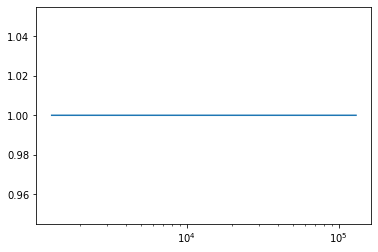

10257
[15.60580804]
0.0
0.691386473674126,48.98944561963811,0.0018735456211698262,3.7946750130884826e-07,0.7172052621600757,183029.18111465225,0.017793072833317988,1.4088938399976715e-07,195.47463299265277,336759.71704421565,3.803195440265549e-05,7.94225871353001e-10,3.364345661627778,1903.4856558490424,4.819841120192012e-05,7.790092337934402e-10,85.75059080732898,0.08409815993353617,952.58685552009,0.04194861562743314,3467.943868245538,0.0009035050281105759,89142.84521983615,1.132179578411781e-06,1.0,1.0,1.0,1.0


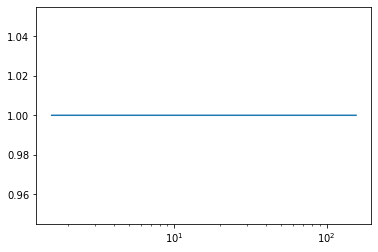

10267
[256.69930684]
0.0
0.07316961305329282,16434.00312228947,0.0012601338481619188,5.089336311975787e-08,140.55708043111574,4339241.333456754,0.013311939604482044,0.0007112601691187896,44647.5666440442,1533150513.7149677,0.0018802148707674244,6.108047781086121e-05,70.97071917141812,569606.0641029363,3.11279101611779e-05,4.465210401752635e-09,0.3141003618438598,0.05341653143939849,87.47742382812775,5.7004039435017865e-05,2.0248704046275803,0.03083003593305256,457.0250722785191,2.342384205056058e-06,1.0,1.0,1.0,1.0


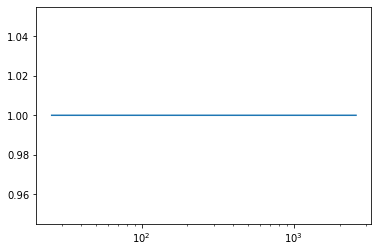

10269
[ 40571.03217357 121344.01878004]
0.0
0.032034733110500105,1.1822129696885204,0.04294723325213078,1.0112643408320815e-06,173.6555411955483,1371522.0165856937,2.3144722940806295,9.450043873971614e-06,9399.50395986803,2515640.623896098,0.008038994999142778,1.0810512667929323e-06,0.4557337360973383,3.072081360562499,0.0004712049125039985,2.866877049054164e-07,204.17338424393702,0.2130815550486684,790.7756708508288,0.0008118252607149603,36082.84521692559,0.02933451369989586,46512.148547689874,2.5718686659902065e-05,1.0,1.0,1.0,1.0


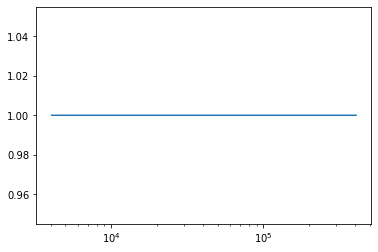

10269
[ 40571.03217357 121344.01878004]
0.0
0.032034733110500105,1.1822129696885204,0.04294723325213078,1.0112643408320815e-06,173.6555411955483,1371522.0165856937,2.3144722940806295,9.450043873971614e-06,9399.50395986803,2515640.623896098,0.008038994999142778,1.0810512667929323e-06,0.4557337360973383,3.072081360562499,0.0004712049125039985,2.866877049054164e-07,204.17338424393702,0.2130815550486684,790.7756708508288,0.0008118252607149603,36082.84521692559,0.02933451369989586,46512.148547689874,2.5718686659902065e-05,1.0,1.0,1.0,1.0


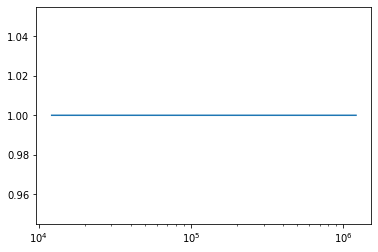

10287
[2056.03038331]
0.0
0.336246092361949,7.408796391525238,0.023631430053956595,0.0001314570333238108,1.7289275485091757,115.07617516923501,0.0018016351081515207,7.930474057185566e-07,3.525951439996512,82670.83637945971,0.00019823290505219864,1.8270065900808199e-09,0.6282131114184625,668.5829759840256,0.023562127312603907,3.4419925027554623e-07,300.9170576657328,9.247564678814685,44888.567744250584,0.01405980346332179,4341.3362164809705,5.424201570067687,58613.816497044885,0.0007546077256439785,1.0,1.0,1.0,1.0


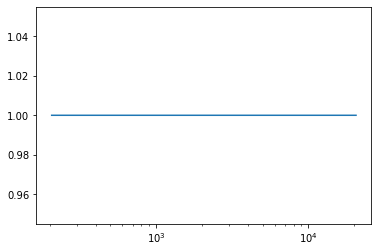

10360
[ 0.9706782  44.51355714]
0.0
0.10099192554151368,2122.9794645500065,0.00400608029415826,1.6588383031521678e-06,134.58820043337812,5360.454251857412,0.0013822599415064254,2.662942475532156e-05,2237.3849888775553,5203807.568497815,0.00013558690174963401,1.447121029646391e-05,3.725105528466768,5134.995158607526,0.0007076685228839463,1.4594162319391437e-08,360.9105317873287,135.74040658697697,81507.0684009038,10.901763448064822,6076.005094700058,23.792785555190772,49363384.08999303,4.221038391009773,1.0,1.0,1.0,1.0


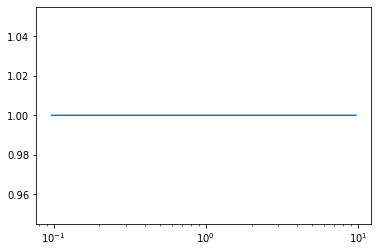

10360
[ 0.9706782  44.51355714]
0.0
0.10099192554151368,2122.9794645500065,0.00400608029415826,1.6588383031521678e-06,134.58820043337812,5360.454251857412,0.0013822599415064254,2.662942475532156e-05,2237.3849888775553,5203807.568497815,0.00013558690174963401,1.447121029646391e-05,3.725105528466768,5134.995158607526,0.0007076685228839463,1.4594162319391437e-08,360.9105317873287,135.74040658697697,81507.0684009038,10.901763448064822,6076.005094700058,23.792785555190772,49363384.08999303,4.221038391009773,1.0,1.0,1.0,1.0


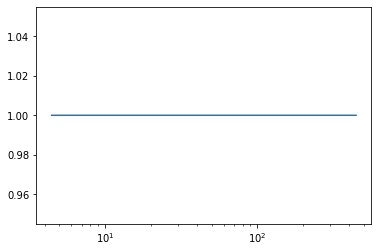

10366
[151.44395172]
0.0
0.4130933475582024,9128.317429713143,0.00146568278082156,6.904265800896205e-05,204.71145266894047,32431801.637728296,0.002104577313243044,3.7297125127116444e-07,104908.70948052923,188530092.6334356,8.646003001410989e-06,5.122547770229128e-09,304.2928874417932,2894602.3390158126,0.00024338130233083228,3.1549541622280125e-07,0.16155449459153332,0.041754945988662556,44.82929092682759,0.005265065931844856,82.85461495645573,0.00934344065178035,4265.379070126517,0.0026790687468598116,1.0,1.0,1.0,1.0


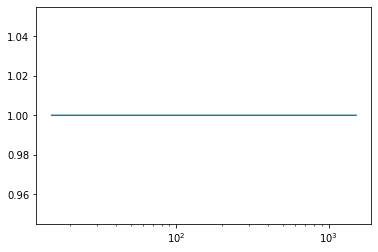

10418
[2.78286718]
0.0
5.472306930989416,1150.5794085047196,0.0051971028419517395,5.581881079189027e-06,103.19161941949436,2236.3526145329683,0.019031885004415154,2.7906174635356818e-06,755.6100268644269,74150.13064910682,0.0003296967856441223,6.526853188606145e-08,49.067923266490936,248964.5817539003,1.2499434995933217e-05,9.603767163025963e-09,0.8883649156592706,23.832446097350857,856.466453552013,0.0676755295954889,1.5433371895902797,0.7228778235442553,328173.47770139633,0.0005356495875194374,1.0,1.0,1.0,1.0


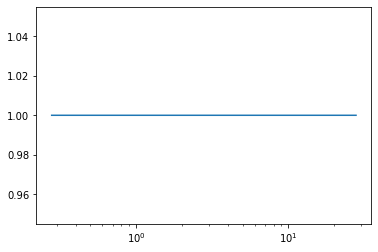

10478
[1151.97529809]
0.0
0.005005842702461692,37.92335183606412,0.0013709538150446176,9.523477230128244e-09,2.388479221382084,56340.41579653886,0.0938606181544427,0.00018462807314347212,72.90025548318644,352263.36037516047,0.0011461040322263418,6.507686202694433e-07,2.3382065565878714,137.3710849691947,7.082600307334373e-06,4.367075267753138e-10,575.5429841134298,0.0035523307809242227,14634.40161282611,0.00040899243305520146,61844.834761392936,0.0007918503521843673,718138.2037923953,7.131501498645614e-05,1.0,1.0,1.0,1.0


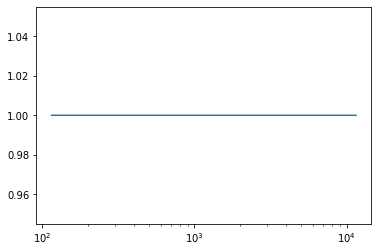

10494
[ 0.12798273 12.31578678]
0.0
98.57197369734267,6668.235679063572,0.002678562094674444,2.530477266047733e-05,16.99431479553206,1022723.2769846511,0.006130047515145167,3.225942720371947e-06,5212.16951295376,6993292.711106573,0.0024607175103969346,3.82592507971354e-07,113.00427382499265,68858.92508722692,0.0013019778464623017,3.198356345321778e-08,89.24412918696105,3.5105565403879107,1861.1220735041543,0.07303918269562343,8454.238602601577,0.9600382112385449,5069207.88795711,8.518868907019423e-05,1.0,1.0,1.0,1.0


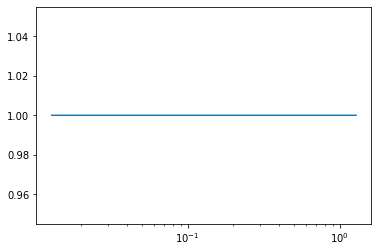

10494
[ 0.12798273 12.31578678]
0.0
98.57197369734267,6668.235679063572,0.002678562094674444,2.530477266047733e-05,16.99431479553206,1022723.2769846511,0.006130047515145167,3.225942720371947e-06,5212.16951295376,6993292.711106573,0.0024607175103969346,3.82592507971354e-07,113.00427382499265,68858.92508722692,0.0013019778464623017,3.198356345321778e-08,89.24412918696105,3.5105565403879107,1861.1220735041543,0.07303918269562343,8454.238602601577,0.9600382112385449,5069207.88795711,8.518868907019423e-05,1.0,1.0,1.0,1.0


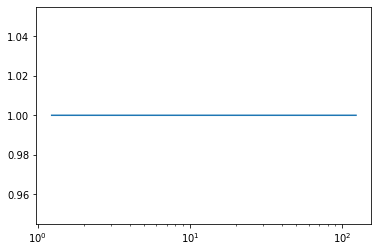

10572
[13371.70301351]
0.0
0.0018611354668076703,0.012480370011116461,0.011720856711124142,3.96114771520407e-06,0.06517912493619456,24.783612013390027,0.004254318891149604,1.0633521138194008e-07,7.156577475993403,136.7573281502255,1.5336485465033546e-05,3.471954869450237e-10,0.0060082635212530865,10.493952971986953,0.00010428873903515104,1.3740475754831618e-06,29.70356205726967,0.016557877740226542,3201.276281152514,0.00013579201807989308,3323.9311161653027,0.0002938479803056199,13997.488965245922,3.149948558002765e-07,1.0,1.0,1.0,1.0


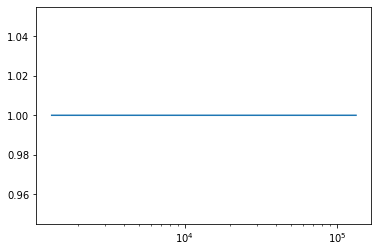

10591
[42262.20220405]
0.0
0.10776155937470336,9.554986803550278,0.0013789195370504362,7.969306251428254e-06,10.422687814019964,914.5052688941631,0.008682931646296618,0.005033028798330706,620.3665111074239,94683.18751178941,0.006776889678520343,1.4893495853565667e-05,3.4147410767185096,17.085959686762354,1.5612870597416412e-05,3.3926414768161026e-07,383.3485247061592,2.913936995296112,3500.594530722921,0.1849427726986126,358577.1488288467,0.36129333128120633,15462960.000998914,0.0012305669952339864,1.0,1.0,1.0,1.0


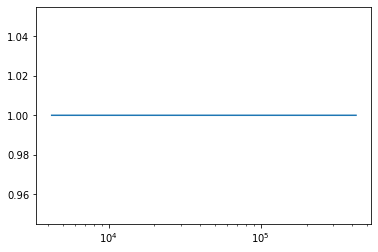

10694
[916.10272784]
0.0
0.03781395728922971,136.82050153440602,0.023552169337247828,0.0005506953588403733,0.005534843416029409,602.6738601105596,0.002263781121145948,2.61559617275277e-07,0.6194126823883572,91043.22278840712,1.2945129085729633e-05,1.3954156593785332e-09,1.6642794413632471,437.65695311732406,0.001268163068210709,0.00026594636242236456,390.55470758529566,0.10491953848184635,915.4097688377248,0.0008906417453630222,43008.98666111168,0.00027788323901729585,383044.77554237185,0.00016383898041533502,1.0,1.0,1.0,1.0


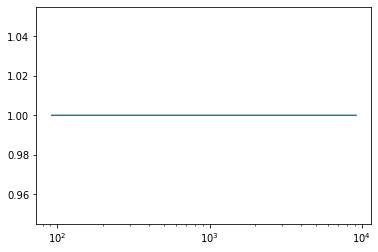

10705
[37829.3145893]
0.0
2.0340283835011177,2240.082285777952,0.40163419494966723,0.0004531122063361495,193.9150063458255,71642481.22432585,0.0017508215481022377,3.330515920470301e-07,132190.28890494612,2030541042.1560082,1.5251981016113415e-05,2.063845623829909e-09,508.1601306356719,26899.223818340328,0.0008330269397039145,1.2564430151204367e-06,0.0010677938866607858,2.412368980219581,0.0463574121190093,0.028452557546953056,0.0015827764173182966,0.03995453012526331,2.2512368929056255,0.0002759362794247703,1.0,1.0,1.0,1.0


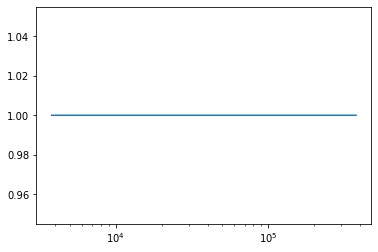

10714
[229864.50863828]
0.0
0.009214826101172848,53.12033548392861,0.257278476211891,0.00017658827793596188,298.45259410698714,12261912.645822437,0.0011022568930156482,6.1942229058827315e-06,214165.10325958935,18985879.729548007,0.0001430714084486996,1.7451838311405943e-08,0.475247367179274,603.5685948854077,0.012703013947888519,1.8516943680649794e-05,0.006063563185260665,0.004545632255288135,0.03554367164178019,0.0003442267501215297,0.027021377924280846,5.8681025634109835e-05,5.79371684336711,1.8987291880284998e-06,1.0,1.0,1.0,1.0


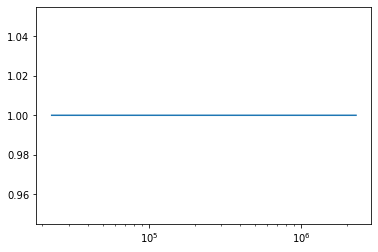

10784
[9.46789564]
0.0
130.00458718021366,109389.70821214486,31.438835603838434,0.0075054883199857205,123.82134434675953,1608.0452825990903,0.015873052279909695,2.7762369571450687e-06,238.50302784395183,29348.122702060136,2.3179515300156508e-05,3.599779042777655e-09,720.4948119926071,252466.35507741093,0.17792794982887464,0.0002584788278546274,997.585972974723,10.078970127081273,76776.79170331419,0.022360760585614523,1048.9645507040439,0.0926327730047662,2352311.0144069945,0.0012357116038116242,1.0,1.0,1.0,1.0


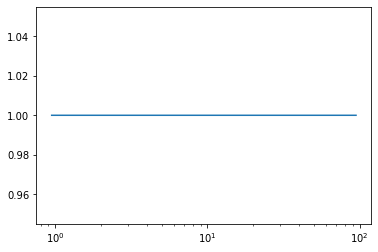

10791
[1094.05041361]
0.0
0.8583635554254626,108.1720355809364,0.00974444091981127,0.00023454802452674327,237.56193037607832,191909.23693377196,2.2032409364867416,3.626696963562014e-06,439.8187367183318,2554028.430896525,0.0034174891508961594,6.201969981893395e-07,72.56322378205394,284.33408994719133,0.006049614611211004,5.471076424263433e-06,253.23197006838424,0.003412670284409629,2373.5263121556477,6.000153250919868e-06,2555.9240448956866,8.115436447989161e-05,3666.33923980005,2.164982849008612e-06,1.0,1.0,1.0,1.0


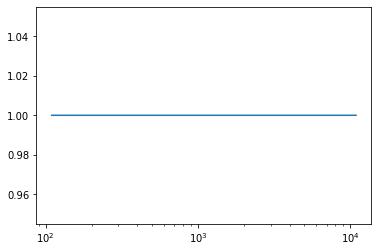

10822
[460.09287752]
0.0
0.05689852293523674,94.87968202464164,3.6199421761561923,0.002401332912678492,0.21660482010431997,326.679314297627,0.002324792604083507,8.413752574435947e-08,1.0725139009660754,104788.24183612314,4.041887764117382e-05,3.211590532187125e-09,5.166725680779316,9196.013923513907,0.005100926672223872,0.00028779089566170204,414.30864951890135,6.432640044392203,3725.298348878784,0.27478114466831904,42111.37600672633,3.364933630254433,5637221.077426235,0.0006827793689441109,1.0,1.0,1.0,1.0


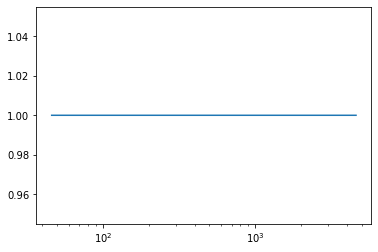

10825
[13777.30829356]
0.0
0.053206354434557686,29.744014488093814,0.016374102158941084,3.473192915829669e-05,829.2986684127667,2868555.1630579173,0.017305643201812652,0.0002477924967901346,410195.6572061827,175324169.12806204,0.007382960791041038,1.0400097132234792e-06,0.4057223375323659,5692.772078813668,0.015632026414501565,8.123786910001158e-06,78.77822632640184,0.026306691454917736,133.89258685620666,8.154412912943869e-05,2083.4347153740327,0.0017568912684107034,14631.095616680455,2.7792121007577874e-05,1.0,1.0,1.0,1.0


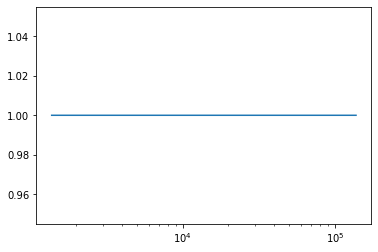

10856
[381.56007537]
0.0
9.524847439356645,115.08042911885961,0.01214313283833578,1.3771991554521271e-05,0.12378555556134273,611.6304197266824,27.068850120929955,0.08081768677082503,20.518645769531503,385513.98940469185,14.475263285740304,0.0002291691157659355,14.809258619622119,61430.30387883468,0.0005244118859840612,1.4775981822952909e-08,117.57063934540145,0.0014170549216686447,2624.287532044177,2.1140336707499367e-06,29792.85364678963,0.00090177452044508,39567.80355485449,6.440562687061984e-09,1.0,1.0,1.0,1.0


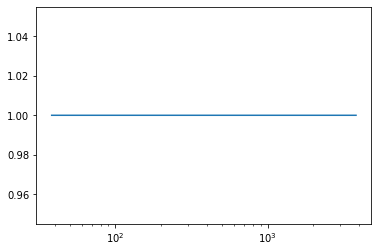

10861
[7.38206419]
0.0
129.95694417761814,45613.96643242521,0.007097758126202802,1.8331989975540876e-05,43.31744790783951,4464702.382284532,7.294800983943564,0.00932002566900453,36978.64714528541,58819889.41382917,5.29333689883744,3.6456139463125135e-05,229.10008662690458,31478919.305022318,2.1611968663113548e-05,3.0042028013451997e-06,726.5140704009309,24.78068803593435,388632.7001918028,0.8347104864251208,14047.289646096906,6.730482327709789,212776363.46696016,0.011210701743627085,1.0,1.0,1.0,1.0


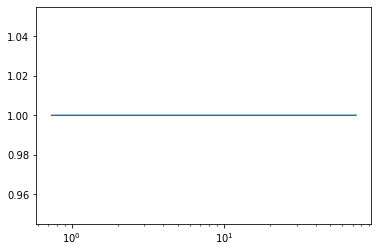

10901
[6.04042764]
0.0
416.4522008488783,369822.1271450345,0.005882600115294907,0.00020898661426745822,3.605640222207245,12307.443274921427,14.01770650155566,0.006957748549182899,31.04377209375273,2686405.0454482795,0.16997548488000389,4.059599720597641e-05,34489.09147293148,84212986.50514707,0.0003416959322547135,1.6489907471023636e-05,586.6819334643267,53.48992818657797,312283.0778164159,48.97742885732198,395462.1311697756,36.54035677172358,113721116.66222064,4.549496811967367,1.0,1.0,1.0,1.0


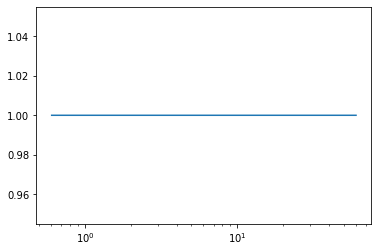

10912
[6.503483]
0.0
64.61562836173705,1361434.0662962834,0.03647135548790073,1.1420020824444832e-05,504.0771231543725,23639354.88244447,0.0015518170079474004,3.943887127894939e-05,184121.47491249995,145049973.65333736,0.0006477076802289229,1.1312654497556943e-05,2008.0861799958,5176663.82953248,0.0005328072508371224,1.2442765204188343e-06,0.6698191496362023,0.0017512230118395557,5.194258928248372,1.3402432718445941e-05,26.163582930854986,0.0009754871175343676,38.77744095605675,4.207158187495406e-06,1.0,1.0,1.0,1.0


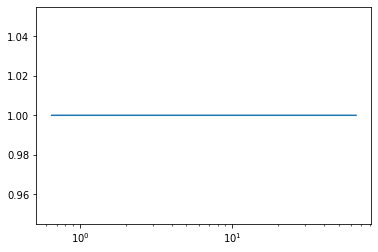

10926
[71.67854869]
0.0
1.7748637910773961,801.1430385127444,0.3755096143357451,2.9721185128014873e-06,767.025332339964,2131177.96870554,0.11151542717810774,2.846117541661865e-07,282584.0850114614,241169106.05015764,0.0001792020244083931,9.216355767172078e-08,592.9701849727273,8202.967179752806,0.000971955825276298,1.5910457240184219e-06,0.12007444975722761,0.005423717086765547,100.97675287910137,0.0001051357618347286,28.20212786043327,0.0009171024708528216,738.6465749260226,2.0205472065408015e-05,1.0,1.0,1.0,1.0


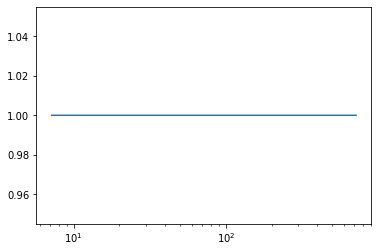

11004
[22380.96021565]
0.0
0.031947150421031544,338.9556606436441,1.4473663476949996,0.0005066866134095087,362.41580091858805,335953.16747356,0.002819047850858893,1.1850715913683767e-05,650.8541953058849,41446843.02922608,0.0003357154271958677,7.71456715365839e-07,4.312520197019987,12145.028460312553,0.010124869076035629,5.915409068654075e-07,531.8139581582379,0.009797692652322288,9672.508084391817,2.553770379455804e-05,7439.377101807691,0.0005375190396370875,167914.96830984496,1.0138604781400688e-05,1.0,1.0,1.0,1.0


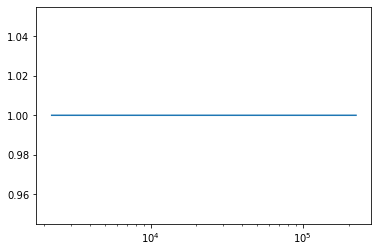

11069
[ 429.41731226 1719.9653956 ]
0.0
0.1248341180660957,779.8092207122759,30.043615305243527,0.042670613312929734,517.5536756009826,68690.43804364318,0.00292434708319906,2.4428969240777595e-08,14474.638062859445,24383004.61610597,1.5204124602619264e-05,7.45942847277403e-09,121.57297027993734,7306.931345564442,0.4094010981100207,0.0347534277267012,0.0682454537194855,0.001043745446513082,20.60475391108921,0.0003922874867166947,0.11655353847190474,1.0949459911992145e-06,33.551973226356175,7.976030897379627e-08,1.0,1.0,1.0,1.0


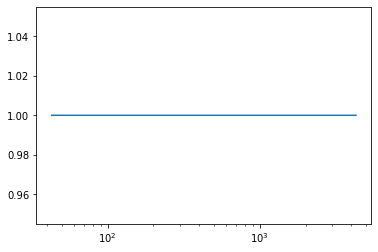

11069
[ 429.41731226 1719.9653956 ]
0.0
0.1248341180660957,779.8092207122759,30.043615305243527,0.042670613312929734,517.5536756009826,68690.43804364318,0.00292434708319906,2.4428969240777595e-08,14474.638062859445,24383004.61610597,1.5204124602619264e-05,7.45942847277403e-09,121.57297027993734,7306.931345564442,0.4094010981100207,0.0347534277267012,0.0682454537194855,0.001043745446513082,20.60475391108921,0.0003922874867166947,0.11655353847190474,1.0949459911992145e-06,33.551973226356175,7.976030897379627e-08,1.0,1.0,1.0,1.0


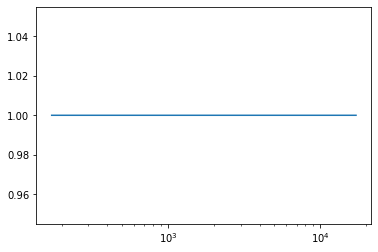

11124
[0.12313396]
0.0
32.28539548846405,25675.519662991865,0.10607346779149493,1.7379253343551267e-05,807.2065686428349,66843.28322087647,0.005294356504610128,3.7384101944309704e-05,9928.488902319934,55930164.2451325,0.00030532909981306327,1.6781510781919305e-06,12050.152906771864,310935.3918127207,0.008762844068913,2.394258365656892e-08,83.78293775011504,36.92404334230596,76447.08256449236,0.31957483814488186,11494.221435834077,0.165566453845291,5235829.687801323,0.03640542801772022,1.0,1.0,1.0,1.0


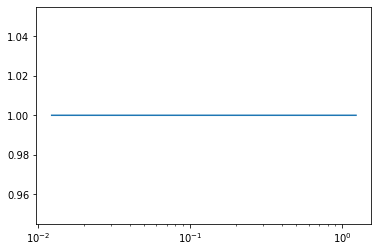

11143
[0.00314029 1.97034043]
0.0
65.85077154864797,79633.19000196952,0.009258499849060109,0.000138110300377472,525.8913027153069,583482.1804090217,0.19177226939857178,5.342558266794098e-06,220531.22803283422,38271756.7633549,0.0003149141332449832,6.838969192447764e-07,193.5283502204909,29660195.52932483,0.00013942042427702938,1.040101857641154e-06,127.03631098941307,0.004785985096909967,2837.794405675668,2.784438825963004e-05,548.7621144437289,3.676797696999921e-05,18235.786383580562,7.181254581819026e-08,1.0,1.0,1.0,1.0


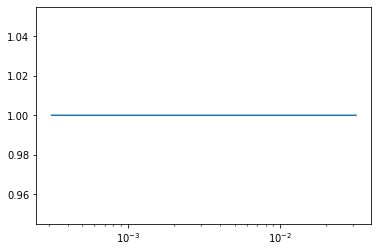

11143
[0.00314029 1.97034043]
0.0
65.85077154864797,79633.19000196952,0.009258499849060109,0.000138110300377472,525.8913027153069,583482.1804090217,0.19177226939857178,5.342558266794098e-06,220531.22803283422,38271756.7633549,0.0003149141332449832,6.838969192447764e-07,193.5283502204909,29660195.52932483,0.00013942042427702938,1.040101857641154e-06,127.03631098941307,0.004785985096909967,2837.794405675668,2.784438825963004e-05,548.7621144437289,3.676797696999921e-05,18235.786383580562,7.181254581819026e-08,1.0,1.0,1.0,1.0


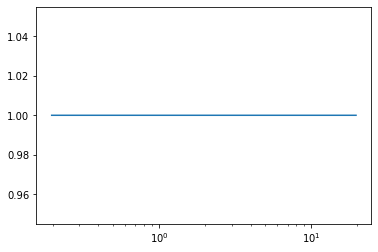

11154
[0.00324664]
0.0
4.5709357978265,1059115.401961231,0.0012711676612441954,2.5677329675155365e-08,4.137827992269309,3458.417343667264,0.0012321393953511693,5.365039415532894e-07,1159.977305665595,8880.320085457202,1.543378189959987e-05,4.0558525371445986e-07,3902.30152266798,98334809.95614573,1.7613277081969692e-06,1.1621376893979861e-09,651.2614648332054,233.11462083585965,81566.54692423341,16.912791143601375,2256.3585025224097,2.297907278677872,1020600.1799515664,0.039312937842083576,1.0,1.0,1.0,1.0


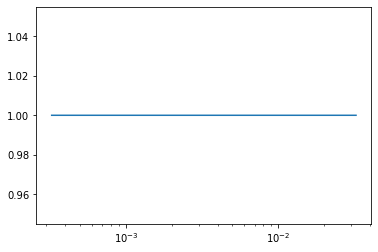

11169
[33.98533578]
0.0
0.23064693470208414,96.16061261319146,0.006442045238886672,5.567017690338903e-07,0.5415665737588389,10742.369063140799,20.712247559686183,0.00025350628433701365,53.42314354914982,10506224.652165344,0.10244363574074257,0.00015974602411951275,13.590398956313136,3675.749201300623,3.6957880121568147e-05,3.54807816009413e-09,919.3451949820002,0.002794932705688462,33183.45746803762,0.00048761369501079877,41868.91720673881,0.00012923240642405471,3002148.615915012,1.3257325494564042e-07,1.0,1.0,1.0,1.0


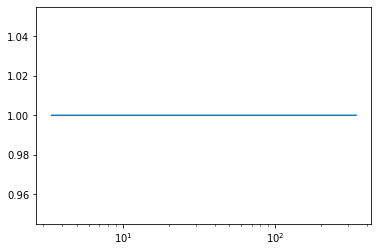

11251
[123.99117456]
0.0
0.04224061032619557,246.63975591425984,0.006120364684377972,1.5469519304277427e-05,306.51077838681334,71126663.64775446,0.0016906100423030152,2.260426608702779e-06,100627.85748639652,135827369.29817986,6.907654210010586e-06,2.6322732514783702e-08,2.480752215591182,4100.191416125342,0.0007801779391685247,3.213201847858429e-06,85.54111438213954,0.8462370405223734,340.2350775298151,0.03870150586413257,4276.09912929744,0.003910137186221134,6062.702458476158,5.706562004518921e-06,1.0,1.0,1.0,1.0


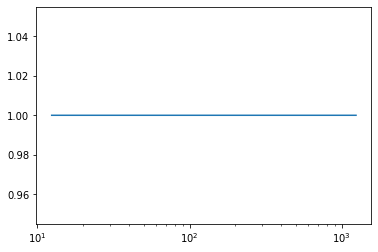

11259
[14152.71045189]
0.0
0.005404974233493223,5.110515383506233,0.13964034096825295,0.00020135007663461737,17.696472670658498,51332.559976583565,0.13424581253952758,7.682962465347672e-05,3405.204043629808,7618531.245488694,0.015338897429926926,4.860988617531598e-07,2.2330260649543128,82.42270710062158,0.008858628805882033,3.9224107024446735e-05,879.9883929854185,0.5142014140078095,4181.957359488996,0.02770740466113556,207809.220066306,0.048212934690767914,62757757.59181637,0.0017252918094363742,1.0,1.0,1.0,1.0


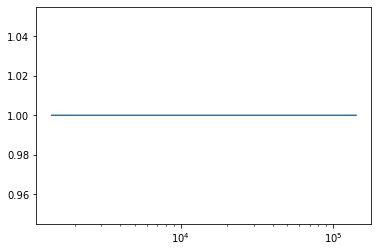

11265
[1.23111773]
0.0
15.601595786210536,999.6828327473582,0.006594468724660077,6.278281563751966e-06,364.4769083216583,103998.7173160351,7.940270042824082,0.0020131593297419165,14957.252491037727,45949947.49820078,1.489565388370335,0.000584221062400544,32.9089132598662,17789.7252701606,0.0013330205059692492,1.7706382414566865e-08,1.699497141044064,0.012909355763082638,326.5389628409381,4.180283754252573e-05,1030.0800703256634,0.000746815264165439,745494.1802592461,9.555048794660342e-08,1.0,1.0,1.0,1.0


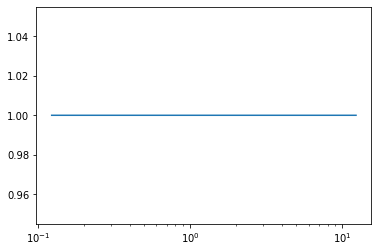

11352
[75159.83318446]
0.0
0.03406247155922412,0.04546035785369881,0.6553076784918107,2.9516507189941403e-06,99.87802320084297,2333156.379518654,0.007286135515260993,3.02871844114031e-05,5150.410118923491,1597844999.9270368,0.0004756617799239335,1.8741789122083358e-07,0.037511654723507745,0.2105332230249763,0.0017684273745620564,5.423745943687761e-09,0.4244497530273291,0.07357348507960484,10.568439579692779,0.0016260497936021656,4.158098523677103,0.0005764929306563626,3157.9625020046233,3.1077368358798705e-05,1.0,1.0,1.0,1.0


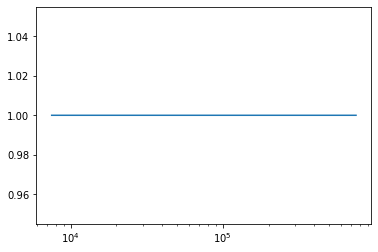

11482
[ 0.05324687 50.79681506]
0.0
2.34172689700382,5062.182927926319,0.03972060111594929,5.9241005035333355e-06,9.953832988281857,36435.051085039486,0.0011291752982234779,1.0604328208543133e-06,72.75239943692186,127712.47641232412,1.5943359804998003e-06,1.3293892161106647e-09,1610.344472091166,69243.4501769885,0.00020425978997098463,1.7482158210328635e-07,898.747093886446,0.03967059235791011,1566.9027680251206,0.017699260583204084,740492.5886090006,0.007312094998789178,14935746.496671855,0.0003830152876260841,1.0,1.0,1.0,1.0


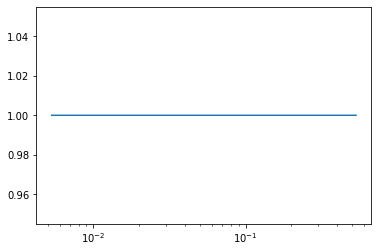

11482
[ 0.05324687 50.79681506]
0.0
2.34172689700382,5062.182927926319,0.03972060111594929,5.9241005035333355e-06,9.953832988281857,36435.051085039486,0.0011291752982234779,1.0604328208543133e-06,72.75239943692186,127712.47641232412,1.5943359804998003e-06,1.3293892161106647e-09,1610.344472091166,69243.4501769885,0.00020425978997098463,1.7482158210328635e-07,898.747093886446,0.03967059235791011,1566.9027680251206,0.017699260583204084,740492.5886090006,0.007312094998789178,14935746.496671855,0.0003830152876260841,1.0,1.0,1.0,1.0


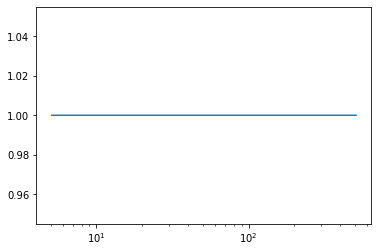

11515
[0.00900468]
0.0
766.9684657340421,362113.43581472617,409.15826936472894,0.289697710027755,29.570071925999354,516041.0779886661,0.00309638720195571,3.614751584041808e-07,3436.902571261071,1727602.3671059976,3.075180798496554e-05,9.126489515046135e-08,1443.0230538075034,37198194.90484042,168.50078716369507,0.00402646655302354,232.76352315049817,0.0011345818354627695,40595.837323493375,0.0008595984983323301,181593.78459366868,0.000328255375938286,1193920.555092416,9.059948063320131e-07,1.0,1.0,1.0,1.0


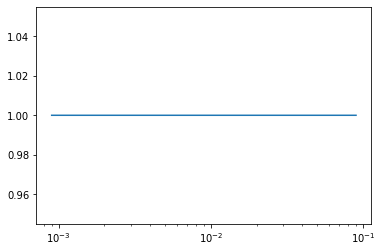

11546
[0.66704523]
0.0
80.184010138734,669286.9399356138,0.2541357273994936,1.699531925623775e-06,0.008881837107377513,6.954194338765598,0.09219732266788533,0.0014118591556167232,0.12275346867120035,2425.035231978987,0.007542455502973572,2.0481300032945786e-06,1886.0811781200919,224608900.56707722,0.000983602001374065,2.4623881284337314e-09,550.271113236846,15.543252249535831,240012.43570952344,0.019706020326118706,131874.31437081617,0.5107120353359945,9087908.79269812,0.00016945561847917344,1.0,1.0,1.0,1.0


KeyboardInterrupt: 

In [12]:

#xvals=np.logspace(-6,6,1000)
for seed in range(10**6):
    if seed%(10**4)==0:
        print(seed,end=",")
    np.random.seed(seed)
    
    v1,v2,v3,v4,kopen0,kclose0=10**np.random.uniform(-3,3,size=6)
    f1,f2,f3,f4,f5,f6,f7,f8,f9=10**np.random.uniform(0,3,size=9)
    d1,d2,d3,d4,d5,d6,d7,d8,d9=10**np.random.uniform(-3,0,size=9)
    q3,q4,q7,q8=[1,1,1,1]


    ax_0_0=v1
    bx_x_0=v2
    ax_P_0=f1*ax_0_0
    bx_xP_0=d1*bx_x_0

    aP_0_0=v3
    bP_P_0=v4
    aP_x_0=f2*aP_0_0
    bP_xP_0=d2*bP_P_0


    ax_0_1=f3*ax_P_0
    bx_x_1=d3*bx_xP_0
    ax_P_1=f4*ax_0_1
    bx_xP_1=d4*bx_x_1


    aP_0_1=aP_x_0*f5
    bP_P_1=bP_xP_0*d5
    aP_x_1=aP_0_1*f6
    bP_xP_1=bP_P_1*d6


    kopenx=f7*kopen0 
    kclosex=d7*kclose0
    kopenP=f8*kopen0
    kcloseP=d8*kclose0
    kopenxP=f9*np.max([kopenx,kopenP])
    kclosexP=d9*np.min([kclosex,kcloseP])

    parset=np.array([ax_0_0,ax_0_1,bx_x_0,bx_x_1,aP_0_0,aP_0_1,bP_P_0,bP_P_1,aP_x_0,aP_x_1,bP_xP_0,bP_xP_1,ax_P_0,ax_P_1,bx_xP_0,bx_xP_1,kopen0,kclose0,kopenx,kclosex,kopenP,kcloseP,kopenxP,kclosexP])
    if True: #do not check since in this way we are sure the problem is not a small rangenp.all(parset>1e-3) and np.all(parset<1e3):
        qs=[q3,q4,q7,q8]
        pars=np.concatenate((parset,qs))
        instance_lowac.fill_num_den(pars,othervars)
        monotonic=instance_lowac.interfacemonotonic()

        if np.any((monotonic != -2)&(monotonic!=-1)):
            for x in monotonic:
                xvals=np.linspace(0.1*x,10*x,10000)

                #xval=0
                #expr0=twoconf_x_P.interface_GRF_xP_x(pars,xval)
                #acc0=np.sum(Ps[4:])

                values=np.zeros_like(xvals)

                for x_,xval in enumerate(xvals):
                    expr=instance_lowac.interfaceGRF(xval) #doesn't matter if using the multiprecision version or not, it is the same

                    values[x_]=expr #/expr0
                if True: #np.any(np.diff(values)<-1e-15): #when plotting, I see that all of them lead to flat responses
                    print(seed)
                    print(monotonic)
                    print(np.min(np.diff(values)))
                    print(",".join(map(str,pars)))

                    #print(q4,q3,q8,q7)
                    #print(",".join(list(map(str,parset))))
                    sys.stdout.flush()
                    plt.plot(xvals,values)
                    plt.xscale("log")
                    plt.show()
                

## Prepare constraint file for random sampling from polytopes. (only need to do once) 

Most variables are not related, so sample them separately and then regenerate the parameter sets.

Split into: x binding, x unbinding, P binding, P unbinding, open/close, q.
Note that the constraints for x and P binding and q are the same, and those for x and P unbinding. In fact, if I reverse the order of the unbinding variables, then the constraints are the same for all which means the polytope is the same.
Similarly, if I reverse the order for open vs close, the constraints for close are also the same as for open.

For monotonic up and down, I can use the same constraints, just that I need to be careful when reading back the data sorting the variables appropriately:

- binding constraints, run sampling with 5 seeds so I generate points for -> xb, Pb, q, xu, Pu
- kopenclose with 2 seeds, run sampling with 2 seeds so I generate points for -> open, close

From Chris:

    Each line in the constraints file should be a space-delimited string, "a0 a1 ... aN", which encodes the inequality a0 + a1*x1 + ... + aN*xN <= 0. Note that the inequality is less-than-or-equal-to here, as opposed to what it was in the previous code. So, for instance, if you have four variables, x1, ..., x4, and you would like to encode the inequality x1 + 2*x3 >= 7, then you should include the line "7 -1 0 -2 0".

    As before, you will need the Eigen (>= 3.4), Boost, and CGAL (>= 5.4) libraries to compile the code. (Please use the --std=c++14 flag with g++ when compiling.)



In [41]:
#x or P binding ax_0_0: x1, ax_P_0: x2, ax_0_1: x3, ax_P_1: x4
#x or P unbinding bx_x_0: x4, bx_xP_0: x3, bx_x_1: x2, bx_xP_1: x1
orders_mag=6 #e.g 1e-3 to 1e3. For simplicity, sample between 0 and 6 and then substract 3. Then get 10**number.
#basically this encodes: x1<=x2<=x3<=x4
Constraints_binding="""x1 - x2 <= 0
x2 - x3 <= 0
x3 - x4 <= 0"""
f=open("generate_parsets_TF-chr/constraints_binding.txt","w")
#########x0,x1,x2,x3,x4
f.write("0 -1 0 0 0")#indicate that the first variable is non-negative
f.write("\n")
for line in Constraints_binding.split("\n"):
    line=line.strip().replace(" <=0","").replace(" <= 0","")
    if " +" in line:
        v1, v2 = line.split("+")
        v1multiplier=-1
        v2multiplier=1
    else:
        v1,v2= line.split("-")
        v1multiplier=1
        v2multiplier=-1
    v1=v1.strip()
    v2=v2.strip()
    col1=int(v1.replace("-x","").replace("x",""))
    col2=int(v2.replace("-x","").replace("x",""))
    ar_line=np.zeros(5,dtype=int)
    ar_line[col1]=v1multiplier
    ar_line[col2]=v2multiplier
    print(line)
    line_c=" ".join(map(str,ar_line))
    print(line_c)
    f.write(line_c)
    f.write("\n")

f.write("-%d 0 0 0 1"%orders_mag)#indicate that the last variable must be inside the bound. Do in log space: 1e-3 to 1e3-> translate to 0 to 1e6
f.write("\n")
f.close()

x1 - x2
0 1 -1 0 0
x2 - x3
0 0 1 -1 0
x3 - x4
0 0 0 1 -1


In [42]:
#kopen0:x1, kopenx:x2, kopenP:x3, kopenxP:x4
#kclosexP:x1, kclosex:x2, kcloseP:x3, kclose0:x4
Constraints_chr="""x1 - x2 <= 0
x1 - x3 <= 0
x2 - x4 <= 0
x3 - x4 <= 0"""
f=open("generate_parsets_TF-chr/constraints_chr.txt","w")
f.write("0 -1 0 0 0")#indicate that the first variable is non-negative
f.write("\n")
for line in Constraints_chr.split("\n"):
    line=line.strip().replace(" <=0","").replace(" <= 0","")
    if " +" in line:
        v1, v2 = line.split("+")
        v1multiplier=-1
        v2multiplier=1
    else:
        v1,v2= line.split("-")
        v1multiplier=1
        v2multiplier=-1
    v1=v1.strip()
    v2=v2.strip()
    col1=int(v1.replace("-x","").replace("x",""))
    col2=int(v2.replace("-x","").replace("x",""))
    ar_line=np.zeros(5,dtype=int)
    ar_line[col1]=v1multiplier
    ar_line[col2]=v2multiplier
    print(line)
    line_c=" ".join(map(str,ar_line))
    print(line_c)
    f.write(line_c)
    f.write("\n")

f.write("-%d 0 0 0 1"%orders_mag)#indicate that the last variable must be inside the bound. Do in log space: 1e-3 to 1e3-> translate to 0 to 1e6
f.write("\n")
f.close()

x1 - x2
0 1 -1 0 0
x1 - x3
0 1 0 -1 0
x2 - x4
0 0 1 0 -1
x3 - x4
0 0 0 1 -1


Executed the sampling of parameters in the cluster. See folder indicated in the path in cell below for details. Basically, I sampled 7 sets of parameters that fulfil x1<=x2<=x3<=x4, and 4 sets of parameters that fulfil the second set of constraints. Then it is a matter of joining each line from each file depending on what constraints one wants to encode.

## Read uniformly sampled parameter sets for monotonics up

In [5]:
#there should be 10 million parameter sets
#I have sampled the binding, unbinding, q and open-close parameters. 
#To regenerate a full parameter set, just join the same line index for each of the different files. 
folder="/Users/rosamartinezcorral/Dropbox (HMS)/data/2022_03_duality/2022_05_02_sample_TFchrom_6om"
basename1="x1x2x3x4_inc_%s.points" #each line gives parameters such that x1<=x2<=x3<=x4
basename2="x1x2x3x4_relative_%s.points" #each line gives parameters such that x1<=x2; x1<=x3; x2<=x4; x3<=x4
ext1=["1","2","3","4","5"]
ext2=["1","2"]
allpars=[]
for i in range(2):
    if i==0:
        basename=basename1
        ext=ext1
    else:
        basename=basename2
        ext=ext2
    all_ars=[]
    for ext_ in ext:
        f=basename%ext_
        print(f)
        list_=[]
        fh=open(os.path.join(folder,f),"r")
        for line in fh.readlines():
            line=line.strip()
            splitted=line.split()
            splitted=list(map(float,splitted)) #the parameters sampled
            list_.append(splitted)
        all_ars.append(np.array(list_))
    pars_conc=np.hstack((all_ars))
    allpars.append(pars_conc)
allpars=np.hstack(allpars)
#doublecheck that constraints are satisfied
n=0
for line in allpars:
    #careful with this order when I check the constraints down
    ax_0_0,ax_P_0,ax_0_1,ax_P_1,aP_0_0,aP_x_0,aP_0_1,aP_x_1,bx_xP_1,bx_x_1,bx_xP_0,bx_x_0,bP_xP_1,bP_P_1,bP_xP_0,bP_P_0, q3,q4,q7,q8,kopen0,kopenx,kopenP,kopenxP,kclosexP,kcloseP,kclosex,kclose0=line
    c1=ax_P_0>=ax_0_0
    c5= ax_0_1>=ax_P_0
    c7=ax_P_1>=ax_0_1
    
    c3=aP_x_0>=aP_0_0
    c9=aP_0_1>=aP_x_0
    c11=aP_x_1>=aP_0_1
    
    c8=bx_xP_1<=bx_x_1
    c6=bx_x_1 <= bx_xP_0
    c2=bx_xP_0<=bx_x_0

    c12=bP_xP_1<=bP_P_1
    c10=bP_P_1<=bP_xP_0
    c4=bP_xP_0<=bP_P_0
    
    c13=kopenx>=kopen0
    c15=kopenP>=kopen0
    c17=kopenxP>=kopenx
    c18=kopenxP>=kopenP
    c14=kclosex<=kclose0
    c16=kcloseP<=kclose0
    c19=kclosexP<=kclosex
    c20=kclosexP<=kcloseP
    
    c21=q4>=q3
    c22=q7>=q4
    c23=q8>=q7
    
    ar_c=np.array([c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23])
    if not np.all(ar_c):
        print(np.where(ar_c!=True))
    else:
        n+=1
print(n, "correct")

x1x2x3x4_inc_1.points
x1x2x3x4_inc_2.points
x1x2x3x4_inc_3.points
x1x2x3x4_inc_4.points
x1x2x3x4_inc_5.points
x1x2x3x4_relative_1.points
x1x2x3x4_relative_2.points
1000000 correct


## Doublecheck the parameter sets for monotonicity up

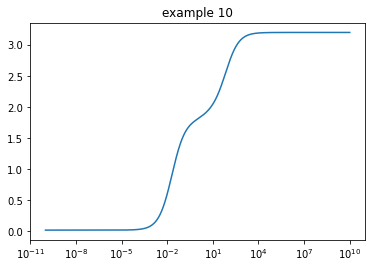

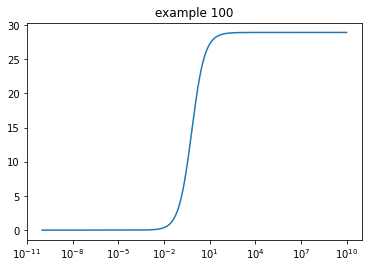

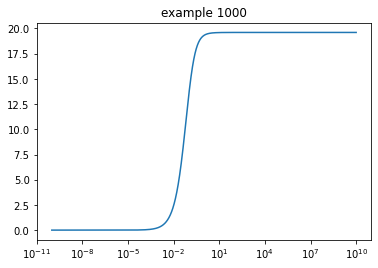

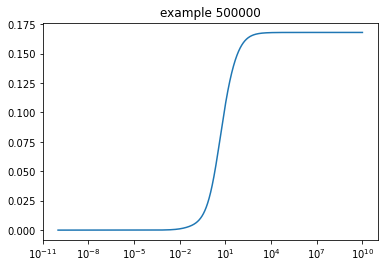

** 1000000  monotonics


In [6]:
allpars_rescaled=10**(allpars-3)
othervars=np.array([0])
n=0
for pars_ in allpars_rescaled:
    if not (np.all(pars_>=1e-3) and np.all(pars_<=1e3)):
        print("wrong ranges!", min(pars_), max(pars_))
    #else:
        #print(pars_.min(),pars_.max())
    ax_0_0,ax_P_0,ax_0_1,ax_P_1,aP_0_0,aP_x_0,aP_0_1,aP_x_1,bx_xP_1,bx_x_1,bx_xP_0,bx_x_0,bP_xP_1,bP_P_1,bP_xP_0,bP_P_0, q3,q4,q7,q8,kopen0,kopenx,kopenP,kopenxP,kclosexP,kcloseP,kclosex,kclose0=pars_
    #need to put parameters in the correct order for code
    parset=np.array([ax_0_0,ax_0_1,bx_x_0,bx_x_1,aP_0_0,aP_0_1,bP_P_0,bP_P_1,aP_x_0,aP_x_1,bP_xP_0,bP_xP_1,ax_P_0,ax_P_1,bx_xP_0,bx_xP_1,kopen0,kclose0,kopenx,kclosex,kopenP,kcloseP,kopenxP,kclosexP])
    qs=np.array([q3,q4,q7,q8])
    pars=np.concatenate((parset,qs))
    #print(pars)

    instance.fill_num_den(pars,othervars)
    
    if n in [10,100,1000,5*10**5]:#just print 3
        xvals=np.logspace(-10,10,10000)
        values=np.zeros_like(xvals)
        for x_,xval in enumerate(xvals):
            expr=instance.interfaceGRF(xval) #doesn't matter if using the multiprecision version or not, it is the same
            values[x_]=expr #/expr0
        plt.title("example %d"%n)
        plt.plot(xvals,values)
        plt.xscale("log")
        plt.show()
        
    monotonic=instance.interfacemonotonic()
    if np.any((monotonic != -2)&(monotonic!=-1)):
        for x in monotonic:
            xvals=np.linspace(0.1*x,10*x,10000)
            #xval=0
            #expr0=twoconf_x_P.interface_GRF_xP_x(pars,xval)
            #acc0=np.sum(Ps[4:])
            values=np.zeros_like(xvals)
            for x_,xval in enumerate(xvals):
                expr=instance.interfaceGRF(xval) #doesn't matter if using the multiprecision version or not, it is the same
                values[x_]=expr #/expr0
            if True: #np.any(np.diff(values)<-1e-15): #when plotting, I see that all of them lead to flat responses
                print(monotonic)
                print("minimum derivative:",np.min(np.diff(values)/np.diff(xvals)))
                print(",".join(map(str,pars)))
                
                #print(q4,q3,q8,q7)
                #print(",".join(list(map(str,parset))))
                sys.stdout.flush()
                plt.plot(xvals,values)
                plt.xscale("log")
                plt.show()
    else:
        n+=1
print("**", n," monotonics")


##  Repression constraints

## Read uniformly sampled parameter sets for monotonics down

**Right assumptions for repression: assume that Pol binds more in the open and expresses more in the open, the repressive effect of the TF comes from:**

1) TF binds more in closed

2) TF reduces Pol binding

3) TF closes, and the effect is stronger than that of Pol

4) TF reduces expression from xP state vs P state

In [48]:
#As above, read parameter sets. IN this case I need 7 parameter sets of x1<=x2<=x3<=x4
#To regenerate a full parameter set, just join the same line index for each of the different files. 
folder="/Users/rosamartinezcorral/Dropbox (HMS)/data/2022_03_duality/2022_05_02_sample_TFchrom_6om"
basename="x1x2x3x4_inc_%s.points"

ext=["1","2","3","4","5", "6", "7"] #four parameters: x1<=x2<=x3<=x4

all_ars=[]

for ext_ in ext:
    f=basename%ext_
    print(f)
    list_=[]
    fh=open(os.path.join(folder,f),"r")
    for line in fh.readlines():
        line=line.strip()
        splitted=line.split()
        splitted=list(map(float,splitted)) #the parameters sampled
        list_.append(splitted)
    all_ars.append(np.array(list_))
allpars=np.hstack(tuple(all_ars))
#doublecheck that constraints are satisfied
n=0
for line in allpars:
    
    ax_P_1,ax_0_1,ax_P_0,ax_0_0,aP_x_0,aP_0_0,aP_x_1,aP_0_1,bx_x_0,bx_xP_0,bx_x_1,bx_xP_1,bP_P_1,bP_xP_1,bP_P_0,bP_xP_0,q4,q3,q8,q7,kopenx, kopenxP, kopen0, kopenP, kcloseP,kclose0,kclosexP,kclosex=line
    
    c1=ax_0_0>=ax_P_0
    c5=ax_P_0>=ax_0_1
    c7=ax_0_1>=ax_P_1
    
    c3=aP_0_1>=aP_x_1
    c9=aP_x_1>=aP_0_0
    c11=aP_0_0>=aP_x_0
    
    c6=bx_x_0 <= bx_xP_0
    c2=bx_xP_0 <=bx_x_1
    c8=bx_x_1<=bx_xP_1
    
    c12=bP_P_1<=bP_xP_1
    c10=bP_xP_1<=bP_P_0
    c4=bP_P_0<=bP_xP_0
    
    
    c13=kopenx<=kopenxP
    c15=kopenxP<=kopen0
    c17=kopen0<=kopenP
    
    c14=kclosex>=kclosexP
    c16=kclosexP>=kclose0
    c18=kclose0>=kcloseP
    #c20=kclosexP>=kcloseP
    #
    c19=q3>=q4
    c20=q8>=q3
    c21=q7>=q8
    
    ar_c=np.array([c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21])
    if not np.all(ar_c):
        print(np.where(ar_c!=True))
    else:
        n+=1
print(n, "correct")

x1x2x3x4_inc_1.points
x1x2x3x4_inc_2.points
x1x2x3x4_inc_3.points
x1x2x3x4_inc_4.points
x1x2x3x4_inc_5.points
x1x2x3x4_inc_6.points
x1x2x3x4_inc_7.points
1000000 correct


## Test for monotonicity down

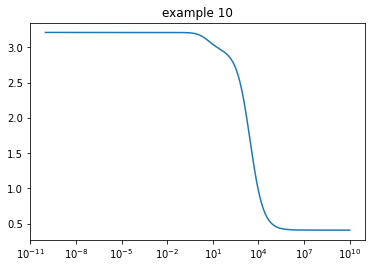

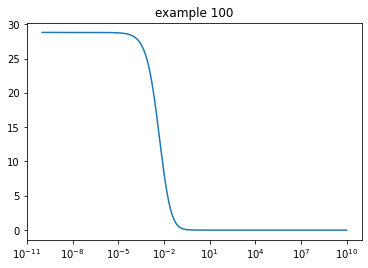

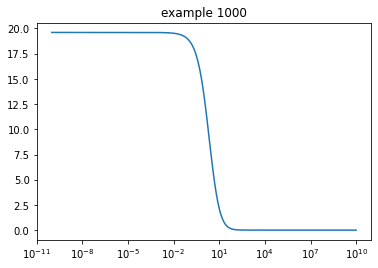

** 1000000  monotonics


In [49]:
allpars_rescaled=10**(allpars-3)
othervars=np.array([0])
n=0
for pars_ in allpars_rescaled:
    if not (np.all(pars_>=1e-3) and np.all(pars_<=1e3)):
        print("wrong ranges!", min(pars_), max(pars_))
    #else:
        #print(pars_.min(),pars_.max())
    ax_P_1,ax_0_1,ax_P_0,ax_0_0,aP_x_0,aP_0_0,aP_x_1,aP_0_1,bx_x_0,bx_xP_0,bx_x_1,bx_xP_1,bP_P_1,bP_xP_1,bP_P_0,bP_xP_0,q4,q3,q8,q7,kopenx, kopenxP, kopen0, kopenP, kcloseP,kclose0,kclosexP,kclosex=pars_
    #need to put parameters in the correct order for code
    parset=np.array([ax_0_0,ax_0_1,bx_x_0,bx_x_1,aP_0_0,aP_0_1,bP_P_0,bP_P_1,aP_x_0,aP_x_1,bP_xP_0,bP_xP_1,ax_P_0,ax_P_1,bx_xP_0,bx_xP_1,kopen0,kclose0,kopenx,kclosex,kopenP,kcloseP,kopenxP,kclosexP])
    qs=np.array([q3,q4,q7,q8])
    #qs=np.array([1,1,1,1])
    pars=np.concatenate((parset,qs))
    #print(pars)

    instance.fill_num_den(pars,othervars)
    
    if n in [10,100,1000]:#just print 3
        xvals=np.logspace(-10,10,10000)
        values=np.zeros_like(xvals)
        for x_,xval in enumerate(xvals):
            expr=instance.interfaceGRF(xval) #doesn't matter if using the multiprecision version or not, it is the same
            values[x_]=expr #/expr0
        plt.title("example %d"%n)
        plt.plot(xvals,values)
        plt.xscale("log")
        plt.show()
        
    monotonic=instance.interfacemonotonic()
    if np.any((monotonic != -2)&(monotonic!=-1)):
        for x in monotonic:
            xvals=np.linspace(0.1*x,10*x,10000)
            #xval=0
            #expr0=twoconf_x_P.interface_GRF_xP_x(pars,xval)
            #acc0=np.sum(Ps[4:])
            values=np.zeros_like(xvals)
            for x_,xval in enumerate(xvals):
                expr=instance.interfaceGRF(xval) #doesn't matter if using the multiprecision version or not, it is the same
                values[x_]=expr #/expr0
            if True: #np.any(np.diff(values)<-1e-15): #when plotting, I see that all of them lead to flat responses
                print(monotonic)
                print("minimum derivative:",np.min(np.diff(values)/np.diff(xvals)))
                print(",".join(map(str,pars)))
                
                #print(q4,q3,q8,q7)
                #print(",".join(list(map(str,parset))))
                sys.stdout.flush()
                plt.plot(xvals,values)
                plt.xscale("log")
                plt.show()
        break
    else:
        n+=1
print("**", n," monotonics")
